In [1]:
import numpy as np
import forcing
import simulation
import model
import plot
from constants import (gravity as g,
                       glen_flow_law as n,
                       ice_density as ρ_I,
                       water_density as ρ_W,
                       glen_coefficient as A,
                       friction_coefficient as C,
                       theta as θ,
                       year as year
                       
                      )
import matplotlib.pyplot as plt

In [2]:
print(5*10**2*1000/((300/(3.17098e8))**(1/2)))
print(1*1000/((400/(3.17098e8))**(1/2)))

514050905.3910258
890362.2858140387


In [3]:
print(5*10**2*1000/((125/(3.17098e8))**(1/2)))
print(5*1000/((100/(3.17098e8))**(1/2)))

796364238.2729149
8903622.858140387


# For m = 3

In [4]:
print(1*10**2*1000/((300/(3.17098e8))**(1/3)))
print(5*1000/((400/(3.17098e8))**(1/3)))

10186478.730516031
462751.5067416819


In [5]:
print(5*10**2*1000/((125/(3.17098e8))**(1/3)))
print(5*1000/((100/(3.17098e8))**(1/3)))

68191645.07518621
734572.2286016152


# For m = 4

In [6]:
print(5*10**2*1000/((300/(3.17098e8))**(1/4)))
print(5*10*1000/((400/(3.17098e8))**(1/4)))

16032013.369989214
1491946.954330179


In [7]:
print(5*10**2*1000/((125/(3.17098e8))**(1/4)))
print(5*10*1000/((100/(3.17098e8))**(1/4)))

19954501.224948157
2109931.6171549717


# For m = 5

In [8]:
print(5*10**2*1000/((300)**(1/5-1)))
print(1*1000/((400)**(1/5-1)))

47936575.775709145
120683.52673090331


In [9]:
print(5*10**2*1000/((125)**(1/5-1)))
print(5*1000/((100)**(1/5-1)))

23795674.233948484
199053.58527674866


In [10]:
5*1000/((100)**(1/3-1))

107721.73450159423

In [11]:
10**2*1000/((125)**(1/3-1))

2500000.000000001

In [12]:
C = np.arange(1000000,21000000,1000000)

In [13]:
C.shape

(20,)

In [14]:
C2 = np.arange(1000000,25000000,2500000)

In [147]:
# Simulation parameters
N=2000
Sbar = 1.0
Sσ = Sbar/1.
Obar = forcing.Ωbar(C[0],A,θ,simulation.m(3.0))
Oσ = 0.0
dt = 1.0

In [27]:
Ω,smb=simulation.initialize_forcing(Sbar,0.5,Obar,0.0,N)
Ω2,smb2=simulation.initialize_forcing(Sbar,0.0,Obar,0.5,N)

In [28]:
forcing.Ωbar(C[0],A,θ,simulation.m(3.0))

1.5956115495115884e-15

In [32]:
b0=100
m0=-2e-3
bedn=3
timescalesm2=[]
H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C2[4],A,θ,simulation.m(bedn)),Sbar/year,C=C2[4],bedn=bedn,alphan=3,n=3)
print(H0)
print(L0)


100%|██████████| 1000000/1000000 [00:10<00:00, 93366.42it/s]

1811.0089545332528
272498.29057861515


In [ ]:
b0=100
m0=-2e-3
bedn=2
timescalesm2=[]
thicknessm2=[]
for i in range(len(C2)):
    H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C[i],A,θ,simulation.m(bedn)),Sbar/year,C=C2[i],bedn=bedn,alphan=3.0,n=3)
    stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L0)/model.grounding_thickness(model.bed(b0,m0,L0))
    print(stability)
    timetmp=H0/(Sbar*stability*simulation.α(bedn))*(simulation.α(bedn)+simulation.γ(bedn)+1-stability)
    timescalesm2.append(timetmp)
    thicknessm2.append(H0)
    print(forcing.Ωbar(C[i],A,θ,simulation.m(bedn)))
    print(H0)
    print(L0)

In [116]:
def solve_accumulation(H0,L0,m0,b0,Ωbar,Sbar0,deltaSbar,C,bedn,alphan,n,γ=1/10000000):
    H0,L1=simulation.equilibrium(H0,L0,m0,b0,Ωbar,Sbar0/year,C=C,bedn=bedn,alphan=alphan,n=n,N=100000)
    while (L1-L0)>1:
        Sbar0=deltaSbar+Sbar0
        H1,L1=simulation.equilibrium(H0,L0,m0,b0,Ωbar,(Sbar0+deltaSbar)/year,C=C,bedn=bedn,alphan=alphan,n=n,N=100000)
        deltaSbar=-γ*np.abs(L1-L0)
        print(deltaSbar)
        print(L1-L0)
    return Sbar0
        

        

In [98]:
b0=100
m0=-2e-3
bedn=3
deltaSbar=.0000001
Sbarnew=solve_accumulation(1413,200000,m0,b0,forcing.Ωbar(C2[i],A,θ,simulation.m(bedn)),Sbar,deltaSbar,C=C2[i],bedn=bedn,alphan=3.0,n=3)



  9%|▉         | 8997/100000 [00:00<00:01, 89959.15it/s]

-0.029023732253333465
29023.732253333466


  9%|▉         | 9021/100000 [00:00<00:01, 90205.35it/s]

-0.014233690261553827
14233.690261553827


  9%|▉         | 9012/100000 [00:00<00:01, 90109.13it/s]

-0.014395047542006854
14395.047542006854


  9%|▉         | 8950/100000 [00:00<00:01, 89496.24it/s]

-0.0100104296800429
10010.4296800429


 18%|█▊        | 18483/100000 [00:00<00:00, 92855.12it/s]

-0.008216974417251244
8216.974417251244


 18%|█▊        | 18314/100000 [00:00<00:00, 91861.49it/s]

-0.006093184097846533
6093.184097846533


 18%|█▊        | 18365/100000 [00:00<00:00, 92161.51it/s]

-0.004736995730982162
4736.995730982162


  9%|▉         | 8919/100000 [00:00<00:01, 89178.39it/s]

-0.0035536240101352156
3553.624010135216


 18%|█▊        | 18244/100000 [00:00<00:00, 91642.20it/s]

-0.0027076498575430014
2707.6498575430014


  9%|▉         | 8995/100000 [00:00<00:01, 89937.65it/s]

-0.0020333650356227882
2033.3650356227881


  9%|▉         | 9033/100000 [00:00<00:01, 90322.98it/s]

-0.0015354856112468115
1535.4856112468115


  9%|▉         | 9049/100000 [00:00<00:01, 90484.48it/s]

-0.0011520976003271352
1152.0976003271353


 18%|█▊        | 18479/100000 [00:00<00:00, 92765.72it/s]

-0.0008662027770409768
866.2027770409768


  9%|▉         | 9037/100000 [00:00<00:01, 90358.24it/s]

-0.0006493131279126391
649.3131279126392


  9%|▉         | 9053/100000 [00:00<00:01, 90521.02it/s]

-0.0004870937043874874
487.0937043874874


 19%|█▊        | 18509/100000 [00:00<00:00, 92858.70it/s]

-0.0003648797758473083
364.87977584730834


 19%|█▊        | 18521/100000 [00:00<00:00, 93063.99it/s]

-0.0002733999709696218
273.3999709696218


 18%|█▊        | 18413/100000 [00:00<00:00, 92374.13it/s]

-0.000204711979119631
204.711979119631


  9%|▉         | 9070/100000 [00:00<00:01, 90689.28it/s]

-0.00015329243740756646
153.29243740756647


 19%|█▊        | 18565/100000 [00:00<00:00, 93185.86it/s]

-0.00011474854817346203
114.74854817346204


 19%|█▊        | 18532/100000 [00:00<00:00, 92987.99it/s]

-8.589718794712098e-05
85.89718794712098


 18%|█▊        | 18074/100000 [00:00<00:00, 90656.11it/s]

-6.428870666743023e-05
64.28870666743023


  9%|▉         | 8977/100000 [00:00<00:01, 89761.10it/s]

-4.8115784092573444e-05
48.11578409257345


  9%|▉         | 8759/100000 [00:00<00:01, 87580.27it/s]

-3.600822821285692e-05
36.00822821285692


 18%|█▊        | 17521/100000 [00:00<00:00, 88030.69it/s]

-2.69470795392117e-05
26.9470795392117


 18%|█▊        | 18078/100000 [00:00<00:00, 90790.58it/s]

-2.0165163582598324e-05
20.165163582598325


  9%|▉         | 8849/100000 [00:00<00:01, 88480.17it/s]

-1.5089964854938442e-05
15.089964854938444


 18%|█▊        | 17761/100000 [00:00<00:00, 89009.02it/s]

-1.1291830873000434e-05
11.291830873000436


  9%|▊         | 8731/100000 [00:00<00:01, 87299.47it/s]

-8.449635178461904e-06
8.449635178461904


  9%|▊         | 8705/100000 [00:00<00:01, 87046.35it/s]

-6.322751727973809e-06
6.3227517279738095


 18%|█▊        | 18140/100000 [00:00<00:00, 90968.36it/s]

-4.731214366242056e-06
4.731214366242057


  9%|▉         | 9063/100000 [00:00<00:01, 90621.88it/s]

-3.5402689434122292e-06
3.5402689434122294


  9%|▉         | 9068/100000 [00:00<00:01, 90669.06it/s]

-2.6491029305034315e-06
2.6491029305034317


 18%|█▊        | 18313/100000 [00:00<00:00, 92015.79it/s]

-1.982256646238966e-06
1.982256646238966


  9%|▉         | 8875/100000 [00:00<00:01, 88739.29it/s]

-1.4832702662388328e-06
1.4832702662388328


  9%|▉         | 8950/100000 [00:00<00:01, 89492.62it/s]

-1.1098898482159711e-06
1.1098898482159711


100%|██████████| 100000/100000 [00:01<00:00, 92132.67it/s]

-8.30498942930717e-07
0.830498942930717


In [99]:
Sbarnew

0.09885610924557238

In [100]:
Sbar

0.2

In [75]:
Sbar

0.2

In [33]:
b0=100
m0=-2e-3
bedn=2
timescalesm2=[]
thicknessm2=[]
for i in range(len(C2)):
    H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C2[i],A,θ,simulation.m(bedn)),Sbar/year,C=C2[i],bedn=bedn,alphan=3.0,n=3)
    stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L0)/model.grounding_thickness(model.bed(b0,m0,L0))
    print(stability)
    timetmp=H0/(Sbar*stability*simulation.α(bedn))*(simulation.α(bedn)+simulation.γ(bedn)+1-stability)
    timescalesm2.append(timetmp)
    thicknessm2.append(H0)
    print(forcing.Ωbar(C[i],A,θ,simulation.m(bedn)))
    print(H0)
    print(L0)

  2%|▏         | 18115/1000000 [00:00<00:10, 90916.63it/s]

nan
7.03147398661994e-14
nan
nan


  2%|▏         | 17599/1000000 [00:00<00:11, 89034.39it/s]

-5.117513291666378
4.429551043765343e-14
344.2396153760395
171437.67541761755


  2%|▏         | 18184/1000000 [00:00<00:10, 91290.03it/s]

-4.948688838589299
3.380380111943443e-14
445.7632418047736
184129.40121334718


  2%|▏         | 18272/1000000 [00:00<00:10, 91649.73it/s]

-4.847746560565061
2.790442300811881e-14
527.1885025556845
193069.71358320914


  2%|▏         | 18143/1000000 [00:00<00:10, 90936.69it/s]

-4.776902797720002
2.4047302773606003e-14
597.1224080023414
200090.9183879987


  2%|▏         | 18366/1000000 [00:00<00:10, 92053.57it/s]

-4.7228813709588975
2.129506029841766e-14
659.371369092933
205925.99953356263


  2%|▏         | 18364/1000000 [00:00<00:10, 92126.00it/s]

-4.679525703180471
1.9215322642654528e-14
716.016171213019
210947.77501321703


  2%|▏         | 18144/1000000 [00:00<00:10, 90829.10it/s]

-4.643498002094234
1.757868496654985e-14
768.3410869624679
215373.61435000444


  2%|▏         | 17712/1000000 [00:00<00:11, 88576.77it/s]

-4.612794586862418
1.6251172546420467e-14
817.2045857142388
219342.1086953935


100%|██████████| 1000000/1000000 [00:10<00:00, 93154.12it/s]

-4.58612261821519
1.5148851478830787e-14
863.2140024568517
222947.41364833704


In [34]:
b0=100
m0=-2e-3
bedn=3
timescalesm3=[]
thicknessm3=[]
for i in range(len(C2)):
    H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C2[i],A,θ,simulation.m(bedn)),Sbar/year,C=C2[i],bedn=bedn,alphan=3,n=3)
    stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L0)/model.grounding_thickness(model.bed(b0,m0,L0))
    print(stability)
    timetmp=H0/(Sbar*stability*simulation.α(3.))*(simulation.α(3.)+simulation.γ(3.)+1-stability)
    timescalesm3.append(timetmp)
    thicknessm3.append(H0)
    print(forcing.Ωbar(C2[i],A,θ,simulation.m(3.0)))
    print(H0)
    print(L0)

  2%|▏         | 18252/1000000 [00:00<00:10, 91610.10it/s]

-5.428956819350566
1.5956115495115884e-15
529.6799861892326
191456.88397862844


  2%|▏         | 18382/1000000 [00:00<00:10, 92171.49it/s]

-5.076640087655292
6.235569698420199e-16
1003.8021139185412
229023.68714016353


  2%|▏         | 17440/1000000 [00:00<00:11, 87300.19it/s]

-4.947889194067171
4.1621117198790527e-16
1324.3108915909477
248265.4165145448


  2%|▏         | 18238/1000000 [00:00<00:10, 91614.15it/s]

-4.871158128620704
3.2052578826627264e-16
1584.9846497790522
261834.52533335585


  2%|▏         | 18280/1000000 [00:00<00:10, 91681.10it/s]

-4.8174239311339075
2.641694897445769e-16
1811.0089545332528
272498.29057861515


  2%|▏         | 18439/1000000 [00:00<00:10, 92505.17it/s]

-4.776516581362154
2.265566659146976e-16
2013.6530725408802
281364.9913816739


  2%|▏         | 18385/1000000 [00:00<00:10, 92218.57it/s]

-4.743728965728446
1.9945144368894855e-16
2199.128987136923
288998.7694742324


  2%|▏         | 18253/1000000 [00:00<00:10, 91557.33it/s]

-4.716512925055385
1.7887447615020322e-16
2371.295933992175
295728.73661921354


  2%|▏         | 18402/1000000 [00:00<00:10, 92162.04it/s]

-4.6933406686801895
1.626532330494949e-16
2532.7475723390503
301764.82673251216


100%|██████████| 1000000/1000000 [00:10<00:00, 93883.59it/s]

-4.6732274414129
1.4949486471265914e-16
2685.3272779381055
307249.71913370804


In [35]:
b0=100
m0=-2e-3
bedn=4
timescalesm4=[]
thicknessm4=[]
for i in range(len(C2)):
    H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C2[i],A,θ,simulation.m(bedn)),Sbar/year,C=C2[i],bedn=bedn,alphan=3.0,n=3)
    stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L0)/model.grounding_thickness(model.bed(b0,m0,L0))
    print(stability)
    timetmp=H0/(Sbar*stability*simulation.α(bedn))*(simulation.α(bedn)+simulation.γ(bedn)+1-stability)
    timescalesm4.append(timetmp)
    thicknessm4.append(H0)
    print(forcing.Ωbar(C2[i],A,θ,simulation.m(bedn)))
    print(H0)
    print(L0)

  2%|▏         | 17827/1000000 [00:00<00:10, 89306.69it/s]

-5.452765958620751
1.6460978560885378e-16
930.4825203344587
222085.53003083085


  2%|▏         | 18525/1000000 [00:00<00:10, 92942.63it/s]

-5.144704207039266
6.042285107949896e-17
1803.909803616517
268397.03083350725


  2%|▏         | 17981/1000000 [00:00<00:10, 90069.51it/s]

-5.032471479711462
3.92585856089391e-17
2402.7109490575044
292137.4390601721


  2%|▏         | 18325/1000000 [00:00<00:10, 91752.91it/s]

-4.96568026218577
2.971122161260714e-17
2893.2187749925715
308884.8605377286


  2%|▏         | 18384/1000000 [00:00<00:10, 92054.97it/s]

-4.918951112740642
2.4173609439392017e-17
3320.6051580283347
322049.29243124864


  2%|▏         | 18113/1000000 [00:00<00:10, 90857.13it/s]

-4.883401746007269
2.0520532883849916e-17
3705.203898353085
332996.95028896065


  1%|          | 9089/1000000 [00:00<00:10, 90880.99it/s]

-4.854924592819646
1.7912642698230234e-17
4058.2717124092283
342423.4512607355


  2%|▏         | 18219/1000000 [00:00<00:10, 91181.67it/s]

-4.83129752486686
1.5948442118703523e-17
4386.8254145128285
350734.6858635717


  2%|▏         | 18479/1000000 [00:00<00:10, 92705.75it/s]

-4.811188948285762
1.441053861449839e-17
4695.593835325442
358189.6030860757


100%|██████████| 1000000/1000000 [00:10<00:00, 94152.97it/s]

-4.793740960402693
1.317047260924299e-17
4987.9458046494665
364964.21688149555


In [36]:
b0=100
m0=-2e-3
bedn=5
timescalesm5=[]
thicknessm5=[]
for i in range(len(C2)):
    H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C2[i],A,θ,simulation.m(bedn)),Sbar/year,C=C2[i],bedn=bedn,alphan=3.0,n=3)
    stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L0)/model.grounding_thickness(model.bed(b0,m0,L0))
    print(stability)
    timetmp=H0/(Sbar*stability*simulation.α(bedn))*(simulation.α(bedn)+simulation.γ(bedn)+1-stability)
    timescalesm5.append(timetmp)
    thicknessm5.append(H0)
    print(forcing.Ωbar(C2[i],A,θ,simulation.m(bedn)))
    print(H0)
    print(L0)

  2%|▏         | 18144/1000000 [00:00<00:10, 91093.06it/s]

-5.499342839843681
3.620828608310949e-17
1327.7899698950882
243845.5406743587


  1%|          | 8994/1000000 [00:00<00:11, 89931.94it/s]

-5.215172675280782
1.2747291906437754e-17
2610.0779275511873
296382.31084129965


  2%|▏         | 18401/1000000 [00:00<00:10, 92305.48it/s]

-5.1118196780438865
8.134832081241758e-18
3496.757782456151
323324.3508973281


  2%|▏         | 18507/1000000 [00:00<00:10, 92898.89it/s]

-5.050360873964803
6.085442967262464e-18
4226.2655444898255
342333.40130538854


  2%|▏         | 18418/1000000 [00:00<00:10, 92243.49it/s]

-5.007384500585569
4.908860950720102e-18
4863.795917875291
357277.09453853813


  1%|          | 8700/1000000 [00:00<00:11, 86989.51it/s]

-4.974702531675082
4.1386925085232014e-18
5438.803533857647
369705.28106526943


  2%|▏         | 18428/1000000 [00:00<00:10, 92511.33it/s]

-4.948530243500111
3.5923169636433445e-18
5967.637033803864
380407.1720281262


  2%|▏         | 18032/1000000 [00:00<00:10, 90492.12it/s]

-4.926820905486033
3.182962541377776e-18
6460.50816461751
389843.31092406175


  2%|▏         | 18229/1000000 [00:00<00:10, 91336.41it/s]

-4.90834839184858
2.8639046573876933e-18
6924.310561632761
398307.5348391143


100%|██████████| 1000000/1000000 [00:10<00:00, 94214.69it/s]

-4.892322946172651
2.6076627072814426e-18
7363.96235018095
405999.5835896338


In [37]:
b0=100
m0=-2e-3

Cthwaites2=np.array([10**2*1000/((125/(3.17098e8))**(1/2)),3*10*1000/((100/(3.17098e8))**(1/2-1))])
bedn=2
timescalethwaites2=[]
thicknessthwaites2=[]
for i in range(len(Cthwaites2)):
    H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(Cthwaites2[i],A,θ,simulation.m(bedn)),Sbar/year,C=Cthwaites2[i],bedn=bedn,alphan=3.0,n=3)
    stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L0)/model.grounding_thickness(model.bed(b0,m0,L0))
    print(stability)
    timetmp=H0/(Sbar*stability*simulation.α(bedn))*(simulation.α(bedn)+simulation.γ(bedn)+1-stability)
    timescalethwaites2.append(timetmp)
    thicknessthwaites2.append(H0)
    print(H0)
    print(L0)

  3%|▎         | 32353/1000000 [00:00<00:05, 162454.22it/s]

-4.205993794403075
2210.0575211437276
298282.89619202825


100%|██████████| 1000000/1000000 [00:05<00:00, 166745.95it/s]

nan
nan
nan


In [172]:
10**2*1000

100000

In [38]:
b0=100
m0=-2e-3
Cthwaites3=np.array([10**2*1000/((125/(3.17098e8))**(1/3)),3*10*1000/((100/(3.17098e8))**(1/3))])
bedn=3
timescalethwaites3=[]
thicknessthwaites3=[]
for i in range(len(Cthwaites3)):
    H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(Cthwaites3[i],A,θ,simulation.m(bedn)),Sbar/year,C=Cthwaites3[i],bedn=bedn,alphan=3.0,n=3)
    stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L0)/model.grounding_thickness(model.bed(b0,m0,L0))
    print(stability)
    timetmp=H0/(Sbar*stability*simulation.α(bedn))*(simulation.α(bedn)+simulation.γ(bedn)+1-stability)
    timescalethwaites3.append(timetmp)
    thicknessthwaites3.append(H0)
    print(H0)
    print(L0)

  2%|▏         | 15626/1000000 [00:00<00:06, 156240.03it/s]

-4.774520191475387
2024.3212481173305
281815.83142639877


100%|██████████| 1000000/1000000 [00:05<00:00, 166858.22it/s]

-5.020028772842147
1129.9402342721962
237003.63730225453


In [39]:
b0=100
m0=-2e-3
Cthwaites4=np.array([10**2*1000/((125/(3.17098e8))**(1/4)),3*10*1000/((100/(3.17098e8))**(1/4))])
bedn=4
timescalethwaites4=[]
thicknessthwaites4=[]
for i in range(len(Cthwaites2)):
    H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(Cthwaites4[i],A,θ,simulation.m(bedn)),Sbar/year,C=Cthwaites4[i],bedn=bedn,alphan=3.0,n=3)
    stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L0)/model.grounding_thickness(model.bed(b0,m0,L0))
    print(stability)
    timetmp=H0/(Sbar*stability*simulation.α(bedn))*(simulation.α(bedn)+simulation.γ(bedn)+1-stability)
    timescalethwaites4.append(timetmp)
    thicknessthwaites4.append(H0)
    print(H0)
    print(L0)

  3%|▎         | 31366/1000000 [00:00<00:06, 157674.38it/s]

-5.116336478584708
1934.1381552583518
273946.8160325193


100%|██████████| 1000000/1000000 [00:06<00:00, 164151.05it/s]

-5.38926617494424
1053.4778815703644
229951.11700609443


In [40]:
b0=100
m0=-2e-3
Cthwaites5=np.array([10**2*1000/((125/(3.17098e8))**(1/5)),3*10*1000/((100/(3.17098e8))**(1/5))])
bedn=5
timescalethwaites5=[]
thicknessthwaites5=[]
for i in range(len(Cthwaites2)):
    H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(Cthwaites5[i],A,θ,simulation.m(bedn)),Sbar/year,C=Cthwaites5[i],bedn=bedn,alphan=3.0,n=3)
    stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L0)/model.grounding_thickness(model.bed(b0,m0,L0))
    print(stability)
    timetmp=H0/(Sbar*stability*simulation.α(bedn))*(simulation.α(bedn)+simulation.γ(bedn)+1-stability)
    timescalethwaites5.append(timetmp)
    thicknessthwaites5.append(H0)
    print(H0)
    print(L0)

  3%|▎         | 31540/1000000 [00:00<00:06, 158223.55it/s]

-5.344455195904893
1880.8122593506732
269337.6203964384


100%|██████████| 1000000/1000000 [00:06<00:00, 163017.94it/s]

-5.63588257781821
1008.6683926749732
225830.74847784423


In [160]:
b0=100
m0=-2e-3
H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(1200000,A,θ,simulation.m(3.0)),Sbar/year,1200000,n=3)
print(forcing.Ωbar(1200000,A,θ,simulation.m(3.0)))
print(H0)
print(L0)

100%|██████████| 1000000/1000000 [00:03<00:00, 303029.56it/s]

1.391685930448929e-15
581.0746299954363
196366.39433120875


In [ ]:
H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C[i],A,θ,simulation.m(bedn)),Sbar/year,C=C2[i],bedn=bedn,n=3)
stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L0)/model.grounding_thickness(model.bed(b0,m0,L0))
print(stability)
timetmp=H0/(Sbar*stability*simulation.α(5.))*(simulation.α(3.)+simulation.γ(3.)+1-stability)
print(timetmp)
print(forcing.Ωbar(C[i],A,θ,simulation.m(3.0)))
print(H0)
print(L0)


H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C[i],A,θ,simulation.m(bedn)),Sbar/year,C=C2[i],bedn=bedn,n=3)
stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L0)/model.grounding_thickness(model.bed(b0,m0,L0))
print(stability)
timetmp=H0/(Sbar*stability*simulation.α(3.))*(simulation.α(3.)+simulation.γ(3.)+1-stability)
timescalesm5.append(timetmp)
print(forcing.Ωbar(C[i],A,θ,simulation.m(3.0)))
print(H0)
print(L0)



In [161]:
b0=100
m0=-2e-3
H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(12500000,A,θ,simulation.m(3.0)),Sbar/year,12500000,n=3)
print(forcing.Ωbar(12500000,A,θ,simulation.m(3.0)))
print(H0)
print(L0)

100%|██████████| 1000000/1000000 [00:03<00:00, 304119.04it/s]

2.400184691383061e-16
1934.9332816501471
277990.67697912885


In [62]:
(1/4+3+3)/(1/4+1)

5.0

In [51]:
forcing.Ωbar(C5,A,θ,simulation.m(3.0))

2.0678427460299495e-16

In [49]:
b0=100
m0=-2e-3

H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C5,A,θ,simulation.m(3.0)),Sbar/year,C5,n=3)
print(H0)
print(L0)

100%|██████████| 1000000/1000000 [00:03<00:00, 309955.37it/s]

2144.8824365592236
286809.6109728522


In [52]:
C

7624000.0

In [54]:
forcing.Ωbar(C,A,θ,simulation.m(3.0))

3.477683104889963e-16

In [53]:
b0=100
m0=-2e-3

H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C,A,θ,simulation.m(3.0)),Sbar/year,C,n=3)
print(H0)
print(L0)

100%|██████████| 1000000/1000000 [00:03<00:00, 309456.31it/s]

1498.425254504684
257496.58963996064


In [107]:
C1

3812000.0

In [103]:
forcing.Ωbar(C1,A,θ,simulation.m(1.0))

6.993721511731123e-11

In [106]:
b0=100
m0=-2e-3

H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C1,A,θ,simulation.m(3.0)),Sbar/year,C,n=3)
print(H0)
print(L0)

100%|██████████| 1000000/1000000 [00:03<00:00, 306934.87it/s]

1411.5353768163445
231937.34261876575


In [58]:
forcing.Ωbar(C2,A,θ,simulation.m(3.0))

9.836373225142323e-16

In [59]:
b0=100
m0=-2e-3

H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C2,A,θ,simulation.m(3.0)),Sbar/year,C2,n=3)
print(H0)
print(L0)

100%|██████████| 1000000/1000000 [00:03<00:00, 309762.06it/s]

735.5061676768229
209643.3717718616


In [60]:
forcing.Ωbar(C3,A,θ,simulation.m(3.0))

1.3332249831739247e-15

In [61]:
b0=100
m0=-2e-3

H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C3,A,θ,simulation.m(3.0)),Sbar/year,C3,n=3)
print(H0)
print(L0)

100%|██████████| 1000000/1000000 [00:03<00:00, 308408.77it/s]

598.2291659480779
197943.7492475295


In [35]:
b0=100
m0=-2e-3

H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C4,A,θ,simulation.m(3.0)),Sbar/year,C4,n=3)
print(H0)
print(L0)

100%|██████████| 1000000/1000000 [00:03<00:00, 306446.09it/s]

516.8984552424217
190189.5866892106


In [154]:
timescales=np.array([3040,4728,6183,7527,8747,9963,11094,12279,13371,14445,15614,16663,17739,18774,19884,21038,22089,23129,24280,25391])

In [171]:
Cthwaites3

array([13638329.01503724,  4407433.37160969])

In [44]:
thicknessm5

[1327.7899698950882,
 2610.0779275511873,
 3496.757782456151,
 4226.2655444898255,
 4863.795917875291,
 5438.803533857647,
 5967.637033803864,
 6460.50816461751,
 6924.310561632761,
 7363.96235018095]

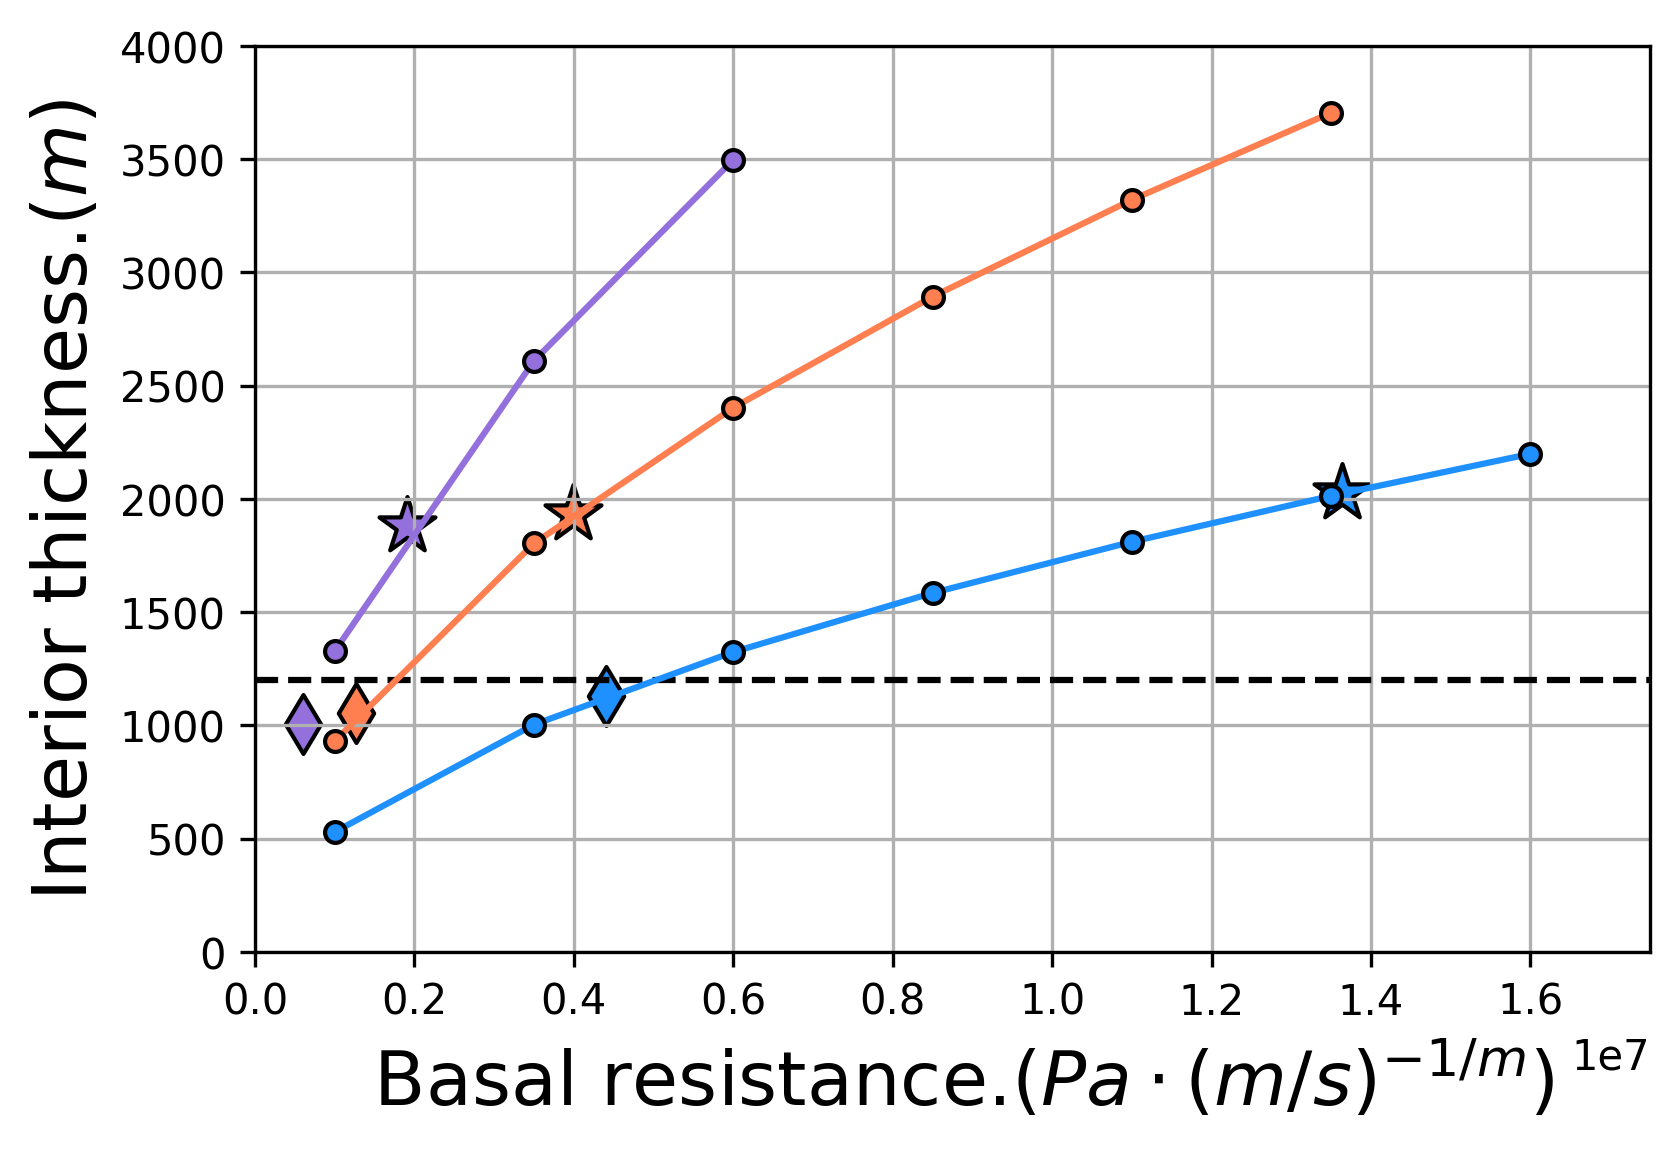

In [56]:
fig,ax=plt.subplots(dpi=300,)
ax.grid(True)
ax.set_xlabel(r' Basal resistance.($Pa\cdot(m/s)^{-1/m}}$)',fontsize=18)
ax.set_ylabel('Interior thickness.($m$)',fontsize=18)
ax.set_xlim(0,1.75e7)
ax.set_ylim(0,4000)
#plt.plot(C2,-np.array(timescalesm2)/1000,marker='o',markersize=5,markeredgecolor='black',color='forestgreen')
plt.axhline(y=1200, color='k', linestyle='--')

plt.plot(C2[:7],np.array(thicknessm3[:7]),marker='o',markersize=5,markeredgecolor='black',color='dodgerblue')
plt.scatter(Cthwaites3[0],np.array(thicknessthwaites3)[0],s=200,marker='*',edgecolor='black',color='dodgerblue')
plt.scatter(Cthwaites3[1],np.array(thicknessthwaites3)[1],s=100,marker='d',edgecolor='black',color='dodgerblue')

plt.plot(C2[:6],np.array(thicknessm4[:6]),marker='o',markersize=5,markeredgecolor='black',color='coral')
plt.scatter(Cthwaites4[0],np.array(thicknessthwaites4)[0],s=200,marker='*',edgecolor='black',color='coral')
plt.scatter(Cthwaites4[1],np.array(thicknessthwaites4)[1],s=100,marker='d',edgecolor='black',color='coral')

plt.plot(C2[:3],np.array(thicknessm5[:3]),marker='o',markersize=5,markeredgecolor='black',color='mediumpurple')
plt.scatter(Cthwaites5[0],np.array(thicknessthwaites5)[0],s=200,marker='*',edgecolor='black',color='mediumpurple')
plt.scatter(Cthwaites5[1],np.array(thicknessthwaites5)[1],s=100,marker='d',edgecolor='black',color='mediumpurple')


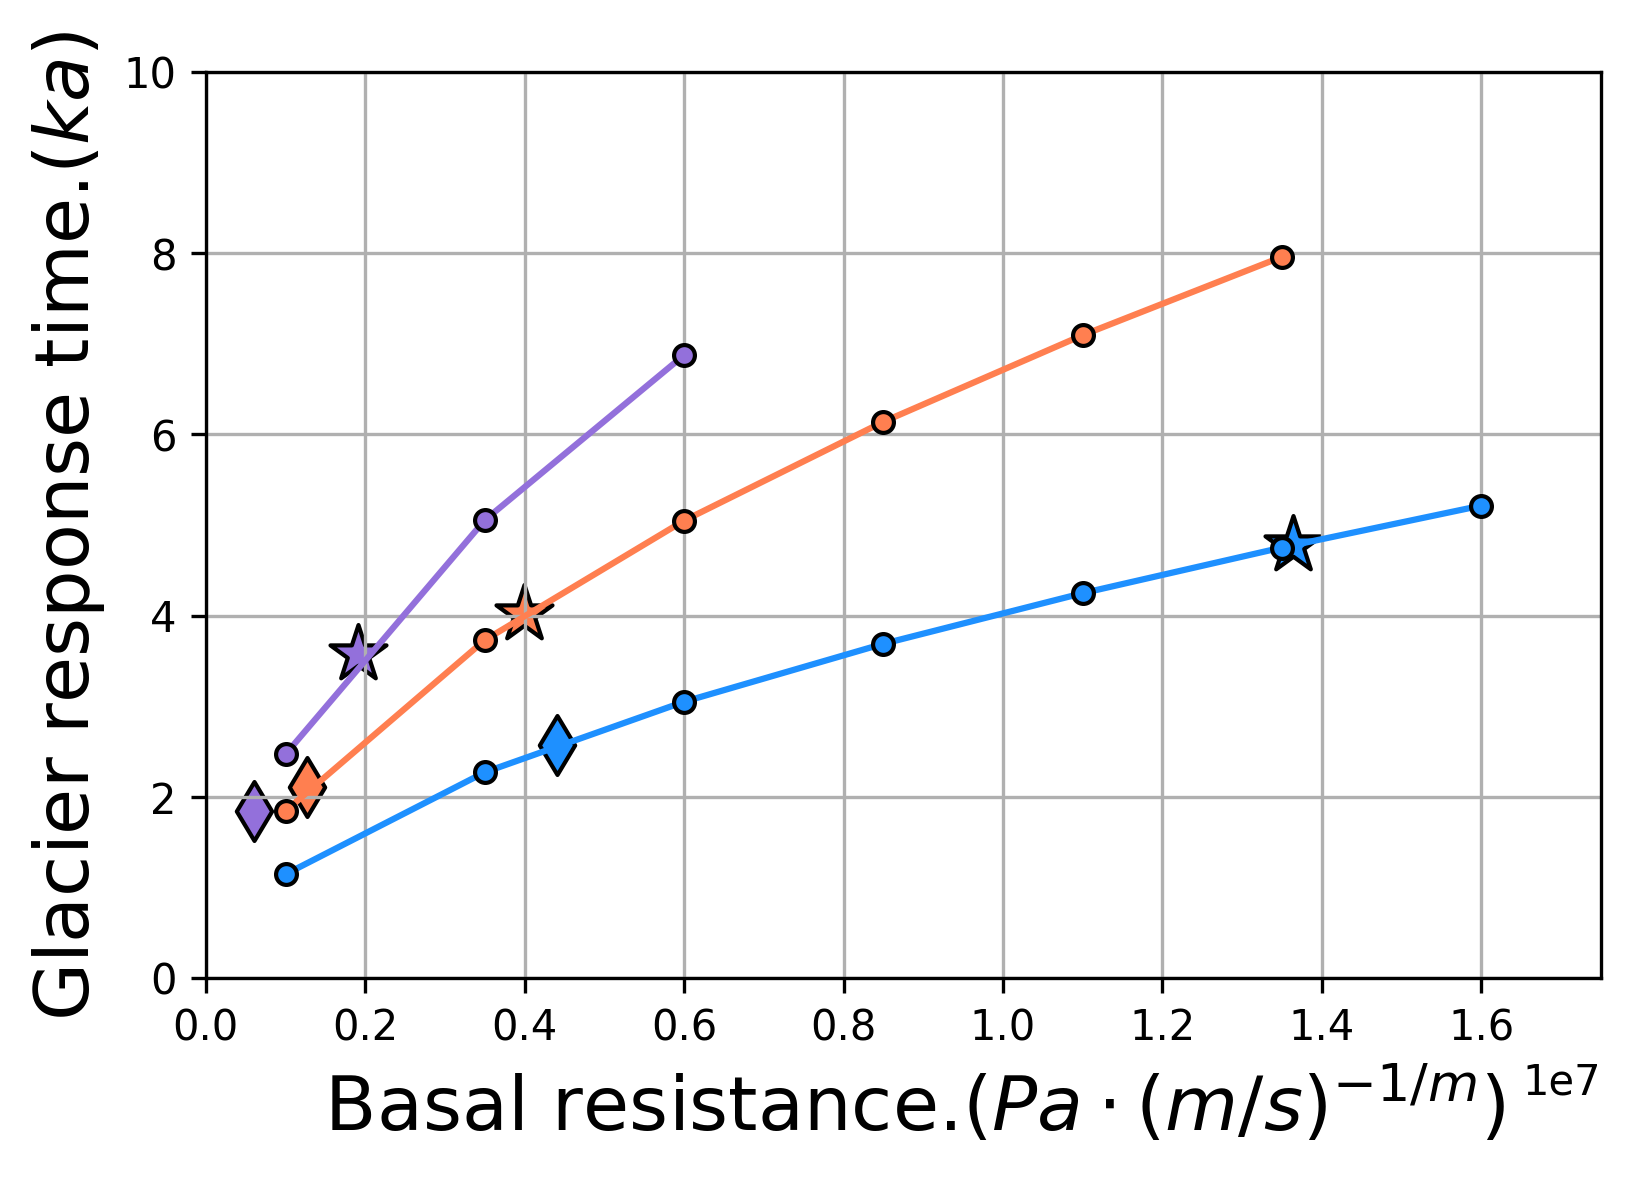

In [50]:
fig,ax=plt.subplots(dpi=300,)
ax.grid(True)
ax.set_xlabel(r' Basal resistance.($Pa\cdot(m/s)^{-1/m}}$)',fontsize=18)
ax.set_ylabel('Glacier response time.($ka$)',fontsize=18)
ax.set_xlim(0,1.75e7)
ax.set_ylim(0,10)
#plt.plot(C2,-np.array(timescalesm2)/1000,marker='o',markersize=5,markeredgecolor='black',color='forestgreen')
plt.plot(C2[:7],-np.array(timescalesm3[:7])/1000,marker='o',markersize=5,markeredgecolor='black',color='dodgerblue')
plt.scatter(Cthwaites3[0],-np.array(timescalethwaites3)[0]/1000,s=200,marker='*',edgecolor='black',color='dodgerblue')
plt.scatter(Cthwaites3[1],-np.array(timescalethwaites3)[1]/1000,s=100,marker='d',edgecolor='black',color='dodgerblue')

plt.plot(C2[:6],-np.array(timescalesm4[:6])/1000,marker='o',markersize=5,markeredgecolor='black',color='coral')
plt.scatter(Cthwaites4[0],-np.array(timescalethwaites4)[0]/1000,s=200,marker='*',edgecolor='black',color='coral')
plt.scatter(Cthwaites4[1],-np.array(timescalethwaites4)[1]/1000,s=100,marker='d',edgecolor='black',color='coral')

plt.plot(C2[:3],-np.array(timescalesm5[:3])/1000,marker='o',markersize=5,markeredgecolor='black',color='mediumpurple')
plt.scatter(Cthwaites5[0],-np.array(timescalethwaites5)[0]/1000,s=200,marker='*',edgecolor='black',color='mediumpurple')
plt.scatter(Cthwaites5[1],-np.array(timescalethwaites5)[1]/1000,s=100,marker='d',edgecolor='black',color='mediumpurple')


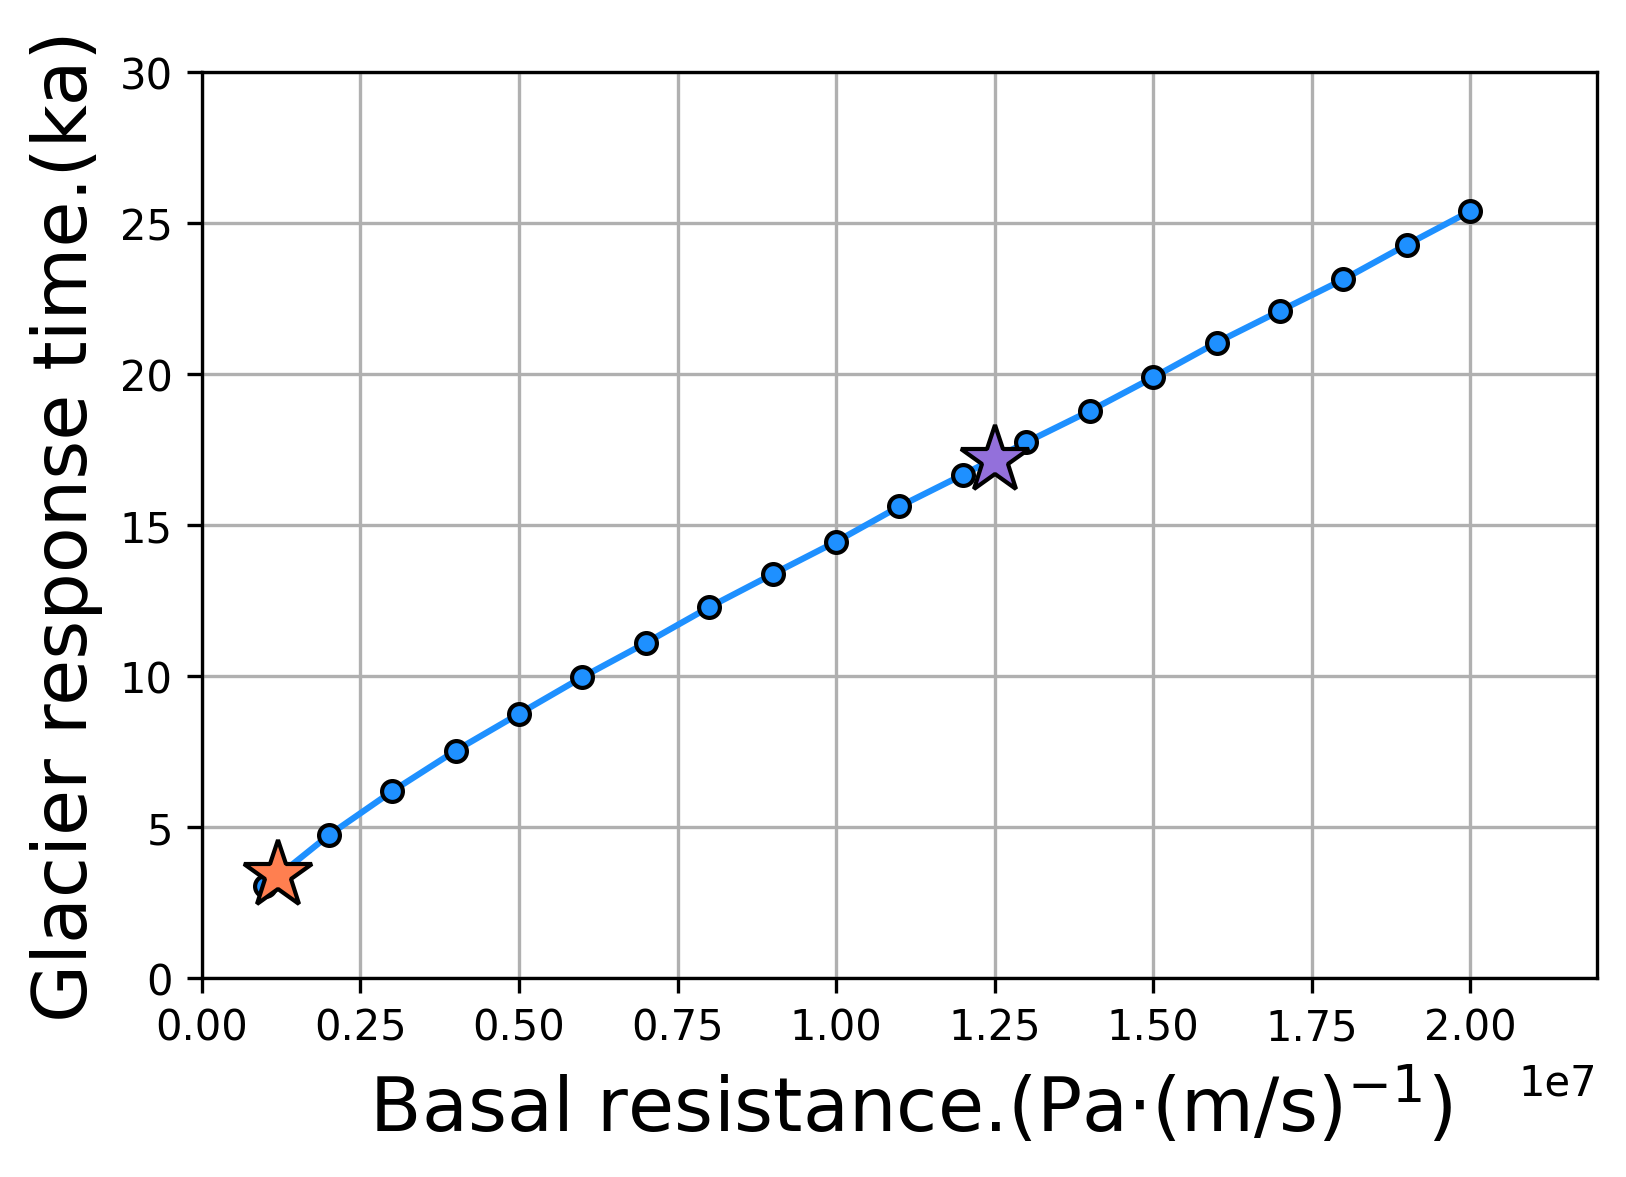

In [218]:
fig,ax=plt.subplots(dpi=300,)
ax.grid(True)
ax.set_xlabel(r' Basal resistance.(Pa$\cdot$(m/s)$^{-1}$)',fontsize=18)
ax.set_ylabel('Glacier response time.(ka)',fontsize=18)
ax.set_xlim(0,2.2e7)
ax.set_ylim(0,30)
plt.plot(C,timescales/1000,marker='o',markersize=5,markeredgecolor='black',color='dodgerblue')
plt.plot(1200000,(3424/1000),marker='*',markersize=17,markeredgecolor='black',color='coral')
plt.plot(12500000,(17160/1000),marker='*',markersize=17,markeredgecolor='black',color='mediumpurple')


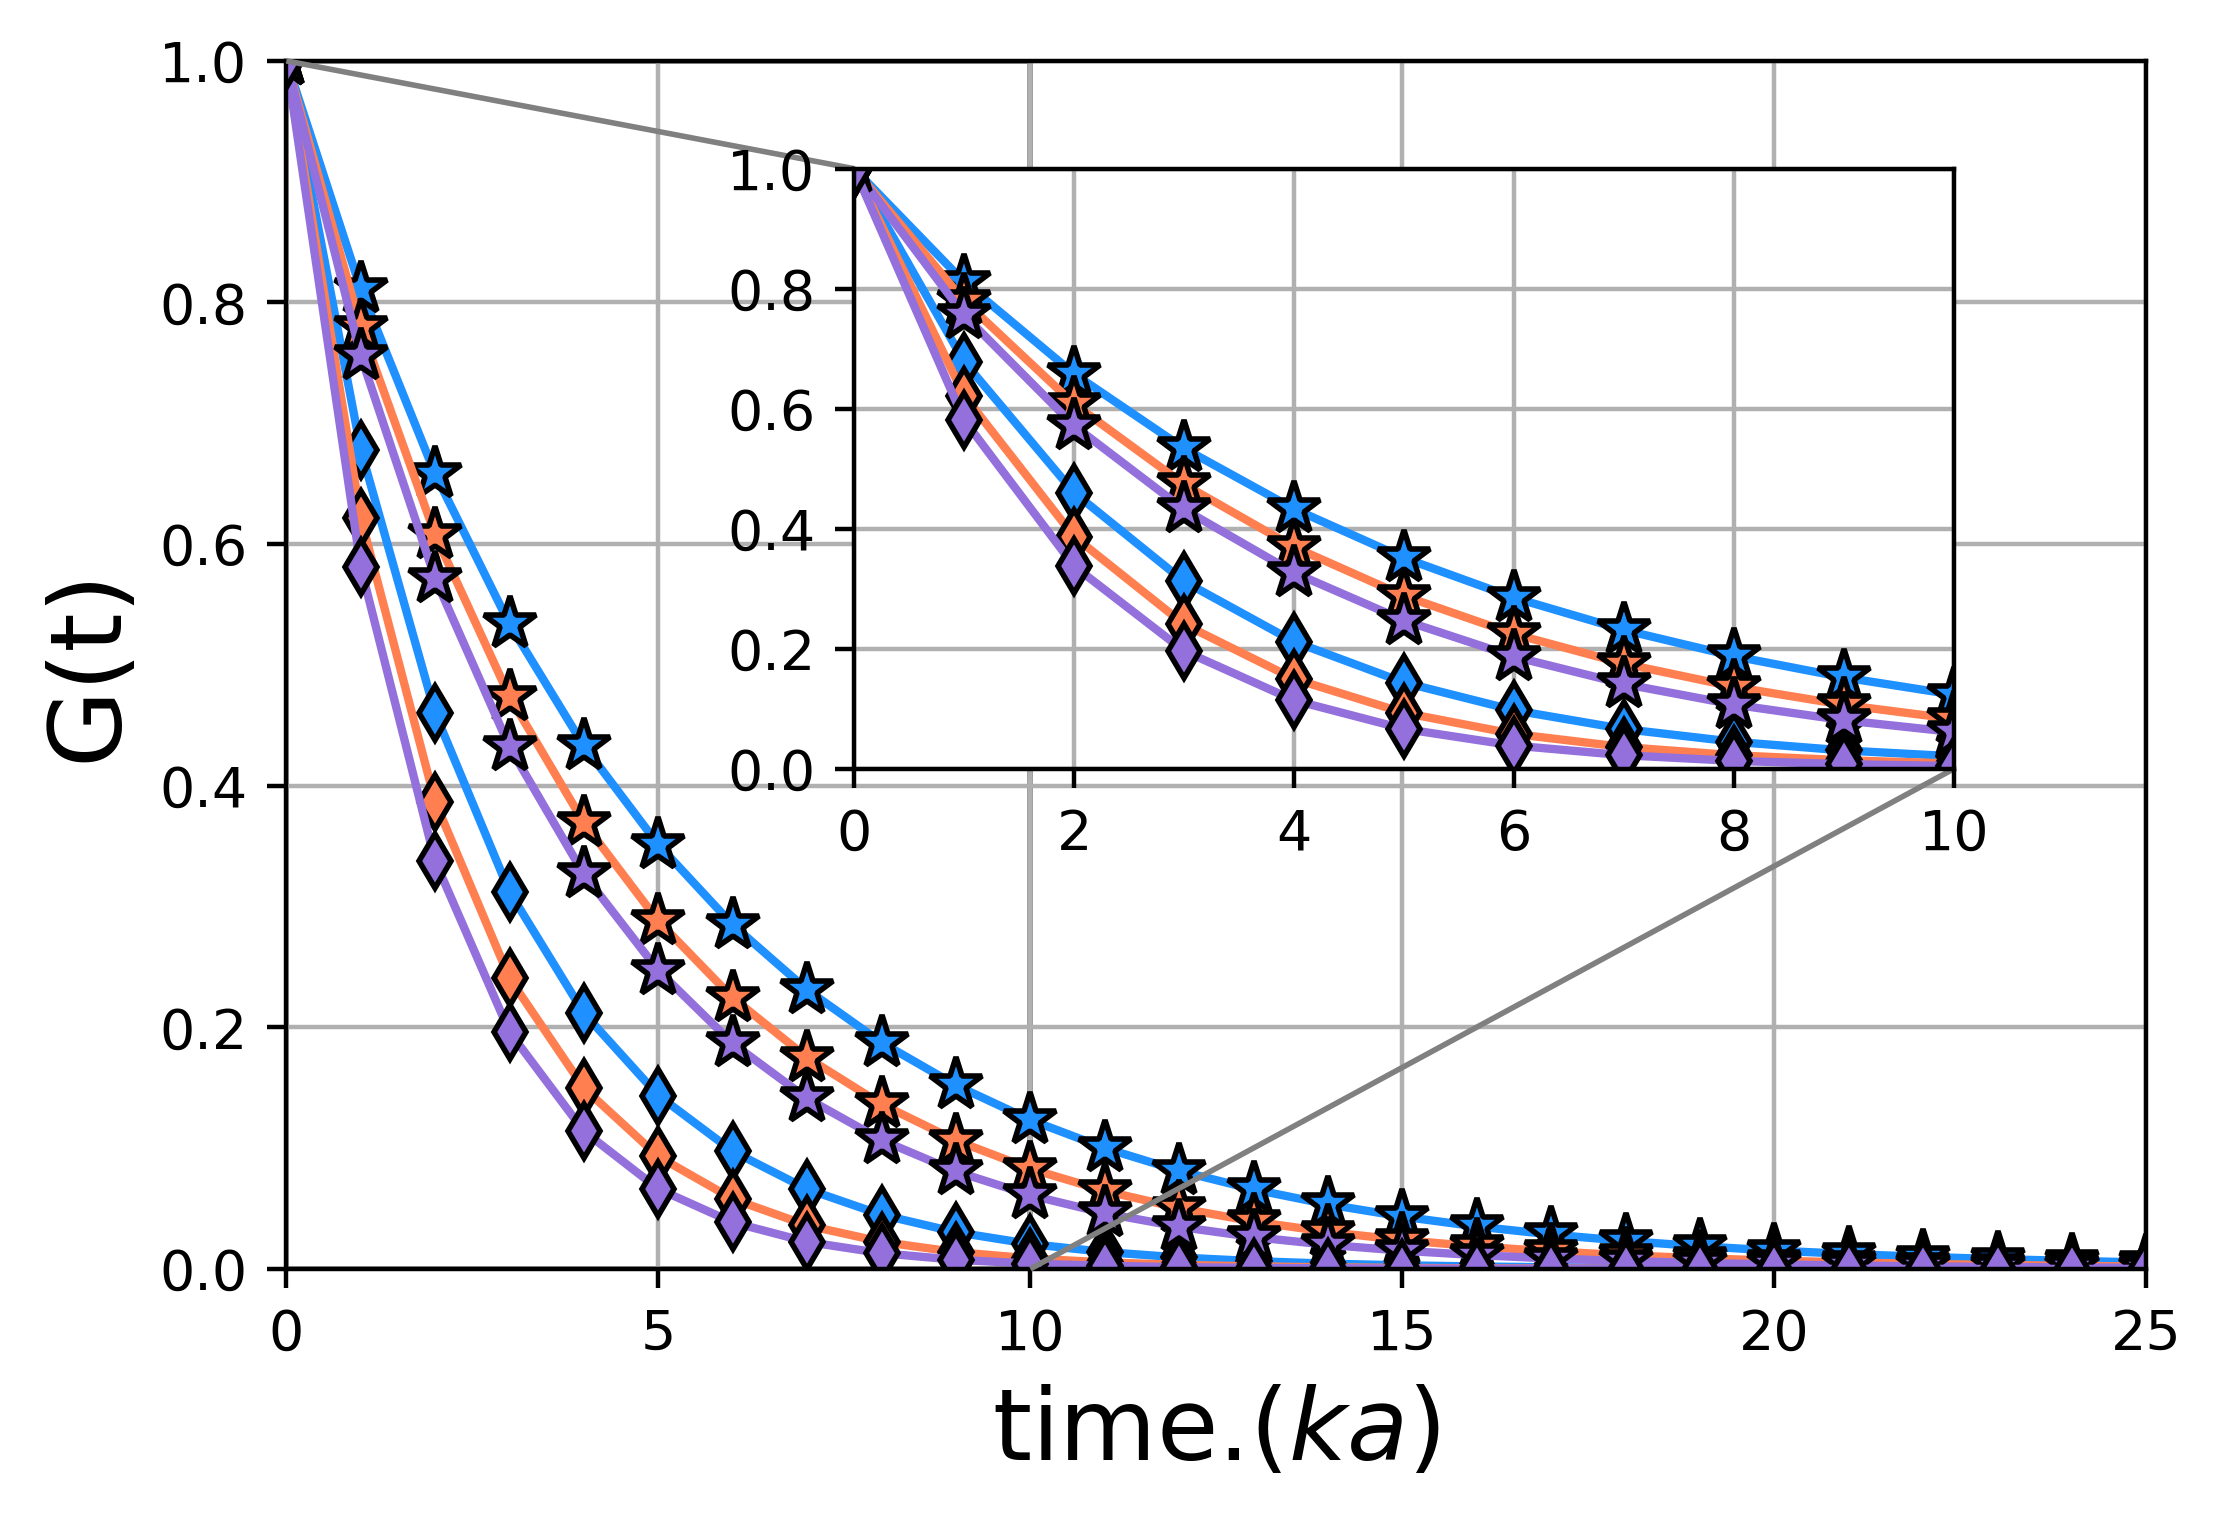

In [170]:
t = np.linspace(0,50000,51)
α1=1/timescalethwaites3[0]
α2=1/timescalethwaites3[1]
α3=1/timescalethwaites4[0]
α4=1/timescalethwaites4[1]
α5=1/timescalethwaites5[0]
α6=1/timescalethwaites5[1]

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig1 = plt.figure(dpi=400)
ax1 = fig1.add_subplot(111)
ax1.plot(t/1000,np.exp(α1*t),color='dodgerblue',marker='*',markeredgecolor='black',markersize=10)
ax1.plot(t/1000,np.exp(α2*t),color='dodgerblue',marker='d',markeredgecolor='black',markersize=7)
ax1.plot(t/1000,np.exp(α3*t),color='coral',marker='*',markeredgecolor='black',markersize=10)
ax1.plot(t/1000,np.exp(α4*t),color='coral',marker='d',markeredgecolor='black',markersize=7)
ax1.plot(t/1000,np.exp(α5*t),color='mediumpurple',marker='*',markeredgecolor='black',markersize=10)
ax1.plot(t/1000,np.exp(α6*t),color='mediumpurple',marker='d',markeredgecolor='black',markersize=7)

plt.xlim(0,25)
plt.ylim(0,1)
plt.xlabel('time.($ka$)',fontsize=18)
plt.ylabel('G(t)',fontsize=18)
plt.grid()

ax2 = inset_axes(ax1, 2.75,1.5 , loc=2,bbox_to_anchor=(.35, 0.83),bbox_transform=ax1.figure.transFigure) # no zoom
ax2.plot(t/1000,np.exp(α1*t),color='dodgerblue',markeredgecolor='black',marker='*',markersize=10)#,label=r'$G(t) = e^{-\frac{1}{\tau_f} t}$')
ax2.plot(t/1000,np.exp(α2*t),color='dodgerblue',markeredgecolor='black',marker='d',markersize=7)#,label=r'$G(t) = e^{-\frac{1}{\tau_s} t}$')
ax2.plot(t/1000,np.exp(α3*t),color='coral',markeredgecolor='black',marker='*',markersize=10)#,label=r'$G(t) = e^{-\frac{1}{\tau_f} t}$')
ax2.plot(t/1000,np.exp(α4*t),color='coral',markeredgecolor='black',marker='d',markersize=7)#,label=r'$G(t) = e^{-\frac{1}{\tau_s} t}$')
ax2.plot(t/1000,np.exp(α5*t),color='mediumpurple',markeredgecolor='black',marker='*',markersize=10)#,label=r'$G(t) = e^{-\frac{1}{\tau_f} t}$')
ax2.plot(t/1000,np.exp(α6*t),color='mediumpurple',markeredgecolor='black',marker='d',markersize=7)#,label=r'$G(t) = e^{-\frac{1}{\tau_s} t}$')
#ax2.legend()
# clabel(C,fontsize=14,fmt='%2.1f')#,manual=True)
# subregion of the original image
x1,x2,y1,y2 = 0,10,0,1
ax2.set_xlim(x1,x2)
ax2.set_ylim(y1,y2)
#plt.xticks(visible=False)

ax2.yaxis.get_major_locator().set_params(nbins=7)
ax2.xaxis.get_major_locator().set_params(nbins=7)

plt.setp(ax2.get_xticklabels(),visible=True)#, visible=False)
plt.setp(ax2.get_yticklabels(),visible=True)#, visible=False)
# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec="0.5")
plt.grid()
plt.draw()
plt.show()

In [144]:
timescalethwaites3

[-4777.248381863339, -2575.636214130432]

In [159]:
b0=600
m0=-4e-3
bedn=3
deltaSbar=.0000001

timescalesm3=[]
thicknessm3=[]
Sbarm3=[]
for i in range(len(C2)):
    Sbarnew=solve_accumulation(1413,250000,m0,b0,forcing.Ωbar(C2[i],A,θ,simulation.m(bedn)),Sbar,deltaSbar,C=C2[i],bedn=bedn,alphan=3.0,n=3,γ=1/1000000)
    H,L=simulation.equilibrium(1413,250000,m0,b0,forcing.Ωbar(C2[i],A,θ,simulation.m(bedn)),Sbarnew/year,C=C2[i],bedn=bedn,alphan=3.0,n=3,N=100000)
    stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L)/model.grounding_thickness(model.bed(b0,m0,L))
    print(stability)
    timetmp=H/(Sbarnew*stability*simulation.α(3.))*(simulation.α(3.)+simulation.γ(3.)+1-stability)
    timescalesm3.append(timetmp)
    thicknessm3.append(H)
    Sbarm3.append(Sbarnew)
    print(forcing.Ωbar(C2[i],A,θ,simulation.m(3.0)))
    print(H0)
    print(L0)

 18%|█▊        | 18336/100000 [00:00<00:00, 91996.03it/s]

-0.005467113786269328
5467.113786269329


  9%|▉         | 8890/100000 [00:00<00:01, 88889.49it/s]

-0.005200115899685246
5200.115899685246


  9%|▉         | 8863/100000 [00:00<00:01, 88621.21it/s]

-0.005078925939478271
5078.925939478271


 19%|█▊        | 18558/100000 [00:00<00:00, 93117.00it/s]

-0.004956667236788926
4956.667236788926


  9%|▉         | 8755/100000 [00:00<00:01, 87544.87it/s]

-0.004836997943250898
4836.997943250899


 19%|█▊        | 18570/100000 [00:00<00:00, 93261.32it/s]

-0.004719792936856712
4719.792936856713


 17%|█▋        | 16853/100000 [00:00<00:00, 85441.52it/s]

-0.0046050221477461455
4605.0221477461455


  9%|▉         | 8893/100000 [00:00<00:01, 88921.18it/s]

-0.00449265274318328
4492.65274318328


  9%|▉         | 9014/100000 [00:00<00:01, 90136.43it/s]

-0.0043826516424976866
4382.651642497687


  9%|▉         | 9038/100000 [00:00<00:01, 90372.11it/s]

-0.004274985489875602
4274.985489875602


 18%|█▊        | 18195/100000 [00:00<00:00, 91286.69it/s]

-0.004169620691126212
4169.6206911262125


  9%|▉         | 8958/100000 [00:00<00:01, 89377.86it/s]

-0.004066523448096937
4066.5234480969375


 18%|█▊        | 18473/100000 [00:00<00:00, 92708.61it/s]

-0.003965659792350343
3965.659792350343


 18%|█▊        | 18407/100000 [00:00<00:00, 92230.05it/s]

-0.0038669956180942245
3866.9956180942245


  9%|▉         | 8848/100000 [00:00<00:01, 88474.60it/s]

-0.003770496714219887
3770.4967142198875


  9%|▉         | 8801/100000 [00:00<00:01, 87998.33it/s]

-0.003676128795493685
3676.128795493685


  9%|▉         | 9081/100000 [00:00<00:01, 90799.26it/s]

-0.0035838575328369622
3583.8575328369625


  9%|▉         | 9048/100000 [00:00<00:01, 90475.56it/s]

-0.0034936485826722635
3493.6485826722637


 18%|█▊        | 18019/100000 [00:00<00:00, 90495.38it/s]

-0.00340546761531246
3405.46761531246


 19%|█▊        | 18675/100000 [00:00<00:00, 93637.02it/s]

-0.003319280342371785
3319.280342371785


 19%|█▊        | 18719/100000 [00:00<00:00, 93816.34it/s]

-0.003235052543183148
3235.0525431831484


 19%|█▊        | 18646/100000 [00:00<00:00, 93511.74it/s]

-0.0031527500902082247
3152.7500902082247


 18%|█▊        | 18418/100000 [00:00<00:00, 91321.37it/s]

-0.0030723389734314405
3072.3389734314405


  9%|▉         | 9041/100000 [00:00<00:01, 90407.28it/s]

-0.00299378532373067
2993.78532373067


  9%|▉         | 9086/100000 [00:00<00:01, 90851.64it/s]

-0.00291705543522237
2917.05543522237


 19%|█▊        | 18588/100000 [00:00<00:00, 93218.35it/s]

-0.0028421157865806306
2842.115786580631


  9%|▉         | 8854/100000 [00:00<00:01, 88528.48it/s]

-0.0027689330613321216
2768.9330613321217


 18%|█▊        | 18136/100000 [00:00<00:00, 90902.22it/s]

-0.002697474167133099
2697.4741671330994


  9%|▉         | 9171/100000 [00:00<00:00, 91705.28it/s]

-0.0026277062540355544
2627.7062540355546


 18%|█▊        | 18227/100000 [00:00<00:00, 91481.93it/s]

-0.002559596731752361
2559.596731752361


  9%|▉         | 9081/100000 [00:00<00:01, 90804.24it/s]

-0.0024931132859337085
2493.1132859337085


  9%|▉         | 9142/100000 [00:00<00:00, 91407.88it/s]

-0.0024282238934688213
2428.223893468821


  9%|▉         | 8982/100000 [00:00<00:01, 89810.24it/s]

-0.0023648968368287023
2364.8968368287024


 19%|█▊        | 18550/100000 [00:00<00:00, 93090.54it/s]

-0.002303100717466965
2303.100717466965


 19%|█▊        | 18559/100000 [00:00<00:00, 93034.56it/s]

-0.002242804468299
2242.8044682990003


  9%|▉         | 9183/100000 [00:00<00:00, 91785.88it/s]

-0.0021839773652777366
2183.9773652777367


 18%|█▊        | 18454/100000 [00:00<00:00, 92573.08it/s]

-0.0021265890380891507
2126.5890380891506


 18%|█▊        | 17864/100000 [00:00<00:00, 89466.81it/s]

-0.002070609479989245
2070.6094799892453


  9%|▉         | 9093/100000 [00:00<00:00, 90921.85it/s]

-0.0020160090568059823
2016.0090568059823


 19%|█▊        | 18554/100000 [00:00<00:00, 92956.52it/s]

-0.0019627585151301753
1962.7585151301755


  9%|▉         | 8956/100000 [00:00<00:01, 89552.61it/s]

-0.0019108289897204376
1910.8289897204377


 18%|█▊        | 18335/100000 [00:00<00:00, 92122.50it/s]

-0.0018601920101472642
1860.1920101472642


 18%|█▊        | 18218/100000 [00:00<00:00, 91378.88it/s]

-0.0018108195067020715
1810.8195067020715


  9%|▉         | 9162/100000 [00:00<00:00, 91615.28it/s]

-0.0017626838155970325
1762.6838155970327


 19%|█▊        | 18625/100000 [00:00<00:00, 93359.60it/s]

-0.0017157576834821956
1715.7576834821957


 18%|█▊        | 18500/100000 [00:00<00:00, 92695.86it/s]

-0.0016700142713062232
1670.0142713062232


 18%|█▊        | 18273/100000 [00:00<00:00, 91502.41it/s]

-0.0016254271575464809
1625.4271575464809


  9%|▉         | 8902/100000 [00:00<00:01, 89006.72it/s]

-0.0015819703408355707
1581.9703408355708


  9%|▉         | 8912/100000 [00:00<00:01, 89113.71it/s]

-0.0015396182420102413
1539.6182420102414


 18%|█▊        | 18469/100000 [00:00<00:00, 92369.34it/s]

-0.0014983457056081096
1498.3457056081097


  9%|▉         | 8828/100000 [00:00<00:01, 88272.93it/s]

-0.0014581280008383035
1458.1280008383037


  9%|▉         | 9064/100000 [00:00<00:01, 90631.88it/s]

-0.0014189408220514014
1418.9408220514015


  9%|▉         | 9084/100000 [00:00<00:01, 90834.67it/s]

-0.0013807602887333777
1380.7602887333778


 18%|█▊        | 18418/100000 [00:00<00:00, 92260.28it/s]

-0.0013435629450480337
1343.5629450480337


  9%|▉         | 8999/100000 [00:00<00:01, 89977.21it/s]

-0.0013073257589523563
1307.3257589523564


 18%|█▊        | 18339/100000 [00:00<00:00, 92097.87it/s]

-0.0012720261209078307
1272.0261209078308


  9%|▉         | 8930/100000 [00:00<00:01, 89291.78it/s]

-0.0012376418422109855
1237.6418422109855


  9%|▉         | 9136/100000 [00:00<00:00, 91348.11it/s]

-0.0012041511529655253
1204.1511529655254


 18%|█▊        | 18473/100000 [00:00<00:00, 92545.90it/s]

-0.0011715326997179653
1171.5326997179654


  9%|▉         | 9027/100000 [00:00<00:01, 90257.39it/s]

-0.0011397655427779244
1139.7655427779246


  9%|▉         | 9099/100000 [00:00<00:00, 90985.31it/s]

-0.0011088291532435105
1108.8291532435105


  9%|▉         | 8901/100000 [00:00<00:01, 89003.72it/s]

-0.0010787034097519063
1078.7034097519063


  9%|▉         | 8956/100000 [00:00<00:01, 89550.26it/s]

-0.0010493685949745704
1049.3685949745704


  9%|▉         | 8833/100000 [00:00<00:01, 88313.03it/s]

-0.0010208053918753866
1020.8053918753867


  9%|▉         | 9006/100000 [00:00<00:01, 90049.35it/s]

-0.0009929948797499529
992.9948797499528


  9%|▉         | 9072/100000 [00:00<00:01, 90709.92it/s]

-0.0009659185300631507
965.9185300631507


 19%|█▊        | 18506/100000 [00:00<00:00, 92691.21it/s]

-0.0009395582021017908
939.5582021017908


 18%|█▊        | 18486/100000 [00:00<00:00, 92768.53it/s]

-0.0009138961384584254
913.8961384584254


  9%|▉         | 9023/100000 [00:00<00:01, 90225.57it/s]

-0.0008889149603609403
888.9149603609403


  9%|▉         | 9013/100000 [00:00<00:01, 90122.78it/s]

-0.000864597662863991
864.597662863991


  9%|▉         | 9155/100000 [00:00<00:00, 91542.67it/s]

-0.0008409276099145354
840.9276099145354


 19%|█▊        | 18727/100000 [00:00<00:00, 93903.80it/s]

-0.0008178885293067141
817.8885293067142


 19%|█▊        | 18630/100000 [00:00<00:00, 93488.96it/s]

-0.0007954645075370208
795.4645075370208


  9%|▉         | 9062/100000 [00:00<00:01, 90613.82it/s]

-0.0007736399845738488
773.6399845738488


  9%|▉         | 9144/100000 [00:00<00:00, 91433.77it/s]

-0.00075239974855131
752.39974855131


  9%|▉         | 9129/100000 [00:00<00:00, 91286.17it/s]

-0.0007317289303992293
731.7289303992293


 19%|█▊        | 18578/100000 [00:00<00:00, 93230.18it/s]

-0.0007116129984199651
711.6129984199652


  9%|▉         | 9078/100000 [00:00<00:01, 90773.38it/s]

-0.0006920377528208773
692.0377528208774


 18%|█▊        | 18360/100000 [00:00<00:00, 91965.15it/s]

-0.0006729893202130625
672.9893202130625


  9%|▉         | 9039/100000 [00:00<00:01, 90379.31it/s]

-0.0006544541480843618
654.4541480843618


  9%|▉         | 9079/100000 [00:00<00:01, 90785.54it/s]

-0.0006364189992548781
636.4189992548781


 19%|█▊        | 18622/100000 [00:00<00:00, 93426.07it/s]

-0.0006188709463238774
618.8709463238774


  9%|▉         | 9134/100000 [00:00<00:00, 91329.85it/s]

-0.0006017973661141586
601.7973661141586


  9%|▉         | 9030/100000 [00:00<00:01, 90289.32it/s]

-0.0005851859341213421
585.1859341213421


 18%|█▊        | 18478/100000 [00:00<00:00, 92802.65it/s]

-0.0005690246189750906
569.0246189750906


 19%|█▊        | 18634/100000 [00:00<00:00, 93454.19it/s]

-0.0005533016769172972
553.3016769172973


 19%|█▊        | 18564/100000 [00:00<00:00, 93149.79it/s]

-0.0005380056463036453
538.0056463036453


  9%|▉         | 9181/100000 [00:00<00:00, 91805.27it/s]

-0.000523125342133484
523.1253421334841


 18%|█▊        | 18412/100000 [00:00<00:00, 92518.21it/s]

-0.0005086498506130592
508.64985061305924


 19%|█▊        | 18586/100000 [00:00<00:00, 93249.73it/s]

-0.0004945685237565776
494.56852375657763


 19%|█▊        | 18618/100000 [00:00<00:00, 93377.26it/s]

-0.0004808709740290651
480.8709740290651


 19%|█▊        | 18583/100000 [00:00<00:00, 93174.64it/s]

-0.00046754706903515033
467.54706903515034


 18%|█▊        | 18188/100000 [00:00<00:00, 91219.19it/s]

-0.00045458692625781984
454.58692625781987


 18%|█▊        | 18366/100000 [00:00<00:00, 92081.45it/s]

-0.0004419809078488033
441.9809078488033


  9%|▉         | 9118/100000 [00:00<00:00, 91170.09it/s]

-0.00042971961547553654
429.71961547553656


 18%|█▊        | 18416/100000 [00:00<00:00, 92275.93it/s]

-0.0004177938852260122
417.7938852260122


  9%|▉         | 9082/100000 [00:00<00:01, 90811.86it/s]

-0.0004061947825746902
406.1947825746902


  9%|▉         | 9128/100000 [00:00<00:00, 91271.82it/s]

-0.000394913597411185
394.91359741118504


  9%|▉         | 9091/100000 [00:00<00:01, 90898.17it/s]

-0.00038394183913397135
383.94183913397137


 18%|█▊        | 18401/100000 [00:00<00:00, 92410.10it/s]

-0.00037327123181099883
373.27123181099887


  9%|▉         | 9081/100000 [00:00<00:01, 90802.73it/s]

-0.0003628937094086141
362.8937094086141


 18%|█▊        | 18183/100000 [00:00<00:00, 91059.32it/s]

-0.000352801411089953
352.80141108995304


 19%|█▊        | 18612/100000 [00:00<00:00, 93270.18it/s]

-0.0003429866765841143
342.9866765841143


  9%|▉         | 8785/100000 [00:00<00:01, 87841.08it/s]

-0.00033344204162782986
333.4420416278299


  9%|▉         | 8936/100000 [00:00<00:01, 89349.43it/s]

-0.0003241602334786439
324.16023347864393


  9%|▉         | 8949/100000 [00:00<00:01, 89483.68it/s]

-0.0003151341665025684
315.1341665025684


  9%|▉         | 8975/100000 [00:00<00:01, 89740.24it/s]

-0.0003063569378350803
306.3569378350803


  9%|▉         | 8983/100000 [00:00<00:01, 89819.38it/s]

-0.0002978218231166538
297.82182311665383


  9%|▉         | 9048/100000 [00:00<00:01, 90467.14it/s]

-0.0002895222723026236
289.5222723026236


  9%|▉         | 9125/100000 [00:00<00:00, 91245.52it/s]

-0.00028145190554799043
281.45190554799046


 18%|█▊        | 18329/100000 [00:00<00:00, 91839.12it/s]

-0.000273604509167053
273.60450916705304


  9%|▉         | 9124/100000 [00:00<00:00, 91237.26it/s]

-0.0002659740316678653
265.97403166786535


  9%|▉         | 9104/100000 [00:00<00:00, 91029.02it/s]

-0.00025855457986099644
258.55457986099645


 19%|█▊        | 18569/100000 [00:00<00:00, 93223.62it/s]

-0.00025134041504297055
251.34041504297056


 19%|█▊        | 18606/100000 [00:00<00:00, 93295.83it/s]

-0.00024432594925386365
244.32594925386366


 18%|█▊        | 18284/100000 [00:00<00:00, 91673.10it/s]

-0.00023750574160783433
237.50574160783435


 18%|█▊        | 18419/100000 [00:00<00:00, 92340.04it/s]

-0.00023087449469807325
230.87449469807325


  9%|▉         | 9040/100000 [00:00<00:01, 90389.10it/s]

-0.00022442705107323125
224.42705107323127


  9%|▉         | 8803/100000 [00:00<00:01, 88018.33it/s]

-0.0002181583897866949
218.1583897866949


  9%|▉         | 8987/100000 [00:00<00:01, 89855.52it/s]

-0.0002120636230170203
212.0636230170203


  9%|▉         | 9050/100000 [00:00<00:01, 90492.75it/s]

-0.00020613799275914787
206.1379927591479


  9%|▉         | 8913/100000 [00:00<00:01, 89122.86it/s]

-0.00020037686758566997
200.37686758566997


 18%|█▊        | 18076/100000 [00:00<00:00, 90749.19it/s]

-0.00019477573947713245
194.77573947713245


  9%|▉         | 9124/100000 [00:00<00:00, 91228.99it/s]

-0.00018933022072119637
189.33022072119638


 19%|█▊        | 18681/100000 [00:00<00:00, 93665.04it/s]

-0.0001840360408788838
184.0360408788838


 18%|█▊        | 18438/100000 [00:00<00:00, 92372.77it/s]

-0.00017888904381784958
178.8890438178496


  9%|▉         | 9062/100000 [00:00<00:01, 90598.05it/s]

-0.00017388518481116624
173.88518481116625


 19%|█▊        | 18586/100000 [00:00<00:00, 93267.09it/s]

-0.00016902052770124281
169.02052770124283


 18%|█▊        | 18494/100000 [00:00<00:00, 92797.04it/s]

-0.00016429124212730676
164.29124212730676


  9%|▉         | 9145/100000 [00:00<00:00, 91442.89it/s]

-0.00015969360081633202
159.69360081633204


  9%|▉         | 9193/100000 [00:00<00:00, 91919.79it/s]

-0.0001552239769351727
155.2239769351727


 19%|█▊        | 18609/100000 [00:00<00:00, 93272.36it/s]

-0.00015087884150460012
150.87884150460013


  9%|▉         | 8868/100000 [00:00<00:01, 88667.61it/s]

-0.0001466547608722758
146.6547608722758


  9%|▉         | 8933/100000 [00:00<00:01, 89177.64it/s]

-0.0001425483942455612
142.5483942455612


  9%|▉         | 8781/100000 [00:00<00:01, 87802.34it/s]

-0.0001385564912817208
138.5564912817208


  9%|▉         | 9057/100000 [00:00<00:01, 90561.88it/s]

-0.000134675889735081
134.675889735081


 18%|█▊        | 17882/100000 [00:00<00:00, 89545.00it/s]

-0.0001309035131604469
130.9035131604469


  9%|▉         | 8876/100000 [00:00<00:01, 88755.43it/s]

-0.00012723636867065214
127.23636867065215


 18%|█▊        | 18063/100000 [00:00<00:00, 90608.48it/s]

-0.00012367154474885318
123.6715447488532


  9%|▉         | 9158/100000 [00:00<00:00, 91571.79it/s]

-0.00012020620911262813
120.20620911262813


 18%|█▊        | 18162/100000 [00:00<00:00, 90882.21it/s]

-0.00011683760663098655
116.83760663098656


 18%|█▊        | 18296/100000 [00:00<00:00, 91885.58it/s]

-0.00011356305729076848
113.56305729076848


  9%|▉         | 9029/100000 [00:00<00:01, 90278.25it/s]

-0.00011037995421429514
110.37995421429514


 18%|█▊        | 18297/100000 [00:00<00:00, 91840.97it/s]

-0.00010728576172451722
107.28576172451722


  9%|▉         | 8958/100000 [00:00<00:01, 89567.70it/s]

-0.00010427801345859189
104.27801345859189


 18%|█▊        | 18062/100000 [00:00<00:00, 90365.92it/s]

-0.00010135431052828789
101.3543105282879


  9%|▉         | 8858/100000 [00:00<00:01, 88576.49it/s]

-9.851231972561799e-05
98.512319725618


 18%|█▊        | 18103/100000 [00:00<00:00, 90798.70it/s]

-9.574977177387336e-05
95.74977177387336


  9%|▉         | 9175/100000 [00:00<00:00, 91743.74it/s]

-9.306445962225553e-05
93.06445962225553


  9%|▉         | 9080/100000 [00:00<00:01, 90787.32it/s]

-9.04542367834656e-05
90.4542367834656


 19%|█▊        | 18557/100000 [00:00<00:00, 92861.68it/s]

-8.79170157131448e-05
87.91701571314479


  9%|▉         | 9125/100000 [00:00<00:00, 91243.78it/s]

-8.545076623078785e-05
85.45076623078785


  9%|▉         | 8828/100000 [00:00<00:01, 88268.51it/s]

-8.305351398020866e-05
83.05351398020866


 18%|█▊        | 18061/100000 [00:00<00:00, 90725.45it/s]

-8.072333892976166e-05
80.72333892976167


 18%|█▊        | 18419/100000 [00:00<00:00, 92443.68it/s]

-7.845837391071836e-05
78.45837391071836


  9%|▉         | 9118/100000 [00:00<00:00, 91176.61it/s]

-7.625680319304228e-05
76.25680319304229


  9%|▉         | 9101/100000 [00:00<00:00, 91005.53it/s]

-7.411686109792209e-05
74.11686109792208


 19%|█▊        | 18537/100000 [00:00<00:00, 92902.93it/s]

-7.203683064613141e-05
72.03683064613142


  9%|▉         | 8950/100000 [00:00<00:01, 89495.60it/s]

-7.00150422413426e-05
70.0150422413426


  9%|▉         | 9076/100000 [00:00<00:01, 90754.46it/s]

-6.804987238717149e-05
68.04987238717149


 18%|█▊        | 18421/100000 [00:00<00:00, 92499.72it/s]

-6.613974243833218e-05
66.13974243833218


 18%|█▊        | 18215/100000 [00:00<00:00, 91367.79it/s]

-6.428311738371849e-05
64.28311738371849


  9%|▉         | 9015/100000 [00:00<00:01, 90146.65it/s]

-6.247850466126693e-05
62.478504661266925


 19%|█▊        | 18612/100000 [00:00<00:00, 93338.74it/s]

-6.0724453004397215e-05
60.72445300439722


  9%|▉         | 9180/100000 [00:00<00:00, 91774.49it/s]

-5.9019551317906006e-05
59.01955131790601


  9%|▉         | 9068/100000 [00:00<00:01, 90675.55it/s]

-5.736242758415756e-05
57.36242758415756


  8%|▊         | 7760/100000 [00:00<00:01, 77585.28it/s]

-5.5751747797476125e-05
55.75174779747613


  9%|▉         | 9012/100000 [00:00<00:01, 90116.22it/s]

-5.418621492706006e-05
54.186214927060064


  9%|▉         | 9082/100000 [00:00<00:01, 90814.67it/s]

-5.2664567907253514e-05
52.66456790725351


 19%|█▊        | 18607/100000 [00:00<00:00, 93333.84it/s]

-5.1185580654244405e-05
51.185580654244404


 18%|█▊        | 18139/100000 [00:00<00:00, 90922.64it/s]

-4.974806110936333e-05
49.748061109363334


 18%|█▊        | 18401/100000 [00:00<00:00, 92102.01it/s]

-4.835085030729533e-05
48.35085030729533


  9%|▉         | 8948/100000 [00:00<00:01, 89471.13it/s]

-4.6992821469495535e-05
46.99282146949554


  9%|▉         | 8968/100000 [00:00<00:01, 89671.11it/s]

-4.567287912152824e-05
45.67287912152824


  9%|▉         | 9138/100000 [00:00<00:00, 91370.72it/s]

-4.4389958234183724e-05
44.38995823418372


 18%|█▊        | 18381/100000 [00:00<00:00, 92132.01it/s]

-4.314302338735433e-05
43.14302338735433


  9%|▉         | 9064/100000 [00:00<00:01, 90631.01it/s]

-4.193106795658241e-05
41.93106795658241


 18%|█▊        | 18306/100000 [00:00<00:00, 91913.48it/s]

-4.075311332105775e-05
40.753113321057754


 18%|█▊        | 17925/100000 [00:00<00:00, 89727.33it/s]

-3.9608208093239225e-05
39.60820809323923


  8%|▊         | 8128/100000 [00:00<00:01, 81260.51it/s]

-3.8495427369052775e-05
38.49542736905278


  9%|▉         | 9150/100000 [00:00<00:00, 91490.05it/s]

-3.741387199820019e-05
37.41387199820019


  9%|▉         | 8991/100000 [00:00<00:01, 89905.58it/s]

-3.6362667874462205e-05
36.362667874462204


  9%|▉         | 9170/100000 [00:00<00:00, 91687.19it/s]

-3.5340965244628025e-05
35.34096524462802


 18%|█▊        | 18404/100000 [00:00<00:00, 92044.48it/s]

-3.4347938036837145e-05
34.34793803683715


 19%|█▊        | 18596/100000 [00:00<00:00, 93172.71it/s]

-3.338278320620884e-05
33.38278320620884


 18%|█▊        | 18455/100000 [00:00<00:00, 92499.62it/s]

-3.2444720099214466e-05
32.444720099214464


  9%|▉         | 9093/100000 [00:00<00:00, 90921.63it/s]

-3.153298983426066e-05
31.53298983426066


  9%|▉         | 8996/100000 [00:00<00:01, 89948.29it/s]

-3.0646854699938555e-05
30.646854699938558


  9%|▉         | 9022/100000 [00:00<00:01, 90215.78it/s]

-2.9785597569250966e-05
29.785597569250967


  9%|▉         | 9034/100000 [00:00<00:01, 90333.84it/s]

-2.894852132964297e-05
28.948521329642972


 18%|█▊        | 18400/100000 [00:00<00:00, 92268.49it/s]

-2.8134948328894096e-05
28.134948328894097


  9%|▉         | 8924/100000 [00:00<00:01, 89234.77it/s]

-2.7344219835882538e-05
27.34421983588254


 18%|█▊        | 18391/100000 [00:00<00:00, 92134.32it/s]

-2.6575695516134146e-05
26.575695516134147


  9%|▉         | 8993/100000 [00:00<00:01, 89924.51it/s]

-2.5828752921661362e-05
25.828752921661362


 18%|█▊        | 18112/100000 [00:00<00:00, 90810.70it/s]

-2.5102786994946653e-05
25.102786994946655


 19%|█▊        | 18554/100000 [00:00<00:00, 93075.18it/s]

-2.4397209586080862e-05
24.397209586080862


  9%|▉         | 9044/100000 [00:00<00:01, 90429.09it/s]

-2.3711448983667652e-05
23.71144898366765


 19%|█▊        | 18573/100000 [00:00<00:00, 93094.29it/s]

-2.3044949457864277e-05
23.044949457864277


 19%|█▊        | 18536/100000 [00:00<00:00, 92890.64it/s]

-2.2397170816751893e-05
22.397170816751895


 19%|█▊        | 18597/100000 [00:00<00:00, 93319.52it/s]

-2.176758797437651e-05
21.76758797437651


 19%|█▊        | 18567/100000 [00:00<00:00, 93133.30it/s]

-2.1155690530722494e-05
21.155690530722495


 18%|█▊        | 18464/100000 [00:00<00:00, 92504.74it/s]

-2.056098236318212e-05
20.56098236318212


 18%|█▊        | 18278/100000 [00:00<00:00, 91589.10it/s]

-1.9982981229695724e-05
19.982981229695724


  9%|▉         | 8992/100000 [00:00<00:01, 89907.22it/s]

-1.9421218382107325e-05
19.421218382107327


 19%|█▊        | 18596/100000 [00:00<00:00, 93321.25it/s]

-1.8875238190667004e-05
18.875238190667005


 19%|█▊        | 18660/100000 [00:00<00:00, 93585.82it/s]

-1.834459777880693e-05
18.34459777880693


 19%|█▊        | 18613/100000 [00:00<00:00, 93309.73it/s]

-1.7828866667841794e-05
17.828866667841794


 19%|█▊        | 18566/100000 [00:00<00:00, 93055.79it/s]

-1.7327626431535464e-05
17.327626431535464


 19%|█▊        | 18730/100000 [00:00<00:00, 93899.43it/s]

-1.6840470360184552e-05
16.840470360184554


 18%|█▊        | 18213/100000 [00:00<00:00, 91532.25it/s]

-1.6367003134189872e-05
16.367003134189872


 18%|█▊        | 18457/100000 [00:00<00:00, 92491.61it/s]

-1.5906840506213484e-05
15.906840506213484


 19%|█▊        | 18529/100000 [00:00<00:00, 92947.18it/s]

-1.545960899250349e-05
15.45960899250349


  9%|▉         | 9054/100000 [00:00<00:01, 90528.22it/s]

-1.5024945572571596e-05
15.024945572571596


  9%|▉         | 9162/100000 [00:00<00:00, 91609.17it/s]

-1.4602497397339903e-05
14.602497397339903


  9%|▉         | 9132/100000 [00:00<00:00, 91317.04it/s]

-1.4191921504971105e-05
14.191921504971106


  9%|▉         | 9096/100000 [00:00<00:00, 90950.11it/s]

-1.3792884545284323e-05
13.792884545284323


  9%|▉         | 9200/100000 [00:00<00:00, 91990.88it/s]

-1.3405062510981224e-05
13.405062510981224


  9%|▉         | 9080/100000 [00:00<00:01, 90789.05it/s]

-1.3028140476963017e-05
13.028140476963017


  9%|▉         | 9167/100000 [00:00<00:00, 91657.41it/s]

-1.2661812346399529e-05
12.661812346399529


 18%|█▊        | 18396/100000 [00:00<00:00, 92239.90it/s]

-1.230578060436528e-05
12.305780604365282


  9%|▉         | 9091/100000 [00:00<00:01, 90900.98it/s]

-1.1959756077820202e-05
11.959756077820202


 17%|█▋        | 16930/100000 [00:00<00:00, 85889.09it/s]

-1.1623457702517043e-05
11.623457702517044


  9%|▉         | 8961/100000 [00:00<00:01, 89601.11it/s]

-1.1296612296166131e-05
11.296612296166131


  9%|▉         | 9043/100000 [00:00<00:01, 90419.95it/s]

-1.0978954338468611e-05
10.978954338468611


  9%|▉         | 9095/100000 [00:00<00:00, 90946.18it/s]

-1.0670225756271974e-05
10.670225756271975


 18%|█▊        | 18204/100000 [00:00<00:00, 91179.31it/s]

-1.0370175715914228e-05
10.370175715914229


  9%|▉         | 9075/100000 [00:00<00:01, 90744.68it/s]

-1.0078560419991845e-05
10.078560419991845


 19%|█▊        | 18562/100000 [00:00<00:00, 93147.16it/s]

-9.795142911199945e-06
9.795142911199946


 19%|█▊        | 18538/100000 [00:00<00:00, 93011.54it/s]

-9.519692880508956e-06
9.519692880508956


  9%|▉         | 9041/100000 [00:00<00:01, 90400.17it/s]

-9.251986481103813e-06
9.251986481103813


  9%|▉         | 9100/100000 [00:00<00:00, 90995.31it/s]

-8.991806147794704e-06
8.991806147794705


  9%|▉         | 9087/100000 [00:00<00:01, 90865.75it/s]

-8.738940420764265e-06
8.738940420764266


  9%|▉         | 9103/100000 [00:00<00:00, 91018.37it/s]

-8.493183775135548e-06
8.493183775135549


 19%|█▊        | 18531/100000 [00:00<00:00, 92748.06it/s]

-8.254336454061557e-06
8.254336454061558


  9%|▉         | 8986/100000 [00:00<00:01, 89848.52it/s]

-8.022204307897481e-06
8.022204307897482


  9%|▉         | 9043/100000 [00:00<00:01, 90421.89it/s]

-7.796598636865383e-06
7.796598636865383


  9%|▉         | 9061/100000 [00:00<00:01, 90600.15it/s]

-7.57733603825909e-06
7.577336038259091


  9%|▉         | 9023/100000 [00:00<00:01, 90219.12it/s]

-7.3642382582183924e-06
7.364238258218393


  9%|▉         | 9093/100000 [00:00<00:00, 90926.18it/s]

-7.15713204734493e-06
7.1571320473449305


 18%|█▊        | 18423/100000 [00:00<00:00, 92425.11it/s]

-6.955849020712776e-06
6.955849020712776


 18%|█▊        | 18340/100000 [00:00<00:00, 91970.13it/s]

-6.76022552116774e-06
6.76022552116774


 18%|█▊        | 18361/100000 [00:00<00:00, 91964.70it/s]

-6.570102487021358e-06
6.570102487021359


  9%|▉         | 8835/100000 [00:00<00:01, 88343.98it/s]

-6.38532532332465e-06
6.3853253233246505


  9%|▉         | 9031/100000 [00:00<00:01, 90300.83it/s]

-6.205743776488816e-06
6.205743776488816


 19%|█▊        | 18700/100000 [00:00<00:00, 93798.13it/s]

-6.031211812602123e-06
6.031211812602123


 18%|█▊        | 18341/100000 [00:00<00:00, 91925.74it/s]

-5.861587499122834e-06
5.861587499122834


 19%|█▊        | 18563/100000 [00:00<00:00, 93153.90it/s]

-5.696732890006387e-06
5.696732890006388


 18%|█▊        | 18455/100000 [00:00<00:00, 92540.56it/s]

-5.536513913597446e-06
5.536513913597446


  9%|▉         | 9164/100000 [00:00<00:00, 91496.11it/s]

-5.380800264276331e-06
5.380800264276331


  9%|▉         | 9147/100000 [00:00<00:00, 91461.80it/s]

-5.229465296666603e-06
5.2294652966666035


 18%|█▊        | 18209/100000 [00:00<00:00, 91515.77it/s]

-5.08238592298585e-06
5.08238592298585


 18%|█▊        | 18435/100000 [00:00<00:00, 92413.35it/s]

-4.939442513277754e-06
4.939442513277754


  9%|▉         | 8983/100000 [00:00<00:01, 89822.80it/s]

-4.8005187983799254e-06
4.800518798379926


 18%|█▊        | 18431/100000 [00:00<00:00, 92362.10it/s]

-4.665501775598386e-06
4.665501775598386


  9%|▉         | 9184/100000 [00:00<00:00, 91829.14it/s]

-4.534281617059605e-06
4.534281617059605


 18%|█▊        | 18460/100000 [00:00<00:00, 92460.24it/s]

-4.406751580623677e-06
4.406751580623677


  9%|▊         | 8738/100000 [00:00<00:01, 87368.00it/s]

-4.28280792341684e-06
4.28280792341684


  9%|▉         | 8969/100000 [00:00<00:01, 89678.33it/s]

-4.162349817459471e-06
4.1623498174594715


 18%|█▊        | 18288/100000 [00:00<00:00, 91633.24it/s]

-4.0452792678552215e-06
4.045279267855221


  9%|▉         | 9085/100000 [00:00<00:01, 90822.80it/s]

-3.9315010335121765e-06
3.931501033512177


 19%|█▊        | 18564/100000 [00:00<00:00, 93082.01it/s]

-3.820922549581155e-06
3.820922549581155


 19%|█▊        | 18567/100000 [00:00<00:00, 93099.29it/s]

-3.7134538523678202e-06
3.71345385236782


 19%|█▊        | 18576/100000 [00:00<00:00, 93125.63it/s]

-3.6090075065148995e-06
3.6090075065148994


 19%|█▊        | 18633/100000 [00:00<00:00, 93442.68it/s]

-3.5074985337269025e-06
3.5074985337269027


 18%|█▊        | 18498/100000 [00:00<00:00, 92708.23it/s]

-3.408844343997771e-06
3.408844343997771


 19%|█▊        | 18528/100000 [00:00<00:00, 92846.71it/s]

-3.3129646683810276e-06
3.312964668381028


 19%|█▊        | 18532/100000 [00:00<00:00, 92887.73it/s]

-3.219781494088238e-06
3.219781494088238


  9%|▉         | 9113/100000 [00:00<00:00, 91126.39it/s]

-3.1292190008098257e-06
3.129219000809826


 19%|█▊        | 18613/100000 [00:00<00:00, 93407.05it/s]

-3.0412034992768894e-06
3.0412034992768895


 19%|█▊        | 18516/100000 [00:00<00:00, 92741.39it/s]

-2.9556633715401403e-06
2.9556633715401404


 18%|█▊        | 18500/100000 [00:00<00:00, 92771.61it/s]

-2.87252901258762e-06
2.87252901258762


 18%|█▊        | 17766/100000 [00:00<00:00, 89024.96it/s]

-2.7917327738832682e-06
2.7917327738832682


  9%|▉         | 9058/100000 [00:00<00:01, 90573.39it/s]

-2.7132089085353073e-06
2.7132089085353073


  9%|▉         | 8887/100000 [00:00<00:01, 88862.03it/s]

-2.6368935176578814e-06
2.6368935176578816


 18%|█▊        | 18114/100000 [00:00<00:00, 89782.27it/s]

-2.5627244986244477e-06
2.5627244986244477


  9%|▉         | 8813/100000 [00:00<00:01, 88104.67it/s]

-2.4906414946308357e-06
2.490641494630836


 18%|█▊        | 18242/100000 [00:00<00:00, 91569.14it/s]

-2.420585845480673e-06
2.420585845480673


  9%|▉         | 8992/100000 [00:00<00:01, 89908.30it/s]

-2.352500540058827e-06
2.352500540058827


 18%|█▊        | 18310/100000 [00:00<00:00, 91815.08it/s]

-2.2863301699690054e-06
2.2863301699690055


 18%|█▊        | 18218/100000 [00:00<00:00, 91149.26it/s]

-2.2220208845392335e-06
2.2220208845392335


  9%|▉         | 8786/100000 [00:00<00:01, 87818.63it/s]

-2.159520346991485e-06
2.159520346991485


  9%|▉         | 8957/100000 [00:00<00:01, 89561.97it/s]

-2.0987776919209863e-06
2.0987776919209864


 19%|█▊        | 18741/100000 [00:00<00:00, 94009.39it/s]

-2.039743483881466e-06
2.039743483881466


 19%|█▊        | 18720/100000 [00:00<00:00, 93884.97it/s]

-1.9823696775420103e-06
1.9823696775420103


 19%|█▊        | 18554/100000 [00:00<00:00, 93083.37it/s]

-1.9266095780767498e-06
1.92660957807675


  9%|▉         | 9013/100000 [00:00<00:01, 90119.13it/s]

-1.8724178036209196e-06
1.8724178036209196


 18%|█▊        | 18376/100000 [00:00<00:00, 91974.04it/s]

-1.8197502484254073e-06
1.8197502484254073


  9%|▉         | 9083/100000 [00:00<00:01, 90826.41it/s]

-1.768564046593383e-06
1.768564046593383


 19%|█▊        | 18531/100000 [00:00<00:00, 92888.67it/s]

-1.7188175375049468e-06
1.7188175375049468


  9%|▉         | 9110/100000 [00:00<00:00, 91094.66it/s]

-1.6704702320857904e-06
1.6704702320857905


  9%|▉         | 9174/100000 [00:00<00:00, 91728.93it/s]

-1.6234827795415184e-06
1.6234827795415185


 18%|█▊        | 18415/100000 [00:00<00:00, 92269.29it/s]

-1.5778169355762656e-06
1.5778169355762657


 18%|█▊        | 18303/100000 [00:00<00:00, 91776.50it/s]

-1.5334355313098057e-06
1.5334355313098058


 19%|█▊        | 18558/100000 [00:00<00:00, 93022.20it/s]

-1.4903024429222568e-06
1.4903024429222569


  9%|▉         | 9009/100000 [00:00<00:01, 90080.85it/s]

-1.4483825623465235e-06
1.4483825623465236


  9%|▊         | 8747/100000 [00:00<00:01, 87462.78it/s]

-1.4076417687465437e-06
1.4076417687465437


 18%|█▊        | 18352/100000 [00:00<00:00, 92311.05it/s]

-1.3680469008395447e-06
1.3680469008395448


  9%|▉         | 8883/100000 [00:00<00:01, 88823.10it/s]

-1.329565729596652e-06
1.329565729596652


 18%|█▊        | 18398/100000 [00:00<00:00, 92302.23it/s]

-1.2921669324859976e-06
1.2921669324859977


  9%|▉         | 9057/100000 [00:00<00:01, 90561.88it/s]

-1.2558200676285196e-06
1.2558200676285196


  9%|▉         | 9138/100000 [00:00<00:00, 91373.55it/s]

-1.2204955493216403e-06
1.2204955493216403


  9%|▉         | 9050/100000 [00:00<00:01, 90493.40it/s]

-1.1861646236502565e-06
1.1861646236502565


  7%|▋         | 7269/100000 [00:00<00:01, 72679.15it/s]

-1.1527993454656098e-06
1.1527993454656098


  9%|▉         | 9096/100000 [00:00<00:00, 90955.32it/s]

-1.12037255539326e-06
1.12037255539326


 18%|█▊        | 18468/100000 [00:00<00:00, 92579.54it/s]

-1.0888578577432782e-06
1.0888578577432781


 18%|█▊        | 18201/100000 [00:00<00:00, 91159.53it/s]

-1.058229599293554e-06
1.0582295992935542


  9%|▉         | 9100/100000 [00:00<00:00, 90990.98it/s]

-1.028462848131312e-06
1.028462848131312


 18%|█▊        | 18394/100000 [00:00<00:00, 92325.90it/s]

-9.995333734550513e-07
0.9995333734550513


  9%|▉         | 8942/100000 [00:00<00:01, 89411.98it/s]

-10.874926661340915
1.5956115495115884e-15
1324.3108915915516
248265.4165146406


  9%|▉         | 8974/100000 [00:00<00:01, 89730.03it/s]

-0.031154283576452578
31154.28357645258


  9%|▉         | 9017/100000 [00:00<00:01, 90163.64it/s]

-0.029200031536502705
29200.031536502705


  9%|▉         | 9117/100000 [00:00<00:00, 91158.13it/s]

-0.028314647966898338
28314.647966898337


  9%|▉         | 9054/100000 [00:00<00:01, 90529.08it/s]

-0.027402903841580846
27402.903841580846


  9%|▉         | 8954/100000 [00:00<00:01, 89529.20it/s]

-0.02650185495464632
26501.85495464632


  9%|▉         | 9083/100000 [00:00<00:01, 90824.46it/s]

-0.025610909897027478
25610.90989702748


  9%|▉         | 9036/100000 [00:00<00:01, 90349.10it/s]

-0.024730764827690026
24730.76482769003


 19%|█▊        | 18535/100000 [00:00<00:00, 93024.95it/s]

-0.023862074015341465
23862.074015341466


 18%|█▊        | 17800/100000 [00:00<00:00, 89234.69it/s]

-0.023005493141738814
23005.493141738814


  9%|▉         | 9069/100000 [00:00<00:01, 90686.19it/s]

-0.022161674421559377
22161.67442155938


 19%|█▊        | 18587/100000 [00:00<00:00, 93073.20it/s]

-0.021331263224462046
21331.263224462047


  9%|▉         | 9088/100000 [00:00<00:01, 90872.50it/s]

-0.020514894447808445
20514.894447808445


  9%|▉         | 9065/100000 [00:00<00:01, 90645.76it/s]

-0.019713188737649646
19713.188737649645


  9%|▊         | 8700/100000 [00:00<00:01, 86988.68it/s]

-0.018926748594702454
18926.748594702454


  9%|▉         | 9007/100000 [00:00<00:01, 90059.14it/s]

-0.018156154409823762
18156.154409823765


  9%|▉         | 8977/100000 [00:00<00:01, 89765.38it/s]

-0.01740196047960181
17401.96047960181


  9%|▉         | 9119/100000 [00:00<00:00, 91178.13it/s]

-0.016664691056879934
16664.691056879936


  9%|▉         | 9063/100000 [00:00<00:01, 90626.63it/s]

-0.01594483649480797
15944.836494807969


  9%|▉         | 9159/100000 [00:00<00:00, 91580.70it/s]

-0.015242849545326025
15242.849545326026


  9%|▉         | 9132/100000 [00:00<00:00, 91313.77it/s]

-0.014559141873828892
14559.141873828892


 18%|█▊        | 18329/100000 [00:00<00:00, 91717.70it/s]

-0.013894080850966275
13894.080850966275


  9%|▉         | 9059/100000 [00:00<00:01, 90585.33it/s]

-0.013247986679978029
13247.986679978028


 18%|█▊        | 18446/100000 [00:00<00:00, 92395.02it/s]

-0.012621129913633747
12621.129913633747


 19%|█▊        | 18571/100000 [00:00<00:00, 93142.81it/s]

-0.01201372940877953
12013.72940877953


  9%|▉         | 9146/100000 [00:00<00:00, 91457.25it/s]

-0.011425950758852036
11425.950758852036


 18%|█▊        | 18436/100000 [00:00<00:00, 92357.76it/s]

-0.010857905235581711
10857.905235581711


  9%|▉         | 9138/100000 [00:00<00:00, 91371.81it/s]

-0.01030964926106765
10309.64926106765


  9%|▉         | 9202/100000 [00:00<00:00, 92016.58it/s]

-0.009781184420335863
9781.184420335863


 18%|█▊        | 18500/100000 [00:00<00:00, 92636.72it/s]

-0.009272458013254829
9272.458013254829


 18%|█▊        | 18354/100000 [00:00<00:00, 91957.70it/s]

-0.00878336413336097
8783.36413336097


 18%|█▊        | 18311/100000 [00:00<00:00, 91975.22it/s]

-0.008313745250289706
8313.745250289707


 19%|█▊        | 18710/100000 [00:00<00:00, 93729.68it/s]

-0.007863394262466433
7863.394262466434


 19%|█▊        | 18552/100000 [00:00<00:00, 93059.15it/s]

-0.007432056977830157
7432.056977830158


  9%|▉         | 9129/100000 [00:00<00:00, 91280.95it/s]

-0.007019434972914896
7019.434972914896


  9%|▉         | 9034/100000 [00:00<00:01, 90332.76it/s]

-0.006625188774819543
6625.188774819544


  9%|▉         | 8961/100000 [00:00<00:01, 89599.19it/s]

-0.006248941306562367
6248.941306562367


  9%|▉         | 9066/100000 [00:00<00:01, 90652.74it/s]

-0.00589028153410062
5890.281534100621


  9%|▉         | 8917/100000 [00:00<00:01, 89161.16it/s]

-0.005548768252844602
5548.768252844602


 18%|█▊        | 18454/100000 [00:00<00:00, 92587.76it/s]

-0.0052239339527047415
5223.933952704741


  9%|▊         | 8540/100000 [00:00<00:01, 85393.16it/s]

-0.004915288703411031
4915.288703411032


  9%|▉         | 9138/100000 [00:00<00:00, 91374.64it/s]

-0.004622324005809146
4622.324005809147


 18%|█▊        | 18455/100000 [00:00<00:00, 92459.34it/s]

-0.004344516559829964
4344.5165598299645


  9%|▉         | 8990/100000 [00:00<00:01, 89890.87it/s]

-0.004081331905580795
4081.331905580795


  9%|▉         | 9131/100000 [00:00<00:00, 91305.52it/s]

-0.0038322279002562572
3832.2279002562573


  9%|▉         | 9206/100000 [00:00<00:00, 92049.99it/s]

-0.0035966580000635004
3596.6580000635004


 19%|█▊        | 18574/100000 [00:00<00:00, 93158.90it/s]

-0.0033740743228773645
3374.0743228773645


  9%|▉         | 9056/100000 [00:00<00:01, 90550.37it/s]

-0.003163930473679444
3163.930473679444


  9%|▉         | 9139/100000 [00:00<00:00, 91378.32it/s]

-0.002965684120834223
2965.684120834223


 19%|█▊        | 18558/100000 [00:00<00:00, 92964.59it/s]

-0.0027787993167868404
2778.799316786841


 19%|█▊        | 18616/100000 [00:00<00:00, 93417.33it/s]

-0.002602748561732238
2602.748561732238


  9%|▉         | 9064/100000 [00:00<00:01, 90628.20it/s]

-0.0024370146131569054
2437.0146131569054


 18%|█▊        | 18442/100000 [00:00<00:00, 92537.52it/s]

-0.0022810920478546466
2281.092047854647


  9%|▉         | 9014/100000 [00:00<00:01, 90131.92it/s]

-0.002134488586072228
2134.488586072228


  9%|▉         | 8942/100000 [00:00<00:01, 89410.28it/s]

-0.0019967261898663417
1996.7261898663419


  9%|▉         | 9002/100000 [00:00<00:01, 90011.07it/s]

-0.0018673419495876878
1867.3419495876878


 19%|█▊        | 18539/100000 [00:00<00:00, 92931.80it/s]

-0.0017458887737007462
1745.8887737007462


  9%|▉         | 9065/100000 [00:00<00:01, 90641.01it/s]

-0.0016319358979563694
1631.9358979563694


  9%|▉         | 9080/100000 [00:00<00:01, 90794.67it/s]

-0.0015250692303173127
1525.0692303173128


 18%|█▊        | 18344/100000 [00:00<00:00, 91994.07it/s]

-0.0014248915480616852
1424.8915480616852


  9%|▉         | 8989/100000 [00:00<00:01, 89884.51it/s]

-0.0013310225632116488
1331.022563211649


 18%|█▊        | 18240/100000 [00:00<00:00, 91345.19it/s]

-0.001243098871918657
1243.098871918657


  9%|▉         | 8826/100000 [00:00<00:01, 88249.35it/s]

-0.0011607738027296145
1160.7738027296145


  9%|▉         | 9010/100000 [00:00<00:01, 90094.50it/s]

-0.0010837171778135526
1083.7171778135526


  9%|▉         | 9079/100000 [00:00<00:01, 90783.59it/s]

-0.0010116150002906505
1011.6150002906506


  9%|▉         | 9046/100000 [00:00<00:01, 90456.20it/s]

-0.0009441690797986811
944.1690797986812


 19%|█▊        | 18597/100000 [00:00<00:00, 93311.71it/s]

-0.0008810966074082826
881.0966074082826


 18%|█▊        | 17845/100000 [00:00<00:00, 89603.84it/s]

-0.0008221296899630106
822.1296899630106


  9%|▉         | 8830/100000 [00:00<00:01, 88293.77it/s]

-0.0007670148529045691
767.0148529045691


 18%|█▊        | 18280/100000 [00:00<00:00, 91611.96it/s]

-0.000715512519664393
715.512519664393


  9%|▉         | 9203/100000 [00:00<00:00, 92020.87it/s]

-0.0006673964747667778
667.3964747667778


 18%|█▊        | 18345/100000 [00:00<00:00, 91863.16it/s]

-0.0006224533169038477
622.4533169038477


  9%|▉         | 9097/100000 [00:00<00:00, 90961.85it/s]

-0.0005804819074260594
580.4819074260595


 19%|█▊        | 18685/100000 [00:00<00:00, 93736.22it/s]

-0.0005412928189293597
541.2928189293598


  9%|▉         | 9074/100000 [00:00<00:01, 90727.11it/s]

-0.0005047077879268909
504.7077879268909


  9%|▉         | 9016/100000 [00:00<00:01, 90153.64it/s]

-0.0004705591749630694
470.5591749630694


 19%|█▊        | 18509/100000 [00:00<00:00, 92888.66it/s]

-0.0004386894349596405
438.6894349596405


  9%|▉         | 8884/100000 [00:00<00:01, 88836.48it/s]

-0.0004089506000732654
408.9506000732654


 19%|█▊        | 18675/100000 [00:00<00:00, 93653.67it/s]

-0.00038120377689489395
381.20377689489396


 18%|█▊        | 18410/100000 [00:00<00:00, 92300.30it/s]

-0.0003553186594219878
355.31865942198783


 18%|█▊        | 18179/100000 [00:00<00:00, 91149.49it/s]

-0.0003311730588837818
331.1730588837818


  9%|▉         | 8957/100000 [00:00<00:01, 89562.83it/s]

-0.0003086524511987809
308.6524511987809


 19%|█▊        | 18504/100000 [00:00<00:00, 92721.16it/s]

-0.00028764954257712815
287.64954257712816


  9%|▉         | 8822/100000 [00:00<00:01, 88208.52it/s]

-0.000268063853561267
268.063853561267


  9%|▉         | 8970/100000 [00:00<00:01, 89689.39it/s]

-0.0002498013215996034
249.8013215996034


  9%|▉         | 8974/100000 [00:00<00:01, 89735.81it/s]

-0.0002327739220939693
232.7739220939693


  9%|▉         | 8877/100000 [00:00<00:01, 88759.29it/s]

-0.00021689930772141088
216.89930772141088


  9%|▉         | 9038/100000 [00:00<00:01, 90369.10it/s]

-0.00020210046572357533
202.10046572357533


  9%|▉         | 8896/100000 [00:00<00:01, 88954.36it/s]

-0.0001883053927672736
188.3053927672736


  9%|▉         | 9175/100000 [00:00<00:00, 91737.18it/s]

-0.00017544678690485307
175.44678690485307


 18%|█▊        | 18064/100000 [00:00<00:00, 90567.71it/s]

-0.00016346175611164652
163.46175611164654


 18%|█▊        | 18413/100000 [00:00<00:00, 92444.65it/s]

-0.00015229154283218668
152.29154283218668


  9%|▉         | 9157/100000 [00:00<00:00, 91557.21it/s]

-0.00014188126393937272
141.88126393937273


 19%|█▊        | 18601/100000 [00:00<00:00, 93377.72it/s]

-0.00013217966548766707
132.17966548766708


 19%|█▊        | 18544/100000 [00:00<00:00, 92952.98it/s]

-0.00012313889163301792
123.13889163301792


  9%|▉         | 9108/100000 [00:00<00:00, 91073.57it/s]

-0.00011471426708379295
114.71426708379295


 19%|█▊        | 18517/100000 [00:00<00:00, 92806.68it/s]

-0.0001068640924526262
106.86409245262621


  9%|▉         | 8991/100000 [00:00<00:01, 89895.73it/s]

-9.954945188181591e-05
99.54945188181591


 18%|█▊        | 18365/100000 [00:00<00:00, 92017.13it/s]

-9.27340323284443e-05
92.7340323284443


 18%|█▊        | 18382/100000 [00:00<00:00, 92136.23it/s]

-8.638395390514051e-05
86.38395390514052


 18%|█▊        | 18153/100000 [00:00<00:00, 91265.77it/s]

-8.046761069403146e-05
80.46761069403146


  9%|▉         | 8922/100000 [00:00<00:01, 89213.70it/s]

-7.495552146359114e-05
74.95552146359114


  9%|▉         | 9054/100000 [00:00<00:01, 90532.96it/s]

-6.982018974368111e-05
69.82018974368111


  9%|▉         | 8771/100000 [00:00<00:01, 87702.77it/s]

-6.503597272883052e-05
65.03597272883053


  9%|▊         | 8623/100000 [00:00<00:01, 86225.56it/s]

-6.0578958506695925e-05
60.578958506695926


  9%|▉         | 8864/100000 [00:00<00:01, 88544.45it/s]

-5.64268511274131e-05
56.4268511274131


 18%|█▊        | 17730/100000 [00:00<00:00, 88948.03it/s]

-5.255886305082822e-05
52.55886305082822


  9%|▉         | 9020/100000 [00:00<00:01, 90191.05it/s]

-4.895561453333357e-05
48.95561453333357


 18%|█▊        | 18356/100000 [00:00<00:00, 92016.16it/s]

-4.5599039534892655e-05
45.599039534892654


  9%|▉         | 8828/100000 [00:00<00:01, 88274.61it/s]

-4.247229774965671e-05
42.47229774965672


  9%|▉         | 8845/100000 [00:00<00:01, 88443.76it/s]

-3.955969238377293e-05
39.559692383772926


  9%|▉         | 9014/100000 [00:00<00:01, 90134.71it/s]

-3.684659332351293e-05
36.846593323512934


  9%|▉         | 9071/100000 [00:00<00:01, 90699.06it/s]

-3.431936535763088e-05
34.319365357630886


  9%|▉         | 9000/100000 [00:00<00:01, 89996.22it/s]

-3.1965301135845944e-05
31.965301135845948


  9%|▉         | 9014/100000 [00:00<00:01, 90131.71it/s]

-2.977255856283591e-05
29.77255856283591


  9%|▉         | 9126/100000 [00:00<00:00, 91250.08it/s]

-2.773010234616231e-05
27.73010234616231


  9%|▉         | 8917/100000 [00:00<00:01, 89157.33it/s]

-2.5827649431244935e-05
25.827649431244936


 19%|█▊        | 18504/100000 [00:00<00:00, 92808.10it/s]

-2.4055618072714424e-05
24.055618072714424


  9%|▉         | 9063/100000 [00:00<00:01, 90624.47it/s]

-2.2405080308497418e-05
22.405080308497418


 18%|█▊        | 18402/100000 [00:00<00:00, 92298.64it/s]

-2.0867717613582498e-05
20.8677176135825


 19%|█▊        | 18550/100000 [00:00<00:00, 93056.96it/s]

-1.9435779527237173e-05
19.435779527237173


 18%|█▊        | 18469/100000 [00:00<00:00, 92601.12it/s]

-1.81020450584474e-05
18.102045058447402


 18%|█▊        | 18403/100000 [00:00<00:00, 92212.83it/s]

-1.685978668759344e-05
16.85978668759344


 18%|█▊        | 18412/100000 [00:00<00:00, 92322.39it/s]

-1.570273679215461e-05
15.70273679215461


  9%|▉         | 9092/100000 [00:00<00:00, 90910.77it/s]

-1.4625056337739806e-05
14.625056337739807


  9%|▉         | 9091/100000 [00:00<00:01, 90898.17it/s]

-1.3621305682667298e-05
13.621305682667298


 19%|█▊        | 18734/100000 [00:00<00:00, 93932.67it/s]

-1.2686417357210302e-05
12.686417357210303


 19%|█▊        | 18632/100000 [00:00<00:00, 93431.33it/s]

-1.181567068415461e-05
11.815670684154611


 19%|█▊        | 18613/100000 [00:00<00:00, 93291.93it/s]

-1.1004668119945563e-05
11.004668119945563


 19%|█▊        | 18628/100000 [00:00<00:00, 93561.82it/s]

-1.0249313199165043e-05
10.249313199165044


 19%|█▊        | 18645/100000 [00:00<00:00, 93511.38it/s]

-9.54578997680801e-06
9.54578997680801


 18%|█▊        | 18416/100000 [00:00<00:00, 92390.39it/s]

-8.890543866174994e-06
8.890543866174994


 19%|█▊        | 18589/100000 [00:00<00:00, 93197.00it/s]

-8.280263780179665e-06
8.280263780179666


 19%|█▊        | 18544/100000 [00:00<00:00, 92978.64it/s]

-7.711865486431634e-06
7.711865486431634


 18%|█▊        | 18490/100000 [00:00<00:00, 92713.32it/s]

-7.182476096350001e-06
7.182476096350001


 18%|█▊        | 18218/100000 [00:00<00:00, 91503.87it/s]

-6.689419609931065e-06
6.689419609931065


 18%|█▊        | 18164/100000 [00:00<00:00, 91147.89it/s]

-6.230203445855295e-06
6.230203445855295


 19%|█▊        | 18590/100000 [00:00<00:00, 93112.68it/s]

-5.802505890314933e-06
5.802505890314933


 18%|█▊        | 18434/100000 [00:00<00:00, 92425.16it/s]

-5.404164401261369e-06
5.404164401261369


 18%|█▊        | 18398/100000 [00:00<00:00, 92162.10it/s]

-5.033164711552672e-06
5.033164711552672


  9%|▉         | 9132/100000 [00:00<00:00, 91308.11it/s]

-4.687630675820401e-06
4.687630675820401


  9%|▉         | 9044/100000 [00:00<00:01, 90434.70it/s]

-4.365814810822485e-06
4.365814810822485


 18%|█▊        | 18496/100000 [00:00<00:00, 92842.48it/s]

-4.066089481755626e-06
4.0660894817556255


 18%|█▊        | 18493/100000 [00:00<00:00, 92745.54it/s]

-3.7869386919192035e-06
3.786938691919204


 19%|█▊        | 18578/100000 [00:00<00:00, 93184.56it/s]

-3.526950432482408e-06
3.5269504324824084


 19%|█▊        | 18590/100000 [00:00<00:00, 93171.37it/s]

-3.284809556615073e-06
3.2848095566150732


  9%|▉         | 9085/100000 [00:00<00:01, 90839.91it/s]

-3.0592911404091865e-06
3.0592911404091865


 18%|█▊        | 18399/100000 [00:00<00:00, 92279.00it/s]

-2.849254297965672e-06
2.849254297965672


 18%|█▊        | 18392/100000 [00:00<00:00, 92155.44it/s]

-2.6536364206403957e-06
2.653636420640396


 18%|█▊        | 18193/100000 [00:00<00:00, 91241.87it/s]

-2.4714478094829247e-06
2.4714478094829246


 17%|█▋        | 17115/100000 [00:00<00:00, 87022.96it/s]

-2.301766676537227e-06
2.301766676537227


  9%|▉         | 9082/100000 [00:00<00:01, 90816.19it/s]

-2.1437344868609216e-06
2.1437344868609216


  9%|▉         | 9126/100000 [00:00<00:00, 91252.47it/s]

-1.996551621326944e-06
1.9965516213269439


  9%|▉         | 8977/100000 [00:00<00:01, 89757.25it/s]

-1.8594733352365438e-06
1.8594733352365438


 18%|█▊        | 18341/100000 [00:00<00:00, 91802.67it/s]

-1.7318059945537243e-06
1.7318059945537243


  9%|▉         | 9090/100000 [00:00<00:01, 90891.85it/s]

-1.6129035696794743e-06
1.6129035696794745


  9%|▉         | 8983/100000 [00:00<00:01, 89820.23it/s]

-1.502164369827369e-06
1.5021643698273692


 19%|█▊        | 18531/100000 [00:00<00:00, 92974.41it/s]

-1.3990280012658331e-06
1.3990280012658332


  9%|▉         | 8820/100000 [00:00<00:01, 88196.30it/s]

-1.3029725333908573e-06
1.3029725333908573


  9%|▉         | 8969/100000 [00:00<00:01, 89686.66it/s]

-1.2135118602600414e-06
1.2135118602600414


 19%|█▊        | 18501/100000 [00:00<00:00, 92795.66it/s]

-1.1301932422211394e-06
1.1301932422211394


  9%|▉         | 9022/100000 [00:00<00:01, 90215.78it/s]

-1.05259501610999e-06
1.05259501610999


  9%|▉         | 8998/100000 [00:00<00:01, 89977.51it/s]

-9.80324462900171e-07
0.9803244629001711


 18%|█▊        | 17950/100000 [00:00<00:00, 89776.64it/s]

-10.874924593582083
6.235569698420199e-16
1324.3108915915516
248265.4165146406


  9%|▉         | 8752/100000 [00:00<00:01, 87513.82it/s]

-0.04417211108414456
44172.11108414456


  9%|▉         | 9323/100000 [00:00<00:00, 93218.09it/s]

-0.04107747156768053
41077.471567680535


  9%|▉         | 9261/100000 [00:00<00:00, 92605.45it/s]

-0.03967730696391291
39677.30696391291


  9%|▉         | 9325/100000 [00:00<00:00, 93238.97it/s]

-0.03821918948930921
38219.18948930921


  9%|▉         | 8964/100000 [00:00<00:01, 89634.74it/s]

-0.036770724574731836
36770.72457473184


  9%|▉         | 9244/100000 [00:00<00:00, 92434.58it/s]

-0.03533090031406621
35330.90031406621


 19%|█▉        | 18810/100000 [00:00<00:00, 94323.00it/s]

-0.033901484518054345
33901.48451805435


 19%|█▊        | 18723/100000 [00:00<00:00, 93836.12it/s]

-0.03248422860286996
32484.22860286996


 19%|█▉        | 18898/100000 [00:00<00:00, 94725.51it/s]

-0.03108097597291361
31080.975972913613


 19%|█▉        | 18787/100000 [00:00<00:00, 94182.89it/s]

-0.029693650355806223
29693.650355806225


 19%|█▉        | 18924/100000 [00:00<00:00, 94735.55it/s]

-0.028324246760468463
28324.246760468464


  9%|▉         | 9351/100000 [00:00<00:00, 93498.94it/s]

-0.02697481969649112
26974.81969649112


 19%|█▊        | 18587/100000 [00:00<00:00, 93094.20it/s]

-0.02564746874799655
25647.46874799655


  9%|▉         | 9315/100000 [00:00<00:00, 93142.54it/s]

-0.024344321432495198
24344.3214324952


 19%|█▊        | 18677/100000 [00:00<00:00, 93657.99it/s]

-0.023067513382073725
23067.513382073725


 19%|█▉        | 18838/100000 [00:00<00:00, 94270.08it/s]

-0.021819165997797388
21819.16599779739


 18%|█▊        | 18321/100000 [00:00<00:00, 92146.21it/s]

-0.020601361859533877
20601.361859533878


  9%|▉         | 9248/100000 [00:00<00:00, 92468.84it/s]

-0.01941611831517762
19416.11831517762


 19%|█▊        | 18720/100000 [00:00<00:00, 93821.03it/s]

-0.018265359817662332
18265.359817662335


 19%|█▉        | 18970/100000 [00:00<00:00, 95081.27it/s]

-0.017150889714828692
17150.889714828692


 19%|█▉        | 18880/100000 [00:00<00:00, 94671.39it/s]

-0.016074362314168304
16074.362314168306


 19%|█▉        | 18993/100000 [00:00<00:00, 95201.17it/s]

-0.01503725612918724
15037.25612918724


 19%|█▉        | 18996/100000 [00:00<00:00, 95203.44it/s]

-0.01404084925491456
14040.84925491456


 19%|█▉        | 18910/100000 [00:00<00:00, 94791.38it/s]

-0.01308619780764269
13086.19780764269


 19%|█▉        | 19037/100000 [00:00<00:00, 95376.73it/s]

-0.012174118292993691
12174.118292993691


 19%|█▉        | 18922/100000 [00:00<00:00, 94771.38it/s]

-0.011305174636730574
11305.174636730575


 19%|█▊        | 18576/100000 [00:00<00:00, 93357.08it/s]

-0.010479670430166734
10479.670430166734


 19%|█▉        | 18802/100000 [00:00<00:00, 94105.54it/s]

-0.009697646717770346
9697.646717770345


 19%|█▊        | 18711/100000 [00:00<00:00, 93632.90it/s]

-0.008958885405380744
8958.885405380744


  9%|▉         | 9298/100000 [00:00<00:00, 92973.66it/s]

-0.008262918111662059
8262.91811166206


 19%|█▉        | 18808/100000 [00:00<00:00, 94394.25it/s]

-0.007609040043868269
7609.04004386827


 19%|█▉        | 18760/100000 [00:00<00:00, 94146.05it/s]

-0.006996328269391611
6996.328269391612


 19%|█▊        | 18736/100000 [00:00<00:00, 93908.92it/s]

-0.006423663591829623
6423.663591829623


 19%|█▉        | 18963/100000 [00:00<00:00, 94882.04it/s]

-0.005889755133740633
5889.755133740633


 19%|█▉        | 18917/100000 [00:00<00:00, 94583.89it/s]

-0.00539316668136444
5393.166681364441


 19%|█▉        | 19053/100000 [00:00<00:00, 95502.62it/s]

-0.004932343857091299
4932.343857091299


  9%|▉         | 9389/100000 [00:00<00:00, 93885.17it/s]

-0.004505641246240761
4505.641246240761


 19%|█▊        | 18650/100000 [00:00<00:00, 93711.72it/s]

-0.004111348705195647
4111.348705195647


 19%|█▉        | 18901/100000 [00:00<00:00, 94613.21it/s]

-0.0037477162057275126
3747.7162057275127


 19%|█▊        | 18665/100000 [00:00<00:00, 93392.12it/s]

-0.003412976712784235
3412.976712784235


 19%|█▉        | 18800/100000 [00:00<00:00, 94122.48it/s]

-0.003105366738477343
3105.3667384773435


 19%|█▉        | 18861/100000 [00:00<00:00, 94481.51it/s]

-0.0028231443538386954
2823.1443538386957


 19%|█▉        | 18899/100000 [00:00<00:00, 94758.77it/s]

-0.002564604564887646
2564.604564887646


 19%|█▉        | 18969/100000 [00:00<00:00, 95077.78it/s]

-0.002328092066010256
2328.0920660102565


 19%|█▉        | 18988/100000 [00:00<00:00, 95083.63it/s]

-0.00211201146928317
2112.0114692831703


 19%|█▉        | 19010/100000 [00:00<00:00, 95242.78it/s]

-0.0019148351728770358
1914.8351728770358


 19%|█▉        | 19038/100000 [00:00<00:00, 95373.88it/s]

-0.0017351090762273524
1735.1090762273525


 19%|█▉        | 19024/100000 [00:00<00:00, 95248.05it/s]

-0.0015714563764694612
1571.4563764694612


 19%|█▊        | 18608/100000 [00:00<00:00, 93207.78it/s]

-0.0014225796924812312
1422.5796924812312


 19%|█▉        | 18947/100000 [00:00<00:00, 94896.06it/s]

-0.0012872617627306899
1287.26176273069


  9%|▉         | 9439/100000 [00:00<00:00, 94383.56it/s]

-0.0011643649539073231
1164.364953907323


 19%|█▉        | 18896/100000 [00:00<00:00, 94581.46it/s]

-0.001052829801671847
1052.8298016718472


 19%|█▉        | 18845/100000 [00:00<00:00, 94315.65it/s]

-0.0009516727850910392
951.6727850910393


 19%|█▉        | 18776/100000 [00:00<00:00, 94000.71it/s]

-0.000859983514317515
859.9835143175151


 19%|█▊        | 18633/100000 [00:00<00:00, 93422.73it/s]

-0.0007769214883127424
776.9214883127424


 19%|█▊        | 18687/100000 [00:00<00:00, 93671.50it/s]

-0.0007017125570086355
701.7125570086355


 19%|█▉        | 18928/100000 [00:00<00:00, 94817.59it/s]

-0.0006336452010335633
633.6452010335634


 19%|█▉        | 18861/100000 [00:00<00:00, 94591.83it/s]

-0.0005720667225073848
572.0667225073848


 19%|█▉        | 18959/100000 [00:00<00:00, 94943.62it/s]

-0.0005163794227234321
516.3794227234321


 19%|█▉        | 18869/100000 [00:00<00:00, 94541.79it/s]

-0.0004660368269054452
466.0368269054452


 19%|█▉        | 18784/100000 [00:00<00:00, 94151.75it/s]

-0.00042054000266184444
420.5400026618445


  9%|▉         | 9321/100000 [00:00<00:00, 93204.53it/s]

-0.0003794340071612969
379.4340071612969


 19%|█▉        | 18881/100000 [00:00<00:00, 94528.09it/s]

-0.0003423044882963295
342.3044882963295


 19%|█▉        | 18841/100000 [00:00<00:00, 94284.49it/s]

-0.000308774457007501
308.77445700750104


 19%|█▊        | 18737/100000 [00:00<00:00, 93772.75it/s]

-0.0002785012413211225
278.5012413211225


 19%|█▉        | 18898/100000 [00:00<00:00, 94604.32it/s]

-0.0002511736273340939
251.1736273340939


 19%|█▉        | 18855/100000 [00:00<00:00, 94543.83it/s]

-0.00022650918816510238
226.5091881651024


 17%|█▋        | 17278/100000 [00:00<00:00, 87754.45it/s]

-0.00020425179862565708
204.2517986256571


 19%|█▉        | 18924/100000 [00:00<00:00, 94786.81it/s]

-0.00018416933089180384
184.16933089180384


 19%|█▉        | 18951/100000 [00:00<00:00, 94919.40it/s]

-0.00016605152463793638
166.05152463793638


 19%|█▉        | 18969/100000 [00:00<00:00, 95027.58it/s]

-0.00014970802381541578
149.7080238154158


 18%|█▊        | 18445/100000 [00:00<00:00, 92581.23it/s]

-0.00013496657141452305
134.96657141452306


  9%|▉         | 8955/100000 [00:00<00:01, 89542.83it/s]

-0.00012167135305135162
121.67135305135162


 17%|█▋        | 16816/100000 [00:00<00:00, 85100.80it/s]

-0.00010968147999650682
109.68147999650682


 18%|█▊        | 18390/100000 [00:00<00:00, 92443.47it/s]

-9.886960225371876e-05
98.86960225371877


  9%|▉         | 9045/100000 [00:00<00:01, 90439.09it/s]

-8.912064244464272e-05
89.12064244464273


 19%|█▊        | 18639/100000 [00:00<00:00, 93489.04it/s]

-8.033064152512816e-05
80.33064152512816


 19%|█▊        | 18673/100000 [00:00<00:00, 93627.81it/s]

-7.240570771484636e-05
72.40570771484636


 19%|█▊        | 18648/100000 [00:00<00:00, 93461.02it/s]

-6.526106043253094e-05
65.26106043253094


  9%|▉         | 9097/100000 [00:00<00:00, 90965.32it/s]

-5.8820161480573e-05
58.820161480573006


 18%|█▊        | 18105/100000 [00:00<00:00, 90658.88it/s]

-5.3013926192361394e-05
53.013926192361396


  9%|▉         | 9088/100000 [00:00<00:01, 90870.99it/s]

-4.77800077307038e-05
47.7800077307038


  9%|▉         | 8756/100000 [00:00<00:01, 87555.49it/s]

-4.306214819999877e-05
43.062148199998774


  9%|▉         | 9104/100000 [00:00<00:00, 91029.24it/s]

-3.88095906972012e-05
38.8095906972012


  9%|▉         | 9230/100000 [00:00<00:00, 92290.85it/s]

-3.497654687252361e-05
34.97654687252361


 19%|█▊        | 18556/100000 [00:00<00:00, 93032.89it/s]

-3.152171499823453e-05
31.52171499823453


 18%|█▊        | 18478/100000 [00:00<00:00, 92699.64it/s]

-2.8407843948632944e-05
28.407843948632944


 18%|█▊        | 18287/100000 [00:00<00:00, 91668.65it/s]

-2.5601338875392683e-05
25.601338875392685


 18%|█▊        | 18398/100000 [00:00<00:00, 92144.28it/s]

-2.307190471809008e-05
23.07190471809008


 18%|█▊        | 18484/100000 [00:00<00:00, 92724.79it/s]

-2.0792224025848555e-05
20.792224025848554


 18%|█▊        | 18188/100000 [00:00<00:00, 91087.56it/s]

-1.873766587031423e-05
18.73766587031423


 19%|█▊        | 18637/100000 [00:00<00:00, 93403.75it/s]

-1.6886022919148673e-05
16.886022919148672


  9%|▉         | 8935/100000 [00:00<00:01, 89347.10it/s]

-1.5217274001595796e-05
15.217274001595797


 19%|█▊        | 18636/100000 [00:00<00:00, 93451.03it/s]

-1.3713369739707559e-05
13.71336973970756


  9%|▉         | 9036/100000 [00:00<00:01, 90355.35it/s]

-1.2358039041166194e-05
12.358039041166194


 18%|█▊        | 18473/100000 [00:00<00:00, 92553.78it/s]

-1.113661445339676e-05
11.13661445339676


 18%|█▊        | 18325/100000 [00:00<00:00, 91805.88it/s]

-1.0035874565393896e-05
10.035874565393897


  9%|▉         | 8933/100000 [00:00<00:01, 89323.91it/s]

-9.043901812197873e-06
9.043901812197873


  8%|▊         | 7609/100000 [00:00<00:01, 76085.36it/s]

-8.149954192806035e-06
8.149954192806035


  9%|▉         | 9114/100000 [00:00<00:00, 91130.09it/s]

-7.344349553837673e-06
7.344349553837674


  9%|▉         | 9161/100000 [00:00<00:00, 91604.41it/s]

-6.618361217813799e-06
6.618361217813799


 19%|█▊        | 18597/100000 [00:00<00:00, 93266.04it/s]

-5.964123852318152e-06
5.964123852318153


  9%|▉         | 8861/100000 [00:00<00:01, 88603.75it/s]

-5.374548583495197e-06
5.374548583495198


  9%|▉         | 9187/100000 [00:00<00:00, 91859.79it/s]

-4.843246450094739e-06
4.843246450094739


  9%|▉         | 8838/100000 [00:00<00:01, 88374.61it/s]

-4.364459383883513e-06
4.3644593838835135


 18%|█▊        | 18473/100000 [00:00<00:00, 92713.30it/s]

-3.932997980591608e-06
3.932997980591608


 19%|█▊        | 18571/100000 [00:00<00:00, 93151.78it/s]

-3.544185395061504e-06
3.544185395061504


 19%|█▊        | 18556/100000 [00:00<00:00, 93030.81it/s]

-3.19380676196306e-06
3.19380676196306


 19%|█▊        | 18593/100000 [00:00<00:00, 93293.53it/s]

-2.8780635981529482e-06
2.8780635981529485


 19%|█▊        | 18599/100000 [00:00<00:00, 93287.60it/s]

-2.593532699451316e-06
2.593532699451316


 18%|█▊        | 18380/100000 [00:00<00:00, 92231.42it/s]

-2.3371290884097108e-06
2.3371290884097107


 18%|█▊        | 18469/100000 [00:00<00:00, 92536.61it/s]

-2.10607261621044e-06
2.10607261621044


  9%|▉         | 8907/100000 [00:00<00:01, 89063.08it/s]

-1.8978578588285017e-06
1.8978578588285018


  9%|▉         | 8965/100000 [00:00<00:01, 89646.45it/s]

-1.710226982308086e-06
1.710226982308086


 18%|█▊        | 17577/100000 [00:00<00:00, 88328.03it/s]

-1.5411452865519094e-06
1.5411452865519095


  9%|▊         | 8733/100000 [00:00<00:01, 87318.63it/s]

-1.3887791625165846e-06
1.3887791625165846


  9%|▉         | 8880/100000 [00:00<00:01, 88790.35it/s]

-1.2514762250648345e-06
1.2514762250648346


 18%|█▊        | 17968/100000 [00:00<00:00, 90156.31it/s]

-1.1277474077651278e-06
1.1277474077651277


  9%|▉         | 8968/100000 [00:00<00:01, 89668.33it/s]

-1.0162508249050005e-06
1.0162508249050006


 18%|█▊        | 18419/100000 [00:00<00:00, 92386.54it/s]

-9.157772286562249e-07
0.9157772286562249


  9%|▉         | 8999/100000 [00:00<00:01, 89967.56it/s]

-10.874926710682837
4.1621117198790527e-16
1324.3108915915516
248265.4165146406


  9%|▉         | 9139/100000 [00:00<00:00, 91377.23it/s]

-0.05330685343050782
53306.85343050782


  9%|▉         | 9098/100000 [00:00<00:00, 90966.42it/s]

-0.04929167998055444
49291.67998055444


 18%|█▊        | 18461/100000 [00:00<00:00, 92431.99it/s]

-0.04747702130435948
47477.021304359485


 19%|█▊        | 18536/100000 [00:00<00:00, 93075.84it/s]

-0.045571629727088496
45571.6297270885


 18%|█▊        | 18447/100000 [00:00<00:00, 92629.12it/s]

-0.04367173960333701
43671.73960333702


 17%|█▋        | 17330/100000 [00:00<00:00, 87989.10it/s]

-0.04177574492699612
41775.74492699612


  9%|▉         | 9213/100000 [00:00<00:00, 92118.01it/s]

-0.039886494130962756
39886.49413096276


 19%|█▊        | 18544/100000 [00:00<00:00, 93051.64it/s]

-0.03800690744061267
38006.907440612675


 18%|█▊        | 18449/100000 [00:00<00:00, 92321.29it/s]

-0.03614017793557618
36140.17793557618


 19%|█▊        | 18677/100000 [00:00<00:00, 93725.88it/s]

-0.0342897611157287
34289.7611157287


 19%|█▊        | 18589/100000 [00:00<00:00, 93239.30it/s]

-0.03245936742947076
32459.36742947076


 18%|█▊        | 18484/100000 [00:00<00:00, 92578.42it/s]

-0.030652946173132512
30652.946173132514


 18%|█▊        | 18432/100000 [00:00<00:00, 92428.78it/s]

-0.02887465985979949
28874.65985979949


 18%|█▊        | 18104/100000 [00:00<00:00, 91015.32it/s]

-0.02712884778571926
27128.847785719263


 18%|█▊        | 18442/100000 [00:00<00:00, 92410.76it/s]

-0.025419977861462918
25419.977861462918


 19%|█▊        | 18655/100000 [00:00<00:00, 93562.06it/s]

-0.023752586270809287
23752.58627080929


 18%|█▊        | 18416/100000 [00:00<00:00, 92310.30it/s]

-0.022131205212862753
22131.205212862755


 19%|█▊        | 18503/100000 [00:00<00:00, 92791.15it/s]

-0.02056027985753759
20560.279857537593


 19%|█▊        | 18504/100000 [00:00<00:00, 92775.57it/s]

-0.01904407665479509
19044.07665479509


  9%|▉         | 9125/100000 [00:00<00:00, 91244.43it/s]

-0.01758658619956835
17586.58619956835


 17%|█▋        | 16794/100000 [00:00<00:00, 85400.81it/s]

-0.016191424846908484
16191.424846908485


 18%|█▊        | 18337/100000 [00:00<00:00, 92063.18it/s]

-0.014861740050748631
14861.74005074863


 18%|█▊        | 18398/100000 [00:00<00:00, 92328.51it/s]

-0.013600124816906346
13600.124816906347


  9%|▉         | 9134/100000 [00:00<00:00, 91335.30it/s]

-0.012408546594576037
12408.546594576037


 19%|█▊        | 18535/100000 [00:00<00:00, 93070.10it/s]

-0.011288295315358932
11288.295315358933


 18%|█▊        | 18442/100000 [00:00<00:00, 92577.00it/s]

-0.010239954140424641
10239.954140424641


 19%|█▊        | 18504/100000 [00:00<00:00, 92747.84it/s]

-0.00926339489934349
9263.39489934349


  9%|▉         | 8851/100000 [00:00<00:01, 88504.60it/s]

-0.008357798382206674
8357.798382206674


 17%|█▋        | 17276/100000 [00:00<00:00, 87632.76it/s]

-0.0075216978080540715
7521.697808054072


 19%|█▊        | 18529/100000 [00:00<00:00, 92959.87it/s]

-0.0067530421711324016
6753.042171132402


 19%|█▊        | 18624/100000 [00:00<00:00, 93461.51it/s]

-0.006049274951956991
6049.274951956992


 19%|█▊        | 18673/100000 [00:00<00:00, 93703.42it/s]

-0.005407422988920531
5407.422988920531


 18%|█▊        | 18484/100000 [00:00<00:00, 92755.58it/s]

-0.004824190164792788
4824.190164792788


 19%|█▊        | 18572/100000 [00:00<00:00, 93197.02it/s]

-0.0042960509148159765
4296.050914815976


 19%|█▊        | 18594/100000 [00:00<00:00, 93287.38it/s]

-0.003819339292921737
3819.339292921737


 19%|█▊        | 18685/100000 [00:00<00:00, 93694.97it/s]

-0.003390330293832143
3390.330293832143


 19%|█▊        | 18561/100000 [00:00<00:00, 93106.67it/s]

-0.003005311175387091
3005.3111753870908


  9%|▉         | 9154/100000 [00:00<00:00, 91531.79it/s]

-0.002660641533802496
2660.6415338024963


 18%|█▊        | 18378/100000 [00:00<00:00, 92106.64it/s]

-0.002352801766228658
2352.8017662286584


 18%|█▊        | 18387/100000 [00:00<00:00, 92388.26it/s]

-0.0020784302595100597
2078.43025951006


  9%|▉         | 9077/100000 [00:00<00:01, 90765.54it/s]

-0.0018343501548052008
1834.3501548052009


 18%|█▊        | 18435/100000 [00:00<00:00, 92425.83it/s]

-0.0016175868636916565
1617.5868636916566


 19%|█▊        | 18625/100000 [00:00<00:00, 93409.16it/s]

-0.0014253776778075844
1425.3776778075844


 18%|█▊        | 18497/100000 [00:00<00:00, 92846.33it/s]

-0.0012551748540780973
1255.1748540780973


 18%|█▊        | 18424/100000 [00:00<00:00, 92442.90it/s]

-0.0011046435056048212
1104.6435056048213


 18%|█▊        | 18248/100000 [00:00<00:00, 91469.10it/s]

-0.0009716555158955452
971.6555158955452


 18%|█▊        | 17744/100000 [00:00<00:00, 89048.84it/s]

-0.0008542805475929635
854.2805475929636


 18%|█▊        | 18288/100000 [00:00<00:00, 91872.55it/s]

-0.0007507750565307797
750.7750565307797


 18%|█▊        | 18350/100000 [00:00<00:00, 91859.90it/s]

-0.0006595700623059237
659.5700623059238


  9%|▉         | 9149/100000 [00:00<00:00, 91477.22it/s]

-0.0005792582771087472
579.2582771087473


  9%|▉         | 9009/100000 [00:00<00:01, 90085.58it/s]

-0.0005085810607874882
508.58106078748824


 18%|█▊        | 18427/100000 [00:00<00:00, 92417.87it/s]

-0.0004464155545410176
446.4155545410176


  9%|▉         | 8949/100000 [00:00<00:01, 89481.13it/s]

-0.00039176224865659605
391.76224865659606


  9%|▉         | 9097/100000 [00:00<00:00, 90959.89it/s]

-0.0003437331604254141
343.7331604254141


  9%|▉         | 8821/100000 [00:00<00:01, 88040.90it/s]

-0.00030154073508107103
301.54073508107103


  9%|▉         | 8957/100000 [00:00<00:01, 89559.20it/s]

-0.0002644875332667143
264.4875332667143


  9%|▉         | 8968/100000 [00:00<00:01, 89676.24it/s]

-0.00023195673100717248
231.9567310071725


  9%|▉         | 8909/100000 [00:00<00:01, 89081.16it/s]

-0.0002034034303869703
203.40343038697029


 19%|█▊        | 18509/100000 [00:00<00:00, 92755.38it/s]

-0.000178346759244072
178.34675924407202


  9%|▉         | 8809/100000 [00:00<00:01, 88086.30it/s]

-0.0001563627245647076
156.3627245647076


 18%|█▊        | 17920/100000 [00:00<00:00, 89768.05it/s]

-0.00013707777549143066
137.07777549143066


  9%|▉         | 8930/100000 [00:00<00:01, 89290.93it/s]

-0.00012016302681274828
120.16302681274829


  9%|▉         | 9146/100000 [00:00<00:00, 91448.10it/s]

-0.00010532909151809872
105.32909151809872


 19%|█▊        | 18629/100000 [00:00<00:00, 93421.42it/s]

-9.232147075416286e-05
92.32147075416287


 18%|█▊        | 18275/100000 [00:00<00:00, 91747.53it/s]

-8.091645068928482e-05
80.91645068928483


  9%|▉         | 9057/100000 [00:00<00:01, 90558.21it/s]

-7.091745794657618e-05
70.91745794657618


 18%|█▊        | 18385/100000 [00:00<00:00, 92096.86it/s]

-6.215182803486823e-05
62.15182803486823


  9%|▉         | 8776/100000 [00:00<00:01, 87755.69it/s]

-5.4467944339150563e-05
54.46794433915056


  9%|▉         | 8940/100000 [00:00<00:01, 89395.40it/s]

-4.773270852895803e-05
47.73270852895803


 18%|█▊        | 18090/100000 [00:00<00:00, 90571.78it/s]

-4.182930656473036e-05
41.82930656473036


  9%|▉         | 9075/100000 [00:00<00:01, 90745.33it/s]

-3.665523773626773e-05
36.655237736267736


 19%|█▊        | 18730/100000 [00:00<00:00, 94015.71it/s]

-3.212057728023501e-05
32.12057728023501


 19%|█▊        | 18526/100000 [00:00<00:00, 92866.72it/s]

-2.814644606018555e-05
28.146446060185554


  9%|▉         | 9053/100000 [00:00<00:01, 90522.96it/s]

-2.4663663526007438e-05
24.66366352600744


  9%|▊         | 8514/100000 [00:00<00:01, 85127.50it/s]

-2.161156268941704e-05
21.611562689417042


  9%|▊         | 8538/100000 [00:00<00:01, 85367.26it/s]

-1.893694815618801e-05
18.93694815618801


 17%|█▋        | 17005/100000 [00:00<00:00, 85770.61it/s]

-1.6593180349940665e-05
16.593180349940667


 18%|█▊        | 18036/100000 [00:00<00:00, 90490.15it/s]

-1.4539370957150821e-05
14.539370957150823


  9%|▉         | 8829/100000 [00:00<00:01, 88280.19it/s]

-1.27396763220313e-05
12.7396763220313


 18%|█▊        | 18455/100000 [00:00<00:00, 92633.24it/s]

-1.1162677052197978e-05
11.162677052197978


  9%|▉         | 9041/100000 [00:00<00:01, 90403.62it/s]

-9.780833455355605e-06
9.780833455355605


  9%|▉         | 9132/100000 [00:00<00:00, 91308.11it/s]

-8.570007648755563e-06
8.570007648755563


  9%|▉         | 9104/100000 [00:00<00:00, 91031.84it/s]

-7.509044258476933e-06
7.5090442584769335


  9%|▉         | 9034/100000 [00:00<00:01, 90332.55it/s]

-6.5794025922077706e-06
6.579402592207771


  9%|▉         | 9150/100000 [00:00<00:00, 91492.67it/s]

-5.76483401277801e-06
5.76483401277801


 18%|█▊        | 18397/100000 [00:00<00:00, 92222.42it/s]

-5.05109899744275e-06
5.05109899744275


 18%|█▊        | 18084/100000 [00:00<00:00, 90546.65it/s]

-4.425719029270112e-06
4.4257190292701125


  9%|▉         | 9042/100000 [00:00<00:01, 90407.37it/s]

-3.87775905415765e-06
3.87775905415765


  9%|▉         | 9043/100000 [00:00<00:01, 90420.17it/s]

-3.397636756446445e-06
3.3976367564464454


  9%|▉         | 9120/100000 [00:00<00:00, 91193.56it/s]

-2.976955358259147e-06
2.976955358259147


 19%|█▊        | 18619/100000 [00:00<00:00, 93307.44it/s]

-2.608357052638894e-06
2.608357052638894


 19%|█▊        | 18550/100000 [00:00<00:00, 93071.72it/s]

-2.285394530830672e-06
2.285394530830672


  9%|▉         | 9090/100000 [00:00<00:01, 90892.94it/s]

-2.002418376359856e-06
2.0024183763598558


 19%|█▊        | 18504/100000 [00:00<00:00, 92696.60it/s]

-1.7544783707999159e-06
1.7544783707999159


  9%|▉         | 9024/100000 [00:00<00:01, 90233.63it/s]

-1.537236995412968e-06
1.537236995412968


 18%|█▊        | 18300/100000 [00:00<00:00, 91821.32it/s]

-1.3468936254503204e-06
1.3468936254503205


 19%|█▊        | 18643/100000 [00:00<00:00, 93510.83it/s]

-1.1801180960028432e-06
1.1801180960028432


 18%|█▊        | 18494/100000 [00:00<00:00, 92740.44it/s]

-1.0339924838917795e-06
1.0339924838917796


  9%|▉         | 8976/100000 [00:00<00:01, 89750.03it/s]

-9.059600884502288e-07
0.9059600884502288


 18%|█▊        | 18493/100000 [00:00<00:00, 92735.65it/s]

-10.874924827482014
3.2052578826627264e-16
1324.3108915915516
248265.4165146406


  9%|▉         | 9070/100000 [00:00<00:01, 90696.19it/s]

-0.06046252803929226
60462.52803929226


  9%|▉         | 8996/100000 [00:00<00:01, 89956.44it/s]

-0.05565485734786937
55654.85734786937


  9%|▉         | 9124/100000 [00:00<00:00, 91230.08it/s]

-0.05348411093848536
53484.11093848536


 18%|█▊        | 18492/100000 [00:00<00:00, 92729.84it/s]

-0.05118956317063095
51189.56317063095


 19%|█▊        | 18607/100000 [00:00<00:00, 93414.63it/s]

-0.0488947236934512
48894.723693451204


 19%|█▊        | 18528/100000 [00:00<00:00, 92957.52it/s]

-0.04659721365542192
46597.21365542192


 18%|█▊        | 18465/100000 [00:00<00:00, 92592.86it/s]

-0.04430092190675362
44300.92190675362


  9%|▉         | 8980/100000 [00:00<00:01, 89788.31it/s]

-0.04200995181794028
42009.95181794028


  9%|▉         | 9161/100000 [00:00<00:00, 91405.24it/s]

-0.039728945849910435
39728.94584991044


 18%|█▊        | 18281/100000 [00:00<00:00, 91832.19it/s]

-0.03746309110187518
37463.09110187518


 18%|█▊        | 18326/100000 [00:00<00:00, 92031.58it/s]

-0.03521812793056882
35218.12793056882


  9%|▉         | 9056/100000 [00:00<00:01, 90556.20it/s]

-0.033000340248108315
33000.34024810832


  9%|▉         | 9028/100000 [00:00<00:01, 90274.71it/s]

-0.030816523316827542
30816.523316827544


  9%|▉         | 9053/100000 [00:00<00:01, 90519.94it/s]

-0.028673923849704384
28673.923849704384


 18%|█▊        | 18411/100000 [00:00<00:00, 92464.18it/s]

-0.026580147811472065
26580.147811472067


  9%|▉         | 9041/100000 [00:00<00:01, 90399.96it/s]

-0.024543032644178658
24543.03264417866


  9%|▉         | 9057/100000 [00:00<00:01, 90559.07it/s]

-0.022570482933572028
22570.482933572028


 18%|█▊        | 18325/100000 [00:00<00:00, 91990.72it/s]

-0.020670271829570933
20670.271829570935


  9%|▉         | 9093/100000 [00:00<00:00, 90923.58it/s]

-0.01884981467406894
18849.81467406894


  9%|▉         | 9106/100000 [00:00<00:00, 91053.36it/s]

-0.01711592584608815
17115.925846088154


 19%|█▊        | 18569/100000 [00:00<00:00, 93170.07it/s]

-0.01547457410737127
15474.57410737127


 18%|█▊        | 18403/100000 [00:00<00:00, 92243.00it/s]

-0.01393065483166906
13930.65483166906


 18%|█▊        | 18431/100000 [00:00<00:00, 92445.94it/s]

-0.012487798539632814
12487.798539632815


 18%|█▊        | 18371/100000 [00:00<00:00, 92128.14it/s]

-0.011148233512386738
11148.233512386738


 18%|█▊        | 18476/100000 [00:00<00:00, 92539.96it/s]

-0.00991271580894207
9912.71580894207


  9%|▉         | 9010/100000 [00:00<00:01, 90092.78it/s]

-0.008780533300760231
8780.533300760231


 18%|█▊        | 18415/100000 [00:00<00:00, 92509.18it/s]

-0.007749582477286021
7749.5824772860215


 18%|█▊        | 18356/100000 [00:00<00:00, 92042.67it/s]

-0.00681650918929404
6816.50918929404


 18%|█▊        | 18431/100000 [00:00<00:00, 92470.99it/s]

-0.00597689852542727
5976.89852542727


 19%|█▊        | 18571/100000 [00:00<00:00, 93125.26it/s]

-0.005225495564768789
5225.495564768789


 18%|█▊        | 18462/100000 [00:00<00:00, 92617.86it/s]

-0.004556438090611889
4556.4380906118895


  9%|▉         | 9059/100000 [00:00<00:01, 90584.47it/s]

-0.0039634841543014915
3963.484154301492


 18%|█▊        | 18481/100000 [00:00<00:00, 92424.36it/s]

-0.00344022089422954
3440.22089422954


  9%|▉         | 9167/100000 [00:00<00:00, 91661.78it/s]

-0.0029802453444031708
2980.2453444031707


 18%|█▊        | 18478/100000 [00:00<00:00, 92765.13it/s]

-0.0025773122953127604
2577.3122953127604


 18%|█▊        | 18385/100000 [00:00<00:00, 92076.72it/s]

-0.002225448012918787
2225.448012918787


  9%|▉         | 9099/100000 [00:00<00:00, 90984.45it/s]

-0.0019190314679733418
1919.031467973342


 19%|█▊        | 18537/100000 [00:00<00:00, 93048.18it/s]

-0.0016528466046980465
1652.8466046980466


 18%|█▊        | 18483/100000 [00:00<00:00, 92684.48it/s]

-0.0014221101781626347
1422.1101781626348


 18%|█▊        | 18487/100000 [00:00<00:00, 92631.21it/s]

-0.0012224799946182756
1222.4799946182757


  9%|▉         | 9085/100000 [00:00<00:01, 90844.24it/s]

-0.0010500482043952796
1050.0482043952798


 19%|█▊        | 18548/100000 [00:00<00:00, 93020.68it/s]

-0.0009013238121991162
901.3238121991162


 18%|█▊        | 18473/100000 [00:00<00:00, 92778.61it/s]

-0.0007732079370844585
773.2079370844585


 18%|█▊        | 18468/100000 [00:00<00:00, 92652.50it/s]

-0.0006629646838567278
662.9646838567278


 19%|█▊        | 18509/100000 [00:00<00:00, 92837.25it/s]

-0.0005681898499151866
568.1898499151866


 19%|█▊        | 18591/100000 [00:00<00:00, 93289.24it/s]

-0.00048677912619814743
486.7791261981474


  9%|▉         | 9083/100000 [00:00<00:01, 90820.13it/s]

-0.0004168969748331001
416.8969748331001


 18%|█▊        | 18488/100000 [00:00<00:00, 92669.27it/s]

-0.00035694698143732965
356.94698143732967


 18%|█▊        | 18196/100000 [00:00<00:00, 91507.41it/s]

-0.000305544180091616
305.544180091616


  9%|▉         | 9101/100000 [00:00<00:00, 91004.45it/s]

-0.000261489622787456
261.489622787456


  9%|▉         | 8979/100000 [00:00<00:01, 89782.81it/s]

-0.000223747300181014
223.747300181014


  9%|▉         | 9027/100000 [00:00<00:01, 90259.97it/s]

-0.00019142340459147816
191.42340459147817


  9%|▉         | 9090/100000 [00:00<00:01, 90890.99it/s]

-0.00016374784843582892
163.74784843582893


  9%|▉         | 9064/100000 [00:00<00:01, 90634.47it/s]

-0.0001400579024044855
140.0579024044855


 18%|█▊        | 18264/100000 [00:00<00:00, 91730.69it/s]

-0.00011978379002469592
119.78379002469592


  8%|▊         | 7715/100000 [00:00<00:01, 77144.74it/s]

-0.00010243606282179825
102.43606282179826


  9%|▉         | 9053/100000 [00:00<00:01, 90515.63it/s]

-8.759457838753587e-05
87.59457838753588


 18%|█▊        | 18419/100000 [00:00<00:00, 92251.94it/s]

-7.489890879046287e-05
74.89890879046288


  9%|▉         | 8999/100000 [00:00<00:01, 89980.00it/s]

-6.404001630589482e-05
64.04001630589482


 19%|█▊        | 18553/100000 [00:00<00:00, 93052.15it/s]

-5.475304551902809e-05
54.75304551902809


 19%|█▊        | 18553/100000 [00:00<00:00, 93027.98it/s]

-4.6811094139149644e-05
46.811094139149645


 19%|█▊        | 18543/100000 [00:00<00:00, 93035.74it/s]

-4.00198384396499e-05
40.0198384396499


 18%|█▊        | 18429/100000 [00:00<00:00, 92530.61it/s]

-3.4212902505823876e-05
34.21290250582388


 18%|█▊        | 18445/100000 [00:00<00:00, 92460.68it/s]

-2.924787305432255e-05
29.247873054322554


  9%|▉         | 9059/100000 [00:00<00:01, 90582.74it/s]

-2.5002873259276382e-05
25.002873259276384


 18%|█▊        | 18280/100000 [00:00<00:00, 91595.90it/s]

-2.137361968445475e-05
21.373619684454752


 18%|█▊        | 18258/100000 [00:00<00:00, 91688.57it/s]

-1.8270896033558528e-05
18.27089603355853


 18%|█▊        | 18365/100000 [00:00<00:00, 92076.02it/s]

-1.5618386027781526e-05
15.618386027781526


  9%|▉         | 9038/100000 [00:00<00:01, 90369.10it/s]

-1.33508153357252e-05
13.350815335725201


 18%|█▊        | 18474/100000 [00:00<00:00, 92654.18it/s]

-1.1412359198293415e-05
11.412359198293416


 18%|█▊        | 18441/100000 [00:00<00:00, 92502.81it/s]

-9.755278277647449e-06
9.755278277647449


 18%|█▊        | 18266/100000 [00:00<00:00, 91585.23it/s]

-8.338750402937876e-06
8.338750402937876


  9%|▉         | 8812/100000 [00:00<00:01, 88116.30it/s]

-7.127870360185625e-06
7.127870360185625


  9%|▉         | 9021/100000 [00:00<00:01, 90200.19it/s]

-6.092793758463812e-06
6.092793758463813


 18%|█▊        | 18231/100000 [00:00<00:00, 91650.16it/s]

-5.208004368003457e-06
5.208004368003458


  9%|▉         | 9041/100000 [00:00<00:01, 90399.09it/s]

-4.451687231718097e-06
4.451687231718097


 19%|█▊        | 18602/100000 [00:00<00:00, 93333.93it/s]

-3.8051923593448008e-06
3.805192359344801


 19%|█▊        | 18646/100000 [00:00<00:00, 93499.32it/s]

-3.2525759732525327e-06
3.252575973252533


  9%|▉         | 9082/100000 [00:00<00:01, 90813.81it/s]

-2.780208135052817e-06
2.780208135052817


  9%|▊         | 8742/100000 [00:00<00:01, 87413.83it/s]

-2.3764371780853252e-06
2.3764371780853253


  9%|▉         | 8961/100000 [00:00<00:01, 89603.04it/s]

-2.0313027440861332e-06
2.0313027440861333


 18%|█▊        | 18229/100000 [00:00<00:00, 91666.94it/s]

-1.7362904017500113e-06
1.7362904017500114


  9%|▉         | 9105/100000 [00:00<00:00, 91040.97it/s]

-1.4841218332294373e-06
1.4841218332294375


 18%|█▊        | 18462/100000 [00:00<00:00, 92619.84it/s]

-1.2685754417616408e-06
1.2685754417616408


  9%|▉         | 9033/100000 [00:00<00:01, 90324.49it/s]

-1.0843329762574285e-06
1.0843329762574285


  9%|▉         | 9092/100000 [00:00<00:00, 90910.98it/s]

-9.268484050408005e-07
0.9268484050408006


 18%|█▊        | 18365/100000 [00:00<00:00, 91982.34it/s]

-10.874920445358875
2.641694897445769e-16
1324.3108915915516
248265.4165146406


  9%|▉         | 8973/100000 [00:00<00:01, 89723.88it/s]

-0.06639814611209073
66398.14611209073


 18%|█▊        | 18297/100000 [00:00<00:00, 91715.32it/s]

-0.0608844168891324
60884.41688913241


  9%|▉         | 9136/100000 [00:00<00:00, 91353.77it/s]

-0.05839701440960046
58397.014409600466


  9%|▉         | 9098/100000 [00:00<00:00, 90975.53it/s]

-0.05575273446994729
55752.73446994729


 19%|█▊        | 18564/100000 [00:00<00:00, 93090.96it/s]

-0.053101338289513945
53101.33828951395


 19%|█▊        | 18626/100000 [00:00<00:00, 93290.38it/s]

-0.05043950817019492
50439.508170194924


 18%|█▊        | 18423/100000 [00:00<00:00, 92378.78it/s]

-0.04777212274453736
47772.122744537366


 17%|█▋        | 16741/100000 [00:00<00:00, 84744.84it/s]

-0.045104467457570484
45104.467457570485


  9%|▉         | 9020/100000 [00:00<00:01, 90189.12it/s]

-0.042442716377048224
42442.71637704823


 18%|█▊        | 18440/100000 [00:00<00:00, 92464.77it/s]

-0.03979397401037748
39793.97401037748


 19%|█▊        | 18543/100000 [00:00<00:00, 92920.35it/s]

-0.037166320965997465
37166.32096599747


 18%|█▊        | 18223/100000 [00:00<00:00, 91130.74it/s]

-0.034568827555110794
34568.827555110794


  9%|▉         | 9025/100000 [00:00<00:01, 90238.25it/s]

-0.032011523838096474
32011.523838096473


  9%|▉         | 9018/100000 [00:00<00:01, 90172.78it/s]

-0.02950531188651244
29505.31188651244


  9%|▉         | 8823/100000 [00:00<00:01, 88217.67it/s]

-0.02706180653676897
27061.80653676897


  9%|▉         | 9104/100000 [00:00<00:00, 91028.15it/s]

-0.02469309380302811
24693.09380302811


  9%|▉         | 8982/100000 [00:00<00:01, 89814.73it/s]

-0.022411402312558608
22411.40231255861


  9%|▉         | 9077/100000 [00:00<00:01, 90759.05it/s]

-0.0202286929878901
20228.6929878901


 18%|█▊        | 18364/100000 [00:00<00:00, 92071.84it/s]

-0.018156185205834976
18156.185205834976


 18%|█▊        | 18188/100000 [00:00<00:00, 91174.75it/s]

-0.01620385203138535
16203.852031385351


  9%|▉         | 8960/100000 [00:00<00:01, 89591.11it/s]

-0.014379929784240608
14379.929784240609


  9%|▉         | 9070/100000 [00:00<00:01, 90695.33it/s]

-0.012690494351042492
12690.494351042493


 18%|█▊        | 18253/100000 [00:00<00:00, 91396.26it/s]

-0.011139154989895905
11139.154989895906


 18%|█▊        | 18404/100000 [00:00<00:00, 92380.24it/s]

-0.00972690450854093
9726.90450854093


 19%|█▊        | 18530/100000 [00:00<00:00, 92959.96it/s]

-0.008452144226678414
8452.144226678414


  9%|▉         | 9123/100000 [00:00<00:00, 91220.95it/s]

-0.00731087750707526
7310.87750707526


 18%|█▊        | 18463/100000 [00:00<00:00, 92706.83it/s]

-0.006297042749334854
6297.042749334854


 19%|█▊        | 18517/100000 [00:00<00:00, 92878.42it/s]

-0.005402940808742336
5402.940808742336


  9%|▉         | 9103/100000 [00:00<00:00, 91025.53it/s]

-0.004619705612588383
4619.705612588383


 18%|█▊        | 18450/100000 [00:00<00:00, 92562.57it/s]

-0.003937770041870099
3937.770041870099


  9%|▉         | 9069/100000 [00:00<00:01, 90682.74it/s]

-0.0033472892906807245
3347.2892906807247


  9%|▉         | 9021/100000 [00:00<00:01, 90201.91it/s]

-0.0028384972627188833
2838.4972627188836


 18%|█▊        | 18445/100000 [00:00<00:00, 92697.28it/s]

-0.002401984777993406
2401.984777993406


  9%|▉         | 8998/100000 [00:00<00:01, 89968.29it/s]

-0.002028899208845338
2028.8992088453379


  9%|▉         | 9057/100000 [00:00<00:01, 90566.20it/s]

-0.0017110726688386638
1711.072668838664


  9%|▉         | 9064/100000 [00:00<00:01, 90635.55it/s]

-0.0014410900709471025
1441.0900709471025


 19%|█▊        | 18532/100000 [00:00<00:00, 93018.73it/s]

-0.0012123098688186728
1212.3098688186728


 18%|█▊        | 18476/100000 [00:00<00:00, 92686.71it/s]

-0.0010188499182820377
1018.8499182820378


 18%|█▊        | 18489/100000 [00:00<00:00, 92705.35it/s]

-0.0008555494247354508
855.5494247354509


 18%|█▊        | 18413/100000 [00:00<00:00, 92274.05it/s]

-0.0007179159857680788
717.9159857680788


 18%|█▊        | 18472/100000 [00:00<00:00, 92684.63it/s]

-0.0006020647127200791
602.0647127200791


  9%|▉         | 9073/100000 [00:00<00:01, 90721.87it/s]

-0.0005046545632249908
504.65456322499085


 18%|█▊        | 18352/100000 [00:00<00:00, 91911.35it/s]

-0.0004228254537346947
422.82545373469475


 18%|█▊        | 18303/100000 [00:00<00:00, 91786.72it/s]

-0.000354138476620079
354.138476620079


  9%|▉         | 9086/100000 [00:00<00:01, 90847.31it/s]

-0.000296520602477889
296.52060247788904


 18%|█▊        | 18323/100000 [00:00<00:00, 91831.63it/s]

-0.0002482145622728858
248.21456227288581


 18%|█▊        | 18361/100000 [00:00<00:00, 92040.86it/s]

-0.00020773412703644134
207.73412703644135


  9%|▉         | 9019/100000 [00:00<00:01, 90179.34it/s]

-0.0001738246869982395
173.82468699823949


  9%|▉         | 8949/100000 [00:00<00:01, 89479.21it/s]

-0.00014542883625777903
145.42883625777904


  9%|▉         | 9045/100000 [00:00<00:01, 90445.56it/s]

-0.00012165655917476396
121.65655917476397


 18%|█▊        | 18338/100000 [00:00<00:00, 91963.75it/s]

-0.00010175956435062107
101.75956435062108


 19%|█▊        | 18502/100000 [00:00<00:00, 92771.96it/s]

-8.510930148587794e-05
85.10930148587795


 18%|█▊        | 18440/100000 [00:00<00:00, 92544.04it/s]

-7.117821093072416e-05
71.17821093072416


  9%|▉         | 8948/100000 [00:00<00:01, 89474.54it/s]

-5.952378518111072e-05
59.523785181110725


  9%|▉         | 9179/100000 [00:00<00:00, 91781.77it/s]

-4.977505876601208e-05
49.77505876601208


  9%|▉         | 9064/100000 [00:00<00:01, 90635.76it/s]

-4.1621183163515523e-05
41.621183163515525


 18%|█▊        | 18391/100000 [00:00<00:00, 92354.31it/s]

-3.480178357166005e-05
34.80178357166005


 18%|█▊        | 18424/100000 [00:00<00:00, 92475.62it/s]

-2.9098832635383586e-05
29.098832635383587


  9%|▉         | 9070/100000 [00:00<00:01, 90695.33it/s]

-2.432981158158509e-05
24.32981158158509


  9%|▉         | 9014/100000 [00:00<00:01, 90128.27it/s]

-2.0341961152094882e-05
20.341961152094882


 18%|█▊        | 18333/100000 [00:00<00:00, 92003.45it/s]

-1.7007453105965395e-05
17.007453105965396


 18%|█▊        | 18320/100000 [00:00<00:00, 92015.07it/s]

-1.4219337985210586e-05
14.219337985210586


  9%|▉         | 8955/100000 [00:00<00:01, 89543.04it/s]

-1.1888146511599187e-05
11.888146511599189


  9%|▉         | 8980/100000 [00:00<00:01, 89792.81it/s]

-9.939040697703604e-06
9.939040697703604


  9%|▉         | 8818/100000 [00:00<00:01, 88174.83it/s]

-8.309426815249025e-06
8.309426815249026


 18%|█▊        | 18454/100000 [00:00<00:00, 92570.45it/s]

-6.946956084313569e-06
6.94695608431357


 19%|█▊        | 18530/100000 [00:00<00:00, 92940.85it/s]

-5.807850623561535e-06
5.807850623561535


 18%|█▊        | 18304/100000 [00:00<00:00, 91841.41it/s]

-4.855502107471693e-06
4.855502107471693


  9%|▉         | 9058/100000 [00:00<00:01, 90571.88it/s]

-4.059298957989085e-06
4.0592989579890855


  9%|▉         | 9091/100000 [00:00<00:01, 90905.54it/s]

-3.393644976837095e-06
3.393644976837095


  9%|▉         | 9139/100000 [00:00<00:00, 91384.42it/s]

-2.8371382929908578e-06
2.8371382929908577


 19%|█▊        | 18575/100000 [00:00<00:00, 93250.95it/s]

-2.371884522435721e-06
2.371884522435721


 19%|█▊        | 18547/100000 [00:00<00:00, 93136.15it/s]

-1.982922260358464e-06
1.982922260358464


  9%|▉         | 9134/100000 [00:00<00:00, 91334.43it/s]

-1.6577425789146218e-06
1.6577425789146218


 19%|█▊        | 18603/100000 [00:00<00:00, 93317.59it/s]

-1.3858871742268092e-06
1.3858871742268093


 19%|█▊        | 18507/100000 [00:00<00:00, 92894.92it/s]

-1.1586123128072357e-06
1.1586123128072359


 19%|█▊        | 18531/100000 [00:00<00:00, 92914.60it/s]

-9.686078164959326e-07
0.9686078164959326


 18%|█▊        | 18434/100000 [00:00<00:00, 92363.53it/s]

-10.874914146462658
2.265566659146976e-16
1324.3108915915516
248265.4165146406


  9%|▉         | 8917/100000 [00:00<00:01, 89164.77it/s]

-0.07149882119692129
71498.82119692129


 18%|█▊        | 18393/100000 [00:00<00:00, 92273.32it/s]

-0.06534242240136058
65342.422401360585


  9%|▉         | 9140/100000 [00:00<00:00, 91394.20it/s]

-0.06256728169046966
62567.28169046965


  9%|▉         | 9079/100000 [00:00<00:01, 90779.05it/s]

-0.05960228558198234
59602.285581982345


  9%|▉         | 9095/100000 [00:00<00:00, 90939.03it/s]

-0.05662263478478888
56622.63478478888


  9%|▉         | 8942/100000 [00:00<00:01, 89414.76it/s]

-0.05362392029983713
53623.92029983713


  9%|▉         | 9091/100000 [00:00<00:01, 90900.98it/s]

-0.05061195925471186
50611.95925471187


  9%|▉         | 9077/100000 [00:00<00:01, 90758.19it/s]

-0.04759321458008332
47593.214580083324


  9%|▉         | 9077/100000 [00:00<00:01, 90762.51it/s]

-0.04457547062166355
44575.47062166355


 19%|█▊        | 18540/100000 [00:00<00:00, 93124.13it/s]

-0.04156793662677874
41567.93662677874


 19%|█▊        | 18529/100000 [00:00<00:00, 92933.12it/s]

-0.03858135658785858
38581.35658785858


 19%|█▊        | 18521/100000 [00:00<00:00, 92859.39it/s]

-0.0356280689426444
35628.0689426444


 18%|█▊        | 18377/100000 [00:00<00:00, 92169.00it/s]

-0.032721990944617016
32721.99094461702


  9%|▉         | 9084/100000 [00:00<00:01, 90761.10it/s]

-0.02987849589638435
29878.495896384353


  9%|▉         | 9008/100000 [00:00<00:01, 90070.85it/s]

-0.027114150952751513
27114.150952751515


 18%|█▊        | 18291/100000 [00:00<00:00, 91661.79it/s]

-0.02444628902224073
24446.28902224073


 17%|█▋        | 16921/100000 [00:00<00:00, 86076.64it/s]

-0.02189240336261876
21892.40336261876


 18%|█▊        | 18321/100000 [00:00<00:00, 91870.22it/s]

-0.019469379108712135
19469.379108712135


 18%|█▊        | 18497/100000 [00:00<00:00, 92722.48it/s]

-0.017192610317499784
17192.610317499784


 18%|█▊        | 18484/100000 [00:00<00:00, 92687.50it/s]

-0.015075087642132187
15075.087642132188


 18%|█▊        | 18438/100000 [00:00<00:00, 92530.00it/s]

-0.013126569569243757
13126.569569243758


  9%|▉         | 9009/100000 [00:00<00:01, 90078.06it/s]

-0.011352957168725902
11352.957168725901


  9%|▉         | 9096/100000 [00:00<00:00, 90950.98it/s]

-0.009755970748384716
9755.970748384716


  9%|▉         | 9026/100000 [00:00<00:01, 90254.71it/s]

-0.008333178520864312
8333.178520864312


 18%|█▊        | 18235/100000 [00:00<00:00, 91500.23it/s]

-0.007078365011370973
7078.365011370974


  9%|▉         | 9099/100000 [00:00<00:00, 90979.24it/s]

-0.00598216915705541
5982.16915705541


  9%|▉         | 9107/100000 [00:00<00:00, 91061.84it/s]

-0.005032885282670002
5032.885282670002


  9%|▉         | 9085/100000 [00:00<00:01, 90837.96it/s]

-0.004217311637444625
4217.311637444625


  9%|▉         | 9121/100000 [00:00<00:00, 91205.30it/s]

-0.003521547568733949
3521.5475687339494


  9%|▉         | 9113/100000 [00:00<00:00, 91110.97it/s]

-0.0029316714299795275
2931.6714299795276


 18%|█▊        | 18418/100000 [00:00<00:00, 92341.16it/s]

-0.0024342655184335016
2434.2655184335017


 18%|█▊        | 18403/100000 [00:00<00:00, 92242.89it/s]

-0.0020167833002956177
2016.7833002956177


 18%|█▊        | 18380/100000 [00:00<00:00, 92254.90it/s]

-0.0016677739854739047
1667.7739854739048


  9%|▉         | 9051/100000 [00:00<00:01, 90502.53it/s]

-0.001376989982063009
1376.989982063009


 19%|█▊        | 18590/100000 [00:00<00:00, 93177.37it/s]

-0.0011354058348458493
1135.4058348458493


  9%|▉         | 9050/100000 [00:00<00:01, 90497.07it/s]

-0.0009351755210337869
935.1755210337869


 18%|█▊        | 18456/100000 [00:00<00:00, 92567.15it/s]

-0.0007695507591717178
769.5507591717178


  9%|▉         | 9056/100000 [00:00<00:01, 90555.55it/s]

-0.000632777962946624
632.777962946624


 18%|█▊        | 18399/100000 [00:00<00:00, 92228.69it/s]

-0.0005199866605927528
519.9866605927527


  9%|▉         | 9110/100000 [00:00<00:00, 91091.83it/s]

-0.000427078104433167
427.078104433167


 18%|█▊        | 18447/100000 [00:00<00:00, 92581.00it/s]

-0.00035061957250660634
350.61957250660635


 17%|█▋        | 16809/100000 [00:00<00:00, 85561.39it/s]

-0.00028774747945129635
287.7474794512964


 19%|█▊        | 18602/100000 [00:00<00:00, 93312.57it/s]

-0.00023608074142292024
236.08074142292025


  9%|▉         | 9110/100000 [00:00<00:00, 91093.79it/s]

-0.00019364472848683363
193.64472848683363


 18%|█▊        | 18341/100000 [00:00<00:00, 92027.77it/s]

-0.00015880544436111811
158.80544436111813


 19%|█▊        | 18551/100000 [00:00<00:00, 93116.60it/s]

-0.00013021317680794164
130.21317680794164


 19%|█▊        | 18519/100000 [00:00<00:00, 92758.89it/s]

-0.00010675466774497181
106.75466774497181


  9%|▉         | 9179/100000 [00:00<00:00, 91784.40it/s]

-8.75127897360653e-05
87.51278973606532


 19%|█▊        | 18503/100000 [00:00<00:00, 92815.52it/s]

-7.173273454522132e-05
71.73273454522132


  9%|▉         | 9034/100000 [00:00<00:01, 90322.86it/s]

-5.879378505173372e-05
58.79378505173372


  9%|▉         | 9065/100000 [00:00<00:01, 90644.68it/s]

-4.8185830945119956e-05
48.18583094511996


  9%|▉         | 9086/100000 [00:00<00:01, 90849.04it/s]

-3.948988621629542e-05
39.48988621629542


 18%|█▊        | 18427/100000 [00:00<00:00, 92400.63it/s]

-3.236196357398876e-05
32.36196357398876


  9%|▉         | 9109/100000 [00:00<00:00, 91082.49it/s]

-2.6519752216438062e-05
26.519752216438064


  9%|▉         | 9125/100000 [00:00<00:00, 91242.91it/s]

-2.173162827809574e-05
21.73162827809574


  9%|▉         | 9065/100000 [00:00<00:01, 90643.60it/s]

-1.7807600695086873e-05
17.807600695086876


  9%|▉         | 8988/100000 [00:00<00:01, 89870.87it/s]

-1.4591859143140026e-05
14.591859143140027


  9%|▉         | 9022/100000 [00:00<00:01, 90209.33it/s]

-1.1956645604310323e-05
11.956645604310324


  9%|▉         | 9027/100000 [00:00<00:01, 90260.62it/s]

-9.79721785071888e-06
9.79721785071888


  9%|▉         | 9096/100000 [00:00<00:00, 90954.67it/s]

-8.027712558599888e-06
8.027712558599887


 19%|█▊        | 18636/100000 [00:00<00:00, 93511.14it/s]

-6.577748885814799e-06
6.577748885814799


  9%|▉         | 9070/100000 [00:00<00:01, 90692.95it/s]

-5.389641001820564e-06
5.389641001820564


  9%|▉         | 9047/100000 [00:00<00:01, 90461.89it/s]

-4.416111071506748e-06
4.416111071506748


  9%|▉         | 8949/100000 [00:00<00:01, 89486.25it/s]

-3.6184133086062502e-06
3.61841330860625


 19%|█▊        | 18570/100000 [00:00<00:00, 93263.31it/s]

-2.964795518782921e-06
2.964795518782921


  9%|▉         | 9099/100000 [00:00<00:00, 90981.84it/s]

-2.429237626434769e-06
2.4292376264347695


 19%|█▊        | 18537/100000 [00:00<00:00, 92971.87it/s]

-1.990417455264833e-06
1.9904174552648328


 18%|█▊        | 18436/100000 [00:00<00:00, 92485.02it/s]

-1.630862918042112e-06
1.6308629180421121


 19%|█▊        | 18524/100000 [00:00<00:00, 92906.69it/s]

-1.3362570769095327e-06
1.3362570769095328


  9%|▉         | 9135/100000 [00:00<00:00, 91342.68it/s]

-1.0948685576149727e-06
1.0948685576149728


  9%|▉         | 9094/100000 [00:00<00:00, 90931.85it/s]

-8.970847248274366e-07
0.8970847248274367


 18%|█▊        | 18247/100000 [00:00<00:00, 91545.60it/s]

-10.874918017561376
1.9945144368894855e-16
1324.3108915915516
248265.4165146406


  9%|▉         | 9114/100000 [00:00<00:00, 91133.35it/s]

-0.07598866742126294
75988.66742126294


 18%|█▊        | 18467/100000 [00:00<00:00, 92631.18it/s]

-0.0692386363313166
69238.63633131661


 19%|█▊        | 18596/100000 [00:00<00:00, 93341.03it/s]

-0.0661981291185355
66198.1291185355


  9%|▉         | 9082/100000 [00:00<00:01, 90813.37it/s]

-0.06293492831288924
62934.92831288924


 18%|█▊        | 18483/100000 [00:00<00:00, 92704.54it/s]

-0.059649007959289825
59649.007959289826


 18%|█▊        | 18194/100000 [00:00<00:00, 91300.42it/s]

-0.05633472716076468
56334.72716076468


 18%|█▊        | 18440/100000 [00:00<00:00, 92517.07it/s]

-0.052998792614849397
52998.7926148494


 18%|█▊        | 18374/100000 [00:00<00:00, 92163.94it/s]

-0.049648840980462614
49648.84098046261


 19%|█▊        | 18534/100000 [00:00<00:00, 92946.62it/s]

-0.04629434772333823
46294.34772333823


  9%|▉         | 9067/100000 [00:00<00:01, 90664.47it/s]

-0.04294682268151443
42946.82268151443


  9%|▉         | 9097/100000 [00:00<00:00, 90965.53it/s]

-0.039620017433788686
39620.017433788686


 19%|█▊        | 18507/100000 [00:00<00:00, 92781.00it/s]

-0.03633005959764076
36330.059597640764


  9%|▉         | 8878/100000 [00:00<00:01, 88774.58it/s]

-0.033095465686777896
33095.4656867779


  9%|▉         | 9126/100000 [00:00<00:00, 91252.69it/s]

-0.029936969865994992
29936.969865994994


  9%|▉         | 9077/100000 [00:00<00:01, 90765.54it/s]

-0.026877102790898236
26877.102790898236


  9%|▉         | 9072/100000 [00:00<00:01, 90712.73it/s]

-0.023939466354139148
23939.46635413915


  9%|▉         | 9042/100000 [00:00<00:01, 90412.76it/s]

-0.02114768441049254
21147.68441049254


 18%|█▊        | 18394/100000 [00:00<00:00, 92232.64it/s]

-0.01852406971316965
18524.06971316965


 18%|█▊        | 18385/100000 [00:00<00:00, 92165.01it/s]

-0.016088126554424466
16088.126554424467


  9%|▉         | 9112/100000 [00:00<00:00, 91112.70it/s]

-0.013855086008730751
13855.086008730752


 18%|█▊        | 18314/100000 [00:00<00:00, 91815.38it/s]

-0.011834714393794915
11834.714393794915


  9%|▉         | 9095/100000 [00:00<00:00, 90940.98it/s]

-0.01003061655687625
10030.616556876252


  9%|▉         | 9008/100000 [00:00<00:01, 90033.93it/s]

-0.008440166561613675
8440.166561613674


 18%|█▊        | 18353/100000 [00:00<00:00, 92124.26it/s]

-0.007055064369518484
7055.064369518484


  9%|▉         | 9125/100000 [00:00<00:00, 91076.16it/s]

-0.005862386299858335
5862.386299858335


  9%|▉         | 8913/100000 [00:00<00:01, 89122.01it/s]

-0.004845915035697544
4845.915035697544


 18%|█▊        | 18230/100000 [00:00<00:00, 91270.10it/s]

-0.003987521441596065
3987.5214415960654


  9%|▉         | 9128/100000 [00:00<00:00, 91265.29it/s]

-0.0032684142929197404
3268.4142929197405


  9%|▉         | 9087/100000 [00:00<00:01, 90863.80it/s]

-0.002670146200349671
2670.146200349671


 18%|█▊        | 18403/100000 [00:00<00:00, 92365.99it/s]

-0.0021753357505525637
2175.3357505525637


  9%|▊         | 8743/100000 [00:00<00:01, 87425.50it/s]

-0.0017681196029516867
1768.1196029516868


 18%|█▊        | 18388/100000 [00:00<00:00, 92229.69it/s]

-0.0014343790197156776
1434.3790197156777


 18%|█▊        | 18371/100000 [00:00<00:00, 92088.06it/s]

-0.0011617964348094537
1161.7964348094538


 18%|█▊        | 18475/100000 [00:00<00:00, 92773.97it/s]

-0.0009397957677081867
939.7957677081868


 18%|█▊        | 18416/100000 [00:00<00:00, 92466.25it/s]

-0.0007594115730484773
759.4115730484773


 18%|█▊        | 18493/100000 [00:00<00:00, 92763.49it/s]

-0.0006131213604153308
613.1213604153309


 19%|█▊        | 18602/100000 [00:00<00:00, 93283.94it/s]

-0.0004946651952556858
494.66519525568583


  9%|▉         | 9026/100000 [00:00<00:01, 90249.33it/s]

-0.000398868220937089
398.86822093708906


 18%|█▊        | 18408/100000 [00:00<00:00, 92430.48it/s]

-0.0003214753265339532
321.4753265339532


 18%|█▊        | 18454/100000 [00:00<00:00, 92600.12it/s]

-0.0002590026538183738
259.0026538183738


 18%|█▊        | 18369/100000 [00:00<00:00, 92135.48it/s]

-0.0002086076316948456
208.60763169484562


 17%|█▋        | 16972/100000 [00:00<00:00, 86013.98it/s]

-0.00016797736230920418
167.97736230920418


 18%|█▊        | 18406/100000 [00:00<00:00, 92295.65it/s]

-0.00013523412268253741
135.23412268253742


 18%|█▊        | 18185/100000 [00:00<00:00, 90175.40it/s]

-0.00010885622289756429
108.8562228975643


  9%|▊         | 8651/100000 [00:00<00:01, 86311.50it/s]

-8.761228055434184e-05
87.61228055434185


 19%|█▊        | 18651/100000 [00:00<00:00, 93540.48it/s]

-7.050699428174994e-05
70.50699428174994


  9%|▉         | 8942/100000 [00:00<00:01, 89409.21it/s]

-5.673663459473755e-05
56.73663459473755


  9%|▉         | 9117/100000 [00:00<00:00, 91159.87it/s]

-4.5652659227198453e-05
45.652659227198455


 18%|█▊        | 18450/100000 [00:00<00:00, 92527.94it/s]

-3.6732065778196556e-05
36.73206577819656


 19%|█▊        | 18501/100000 [00:00<00:00, 92766.51it/s]

-2.9553296077589037e-05
29.55329607758904


  9%|▉         | 9059/100000 [00:00<00:01, 90585.55it/s]

-2.37766926784534e-05
23.7766926784534


 18%|█▊        | 17962/100000 [00:00<00:00, 89964.79it/s]

-1.912867336499039e-05
19.12867336499039


  9%|▉         | 8837/100000 [00:00<00:01, 88361.24it/s]

-1.5388933092035586e-05
15.388933092035586


 18%|█▊        | 18280/100000 [00:00<00:00, 91576.97it/s]

-1.2380105023708892e-05
12.380105023708893


  9%|▉         | 9075/100000 [00:00<00:01, 90743.60it/s]

-9.959415160730713e-06
9.959415160730714


  9%|▉         | 9034/100000 [00:00<00:01, 90329.10it/s]

-8.01195067827939e-06
8.01195067827939


  9%|▉         | 8990/100000 [00:00<00:01, 89893.66it/s]

-6.445232871745247e-06
6.445232871745247


  9%|▉         | 9186/100000 [00:00<00:00, 91846.95it/s]

-5.184843758441275e-06
5.184843758441275


 18%|█▊        | 18176/100000 [00:00<00:00, 91420.63it/s]

-4.170903007383458e-06
4.170903007383458


  9%|▉         | 9076/100000 [00:00<00:01, 90751.86it/s]

-3.355230652610771e-06
3.3552306526107714


  9%|▉         | 9013/100000 [00:00<00:01, 90118.27it/s]

-2.6990626179031094e-06
2.6990626179031096


 18%|█▊        | 18495/100000 [00:00<00:00, 92814.40it/s]

-2.171211663953727e-06
2.171211663953727


 18%|█▊        | 18446/100000 [00:00<00:00, 92509.09it/s]

-1.7465871452004647e-06
1.7465871452004649


  9%|▉         | 9023/100000 [00:00<00:01, 90219.12it/s]

-1.405003689607838e-06
1.4050036896078382


 18%|█▊        | 18402/100000 [00:00<00:00, 92217.27it/s]

-1.1302225121471564e-06
1.1302225121471565


  9%|▉         | 8978/100000 [00:00<00:01, 89773.88it/s]

-9.091799845627974e-07
0.9091799845627975


 18%|█▊        | 18315/100000 [00:00<00:00, 91847.27it/s]

-10.874914645526792
1.7887447615020322e-16
1324.3108915915516
248265.4165146406


 18%|█▊        | 18231/100000 [00:00<00:00, 91505.04it/s]

-0.08001035579883435
80010.35579883435


  9%|▉         | 9101/100000 [00:00<00:00, 90999.24it/s]

-0.07270607748519291
72706.07748519292


 18%|█▊        | 18477/100000 [00:00<00:00, 92558.90it/s]

-0.06941817308481113
69418.17308481113


  9%|▉         | 9132/100000 [00:00<00:00, 91312.69it/s]

-0.06587489109677873
65874.89109677874


  9%|▉         | 9017/100000 [00:00<00:01, 90161.92it/s]

-0.062300418791035185
62300.41879103519


  9%|▉         | 8990/100000 [00:00<00:01, 89891.08it/s]

-0.05868775279056659
58687.75279056659


  9%|▉         | 9042/100000 [00:00<00:01, 90409.96it/s]

-0.055044443738672004
55044.44373867201


  9%|▉         | 8975/100000 [00:00<00:01, 89740.24it/s]

-0.051379300924277393
51379.3009242774


 18%|█▊        | 18407/100000 [00:00<00:00, 92306.81it/s]

-0.04770357675639854
47703.57675639854


 18%|█▊        | 18013/100000 [00:00<00:00, 90661.58it/s]

-0.04403128987900843
44031.28987900843


  9%|▉         | 9123/100000 [00:00<00:00, 91220.08it/s]

-0.04037956973719428
40379.56973719428


  9%|▉         | 8773/100000 [00:00<00:01, 87726.53it/s]

-0.03676889947812701
36768.899478127016


  9%|▉         | 9071/100000 [00:00<00:01, 90697.54it/s]

-0.033223172022315325
33223.172022315324


  9%|▉         | 9028/100000 [00:00<00:01, 90273.63it/s]

-0.029769446142259983
29769.446142259985


  9%|▉         | 8929/100000 [00:00<00:01, 89286.47it/s]

-0.02643728111786279
26437.28111786279


  9%|▉         | 8972/100000 [00:00<00:01, 89707.47it/s]

-0.023257552183220686
23257.552183220687


  9%|▉         | 9069/100000 [00:00<00:01, 90671.06it/s]

-0.02026072269248712
20260.72269248712


  9%|▉         | 8786/100000 [00:00<00:01, 87848.77it/s]

-0.017474678403477998
17474.678403478


  9%|▉         | 9007/100000 [00:00<00:01, 90059.99it/s]

-0.014922391893115942
14922.391893115942


 18%|█▊        | 18379/100000 [00:00<00:00, 92072.20it/s]

-0.012619822050191113
12619.822050191113


 18%|█▊        | 18211/100000 [00:00<00:00, 91447.23it/s]

-0.010574487637249462
10574.487637249462


 18%|█▊        | 18252/100000 [00:00<00:00, 91547.83it/s]

-0.008785036182471144
8785.036182471144


  9%|▉         | 8964/100000 [00:00<00:01, 89634.53it/s]

-0.00724188546592227
7241.885465922271


  9%|▉         | 9079/100000 [00:00<00:01, 90787.06it/s]

-0.005928744084145495
5928.744084145495


 19%|█▊        | 18575/100000 [00:00<00:00, 93087.03it/s]

-0.004824634314509924
4824.634314509924


  9%|▉         | 9073/100000 [00:00<00:01, 90717.33it/s]

-0.0039060029646111652
3906.002964611165


 19%|█▊        | 18584/100000 [00:00<00:00, 93182.29it/s]

-0.0031485928695569165
3148.5928695569164


 18%|█▊        | 18387/100000 [00:00<00:00, 92268.17it/s]

-0.0025288915765763666
2528.891576576367


  8%|▊         | 7956/100000 [00:00<00:01, 79551.16it/s]

-0.00202510962876954
2025.10962876954


  9%|▉         | 8996/100000 [00:00<00:01, 89950.22it/s]

-0.0016177339070044107
1617.7339070044109


  9%|▉         | 9041/100000 [00:00<00:01, 90405.56it/s]

-0.0012897467583842808
1289.7467583842808


  9%|▉         | 9149/100000 [00:00<00:00, 91479.18it/s]

-0.0010266107200910337
1026.6107200910337


 19%|█▊        | 18558/100000 [00:00<00:00, 93106.51it/s]

-0.0008161070031234703
816.1070031234703


 18%|█▊        | 18426/100000 [00:00<00:00, 92533.47it/s]

-0.0006480960312530515
648.0960312530515


 18%|█▊        | 18387/100000 [00:00<00:00, 92291.04it/s]

-0.0005142479513177823
514.2479513177823


  9%|▉         | 9053/100000 [00:00<00:01, 90516.71it/s]

-0.00040777381634397896
407.773816343979


  9%|▉         | 8993/100000 [00:00<00:01, 89922.80it/s]

-0.000323175172827614
323.175172827614


 18%|█▊        | 17824/100000 [00:00<00:00, 89457.01it/s]

-0.00025602079506625885
256.02079506625887


  9%|▉         | 9086/100000 [00:00<00:01, 90851.64it/s]

-0.0002027535185869492
202.7535185869492


  9%|▉         | 9023/100000 [00:00<00:01, 90219.33it/s]

-0.00016052667114179348
160.52667114179349


 18%|█▊        | 18449/100000 [00:00<00:00, 92575.14it/s]

-0.00012706774017491262
127.06774017491261


  9%|▉         | 9010/100000 [00:00<00:01, 90089.99it/s]

-0.00010056608115727431
100.56608115727431


  9%|▉         | 9027/100000 [00:00<00:01, 90264.49it/s]

-7.958125694360933e-05
79.58125694360933


 18%|█▊        | 18252/100000 [00:00<00:00, 91427.95it/s]

-6.296873301875894e-05
62.96873301875894


  9%|▉         | 9032/100000 [00:00<00:01, 90312.98it/s]

-4.981996309556416e-05
49.81996309556416


  9%|▉         | 9079/100000 [00:00<00:01, 90779.91it/s]

-3.941427809974993e-05
39.414278099749936


 19%|█▊        | 18575/100000 [00:00<00:00, 93122.83it/s]

-3.11803780051996e-05
31.1803780051996


  9%|▉         | 9103/100000 [00:00<00:00, 91026.18it/s]

-2.466558772625285e-05
24.665587726252852


 19%|█▊        | 18506/100000 [00:00<00:00, 92813.28it/s]

-1.9511360331700414e-05
19.511360331700416


  9%|▉         | 9043/100000 [00:00<00:01, 90425.56it/s]

-1.543378852616297e-05
15.43378852616297


 18%|█▊        | 18152/100000 [00:00<00:00, 90877.18it/s]

-1.2208119474642443e-05
12.208119474642444


  9%|▉         | 9017/100000 [00:00<00:01, 90164.50it/s]

-9.656462500308407e-06
9.656462500308407


 18%|█▊        | 18404/100000 [00:00<00:00, 92355.18it/s]

-7.638038749078987e-06
7.638038749078987


 19%|█▊        | 18510/100000 [00:00<00:00, 92813.95it/s]

-6.041451794910244e-06
6.041451794910245


 18%|█▊        | 18498/100000 [00:00<00:00, 92777.72it/s]

-4.7785632371087555e-06
4.778563237108756


  9%|▉         | 9112/100000 [00:00<00:00, 91112.70it/s]

-3.779641806031577e-06
3.7796418060315773


 18%|█▊        | 18359/100000 [00:00<00:00, 92065.28it/s]

-2.9895223306957633e-06
2.9895223306957632


  9%|▉         | 9116/100000 [00:00<00:00, 91152.70it/s]

-2.364565015392145e-06
2.364565015392145


 18%|█▊        | 18307/100000 [00:00<00:00, 91744.21it/s]

-1.8702487517439294e-06
1.8702487517439295


  9%|▉         | 8983/100000 [00:00<00:01, 89818.31it/s]

-1.4792665057175327e-06
1.4792665057175327


  9%|▉         | 9037/100000 [00:00<00:01, 90362.55it/s]

-1.1700182424101513e-06
1.1700182424101513


  9%|▉         | 9048/100000 [00:00<00:01, 90467.36it/s]

-9.254185002646409e-07
0.9254185002646409


 18%|█▊        | 18286/100000 [00:00<00:00, 91661.44it/s]

-10.874912599253205
1.626532330494949e-16
1324.3108915915516
248265.4165146406


 18%|█▊        | 18466/100000 [00:00<00:00, 92638.24it/s]

-0.08366068745743797
83660.68745743798


 18%|█▊        | 18354/100000 [00:00<00:00, 91935.02it/s]

-0.07583468780252034
75834.68780252035


 18%|█▊        | 18220/100000 [00:00<00:00, 91248.77it/s]

-0.07231422714162053
72314.22714162053


  9%|▉         | 9074/100000 [00:00<00:01, 90735.33it/s]

-0.06850586118045082
68505.86118045083


 18%|█▊        | 18344/100000 [00:00<00:00, 92033.74it/s]

-0.06465751047480962
64657.51047480962


 18%|█▊        | 18356/100000 [00:00<00:00, 92075.71it/s]

-0.060760687022792054
60760.68702279206


  9%|▉         | 8912/100000 [00:00<00:01, 89112.01it/s]

-0.05682374329861934
56823.743298619345


 18%|█▊        | 18264/100000 [00:00<00:00, 91520.97it/s]

-0.05285666361642669
52856.6636164267


  9%|▉         | 9035/100000 [00:00<00:01, 90341.90it/s]

-0.04887256971616414
48872.569716164144


  9%|▉         | 9103/100000 [00:00<00:00, 91019.02it/s]

-0.04488821209599875
44888.21209599875


 18%|█▊        | 18365/100000 [00:00<00:00, 92081.84it/s]

-0.04092449796173541
40924.49796173541


  9%|▉         | 9157/100000 [00:00<00:00, 91562.67it/s]

-0.03700688194459758
37006.88194459758


 18%|█▊        | 18492/100000 [00:00<00:00, 92711.92it/s]

-0.033165478655987304
33165.4786559873


 18%|█▊        | 18382/100000 [00:00<00:00, 92141.84it/s]

-0.029434705415812435
29434.705415812437


 18%|█▊        | 18400/100000 [00:00<00:00, 92261.28it/s]

-0.02585224724736996
25852.24724736996


 18%|█▊        | 18273/100000 [00:00<00:00, 91641.78it/s]

-0.022457184686089166
22457.184686089167


 17%|█▋        | 16670/100000 [00:00<00:00, 84685.68it/s]

-0.019287275618585058
19287.27561858506


 18%|█▊        | 18370/100000 [00:00<00:00, 92081.13it/s]

-0.016375640073210407
16375.640073210408


  9%|▉         | 8984/100000 [00:00<00:01, 89831.95it/s]

-0.013747395341006864
13747.395341006864


 18%|█▊        | 18416/100000 [00:00<00:00, 92394.90it/s]

-0.011416983627375652
11416.983627375652


 18%|█▊        | 18473/100000 [00:00<00:00, 92573.84it/s]

-0.009386872048228018
9386.872048228019


  9%|▉         | 9144/100000 [00:00<00:00, 91434.64it/s]

-0.007647948013776127
7647.9480137761275


 18%|█▊        | 18374/100000 [00:00<00:00, 92065.87it/s]

-0.006181430659739271
6181.4306597392715


 18%|█▊        | 18388/100000 [00:00<00:00, 92165.12it/s]

-0.004961719713397586
4961.719713397586


  9%|▉         | 8973/100000 [00:00<00:01, 89720.25it/s]

-0.003959475522655964
3959.4755226559646


  9%|▉         | 9008/100000 [00:00<00:01, 90076.44it/s]

-0.0031443565626458145
3144.356562645815


  9%|▉         | 9044/100000 [00:00<00:01, 90431.68it/s]

-0.0024870985147346218
2487.098514734622


 18%|█▊        | 18448/100000 [00:00<00:00, 92408.09it/s]

-0.0019608635042540844
1960.8635042540845


  9%|▉         | 9127/100000 [00:00<00:00, 91259.21it/s]

-0.0015419478336050816
1541.9478336050815


 18%|█▊        | 18467/100000 [00:00<00:00, 92604.58it/s]

-0.0012100057299913023
1210.0057299913024


  9%|▉         | 8910/100000 [00:00<00:01, 89092.01it/s]

-0.0009479520930541621
947.9520930541621


  9%|▉         | 9082/100000 [00:00<00:01, 90814.46it/s]

-0.0007416802336456603
741.6802336456603


 18%|█▊        | 18389/100000 [00:00<00:00, 92102.63it/s]

-0.0005796938596497348
579.6938596497348


  9%|▉         | 9007/100000 [00:00<00:01, 90058.28it/s]

-0.00045271845519420455
452.7184551942046


  9%|▉         | 8975/100000 [00:00<00:01, 89743.02it/s]

-0.0003533305027484603
353.3305027484603


  9%|▉         | 9035/100000 [00:00<00:01, 90340.18it/s]

-0.00027562425409583376
275.62425409583375


  9%|▉         | 8930/100000 [00:00<00:01, 89290.29it/s]

-0.00021492367867406573
214.92367867406574


  9%|▉         | 9027/100000 [00:00<00:01, 90261.91it/s]

-0.00016754005903398501
167.54005903398502


  9%|▉         | 9134/100000 [00:00<00:00, 91330.94it/s]

-0.0001305718773913104
130.5718773913104


  9%|▉         | 8979/100000 [00:00<00:01, 89786.23it/s]

-0.00010174192018789471
101.74192018789472


  9%|▉         | 9045/100000 [00:00<00:01, 90444.48it/s]

-7.92660582125245e-05
79.26605821252451


  9%|▉         | 8972/100000 [00:00<00:01, 89708.54it/s]

-6.174837189086247e-05
61.74837189086247


 18%|█▊        | 18195/100000 [00:00<00:00, 91374.55it/s]

-4.809783195986529e-05
48.09783195986529


  9%|▉         | 8949/100000 [00:00<00:01, 89485.39it/s]

-3.7462406672770154e-05
37.46240667277016


 18%|█▊        | 18340/100000 [00:00<00:00, 91973.22it/s]

-2.917713300770265e-05
29.17713300770265


  9%|▉         | 9001/100000 [00:00<00:01, 90004.51it/s]

-2.2723302860278634e-05
22.723302860278636


  9%|▉         | 8955/100000 [00:00<00:01, 89547.10it/s]

-1.7696451873576732e-05
17.696451873576734


 18%|█▊        | 18444/100000 [00:00<00:00, 92496.41it/s]

-1.3781292792235034e-05
13.781292792235035


  9%|▉         | 9023/100000 [00:00<00:01, 90217.18it/s]

-1.0732111258665099e-05
10.7321112586651


  9%|▉         | 8962/100000 [00:00<00:01, 89613.68it/s]

-8.357448539318283e-06
8.357448539318284


 18%|█▊        | 18297/100000 [00:00<00:00, 91866.98it/s]

-6.508142711012624e-06
6.508142711012624


 18%|█▊        | 18428/100000 [00:00<00:00, 92494.06it/s]

-5.067997403413756e-06
5.067997403413756


 18%|█▊        | 18357/100000 [00:00<00:00, 92229.63it/s]

-3.946504053368699e-06
3.946504053368699


  9%|▉         | 8936/100000 [00:00<00:01, 89352.84it/s]

-3.0731677879812193e-06
3.0731677879812196


 17%|█▋        | 17076/100000 [00:00<00:00, 86322.29it/s]

-2.3930847727751824e-06
2.3930847727751825


  9%|▉         | 8933/100000 [00:00<00:01, 89321.99it/s]

-1.8634957567846868e-06
1.8634957567846868


 18%|█▊        | 18244/100000 [00:00<00:00, 91479.05it/s]

-1.451100783451693e-06
1.4511007834516931


  9%|▉         | 8966/100000 [00:00<00:01, 89648.33it/s]

-1.129967215936631e-06
1.129967215936631


  9%|▉         | 8975/100000 [00:00<00:01, 89738.53it/s]

-8.799001839070115e-07
0.8799001839070115


100%|██████████| 100000/100000 [00:01<00:00, 93868.19it/s]

-10.874925448757399
1.4949486471265914e-16
1324.3108915915516
248265.4165146406


In [160]:
b0=600
m0=-4e-3
bedn=4
deltaSbar=.0000001

timescalesm4=[]
thicknessm4=[]
Sbarm4=[]
for i in range(len(C2)):
    Sbarnew=solve_accumulation(1413,250000,m0,b0,forcing.Ωbar(C2[i],A,θ,simulation.m(bedn)),Sbar,deltaSbar,C=C2[i],bedn=bedn,alphan=3.0,n=3,γ=1/1000000)
    H,L=simulation.equilibrium(1413,250000,m0,b0,forcing.Ωbar(C2[i],A,θ,simulation.m(bedn)),Sbarnew/year,C=C2[i],bedn=bedn,alphan=3.0,n=3,N=100000)
    stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L)/model.grounding_thickness(model.bed(b0,m0,L))
    print(stability)
    timetmp=H/(Sbarnew*stability*simulation.α(3.))*(simulation.α(3.)+simulation.γ(3.)+1-stability)
    timescalesm4.append(timetmp)
    thicknessm4.append(H)
    Sbarm4.append(Sbarnew)
    print(forcing.Ωbar(C2[i],A,θ,simulation.m(3.0)))
    print(H)
    print(L)

  9%|▉         | 9091/100000 [00:00<00:01, 90898.17it/s]

-0.023790713617666565
23790.713617666566


 19%|█▊        | 18606/100000 [00:00<00:00, 93413.53it/s]

-0.02247121066098631
22471.21066098631


 18%|█▊        | 18334/100000 [00:00<00:00, 91958.03it/s]

-0.021868333050425688
21868.33305042569


  9%|▉         | 8988/100000 [00:00<00:01, 89864.02it/s]

-0.021251511867074413
21251.511867074412


  9%|▉         | 9002/100000 [00:00<00:01, 90011.07it/s]

-0.020642305414078233
20642.305414078233


  9%|▉         | 9040/100000 [00:00<00:01, 90389.10it/s]

-0.020040377585519045
20040.377585519047


  9%|▊         | 8722/100000 [00:00<00:01, 87206.98it/s]

-0.01944603812394943
19446.03812394943


  9%|▉         | 8997/100000 [00:00<00:01, 89964.51it/s]

-0.018859573140909778
18859.57314090978


  9%|▉         | 8954/100000 [00:00<00:01, 89536.24it/s]

-0.018281264237275115
18281.264237275114


  9%|▉         | 8981/100000 [00:00<00:01, 89801.09it/s]

-0.017711386790914052
17711.386790914054


  9%|▉         | 9016/100000 [00:00<00:01, 90157.08it/s]

-0.017150208868311367
17150.20886831137


 18%|█▊        | 18154/100000 [00:00<00:00, 91123.89it/s]

-0.016597990108362805
16597.990108362806


 18%|█▊        | 18496/100000 [00:00<00:00, 92793.20it/s]

-0.016054980608282202
16054.980608282203


  9%|▉         | 9096/100000 [00:00<00:00, 90957.05it/s]

-0.015521419820777664
15521.419820777664


 19%|█▊        | 18546/100000 [00:00<00:00, 93094.00it/s]

-0.014997535472657007
14997.535472657008


  9%|▉         | 9064/100000 [00:00<00:01, 90630.79it/s]

-0.01448354251565557
14483.542515655572


  9%|▉         | 9090/100000 [00:00<00:01, 90896.19it/s]

-0.013979642119813418
13979.64211981342


 18%|█▊        | 18462/100000 [00:00<00:00, 92626.04it/s]

-0.013486020720308122
13486.020720308123


 18%|█▊        | 18244/100000 [00:00<00:00, 91369.60it/s]

-0.01300284912805265
13002.84912805265


  9%|▉         | 9034/100000 [00:00<00:01, 90335.35it/s]

-0.012530281714089157
12530.281714089157


 18%|█▊        | 18347/100000 [00:00<00:00, 92177.92it/s]

-0.01206845567719161
12068.45567719161


 18%|█▊        | 18373/100000 [00:00<00:00, 92107.97it/s]

-0.011617490403321542
11617.490403321543


 19%|█▊        | 18640/100000 [00:00<00:00, 93467.02it/s]

-0.011177486924568365
11177.486924568366


 19%|█▊        | 18684/100000 [00:00<00:00, 93781.00it/s]

-0.010748527484177785
10748.527484177786


 18%|█▊        | 18489/100000 [00:00<00:00, 92752.72it/s]

-0.010330675212916335
10330.675212916336


  9%|▉         | 9125/100000 [00:00<00:00, 91245.74it/s]

-0.00992397392070404
9923.97392070404


 19%|█▊        | 18582/100000 [00:00<00:00, 93123.61it/s]

-0.009528448005961254
9528.448005961254


 19%|█▊        | 18522/100000 [00:00<00:00, 92811.33it/s]

-0.009144102483603055
9144.102483603056


 18%|█▊        | 18484/100000 [00:00<00:00, 92676.08it/s]

-0.008770923131075047
8770.923131075047


 19%|█▊        | 18546/100000 [00:00<00:00, 93120.47it/s]

-0.008408876750295603
8408.876750295603


 18%|█▊        | 18329/100000 [00:00<00:00, 91939.88it/s]

-0.008057911541891895
8057.9115418918955


 19%|█▊        | 18604/100000 [00:00<00:00, 93258.16it/s]

-0.007717957586716714
7717.957586716715


  9%|▉         | 9109/100000 [00:00<00:00, 91081.83it/s]

-0.007388927428339113
7388.927428339113


  9%|▉         | 9188/100000 [00:00<00:00, 91877.24it/s]

-0.007070716749049141
7070.716749049141


 19%|█▊        | 18639/100000 [00:00<00:00, 93481.81it/s]

-0.006763205130915943
6763.205130915943


  9%|▉         | 9178/100000 [00:00<00:00, 91776.37it/s]

-0.006466256892615492
6466.256892615493


 19%|█▊        | 18538/100000 [00:00<00:00, 92813.65it/s]

-0.0061797219921033535
6179.721992103354


 18%|█▊        | 18483/100000 [00:00<00:00, 92759.80it/s]

-0.005903436984762637
5903.436984762637


 19%|█▊        | 18566/100000 [00:00<00:00, 93214.72it/s]

-0.005637226026400458
5637.226026400458


 19%|█▊        | 18632/100000 [00:00<00:00, 93480.69it/s]

-0.00538090191039929
5380.9019103992905


 19%|█▊        | 18501/100000 [00:00<00:00, 93004.70it/s]

-0.005134267128439969
5134.267128439969


 19%|█▊        | 18633/100000 [00:00<00:00, 93502.02it/s]

-0.004897114944489876
4897.1149444898765


 19%|█▊        | 18593/100000 [00:00<00:00, 93324.08it/s]

-0.004669230472172174
4669.230472172174


 19%|█▊        | 18583/100000 [00:00<00:00, 93283.83it/s]

-0.004450391746187437
4450.391746187437


 19%|█▊        | 18529/100000 [00:00<00:00, 92872.39it/s]

-0.004240370779119897
4240.370779119898


 19%|█▊        | 18503/100000 [00:00<00:00, 92677.37it/s]

-0.004038934595707687
4038.9345957076875


 18%|█▊        | 18412/100000 [00:00<00:00, 92377.31it/s]

-0.0038458462374715598
3845.84623747156


 18%|█▊        | 18387/100000 [00:00<00:00, 92466.09it/s]

-0.0036608657314497104
3660.8657314497104


 19%|█▊        | 18526/100000 [00:00<00:00, 92980.63it/s]

-0.0034837510176649955
3483.7510176649957


 19%|█▊        | 18584/100000 [00:00<00:00, 93229.15it/s]

-0.0033142588308330448
3314.258830833045


 18%|█▊        | 18479/100000 [00:00<00:00, 92678.96it/s]

-0.0031521455326860596
3152.1455326860596


 19%|█▊        | 18705/100000 [00:00<00:00, 93742.83it/s]

-0.0029971678921283163
2997.1678921283165


 19%|█▊        | 18525/100000 [00:00<00:00, 92889.87it/s]

-0.0028490838112374185
2849.0838112374186


  9%|▉         | 9070/100000 [00:00<00:01, 90682.79it/s]

-0.0027076529958723985
2707.6529958723986


  9%|▉         | 9117/100000 [00:00<00:00, 91160.09it/s]

-0.0025726375703428346
2572.637570342835


 18%|█▊        | 18361/100000 [00:00<00:00, 92235.22it/s]

-0.0024438026362146484
2443.8026362146484


 18%|█▊        | 18392/100000 [00:00<00:00, 92312.76it/s]

-0.0023209167758888797
2320.91677588888


 18%|█▊        | 18218/100000 [00:00<00:00, 91326.08it/s]

-0.0022037525020795292
2203.752502079529


 18%|█▊        | 18236/100000 [00:00<00:00, 91369.52it/s]

-0.0020920866547352633
2092.0866547352634


  9%|▉         | 8811/100000 [00:00<00:01, 88103.57it/s]

-0.0019857007473054983
1985.7007473054982


  9%|▊         | 8696/100000 [00:00<00:01, 86953.03it/s]

-0.0018843812645382714
1884.3812645382714


 18%|█▊        | 17994/100000 [00:00<00:00, 90130.43it/s]

-0.0017879199142272991
1787.9199142272992


  9%|▉         | 8767/100000 [00:00<00:01, 87660.47it/s]

-0.001696113835496595
1696.1138354965951


 18%|█▊        | 18399/100000 [00:00<00:00, 92473.11it/s]

-0.0016087657663298887
1608.7657663298887


  9%|▉         | 8802/100000 [00:00<00:01, 88011.27it/s]

-0.0015256841731260355
1525.6841731260356


  9%|▉         | 8800/100000 [00:00<00:01, 87986.87it/s]

-0.0014466833450946723
1446.6833450946724


  9%|▉         | 8876/100000 [00:00<00:01, 88755.43it/s]

-0.00137158345629854
1371.58345629854


 18%|█▊        | 18042/100000 [00:00<00:00, 90489.79it/s]

-0.0013002105981152854
1300.2105981152854


  9%|▉         | 9117/100000 [00:00<00:00, 91166.39it/s]

-0.0012323967848297908
1232.3967848297907


 19%|█▊        | 18603/100000 [00:00<00:00, 93264.71it/s]

-0.0011679799349813256
1167.9799349813256


 18%|█▊        | 18371/100000 [00:00<00:00, 92108.84it/s]

-0.0011068038309910626
1106.8038309910626


  9%|▉         | 9118/100000 [00:00<00:00, 91172.70it/s]

-0.001048718059479288
1048.718059479288


  9%|▉         | 9066/100000 [00:00<00:01, 90655.55it/s]

-0.0009935779345551273
993.5779345551273


 18%|█▊        | 18299/100000 [00:00<00:00, 91815.75it/s]

-0.0009412444062300492
941.2444062300492


  9%|▉         | 9090/100000 [00:00<00:01, 90892.50it/s]

-0.0008915839559704763
891.5839559704764


  9%|▉         | 9050/100000 [00:00<00:01, 90486.71it/s]

-0.000844468481263495
844.468481263495


 18%|█▊        | 18499/100000 [00:00<00:00, 92811.53it/s]

-0.0007997751709337171
799.7751709337172


 18%|█▊        | 18326/100000 [00:00<00:00, 91953.91it/s]

-0.0007573863728098513
757.3863728098513


  9%|▉         | 9038/100000 [00:00<00:01, 90368.02it/s]

-0.0007171894552071171
717.1894552071171


 18%|█▊        | 18477/100000 [00:00<00:00, 92579.29it/s]

-0.0006790766635614564
679.0766635614564


  9%|▉         | 9066/100000 [00:00<00:01, 90653.82it/s]

-0.000642944973427133
642.9449734271329


  9%|▊         | 8701/100000 [00:00<00:01, 86920.56it/s]

-0.0006086959409301052
608.6959409301053


  9%|▉         | 9057/100000 [00:00<00:01, 90559.07it/s]

-0.0005762355516572425
576.2355516572425


  9%|▉         | 9216/100000 [00:00<00:00, 92147.13it/s]

-0.0005454740688563615
545.4740688563616


  9%|▉         | 9032/100000 [00:00<00:01, 90309.11it/s]

-0.000516325881720928
516.325881720928


 19%|█▊        | 18524/100000 [00:00<00:00, 92880.21it/s]

-0.0004887093544431846
488.70935444318457


 18%|█▊        | 18357/100000 [00:00<00:00, 92056.44it/s]

-0.0004625466766321915
462.5466766321915


 18%|█▊        | 18403/100000 [00:00<00:00, 92187.82it/s]

-0.00043776371561462293
437.7637156146229


 19%|█▊        | 18529/100000 [00:00<00:00, 92863.93it/s]

-0.00041428987106424756
414.28987106424756


  9%|▉         | 9089/100000 [00:00<00:01, 90879.25it/s]

-0.00039205793233864825
392.05793233864824


 18%|█▊        | 18401/100000 [00:00<00:00, 92431.52it/s]

-0.0003710039388424775
371.0039388424775


  9%|▉         | 9218/100000 [00:00<00:00, 92171.74it/s]

-0.00035106704368031934
351.06704368031933


 19%|█▊        | 18606/100000 [00:00<00:00, 93411.29it/s]

-0.0003321893808149907
332.1893808149907


 19%|█▊        | 18683/100000 [00:00<00:00, 93719.21it/s]

-0.0003143159358992125
314.3159358992125


 19%|█▊        | 18619/100000 [00:00<00:00, 93427.11it/s]

-0.00029739442091318775
297.3944209131878


  9%|▉         | 9174/100000 [00:00<00:00, 91730.90it/s]

-0.00028137515270095897
281.375152700959


  9%|▉         | 9137/100000 [00:00<00:00, 91363.77it/s]

-0.0002662109354702406
266.21093547024066


 18%|█▊        | 18476/100000 [00:00<00:00, 92650.25it/s]

-0.00025185694728966333
251.85694728966337


  9%|▉         | 8982/100000 [00:00<00:01, 89809.59it/s]

-0.00023827063059728243
238.27063059728243


 18%|█▊        | 18170/100000 [00:00<00:00, 91637.24it/s]

-0.00022541158670696314
225.41158670696313


  9%|▉         | 8840/100000 [00:00<00:01, 88396.29it/s]

-0.00021324147428691503
213.24147428691504


  9%|▉         | 9040/100000 [00:00<00:01, 90388.23it/s]

-0.0002017239117649733
201.7239117649733


 19%|█▊        | 18511/100000 [00:00<00:00, 92872.50it/s]

-0.00019082438360271044
190.82438360271044


 18%|█▊        | 18335/100000 [00:00<00:00, 91891.18it/s]

-0.0001805101503697515
180.5101503697515


 18%|█▊        | 17978/100000 [00:00<00:00, 90131.74it/s]

-0.00017075016253872307
170.7501625387231


  9%|▉         | 9086/100000 [00:00<00:01, 90855.32it/s]

-0.0001615149779144849
161.51497791448492


  9%|▉         | 9038/100000 [00:00<00:01, 90373.62it/s]

-0.00015277668260570498
152.776682605705


 17%|█▋        | 16912/100000 [00:00<00:00, 86053.98it/s]

-0.00014450881543892318
144.5088154389232


  9%|▉         | 9131/100000 [00:00<00:00, 91298.12it/s]

-0.0001366862957147241
136.6862957147241


 19%|█▊        | 18588/100000 [00:00<00:00, 93231.18it/s]

-0.0001292853542009543
129.28535420095432


 19%|█▊        | 18580/100000 [00:00<00:00, 93262.20it/s]

-0.0001222834672566969
122.2834672566969


 19%|█▊        | 18588/100000 [00:00<00:00, 93374.62it/s]

-0.00011565929397943545
115.65929397943546


 19%|█▊        | 18525/100000 [00:00<00:00, 92930.26it/s]

-0.00010939261626743246
109.39261626743246


  9%|▉         | 9088/100000 [00:00<00:01, 90868.39it/s]

-0.00010346428169056889
103.4642816905689


 18%|█▊        | 18359/100000 [00:00<00:00, 91881.00it/s]

-9.785614906178671e-05
97.85614906178671


 18%|█▊        | 18433/100000 [00:00<00:00, 92460.54it/s]

-9.255103660403983e-05
92.55103660403984


 19%|█▊        | 18516/100000 [00:00<00:00, 92858.74it/s]

-8.753267260958091e-05
87.53267260958091


  9%|▉         | 9117/100000 [00:00<00:00, 91162.70it/s]

-8.278564848823589e-05
82.78564848823589


 19%|█▊        | 18562/100000 [00:00<00:00, 93144.55it/s]

-7.829537410559715e-05
78.29537410559715


 19%|█▊        | 18624/100000 [00:00<00:00, 93457.44it/s]

-7.404803531389916e-05
74.04803531389916


  9%|▉         | 9148/100000 [00:00<00:00, 91472.45it/s]

-7.003055357967969e-05
70.03055357967969


  9%|▉         | 9170/100000 [00:00<00:00, 91695.28it/s]

-6.623054761785897e-05
66.23054761785897


 19%|█▊        | 18509/100000 [00:00<00:00, 92833.57it/s]

-6.263629694023984e-05
62.636296940239845


  9%|▉         | 9172/100000 [00:00<00:00, 91716.15it/s]

-5.9236707234143977e-05
59.23670723414398


 19%|█▊        | 18552/100000 [00:00<00:00, 93087.10it/s]

-5.602127748689963e-05
56.021277486899635


  9%|▉         | 9090/100000 [00:00<00:01, 90894.67it/s]

-5.298006877422449e-05
52.98006877422449


 19%|█▊        | 18592/100000 [00:00<00:00, 93309.41it/s]

-5.01036746368627e-05
50.103674636862706


  9%|▉         | 9123/100000 [00:00<00:00, 91219.00it/s]

-4.738319296922418e-05
47.38319296922418


 19%|█▊        | 18640/100000 [00:00<00:00, 93523.39it/s]

-4.4810199347266457e-05
44.81019934726646


  9%|▉         | 9106/100000 [00:00<00:00, 91050.75it/s]

-4.237672172949533e-05
42.37672172949533


 18%|█▊        | 18392/100000 [00:00<00:00, 92235.46it/s]

-4.00752164607693e-05
40.0752164607693


  9%|▉         | 9058/100000 [00:00<00:01, 90567.35it/s]

-3.789854551912867e-05
37.898545519128675


  9%|▉         | 9033/100000 [00:00<00:01, 90210.93it/s]

-3.583995494194096e-05
35.83995494194096


  8%|▊         | 7590/100000 [00:00<00:01, 75896.09it/s]

-3.389305437466828e-05
33.89305437466828


  9%|▉         | 8931/100000 [00:00<00:01, 89303.70it/s]

-3.205179768640664e-05
32.051797686406644


  9%|▉         | 9124/100000 [00:00<00:00, 91234.65it/s]

-3.0310464598005636e-05
30.310464598005638


  9%|▉         | 9070/100000 [00:00<00:01, 90687.98it/s]

-2.8663643273321214e-05
28.663643273321213


 18%|█▊        | 18455/100000 [00:00<00:00, 92557.52it/s]

-2.7106213824125006e-05
27.106213824125007


  9%|▉         | 9108/100000 [00:00<00:00, 91070.97it/s]

-2.563333268262795e-05
25.63333268262795


 19%|█▊        | 18707/100000 [00:00<00:00, 93755.91it/s]

-2.4240417797933333e-05
24.240417797933333


  9%|▉         | 9126/100000 [00:00<00:00, 91254.21it/s]

-2.292313461343292e-05
22.92313461343292


 18%|█▊        | 18384/100000 [00:00<00:00, 92133.13it/s]

-2.167738278649631e-05
21.67738278649631


 19%|█▊        | 18508/100000 [00:00<00:00, 92950.45it/s]

-2.049928361084312e-05
20.499283610843122


 19%|█▊        | 18681/100000 [00:00<00:00, 93675.30it/s]

-1.9385168106731726e-05
19.385168106731726


  9%|▉         | 9152/100000 [00:00<00:00, 91516.38it/s]

-1.833156574278837e-05
18.33156574278837


 19%|█▊        | 18540/100000 [00:00<00:00, 93071.34it/s]

-1.7335193758946844e-05
17.335193758946843


 19%|█▊        | 18695/100000 [00:00<00:00, 93732.90it/s]

-1.639294705665088e-05
16.392947056650883


  9%|▉         | 9130/100000 [00:00<00:00, 91292.69it/s]

-1.550188862919458e-05
15.501888629194582


 19%|█▊        | 18693/100000 [00:00<00:00, 93800.88it/s]

-1.4659240501874592e-05
14.659240501874592


  9%|▉         | 9098/100000 [00:00<00:01, 90808.18it/s]

-1.3862375156983035e-05
13.862375156983035


 19%|█▊        | 18509/100000 [00:00<00:00, 92776.98it/s]

-1.310880741677829e-05
13.10880741677829


  9%|▉         | 8958/100000 [00:00<00:01, 89576.45it/s]

-1.2396186761121497e-05
12.396186761121498


 18%|█▊        | 18452/100000 [00:00<00:00, 92626.10it/s]

-1.1722290057135978e-05
11.722290057135979


  9%|▉         | 9027/100000 [00:00<00:01, 90259.11it/s]

-1.1085014677926665e-05
11.085014677926665


 18%|█▊        | 18461/100000 [00:00<00:00, 92656.66it/s]

-1.0482371991383842e-05
10.482371991383843


  9%|▉         | 9112/100000 [00:00<00:00, 91115.52it/s]

-9.912481197941815e-06
9.912481197941815


  9%|▉         | 9029/100000 [00:00<00:01, 90278.25it/s]

-9.37356350000482e-06
9.37356350000482


 19%|█▊        | 18531/100000 [00:00<00:00, 92980.86it/s]

-8.863936584879411e-06
8.863936584879411


 18%|█▊        | 18368/100000 [00:00<00:00, 92050.73it/s]

-8.382009403721895e-06
8.382009403721895


 18%|█▊        | 18325/100000 [00:00<00:00, 91927.42it/s]

-7.926277233404107e-06
7.926277233404107


  9%|▉         | 9045/100000 [00:00<00:01, 90443.83it/s]

-7.495317002001684e-06
7.495317002001684


 19%|█▊        | 18522/100000 [00:00<00:00, 92849.82it/s]

-7.087782868591603e-06
7.087782868591603


 19%|█▊        | 18658/100000 [00:00<00:00, 93644.89it/s]

-6.702402039460139e-06
6.702402039460139


 19%|█▊        | 18531/100000 [00:00<00:00, 92866.22it/s]

-6.3379708113789086e-06
6.337970811378909


  9%|▉         | 9112/100000 [00:00<00:00, 91003.57it/s]

-5.9933508277463255e-06
5.993350827746326


 19%|█▊        | 18624/100000 [00:00<00:00, 93450.19it/s]

-5.667465537087992e-06
5.667465537087992


 19%|█▊        | 18554/100000 [00:00<00:00, 92960.86it/s]

-5.3592968425946305e-06
5.359296842594631


 18%|█▊        | 18404/100000 [00:00<00:00, 92246.88it/s]

-5.067881933471653e-06
5.067881933471654


 18%|█▊        | 18488/100000 [00:00<00:00, 92793.68it/s]

-4.792310286487918e-06
4.792310286487918


  9%|▉         | 8928/100000 [00:00<00:01, 89273.70it/s]

-4.531720830505946e-06
4.531720830505947


  9%|▉         | 8941/100000 [00:00<00:01, 89401.99it/s]

-4.28529926383635e-06
4.28529926383635


 18%|█▊        | 18471/100000 [00:00<00:00, 92504.41it/s]

-4.052275517547969e-06
4.052275517547969


  9%|▉         | 8927/100000 [00:00<00:01, 89262.85it/s]

-3.8319213548675174e-06
3.831921354867518


 18%|█▊        | 18486/100000 [00:00<00:00, 92741.18it/s]

-3.6235481015755792e-06
3.6235481015755795


 19%|█▊        | 18685/100000 [00:00<00:00, 93672.24it/s]

-3.4265044987550936e-06
3.4265044987550937


 19%|█▊        | 18525/100000 [00:00<00:00, 92713.83it/s]

-3.2401746719842773e-06
3.2401746719842777


 19%|█▊        | 18555/100000 [00:00<00:00, 93138.13it/s]

-3.063976210891269e-06
3.063976210891269


 19%|█▊        | 18641/100000 [00:00<00:00, 93540.46it/s]

-2.897358351940056e-06
2.8973583519400563


 19%|█▊        | 18623/100000 [00:00<00:00, 93374.20it/s]

-2.7398002605477814e-06
2.7398002605477814


 19%|█▊        | 18517/100000 [00:00<00:00, 92842.58it/s]

-2.5908094058395362e-06
2.5908094058395363


 18%|█▊        | 18440/100000 [00:00<00:00, 92552.26it/s]

-2.4499200236459727e-06
2.449920023645973


 19%|█▊        | 18509/100000 [00:00<00:00, 92888.72it/s]

-2.316691663174424e-06
2.3166916631744243


  9%|▉         | 9014/100000 [00:00<00:01, 90133.64it/s]

-2.190707811445463e-06
2.1907078114454634


  9%|▉         | 9097/100000 [00:00<00:00, 90957.29it/s]

-2.0715745942725334e-06
2.0715745942725334


 18%|█▊        | 18130/100000 [00:00<00:00, 90695.69it/s]

-1.9589195451699195e-06
1.9589195451699197


  9%|▉         | 9015/100000 [00:00<00:01, 90144.50it/s]

-1.852390443382319e-06
1.852390443382319


  9%|▉         | 8990/100000 [00:00<00:01, 89895.80it/s]

-1.7516542136145289e-06
1.751654213614529


  9%|▉         | 9092/100000 [00:00<00:00, 90912.72it/s]

-1.6563958862097934e-06
1.6563958862097934


 19%|█▊        | 18658/100000 [00:00<00:00, 93616.19it/s]

-1.5663176126254257e-06
1.5663176126254257


  9%|▉         | 9204/100000 [00:00<00:00, 92029.99it/s]

-1.48113773620571e-06
1.48113773620571


 19%|█▊        | 18634/100000 [00:00<00:00, 93533.24it/s]

-1.4005899114126805e-06
1.4005899114126805


 19%|█▊        | 18704/100000 [00:00<00:00, 93886.43it/s]

-1.3244222723296844e-06
1.3244222723296843


 19%|█▊        | 18508/100000 [00:00<00:00, 92783.37it/s]

-1.252396646013949e-06
1.252396646013949


 18%|█▊        | 18432/100000 [00:00<00:00, 92402.35it/s]

-1.1842878073221071e-06
1.1842878073221073


 18%|█▊        | 18438/100000 [00:00<00:00, 92555.52it/s]

-1.1198827764310407e-06
1.1198827764310408


 18%|█▊        | 18348/100000 [00:00<00:00, 92058.98it/s]

-1.0589801525056826e-06
1.0589801525056828


  9%|▉         | 9177/100000 [00:00<00:00, 91764.62it/s]

-1.0013894848525525e-06
1.0013894848525524


  9%|▉         | 9021/100000 [00:00<00:01, 90199.98it/s]

-9.469306772225536e-07
0.9469306772225536


 19%|█▊        | 18612/100000 [00:00<00:00, 93334.83it/s]

-11.499924647314963
1.5956115495115884e-15
1066.1895957046056
250001.00471256155


 19%|█▊        | 18533/100000 [00:00<00:00, 92861.61it/s]

-0.054517495688364837
54517.49568836484


 19%|█▊        | 18533/100000 [00:00<00:00, 92799.76it/s]

-0.05060006021833501
50600.06021833501


 18%|█▊        | 18430/100000 [00:00<00:00, 92283.56it/s]

-0.04880986991092487
48809.86991092487


  9%|▉         | 9121/100000 [00:00<00:00, 91199.87it/s]

-0.04692843469117314
46928.43469117314


 18%|█▊        | 18230/100000 [00:00<00:00, 91835.08it/s]

-0.04504447174576018
45044.47174576018


 17%|█▋        | 17095/100000 [00:00<00:00, 87130.00it/s]

-0.043156517627721304
43156.5176277213


 19%|█▊        | 18570/100000 [00:00<00:00, 93214.94it/s]

-0.04126710262034071
41267.10262034071


 18%|█▊        | 18442/100000 [00:00<00:00, 92527.37it/s]

-0.03937890660061006
39378.90660061006


 18%|█▊        | 18430/100000 [00:00<00:00, 92444.96it/s]

-0.03749494410824572
37494.94410824572


 18%|█▊        | 18457/100000 [00:00<00:00, 92546.18it/s]

-0.0356185719428113
35618.57194281131


  9%|▉         | 9031/100000 [00:00<00:01, 90303.41it/s]

-0.03375349902770755
33753.499027707556


 18%|█▊        | 18106/100000 [00:00<00:00, 90819.59it/s]

-0.03190378825969831
31903.78825969831


 19%|█▊        | 18609/100000 [00:00<00:00, 93337.37it/s]

-0.030073848415406418
30073.84841540642


 19%|█▊        | 18503/100000 [00:00<00:00, 92938.88it/s]

-0.028268413631991656
28268.413631991658


 18%|█▊        | 18368/100000 [00:00<00:00, 92151.87it/s]

-0.026492508023247704
26492.508023247705


 18%|█▊        | 18466/100000 [00:00<00:00, 92644.56it/s]

-0.02475139326507697
24751.39326507697


 19%|█▊        | 18636/100000 [00:00<00:00, 93447.61it/s]

-0.023050497576746157
23050.49757674616


 19%|█▊        | 18641/100000 [00:00<00:00, 93513.94it/s]

-0.021395325496368515
21395.325496368518


 19%|█▊        | 18594/100000 [00:00<00:00, 93204.98it/s]

-0.019791349216272763
19791.349216272763


 18%|█▊        | 18490/100000 [00:00<00:00, 92661.16it/s]

-0.01824388396070653
18243.88396070653


 18%|█▊        | 18493/100000 [00:00<00:00, 92861.08it/s]

-0.016757951824923976
16757.951824923977


 19%|█▊        | 18574/100000 [00:00<00:00, 93224.61it/s]

-0.015338140430956089
15338.14043095609


 18%|█▊        | 18475/100000 [00:00<00:00, 92749.06it/s]

-0.013988464396104508
13988.464396104508


 19%|█▊        | 18643/100000 [00:00<00:00, 93543.21it/s]

-0.012712238628761493
12712.238628761494


 18%|█▊        | 18470/100000 [00:00<00:00, 92642.15it/s]

-0.011511972573001315
11511.972573001316


 19%|█▊        | 18617/100000 [00:00<00:00, 93397.26it/s]

-0.0103892935456252
10389.293545625202


  9%|▊         | 8687/100000 [00:00<00:01, 86863.25it/s]

-0.009344905256552476
9344.905256552476


  9%|▉         | 9071/100000 [00:00<00:01, 90702.52it/s]

-0.00837858469679774
8378.584696797741


 18%|█▊        | 18360/100000 [00:00<00:00, 92161.02it/s]

-0.007489217218191188
7489.217218191188


 18%|█▊        | 18402/100000 [00:00<00:00, 92393.14it/s]

-0.00667486631852726
6674.86631852726


 18%|█▊        | 18465/100000 [00:00<00:00, 92697.76it/s]

-0.005932871871818526
5932.871871818526


 19%|█▊        | 18555/100000 [00:00<00:00, 93217.92it/s]

-0.005259968672508141
5259.968672508141


 19%|█▊        | 18556/100000 [00:00<00:00, 93185.93it/s]

-0.004652416368901613
4652.416368901613


 18%|█▊        | 18299/100000 [00:00<00:00, 91722.13it/s]

-0.004106132112740248
4106.132112740248


  9%|▉         | 9180/100000 [00:00<00:00, 91797.24it/s]

-0.003616818348879664
3616.818348879664


 18%|█▊        | 18455/100000 [00:00<00:00, 92547.65it/s]

-0.00318007981459485
3180.07981459485


 18%|█▊        | 18453/100000 [00:00<00:00, 92544.74it/s]

-0.002791525695540098
2791.5256955400982


 19%|█▊        | 18521/100000 [00:00<00:00, 92997.37it/s]

-0.002446854720656964
2446.8547206569638


 19%|█▊        | 18565/100000 [00:00<00:00, 93083.39it/s]

-0.00214192257542914
2141.92257542914


  9%|▉         | 9172/100000 [00:00<00:00, 91714.62it/s]

-0.0018727922634584246
1872.7922634584247


  9%|▉         | 9135/100000 [00:00<00:00, 91338.11it/s]

-0.0016357689192205143
1635.7689192205144


  9%|▊         | 8602/100000 [00:00<00:01, 86010.65it/s]

-0.0014274210952016
1427.4210952016


  9%|▉         | 9152/100000 [00:00<00:00, 91507.87it/s]

-0.0012445907728716847
1244.5907728716847


 19%|█▊        | 18540/100000 [00:00<00:00, 92998.60it/s]

-0.0010843943509196105
1084.3943509196106


 19%|█▊        | 18540/100000 [00:00<00:00, 93006.36it/s]

-0.0009442167167366424
944.2167167366424


 19%|█▊        | 18515/100000 [00:00<00:00, 92834.09it/s]

-0.0008217002697071875
821.7002697071875


  9%|▉         | 8916/100000 [00:00<00:01, 89152.65it/s]

-0.0007147304857185518
714.7304857185518


 18%|█▊        | 18360/100000 [00:00<00:00, 92178.52it/s]

-0.0006214193261455803
621.4193261455803


 18%|█▊        | 18463/100000 [00:00<00:00, 92653.70it/s]

-0.0005400875240876339
540.0875240876339


 19%|█▊        | 18565/100000 [00:00<00:00, 93071.29it/s]

-0.0004692465388763521
469.24653887635213


 19%|█▊        | 18574/100000 [00:00<00:00, 93234.36it/s]

-0.0004075807627659524
407.5807627659524


  9%|▉         | 9049/100000 [00:00<00:01, 90479.30it/s]

-0.0003539303923237603
353.9303923237603


  8%|▊         | 8409/100000 [00:00<00:01, 84085.07it/s]

-0.0003072752393975388
307.2752393975388


  9%|▉         | 9145/100000 [00:00<00:00, 91444.64it/s]

-0.00026671964903303885
266.7196490330389


 18%|█▊        | 18438/100000 [00:00<00:00, 92578.62it/s]

-0.00023147861001899582
231.47861001899582


 18%|█▊        | 18367/100000 [00:00<00:00, 92287.61it/s]

-0.00020086508342818704
200.86508342818706


  9%|▉         | 8925/100000 [00:00<00:01, 89245.40it/s]

-0.00017427853148174472
174.27853148174472


  9%|▉         | 9009/100000 [00:00<00:01, 90085.36it/s]

-0.00015119459961383835
151.19459961383836


  9%|▉         | 9104/100000 [00:00<00:00, 91029.89it/s]

-0.00013115588563450729
131.15588563450729


  9%|▉         | 8998/100000 [00:00<00:01, 89968.29it/s]

-0.00011376371880181249
113.7637188018125


 19%|█▊        | 18529/100000 [00:00<00:00, 93003.21it/s]

-9.867086633123108e-05
98.67086633123108


 18%|█▊        | 18298/100000 [00:00<00:00, 91686.54it/s]

-8.557508374980534e-05
85.57508374980534


 18%|█▊        | 18276/100000 [00:00<00:00, 91602.83it/s]

-7.421342726008151e-05
74.21342726008152


  9%|▉         | 9024/100000 [00:00<00:01, 90228.25it/s]

-6.435724995506462e-05
64.35724995506462


  9%|▉         | 9160/100000 [00:00<00:00, 91590.92it/s]

-5.580780858008074e-05
55.807808580080746


  9%|▉         | 9122/100000 [00:00<00:00, 91213.78it/s]

-4.839241304827737e-05
48.392413048277376


  9%|▉         | 9136/100000 [00:00<00:00, 91357.04it/s]

-4.1961056695145086e-05
41.96105669514509


 19%|█▊        | 18642/100000 [00:00<00:00, 93580.04it/s]

-3.638347103906562e-05
36.383471039065626


 19%|█▊        | 18531/100000 [00:00<00:00, 93020.73it/s]

-3.1546554416214346e-05
31.54655441621435


 19%|█▊        | 18566/100000 [00:00<00:00, 93214.66it/s]

-2.7352129171282284e-05
27.352129171282286


 19%|█▊        | 18593/100000 [00:00<00:00, 93284.42it/s]

-2.3714987029758046e-05
23.71498702975805


 19%|█▊        | 18563/100000 [00:00<00:00, 93008.05it/s]

-2.056118683516979e-05
20.561186835169792


 18%|█▊        | 18420/100000 [00:00<00:00, 92478.96it/s]

-1.7826572973368457e-05
17.826572973368457


  9%|▉         | 9065/100000 [00:00<00:01, 90637.34it/s]

-1.5455486559949347e-05
15.45548655994935


 19%|█▊        | 18550/100000 [00:00<00:00, 93025.27it/s]

-1.3399644822784466e-05
13.399644822784467


  9%|▉         | 9064/100000 [00:00<00:01, 90632.96it/s]

-1.1617167116433848e-05
11.617167116433848


  9%|▉         | 9017/100000 [00:00<00:01, 90163.85it/s]

-1.0071728671289747e-05
10.071728671289748


  9%|▉         | 9100/100000 [00:00<00:00, 90990.11it/s]

-8.731825544527964e-06
8.731825544527965


  9%|▉         | 8948/100000 [00:00<00:01, 89469.21it/s]

-7.570136323629413e-06
7.570136323629413


  9%|▉         | 9076/100000 [00:00<00:01, 90749.92it/s]

-6.562967970705358e-06
6.562967970705358


 19%|█▊        | 18531/100000 [00:00<00:00, 92927.00it/s]

-5.689774808997753e-06
5.689774808997754


 19%|█▊        | 18594/100000 [00:00<00:00, 93383.39it/s]

-4.932741066179005e-06
4.932741066179005


 19%|█▊        | 18583/100000 [00:00<00:00, 93250.10it/s]

-4.276418631052365e-06
4.2764186310523655


  9%|▉         | 9016/100000 [00:00<00:01, 90156.43it/s]

-3.707412757532438e-06
3.7074127575324383


 18%|█▊        | 18194/100000 [00:00<00:00, 91146.01it/s]

-3.2141094017715657e-06
3.214109401771566


  9%|▉         | 9077/100000 [00:00<00:01, 90766.41it/s]

-2.7864386982982976e-06
2.786438698298298


  9%|▉         | 9119/100000 [00:00<00:00, 91177.26it/s]

-2.4156698018778116e-06
2.4156698018778116


 19%|█▊        | 18516/100000 [00:00<00:00, 92733.32it/s]

-2.094232948613353e-06
2.094232948613353


 18%|█▊        | 18475/100000 [00:00<00:00, 92791.60it/s]

-1.8155651350098195e-06
1.8155651350098196


 17%|█▋        | 16652/100000 [00:00<00:00, 84582.49it/s]

-1.5739762855810112e-06
1.5739762855810113


  9%|▉         | 9062/100000 [00:00<00:01, 90616.20it/s]

-1.3645331962325143e-06
1.3645331962325145


  9%|▉         | 9071/100000 [00:00<00:01, 90703.38it/s]

-1.1829588944092392e-06
1.1829588944092393


 19%|█▊        | 18635/100000 [00:00<00:00, 93553.07it/s]

-1.0255453726858833e-06
1.0255453726858832


 19%|█▊        | 18604/100000 [00:00<00:00, 93350.89it/s]

-8.890779200301039e-07
0.889077920030104


 18%|█▊        | 18344/100000 [00:00<00:00, 92066.86it/s]

-11.499921229068306
6.235569698420199e-16
1664.4892748372981
250001.0502901202


 18%|█▊        | 18318/100000 [00:00<00:00, 91744.95it/s]

-0.07012688648316717
70126.88648316718


 18%|█▊        | 18259/100000 [00:00<00:00, 91556.98it/s]

-0.06447495871302845
64474.95871302846


  9%|▉         | 9009/100000 [00:00<00:01, 90077.41it/s]

-0.06189289445885014
61892.89445885015


 19%|█▊        | 18633/100000 [00:00<00:00, 93434.43it/s]

-0.05913820164453523
59138.201644535235


 19%|█▊        | 18583/100000 [00:00<00:00, 93220.14it/s]

-0.05635855590022163
56358.55590022163


 19%|█▊        | 18588/100000 [00:00<00:00, 93203.30it/s]

-0.05355001560757571
53550.01560757571


 19%|█▊        | 18542/100000 [00:00<00:00, 92960.47it/s]

-0.0507167757079901
50716.775707990106


 19%|█▊        | 18627/100000 [00:00<00:00, 93367.46it/s]

-0.04786369043031678
47863.69043031678


 18%|█▊        | 18407/100000 [00:00<00:00, 92318.71it/s]

-0.04499683059376047
44996.830593760475


 18%|█▊        | 18439/100000 [00:00<00:00, 92440.04it/s]

-0.04212363730431773
42123.63730431773


  9%|▉         | 9011/100000 [00:00<00:01, 90102.78it/s]

-0.039253092883743346
39253.092883743346


  9%|▉         | 9035/100000 [00:00<00:01, 90340.82it/s]

-0.03639586792915896
36395.867929158965


  9%|▊         | 8660/100000 [00:00<00:01, 86587.90it/s]

-0.033564420978639334
33564.42097863933


  9%|▉         | 9066/100000 [00:00<00:01, 90654.47it/s]

-0.03077301784443791
30773.017844437913


  9%|▉         | 9067/100000 [00:00<00:01, 90662.95it/s]

-0.028037631075092707
28037.631075092708


 18%|█▊        | 18365/100000 [00:00<00:00, 92135.40it/s]

-0.025375677454025775
25375.677454025776


 18%|█▊        | 18462/100000 [00:00<00:00, 92572.99it/s]

-0.022805557020624576
22805.557020624576


  9%|▊         | 8520/100000 [00:00<00:01, 85190.54it/s]

-0.02034597496145009
20345.97496145009


  9%|▉         | 9059/100000 [00:00<00:01, 90581.02it/s]

-0.018015060270502987
18015.06027050299


 18%|█▊        | 18271/100000 [00:00<00:00, 91733.39it/s]

-0.015829340175760268
15829.34017576027


  9%|▉         | 8949/100000 [00:00<00:01, 89479.42it/s]

-0.01380267791942408
13802.67791942408


 18%|█▊        | 18356/100000 [00:00<00:00, 91858.49it/s]

-0.011945317915823251
11945.317915823252


  9%|▉         | 9120/100000 [00:00<00:00, 91195.30it/s]

-0.0102631892864978
10263.1892864978


  9%|▉         | 9088/100000 [00:00<00:01, 90875.32it/s]

-0.008757586061392328
8757.586061392329


 18%|█▊        | 18498/100000 [00:00<00:00, 92842.63it/s]

-0.007425274598346819
7425.274598346819


 19%|█▊        | 18550/100000 [00:00<00:00, 92919.45it/s]

-0.0062589961767402415
6258.996176740242


 18%|█▊        | 18460/100000 [00:00<00:00, 92493.04it/s]

-0.0052482622019246914
5248.262201924692


  9%|▉         | 9079/100000 [00:00<00:01, 90779.91it/s]

-0.004380301672782312
4380.301672782312


  9%|▉         | 9063/100000 [00:00<00:01, 90621.88it/s]

-0.003641021142269019
3641.021142269019


 19%|█▊        | 18544/100000 [00:00<00:00, 93093.32it/s]

-0.00301586743978702
3015.86743978702


 19%|█▊        | 18564/100000 [00:00<00:00, 93167.45it/s]

-0.002490526915590162
2490.5269155901624


 19%|█▊        | 18559/100000 [00:00<00:00, 93137.07it/s]

-0.002051437105396326
2051.437105396326


 18%|█▊        | 18371/100000 [00:00<00:00, 92219.45it/s]

-0.0016861185768483847
1686.1185768483847


 18%|█▊        | 18365/100000 [00:00<00:00, 92163.29it/s]

-0.0013833536876372526
1383.3536876372527


 19%|█▊        | 18505/100000 [00:00<00:00, 92795.31it/s]

-0.001133246690431697
1133.246690431697


 18%|█▊        | 18475/100000 [00:00<00:00, 92609.99it/s]

-0.0009271994856160891
927.1994856160891


 18%|█▊        | 18439/100000 [00:00<00:00, 92497.36it/s]

-0.0007578328080155188
757.8328080155188


 19%|█▊        | 18513/100000 [00:00<00:00, 92925.10it/s]

-0.0006188763939053751
618.8763939053752


 19%|█▊        | 18666/100000 [00:00<00:00, 93703.95it/s]

-0.0005050453890443605
505.0453890443605


 19%|█▊        | 18640/100000 [00:00<00:00, 93495.00it/s]

-0.00041191479310349676
411.9147931034968


  9%|▉         | 9140/100000 [00:00<00:00, 91390.94it/s]

-0.0003357994028148823
335.79940281488234


 19%|█▊        | 18509/100000 [00:00<00:00, 92909.32it/s]

-0.00027364350839049437
273.6435083904944


 18%|█▊        | 18385/100000 [00:00<00:00, 92225.67it/s]

-0.0002229223573700583
222.9223573700583


 18%|█▊        | 18376/100000 [00:00<00:00, 92175.05it/s]

-0.000181555921832507
181.555921832507


 19%|█▊        | 18577/100000 [00:00<00:00, 93107.90it/s]

-0.0001478345910879143
147.8345910879143


  9%|▉         | 9078/100000 [00:00<00:01, 90772.94it/s]

-0.000120355895590852
120.35589559085201


 18%|█▊        | 18357/100000 [00:00<00:00, 92097.12it/s]

-9.797111900852177e-05
97.97111900852178


 19%|█▊        | 18589/100000 [00:00<00:00, 93231.04it/s]

-7.97405782310525e-05
79.7405782310525


  9%|▉         | 9163/100000 [00:00<00:00, 91620.91it/s]

-6.489637806895189e-05
64.89637806895189


 19%|█▊        | 18655/100000 [00:00<00:00, 93618.73it/s]

-5.2811532455321865e-05
52.81153245532187


 19%|█▊        | 18644/100000 [00:00<00:00, 93550.66it/s]

-4.297445708687883e-05
42.97445708687883


 19%|█▊        | 18594/100000 [00:00<00:00, 93369.91it/s]

-3.496796070924029e-05
34.96796070924029


 18%|█▊        | 18471/100000 [00:00<00:00, 92718.96it/s]

-2.8451982311118626e-05
28.451982311118627


 18%|█▊        | 18475/100000 [00:00<00:00, 92564.80it/s]

-2.3149433232058072e-05
23.149433232058072


 18%|█▊        | 18344/100000 [00:00<00:00, 92044.90it/s]

-1.8834603523049735e-05
18.834603523049736


  9%|▉         | 8979/100000 [00:00<00:01, 89786.45it/s]

-1.5323679881112182e-05
15.323679881112184


 19%|█▊        | 18550/100000 [00:00<00:00, 93074.91it/s]

-1.2466998374526155e-05
12.466998374526156


 18%|█▊        | 18450/100000 [00:00<00:00, 92608.30it/s]

-1.0142719702242174e-05
10.142719702242175


  9%|▉         | 9093/100000 [00:00<00:00, 90917.95it/s]

-8.251669205666985e-06
8.251669205666985


 19%|█▊        | 18519/100000 [00:00<00:00, 92879.48it/s]

-6.713129379873862e-06
6.7131293798738625


 18%|█▊        | 18415/100000 [00:00<00:00, 92405.95it/s]

-5.461410559277283e-06
5.461410559277283


  9%|▉         | 9117/100000 [00:00<00:00, 91162.70it/s]

-4.443056830874411e-06
4.443056830874411


  9%|▉         | 9103/100000 [00:00<00:00, 91026.18it/s]

-3.6145701766654383e-06
3.6145701766654383


 19%|█▊        | 18558/100000 [00:00<00:00, 93172.26it/s]

-2.9405571402166967e-06
2.940557140216697


 19%|█▊        | 18606/100000 [00:00<00:00, 93387.75it/s]

-2.3922198827785906e-06
2.3922198827785905


 19%|█▊        | 18559/100000 [00:00<00:00, 93063.84it/s]

-1.9461278015223794e-06
1.9461278015223797


 19%|█▊        | 18612/100000 [00:00<00:00, 93443.82it/s]

-1.5832176843832711e-06
1.5832176843832713


 19%|█▊        | 18601/100000 [00:00<00:00, 93327.69it/s]

-1.287979959975928e-06
1.287979959975928


 19%|█▊        | 18562/100000 [00:00<00:00, 93143.60it/s]

-1.0477964601304848e-06
1.0477964601304848


  9%|▉         | 9106/100000 [00:00<00:00, 91049.02it/s]

-8.524015236471314e-07
0.8524015236471314


 18%|█▊        | 18380/100000 [00:00<00:00, 92228.73it/s]

-11.499917099371313
4.1621117198790527e-16
2016.0939247026092
250001.1053539338


 18%|█▊        | 18366/100000 [00:00<00:00, 92081.09it/s]

-0.08109285408180247
81092.85408180248


 19%|█▊        | 18642/100000 [00:00<00:00, 93653.58it/s]

-0.07404518472470965
74045.18472470966


 18%|█▊        | 18475/100000 [00:00<00:00, 92622.22it/s]

-0.07082666784025332
70826.66784025333


 19%|█▊        | 18563/100000 [00:00<00:00, 93151.75it/s]

-0.0673543803577937
67354.3803577937


  9%|▉         | 9016/100000 [00:00<00:01, 90152.78it/s]

-0.06383057027805375
63830.570278053754


 19%|█▊        | 18524/100000 [00:00<00:00, 92859.18it/s]

-0.06024767432320793
60247.67432320793


 18%|█▊        | 18499/100000 [00:00<00:00, 92775.89it/s]

-0.05661091367229865
56610.91367229866


 18%|█▊        | 18358/100000 [00:00<00:00, 92118.21it/s]

-0.0529269422674682
52926.9422674682


 19%|█▊        | 18558/100000 [00:00<00:00, 93025.70it/s]

-0.04920504329512967
49205.04329512967


 18%|█▊        | 18495/100000 [00:00<00:00, 93011.79it/s]

-0.045457680354642566
45457.680354642565


  9%|▉         | 9115/100000 [00:00<00:00, 91144.65it/s]

-0.041701135234996266
41701.13523499627


 19%|█▊        | 18724/100000 [00:00<00:00, 93896.94it/s]

-0.03795612172670552
37956.12172670552


 19%|█▊        | 18636/100000 [00:00<00:00, 93430.32it/s]

-0.034248267705451814
34248.26770545181


  9%|▉         | 9120/100000 [00:00<00:00, 91190.09it/s]

-0.030608294430296286
30608.294430296286


 19%|█▊        | 18602/100000 [00:00<00:00, 93365.30it/s]

-0.027071664854335247
27071.66485433525


 18%|█▊        | 18443/100000 [00:00<00:00, 92546.36it/s]

-0.023677449416631077
23677.449416631076


  9%|▉         | 8988/100000 [00:00<00:01, 89873.01it/s]

-0.020466217954893128
20466.21795489313


 18%|█▊        | 18478/100000 [00:00<00:00, 92772.95it/s]

-0.017476958630603272
17476.958630603272


  9%|▉         | 9119/100000 [00:00<00:00, 91167.92it/s]

-0.014743351473584713
14743.351473584713


 19%|█▊        | 18711/100000 [00:00<00:00, 93868.76it/s]

-0.012290087691319292
12290.087691319291


 19%|█▊        | 18660/100000 [00:00<00:00, 93659.78it/s]

-0.010130127954604627
10130.127954604628


 19%|█▊        | 18601/100000 [00:00<00:00, 93398.35it/s]

-0.008263646126049599
8263.6461260496


 19%|█▊        | 18679/100000 [00:00<00:00, 93680.10it/s]

-0.006678907167991477
6678.907167991478


 18%|█▊        | 18487/100000 [00:00<00:00, 92857.31it/s]

-0.005354720180703763
5354.720180703764


  9%|▉         | 8785/100000 [00:00<00:01, 87841.29it/s]

-0.004263706893746276
4263.7068937462755


 18%|█▊        | 18181/100000 [00:00<00:00, 91198.10it/s]

-0.003375584794363298
3375.584794363298


 18%|█▊        | 18089/100000 [00:00<00:00, 90731.58it/s]

-0.0026598990793072733
2659.8990793072735


 18%|█▊        | 18209/100000 [00:00<00:00, 91260.91it/s]

-0.0020879569701793953
2087.9569701793953


 18%|█▊        | 18169/100000 [00:00<00:00, 91135.79it/s]

-0.0016339733454164816
1633.9733454164816


 18%|█▊        | 17956/100000 [00:00<00:00, 89920.16it/s]

-0.0012755766575350135
1275.5766575350135


 18%|█▊        | 18069/100000 [00:00<00:00, 90496.48it/s]

-0.000993865751641453
993.8657516414532


 18%|█▊        | 18088/100000 [00:00<00:00, 90730.52it/s]

-0.0007731914183601621
773.1914183601621


 18%|█▊        | 18090/100000 [00:00<00:00, 90544.90it/s]

-0.0006007961455381591
600.7961455381592


  9%|▉         | 8952/100000 [00:00<00:01, 89513.04it/s]

-0.0004664028844855202
466.4028844855202


 18%|█▊        | 18029/100000 [00:00<00:00, 90527.07it/s]

-0.000361808320009557
361.80832000955706


  9%|▉         | 8894/100000 [00:00<00:01, 88935.63it/s]

-0.0002805105466233508
280.5105466233508


  9%|▉         | 9062/100000 [00:00<00:01, 90613.82it/s]

-0.00021738422263390384
217.38422263390385


  9%|▉         | 8960/100000 [00:00<00:01, 89351.48it/s]

-0.00016840611304942284
168.40611304942286


 19%|█▊        | 18539/100000 [00:00<00:00, 92973.81it/s]

-0.00013042836575277033
130.42836575277033


 18%|█▊        | 18130/100000 [00:00<00:00, 91057.09it/s]

-0.00010099423292375285
100.99423292375286


 19%|█▊        | 18537/100000 [00:00<00:00, 92997.65it/s]

-7.819006654937403e-05
78.19006654937402


 19%|█▊        | 18549/100000 [00:00<00:00, 93011.01it/s]

-6.0527498799609017e-05
60.52749879960902


 19%|█▊        | 18685/100000 [00:00<00:00, 93766.90it/s]

-4.685027565844939e-05
46.85027565844939


 19%|█▊        | 18539/100000 [00:00<00:00, 92976.76it/s]

-3.6260957094316834e-05
36.260957094316836


 19%|█▊        | 18568/100000 [00:00<00:00, 93262.23it/s]

-2.806346926218248e-05
28.06346926218248


 19%|█▊        | 18612/100000 [00:00<00:00, 93487.26it/s]

-2.1718212926440173e-05
21.718212926440174


  9%|▉         | 9093/100000 [00:00<00:00, 90926.18it/s]

-1.6807062818144912e-05
16.807062818144914


 19%|█▉        | 18768/100000 [00:00<00:00, 94185.87it/s]

-1.3006125981599324e-05
13.006125981599325


 19%|█▊        | 18706/100000 [00:00<00:00, 93894.34it/s]

-1.0064567312248982e-05
10.064567312248982


 18%|█▊        | 18489/100000 [00:00<00:00, 92869.25it/s]

-7.788167996099219e-06
7.788167996099219


 19%|█▊        | 18550/100000 [00:00<00:00, 93146.59it/s]

-6.026569015462882e-06
6.026569015462883


  9%|▉         | 8963/100000 [00:00<00:01, 89622.61it/s]

-4.663379889476345e-06
4.663379889476346


 18%|█▊        | 18428/100000 [00:00<00:00, 92329.31it/s]

-3.6085126786492765e-06
3.6085126786492765


 18%|█▊        | 18184/100000 [00:00<00:00, 90455.71it/s]

-2.792242821829859e-06
2.792242821829859


 19%|█▊        | 18615/100000 [00:00<00:00, 93441.87it/s]

-2.160609104874311e-06
2.160609104874311


 19%|█▊        | 18581/100000 [00:00<00:00, 93304.09it/s]

-1.6718516117543912e-06
1.6718516117543913


 19%|█▊        | 18528/100000 [00:00<00:00, 93026.38it/s]

-1.2936538932553958e-06
1.2936538932553958


  9%|▉         | 9045/100000 [00:00<00:01, 90446.20it/s]

-1.0010080670181195e-06
1.0010080670181196


 18%|█▊        | 18497/100000 [00:00<00:00, 92791.97it/s]

-7.745623164519202e-07
0.7745623164519202


 18%|█▊        | 18446/100000 [00:00<00:00, 92545.46it/s]

-11.499949440868594
3.2052578826627264e-16
2281.8836783070574
250000.67412629654


 19%|█▊        | 18624/100000 [00:00<00:00, 93347.81it/s]

-0.08968964071168413
89689.64071168413


 19%|█▊        | 18652/100000 [00:00<00:00, 93632.18it/s]

-0.08144168376508162
81441.68376508163


 19%|█▊        | 18554/100000 [00:00<00:00, 93215.15it/s]

-0.07767648705841426
77676.48705841426


 19%|█▊        | 18625/100000 [00:00<00:00, 93501.71it/s]

-0.07357702001179178
73577.02001179178


 19%|█▊        | 18659/100000 [00:00<00:00, 93635.70it/s]

-0.0693972075680116
69397.2075680116


 19%|█▊        | 18539/100000 [00:00<00:00, 92980.94it/s]

-0.06512489645899558
65124.89645899559


 19%|█▊        | 18502/100000 [00:00<00:00, 92834.86it/s]

-0.06076576974252658
60765.76974252658


  9%|▉         | 9137/100000 [00:00<00:00, 91357.24it/s]

-0.056327966874939094
56327.9668749391


  9%|▉         | 9047/100000 [00:00<00:01, 90464.69it/s]

-0.051824250935845015
51824.25093584502


 18%|█▊        | 18331/100000 [00:00<00:00, 91932.70it/s]

-0.047273331234567735
47273.33123456774


 18%|█▊        | 18127/100000 [00:00<00:00, 90639.30it/s]

-0.042701455772123066
42701.45577212307


 18%|█▊        | 18058/100000 [00:00<00:00, 90598.67it/s]

-0.03814402422421041
38144.024224210414


 19%|█▊        | 18645/100000 [00:00<00:00, 93502.86it/s]

-0.03364686895855912
33646.86895855912


 19%|█▊        | 18593/100000 [00:00<00:00, 93186.33it/s]

-0.029266585408596203
29266.585408596206


 19%|█▊        | 18599/100000 [00:00<00:00, 93218.49it/s]

-0.02506904753371613
25069.047533716133


 19%|█▊        | 18603/100000 [00:00<00:00, 93350.52it/s]

-0.021125224637676087
21125.22463767609


 19%|█▊        | 18594/100000 [00:00<00:00, 93322.93it/s]

-0.017503946827148436
17503.946827148437


 18%|█▊        | 18393/100000 [00:00<00:00, 92206.93it/s]

-0.01426253321699635
14262.533216996351


 18%|█▊        | 18294/100000 [00:00<00:00, 91678.03it/s]

-0.011437779628557618
11437.779628557619


 18%|█▊        | 18406/100000 [00:00<00:00, 92333.35it/s]

-0.009040526107675424
9040.526107675425


 19%|█▊        | 18670/100000 [00:00<00:00, 93710.31it/s]

-0.007055864494640729
7055.864494640729


 19%|█▊        | 18612/100000 [00:00<00:00, 93315.54it/s]

-0.005448509150175494
5448.509150175494


 19%|█▊        | 18682/100000 [00:00<00:00, 93726.06it/s]

-0.004170807842740236
4170.807842740236


 19%|█▊        | 18617/100000 [00:00<00:00, 93448.26it/s]

-0.0031705895466602524
3170.5895466602524


 18%|█▊        | 18465/100000 [00:00<00:00, 92644.57it/s]

-0.0023971181320940086
2397.1181320940086


 19%|█▊        | 18657/100000 [00:00<00:00, 93599.32it/s]

-0.0018047012013957427
1804.7012013957428


 19%|█▊        | 18534/100000 [00:00<00:00, 92902.32it/s]

-0.0013543080642181157
1354.3080642181158


 19%|█▊        | 18529/100000 [00:00<00:00, 92836.31it/s]

-0.0010138254693583004
1013.8254693583003


  9%|▉         | 9008/100000 [00:00<00:01, 90069.13it/s]

-0.0007575361466892937
757.5361466892937


 19%|█▊        | 18600/100000 [00:00<00:00, 93464.23it/s]

-0.0005652460974590213
565.2460974590213


 18%|█▊        | 18240/100000 [00:00<00:00, 91894.69it/s]

-0.0004213251812002854
421.32518120028544


 19%|█▊        | 18626/100000 [00:00<00:00, 93473.83it/s]

-0.00031380318502613225
313.80318502613227


 18%|█▊        | 18457/100000 [00:00<00:00, 92680.62it/s]

-0.00023358418163040186
233.58418163040187


 18%|█▊        | 18433/100000 [00:00<00:00, 92544.64it/s]

-0.0001737961601189163
173.7961601189163


 19%|█▉        | 18785/100000 [00:00<00:00, 94206.37it/s]

-0.00012926943312879303
129.26943312879303


 19%|█▊        | 18513/100000 [00:00<00:00, 92994.38it/s]

-9.612723738866043e-05
96.12723738866043


  9%|▉         | 9102/100000 [00:00<00:00, 91009.02it/s]

-7.146919606949086e-05
71.46919606949086


  9%|▉         | 9031/100000 [00:00<00:01, 90304.49it/s]

-5.312918707207427e-05
53.129187072074274


  9%|▉         | 8995/100000 [00:00<00:01, 89942.58it/s]

-3.9491550826962335e-05
39.49155082696234


 19%|█▊        | 18729/100000 [00:00<00:00, 94018.44it/s]

-2.935236121440539e-05
29.35236121440539


 19%|█▊        | 18639/100000 [00:00<00:00, 93578.20it/s]

-2.1815139082551466e-05
21.815139082551468


 19%|█▊        | 18744/100000 [00:00<00:00, 94060.22it/s]

-1.6212692824658006e-05
16.212692824658006


 19%|█▊        | 18667/100000 [00:00<00:00, 93669.67it/s]

-1.2048670031217625e-05
12.048670031217625


 18%|█▊        | 18471/100000 [00:00<00:00, 92559.32it/s]

-8.953920784086221e-06
8.953920784086222


 18%|█▊        | 18142/100000 [00:00<00:00, 90919.85it/s]

-6.653958486043848e-06
6.653958486043848


  9%|▉         | 9044/100000 [00:00<00:01, 90430.17it/s]

-4.944717703707283e-06
4.944717703707283


  9%|▉         | 8906/100000 [00:00<00:01, 89052.02it/s]

-3.674505379342008e-06
3.6745053793420084


  9%|▉         | 8923/100000 [00:00<00:01, 89221.15it/s]

-2.730569766630651e-06
2.7305697666306514


  9%|▉         | 9157/100000 [00:00<00:00, 91559.17it/s]

-2.02910929985228e-06
2.02910929985228


  9%|▉         | 8996/100000 [00:00<00:01, 89949.15it/s]

-1.5078423986269626e-06
1.5078423986269627


  9%|▉         | 8879/100000 [00:00<00:01, 88784.79it/s]

-1.1204828953777905e-06
1.1204828953777906


  9%|▉         | 8838/100000 [00:00<00:01, 88372.08it/s]

-8.326329607807565e-07
0.8326329607807565


  9%|▊         | 8713/100000 [00:00<00:01, 87124.68it/s]

-11.500934478681776
2.641694897445769e-16
2500.7262062145533
249987.54183649475


  9%|▉         | 9153/100000 [00:00<00:00, 91520.70it/s]

-0.096824767704572
96824.767704572


 19%|█▊        | 18561/100000 [00:00<00:00, 93076.64it/s]

-0.08750775760603428
87507.75760603428


  9%|▉         | 9038/100000 [00:00<00:01, 90373.84it/s]

-0.08325621041603072
83256.21041603072


  9%|▉         | 8930/100000 [00:00<00:01, 89294.76it/s]

-0.07859052709996013
78590.52709996013


 18%|█▊        | 17767/100000 [00:00<00:00, 88912.39it/s]

-0.07381419363201706
73814.19363201706


  9%|▉         | 9100/100000 [00:00<00:00, 90989.24it/s]

-0.06890961179255263
68909.61179255263


  9%|▉         | 9131/100000 [00:00<00:00, 91260.70it/s]

-0.06388242674091114
63882.42674091115


 19%|█▊        | 18517/100000 [00:00<00:00, 92892.49it/s]

-0.05874202431973972
58742.02431973972


  9%|▉         | 8821/100000 [00:00<00:01, 88201.04it/s]

-0.053505075693351445
53505.07569335145


 18%|█▊        | 18134/100000 [00:00<00:00, 90944.57it/s]

-0.048198150917352876
48198.150917352876


  9%|▉         | 9155/100000 [00:00<00:00, 91539.83it/s]

-0.042860976651364936
42860.97665136494


  9%|▉         | 8824/100000 [00:00<00:01, 88227.88it/s]

-0.03754981843832787
37549.81843832787


  9%|▉         | 9067/100000 [00:00<00:01, 90659.93it/s]

-0.03234001590503525
32340.015905035252


  9%|▉         | 8943/100000 [00:00<00:01, 89420.28it/s]

-0.02732585176072939
27325.85176072939


 18%|█▊        | 18117/100000 [00:00<00:00, 90916.11it/s]

-0.0226152549724931
22615.2549724931


  9%|▉         | 9100/100000 [00:00<00:00, 90993.80it/s]

-0.018317358216406426
18317.35821640643


  9%|▉         | 8829/100000 [00:00<00:01, 88280.19it/s]

-0.014523900932102348
14523.900932102348


  9%|▉         | 8973/100000 [00:00<00:01, 89718.53it/s]

-0.011290383867190598
11290.383867190598


  9%|▊         | 8734/100000 [00:00<00:01, 87332.17it/s]

-0.008625699752282468
8625.699752282468


 18%|█▊        | 18417/100000 [00:00<00:00, 92421.49it/s]

-0.006495286173264438
6495.286173264438


  9%|▉         | 8896/100000 [00:00<00:01, 88954.57it/s]

-0.004834816641759331
4834.816641759331


  9%|▉         | 8982/100000 [00:00<00:01, 89807.67it/s]

-0.0035667144725615506
3566.714472561551


 19%|█▊        | 18521/100000 [00:00<00:00, 92832.55it/s]

-0.0026133927182556654
2613.3927182556654


 18%|█▊        | 18220/100000 [00:00<00:00, 91224.89it/s]

-0.001905186897393345
1905.1868973933451


 18%|█▊        | 18383/100000 [00:00<00:00, 92235.55it/s]

-0.0013837058922883006
1383.7058922883007


 18%|█▊        | 18412/100000 [00:00<00:00, 92430.75it/s]

-0.0010022089252484437
1002.2089252484438


  9%|▉         | 9100/100000 [00:00<00:00, 90989.02it/s]

-0.0007244432667735673
724.4432667735673


  9%|▉         | 9030/100000 [00:00<00:01, 90293.63it/s]

-0.0005229018324043427
522.9018324043427


  9%|▉         | 8970/100000 [00:00<00:01, 89696.45it/s]

-0.00037703323070862097
377.033230708621


  8%|▊         | 7630/100000 [00:00<00:01, 76295.16it/s]

-0.0002716497969008633
271.6497969008633


 18%|█▊        | 18386/100000 [00:00<00:00, 92229.89it/s]

-0.00019561458492616657
195.61458492616657


 18%|█▊        | 18394/100000 [00:00<00:00, 92274.81it/s]

-0.00014080613666016142
140.80613666016143


 18%|█▊        | 17847/100000 [00:00<00:00, 89354.51it/s]

-0.00010132541544770355
101.32541544770356


  9%|▉         | 9091/100000 [00:00<00:01, 90904.67it/s]

-7.289978629650431e-05
72.89978629650432


 18%|█▊        | 18459/100000 [00:00<00:00, 92643.08it/s]

-5.244089525894378e-05
52.44089525894378


 19%|█▊        | 18539/100000 [00:00<00:00, 93020.81it/s]

-3.771966905923909e-05
37.719669059239095


  9%|▉         | 8979/100000 [00:00<00:01, 89786.45it/s]

-2.7128920265007764e-05
27.128920265007764


  9%|▉         | 9004/100000 [00:00<00:01, 90031.71it/s]

-1.95107204154192e-05
19.5107204154192


 18%|█▊        | 18382/100000 [00:00<00:00, 92258.58it/s]

-1.4031269151193554e-05
14.031269151193555


 18%|█▊        | 18228/100000 [00:00<00:00, 91326.45it/s]

-1.009039746131748e-05
10.09039746131748


  9%|▉         | 9062/100000 [00:00<00:01, 90607.99it/s]

-7.256224695767741e-06
7.256224695767742


 19%|█▊        | 18598/100000 [00:00<00:00, 93306.69it/s]

-5.218032667326042e-06
5.218032667326042


  9%|▉         | 9135/100000 [00:00<00:00, 91346.17it/s]

-3.7523062638647385e-06
3.752306263864739


 19%|█▊        | 18661/100000 [00:00<00:00, 93674.94it/s]

-2.6982765826396645e-06
2.6982765826396644


 18%|█▊        | 18484/100000 [00:00<00:00, 92664.49it/s]

-1.940315169020323e-06
1.940315169020323


  9%|▉         | 9049/100000 [00:00<00:01, 90481.67it/s]

-1.3952639951603486e-06
1.3952639951603487


 18%|█▊        | 18489/100000 [00:00<00:00, 92758.21it/s]

-1.003319538605865e-06
1.003319538605865


 19%|█▊        | 18511/100000 [00:00<00:00, 92809.37it/s]

-7.214749704580754e-07
0.7214749704580754


 18%|█▊        | 18238/100000 [00:00<00:00, 91306.10it/s]

-11.508703093238378
2.265566659146976e-16
2687.6435668399517
249884.09325644776


 18%|█▊        | 18362/100000 [00:00<00:00, 92148.79it/s]

-0.10295903097887145
102959.03097887145


  9%|▉         | 9083/100000 [00:00<00:01, 90823.37it/s]

-0.09266884918602393
92668.84918602393


 19%|█▊        | 18543/100000 [00:00<00:00, 92988.82it/s]

-0.08797506331621512
87975.06331621512


 19%|█▊        | 18598/100000 [00:00<00:00, 93363.33it/s]

-0.08278783128910436
82787.83128910436


 18%|█▊        | 18323/100000 [00:00<00:00, 91925.98it/s]

-0.07745855809497745
77458.55809497746


 19%|█▊        | 18501/100000 [00:00<00:00, 92690.58it/s]

-0.07196342359231825
71963.42359231826


 18%|█▊        | 18481/100000 [00:00<00:00, 92547.56it/s]

-0.066307587386202
66307.58738620201


 19%|█▊        | 18561/100000 [00:00<00:00, 93170.39it/s]

-0.06050151904490345
60501.519044903456


 18%|█▊        | 18438/100000 [00:00<00:00, 92616.47it/s]

-0.05456641496284812
54566.414962848125


  9%|▉         | 9020/100000 [00:00<00:01, 90189.98it/s]

-0.048538797568964946
48538.79756896495


 18%|█▊        | 18403/100000 [00:00<00:00, 92296.71it/s]

-0.04247641675503197
42476.41675503197


  9%|▉         | 9113/100000 [00:00<00:00, 91120.09it/s]

-0.036464405688407656
36464.405688407656


 18%|█▊        | 18434/100000 [00:00<00:00, 92527.09it/s]

-0.030619294880736968
30619.29488073697


 18%|█▊        | 18353/100000 [00:00<00:00, 92143.14it/s]

-0.02508629156344989
25086.291563449893


  9%|▉         | 9040/100000 [00:00<00:01, 90395.34it/s]

-0.02002408968418406
20024.08968418406


  9%|▉         | 9151/100000 [00:00<00:00, 91497.00it/s]

-0.015575133086818037
15575.133086818038


  9%|▉         | 8950/100000 [00:00<00:01, 89494.75it/s]

-0.01183002680697458
11830.02680697458


  9%|▉         | 9105/100000 [00:00<00:00, 91026.43it/s]

-0.008805313685543893
8805.313685543893


 19%|█▊        | 18535/100000 [00:00<00:00, 92935.74it/s]

-0.00644859487929265
6448.59487929265


  9%|▉         | 9057/100000 [00:00<00:01, 90558.21it/s]

-0.004664445874490048
4664.445874490048


 19%|█▊        | 18581/100000 [00:00<00:00, 93299.95it/s]

-0.0033430147919380686
3343.014791938069


 19%|█▊        | 18542/100000 [00:00<00:00, 92994.77it/s]

-0.0023799539223167522
2379.953922316752


 18%|█▊        | 18326/100000 [00:00<00:00, 91947.51it/s]

-0.0016862038041673948
1686.203804167395


  9%|▉         | 9074/100000 [00:00<00:01, 90731.00it/s]

-0.0011905940091144
1190.5940091144003


 18%|█▊        | 18319/100000 [00:00<00:00, 91969.55it/s]

-0.0008386163409357832
838.6163409357832


 18%|█▊        | 18414/100000 [00:00<00:00, 92391.70it/s]

-0.0005896834591296211
589.683459129621


 19%|█▊        | 18544/100000 [00:00<00:00, 92948.01it/s]

-0.0004141434161222132
414.14341612221324


 19%|█▊        | 18609/100000 [00:00<00:00, 93358.18it/s]

-0.00029061252048661116
290.6125204866112


 18%|█▊        | 18411/100000 [00:00<00:00, 92384.75it/s]

-0.00020380712824882356
203.80712824882357


 19%|█▊        | 18566/100000 [00:00<00:00, 93094.73it/s]

-0.0001428706413161999
142.8706413161999


 19%|█▊        | 18577/100000 [00:00<00:00, 93176.13it/s]

-0.00010012429353481274
100.12429353481275


 19%|█▊        | 18549/100000 [00:00<00:00, 93022.03it/s]

-7.015308022379758e-05
70.15308022379759


 18%|█▊        | 18320/100000 [00:00<00:00, 91801.45it/s]

-4.914638649919652e-05
49.146386499196524


 18%|█▊        | 18401/100000 [00:00<00:00, 92338.78it/s]

-3.442648040581844e-05
34.42648040581844


 18%|█▊        | 18304/100000 [00:00<00:00, 91962.18it/s]

-2.4113654951332136e-05
24.113654951332137


 18%|█▊        | 18474/100000 [00:00<00:00, 92616.47it/s]

-1.688931094520376e-05
16.88931094520376


  9%|▉         | 9057/100000 [00:00<00:01, 90561.02it/s]

-1.1828940032632089e-05
11.82894003263209


  9%|▉         | 9021/100000 [00:00<00:01, 90199.98it/s]

-8.284554041805676e-06
8.284554041805677


 18%|█▊        | 18265/100000 [00:00<00:00, 91562.64it/s]

-5.802098821266554e-06
5.802098821266554


 18%|█▊        | 18494/100000 [00:00<00:00, 92785.10it/s]

-4.063458930584602e-06
4.063458930584602


 18%|█▊        | 18476/100000 [00:00<00:00, 92644.44it/s]

-2.8457914948521645e-06
2.8457914948521648


  9%|▉         | 9087/100000 [00:00<00:01, 90860.99it/s]

-1.993001709197415e-06
1.993001709197415


  9%|▉         | 9024/100000 [00:00<00:01, 90229.11it/s]

-1.395759422390256e-06
1.395759422390256


 19%|█▊        | 18649/100000 [00:00<00:00, 93562.49it/s]

-9.774895831942558e-07
0.9774895831942558


 19%|█▊        | 18585/100000 [00:00<00:00, 93290.91it/s]

-11.537515880912268
1.9945144368894855e-16
2847.2725372236323
249502.2779188131


 18%|█▊        | 18468/100000 [00:00<00:00, 92735.18it/s]

-0.1083607367941619
108360.7367941619


 18%|█▊        | 18250/100000 [00:00<00:00, 91697.53it/s]

-0.09717135194595403
97171.35194595403


  9%|▉         | 9082/100000 [00:00<00:01, 90810.13it/s]

-0.0920693827317683
92069.3827317683


  9%|▉         | 9076/100000 [00:00<00:01, 90755.76it/s]

-0.08639512898809841
86395.12898809841


 19%|█▊        | 18537/100000 [00:00<00:00, 92984.29it/s]

-0.08054658861686126
80546.58861686126


 19%|█▊        | 18571/100000 [00:00<00:00, 93185.67it/s]

-0.07449299926702009
74492.99926702009


  9%|▉         | 9080/100000 [00:00<00:01, 90791.00it/s]

-0.06823863066245749
68238.6306624575


 19%|█▊        | 18548/100000 [00:00<00:00, 93033.64it/s]

-0.06179495126054249
61794.9512605425


 19%|█▊        | 18603/100000 [00:00<00:00, 93360.98it/s]

-0.055188515351528064
55188.51535152807


 19%|█▊        | 18577/100000 [00:00<00:00, 93226.71it/s]

-0.04846845234876452
48468.45234876452


  9%|▉         | 9009/100000 [00:00<00:01, 90082.78it/s]

-0.04171630260138813
41716.30260138813


 18%|█▊        | 18305/100000 [00:00<00:00, 91719.43it/s]

-0.03505612499982654
35056.12499982654


  9%|▉         | 8969/100000 [00:00<00:01, 89679.18it/s]

-0.028659484373435434
28659.484373435436


  9%|▉         | 9078/100000 [00:00<00:01, 90769.92it/s]

-0.022735171612004865
22735.171612004866


 19%|█▊        | 18674/100000 [00:00<00:00, 93701.13it/s]

-0.01749314264614333
17493.14264614333


 19%|█▊        | 18511/100000 [00:00<00:00, 92928.01it/s]

-0.01308634958273539
13086.34958273539


  9%|▉         | 9156/100000 [00:00<00:00, 91548.96it/s]

-0.009562071205419721
9562.071205419721


 19%|█▊        | 18562/100000 [00:00<00:00, 93102.45it/s]

-0.0068605572582225716
6860.557258222572


 18%|█▊        | 18480/100000 [00:00<00:00, 92715.87it/s]

-0.004856375446928578
4856.375446928578


  9%|▉         | 9093/100000 [00:00<00:00, 90923.58it/s]

-0.0034046138904220424
3404.6138904220425


 18%|█▊        | 18356/100000 [00:00<00:00, 92056.95it/s]

-0.0023706435111647294
2370.6435111647297


  9%|▉         | 8963/100000 [00:00<00:01, 89625.60it/s]

-0.0016428688248507097
1642.8688248507096


 19%|█▊        | 18555/100000 [00:00<00:00, 93234.30it/s]

-0.0011347767985200334
1134.7767985200335


 19%|█▊        | 18610/100000 [00:00<00:00, 93425.72it/s]

-0.0007820449492424668
782.0449492424668


 18%|█▊        | 18457/100000 [00:00<00:00, 92699.94it/s]

-0.0005381127026457688
538.1127026457689


 19%|█▊        | 18573/100000 [00:00<00:00, 93202.13it/s]

-0.000369868857398018
369.868857398018


 18%|█▊        | 18497/100000 [00:00<00:00, 92769.61it/s]

-0.00025403925675284697
254.039256752847


  9%|▉         | 9025/100000 [00:00<00:01, 90240.83it/s]

-0.00017439494354720225
174.39494354720227


 18%|█▊        | 18436/100000 [00:00<00:00, 92404.26it/s]

-0.00011967820650700014
119.67820650700014


  9%|▉         | 9057/100000 [00:00<00:01, 90486.60it/s]

-8.21094443295151e-05
82.1094443295151


  9%|▉         | 8914/100000 [00:00<00:01, 89132.86it/s]

-5.632472633424913e-05
56.324726334249135


 19%|█▊        | 18636/100000 [00:00<00:00, 93469.46it/s]

-3.863289418051136e-05
38.63289418051136


  9%|▉         | 9199/100000 [00:00<00:00, 91982.41it/s]

-2.6496018612553598e-05
26.4960186125536


 19%|█▊        | 18685/100000 [00:00<00:00, 93681.45it/s]

-1.8171157049684553e-05
18.171157049684552


  9%|▉         | 9118/100000 [00:00<00:00, 91172.70it/s]

-1.2461400479194708e-05
12.461400479194708


 18%|█▊        | 18376/100000 [00:00<00:00, 92232.11it/s]

-8.545602707774378e-06
8.545602707774378


  9%|▉         | 8910/100000 [00:00<00:01, 89087.77it/s]

-5.8601427534886165e-06
5.860142753488617


 18%|█▊        | 18227/100000 [00:00<00:00, 91378.54it/s]

-4.018576428730739e-06
4.018576428730739


 18%|█▊        | 18193/100000 [00:00<00:00, 91380.86it/s]

-2.7556770320807115e-06
2.755677032080712


  9%|▉         | 8886/100000 [00:00<00:01, 88854.58it/s]

-1.8896767621627077e-06
1.8896767621627077


  9%|▉         | 9066/100000 [00:00<00:01, 90654.25it/s]

-1.295800937048625e-06
1.2958009370486252


 18%|█▊        | 18372/100000 [00:00<00:00, 92031.43it/s]

-8.885795680689625e-07
0.8885795680689625


 18%|█▊        | 18400/100000 [00:00<00:00, 92267.89it/s]

-11.607995781456784
1.7887447615020322e-16
2978.414841942433
248580.49630206148


 18%|█▊        | 18073/100000 [00:00<00:00, 90473.96it/s]

-0.1132007667678991
113200.7667678991


 18%|█▊        | 18147/100000 [00:00<00:00, 91022.07it/s]

-0.10117145981532888
101171.45981532888


  9%|▉         | 9125/100000 [00:00<00:00, 91244.65it/s]

-0.0956886194987187
95688.6194987187


  9%|▉         | 9098/100000 [00:00<00:00, 90976.62it/s]

-0.08955505198758486
89555.05198758485


 19%|█▊        | 18537/100000 [00:00<00:00, 92968.32it/s]

-0.08321424620798701
83214.24620798702


  9%|▉         | 9072/100000 [00:00<00:01, 90713.60it/s]

-0.07662782027886272
76627.82027886272


 18%|█▊        | 18386/100000 [00:00<00:00, 92324.65it/s]

-0.06979878721246834
69798.78721246833


  9%|▉         | 9030/100000 [00:00<00:01, 90290.18it/s]

-0.06273961019631143
62739.610196311434


 18%|█▊        | 18321/100000 [00:00<00:00, 91911.16it/s]

-0.05548327821941056
55483.27821941057


 18%|█▊        | 18403/100000 [00:00<00:00, 92376.09it/s]

-0.0480948389771792
48094.8389771792


 18%|█▊        | 18419/100000 [00:00<00:00, 92377.23it/s]

-0.04068681366230227
40686.81366230227


 18%|█▊        | 18497/100000 [00:00<00:00, 92775.70it/s]

-0.033434495924546094
33434.49592454609


  9%|▉         | 9080/100000 [00:00<00:01, 90791.86it/s]

-0.026579996982410082
26579.996982410084


  9%|▉         | 9092/100000 [00:00<00:00, 90909.90it/s]

-0.020404819298849092
20404.819298849092


 18%|█▊        | 18443/100000 [00:00<00:00, 92509.34it/s]

-0.01515549452108686
15155.494521086861


  9%|▉         | 9090/100000 [00:00<00:01, 90896.40it/s]

-0.010950578885759373
10950.578885759372


  9%|▉         | 9123/100000 [00:00<00:00, 91225.30it/s]

-0.007748230831776832
7748.230831776833


 18%|█▊        | 18443/100000 [00:00<00:00, 92595.31it/s]

-0.00540029479866079
5400.294798660791


 18%|█▊        | 18493/100000 [00:00<00:00, 92886.89it/s]

-0.003724459012861538
3724.459012861538


 19%|█▊        | 18511/100000 [00:00<00:00, 92914.05it/s]

-0.002550157690158463
2550.157690158463


 18%|█▊        | 18426/100000 [00:00<00:00, 92453.64it/s]

-0.00173753768152112
1737.5376815211202


 18%|█▊        | 18447/100000 [00:00<00:00, 92497.80it/s]

-0.001179905855113262
1179.905855113262


  9%|▉         | 8982/100000 [00:00<00:01, 89810.02it/s]

-0.0007994344864053418
799.4344864053419


  9%|▉         | 9037/100000 [00:00<00:01, 90279.04it/s]

-0.000540815815208567
540.8158152085671


  9%|▉         | 9057/100000 [00:00<00:01, 90488.54it/s]

-0.00036548997591182703
365.48997591182706


  9%|▉         | 9032/100000 [00:00<00:01, 90312.98it/s]

-0.00024682486755427086
246.8248675542709


  9%|▉         | 9002/100000 [00:00<00:01, 90010.21it/s]

-0.00016661437828463386
166.61437828463386


  9%|▉         | 9123/100000 [00:00<00:00, 91224.21it/s]

-0.00011242917204313561
112.42917204313562


  9%|▉         | 9108/100000 [00:00<00:00, 91071.84it/s]

-7.585417345166206e-05
75.85417345166206


 19%|█▊        | 18579/100000 [00:00<00:00, 93031.09it/s]

-5.1165875528036845e-05
51.16587552803685


  9%|▉         | 9116/100000 [00:00<00:00, 91156.61it/s]

-3.451359091862105e-05
34.51359091862105


 18%|█▊        | 18470/100000 [00:00<00:00, 92601.13it/s]

-2.3275597926200133e-05
23.275597926200135


 18%|█▊        | 18426/100000 [00:00<00:00, 92333.56it/s]

-1.5699649438669438e-05
15.69964943866944


  9%|▉         | 9031/100000 [00:00<00:01, 90296.52it/s]

-1.0585979125404264e-05
10.585979125404265


 18%|█▊        | 18324/100000 [00:00<00:00, 91973.38it/s]

-7.14085708145285e-06
7.14085708145285


 18%|█▊        | 18442/100000 [00:00<00:00, 92478.83it/s]

-4.813987305591581e-06
4.813987305591581


 18%|█▊        | 18464/100000 [00:00<00:00, 92613.32it/s]

-3.2479840035957748e-06
3.247984003595775


 19%|█▊        | 18550/100000 [00:00<00:00, 93025.68it/s]

-2.1888904885563534e-06
2.1888904885563534


  9%|▉         | 8988/100000 [00:00<00:01, 89874.51it/s]

-1.4774720298300962e-06
1.4774720298300963


 18%|█▊        | 18391/100000 [00:00<00:00, 92244.88it/s]

-9.950895063811914e-07
0.9950895063811913


 18%|█▊        | 17992/100000 [00:00<00:00, 90095.86it/s]

-11.741189968330508
1.626532330494949e-16
3077.7231394901273
246884.32954988538


  9%|▉         | 8807/100000 [00:00<00:01, 88059.38it/s]

-0.11759510748422942
117595.10748422943


 18%|█▊        | 18235/100000 [00:00<00:00, 91778.12it/s]

-0.10477474947328481
104774.74947328481


  9%|▉         | 9145/100000 [00:00<00:00, 91446.38it/s]

-0.09893356960516271
98933.56960516272


  9%|▉         | 9104/100000 [00:00<00:00, 91030.10it/s]

-0.09236355000769836
92363.55000769836


 18%|█▊        | 18457/100000 [00:00<00:00, 92615.22it/s]

-0.08555273530337248
85552.7353033725


 18%|█▊        | 18483/100000 [00:00<00:00, 92734.78it/s]

-0.07845448040551249
78454.4804055125


 18%|█▊        | 18447/100000 [00:00<00:00, 92436.23it/s]

-0.07107020847487944
71070.20847487944


 18%|█▊        | 18152/100000 [00:00<00:00, 91035.80it/s]

-0.0634134583222526
63413.45832225261


  9%|▉         | 9014/100000 [00:00<00:01, 90133.85it/s]

-0.05552500645139574
55525.00645139575


  9%|▉         | 9029/100000 [00:00<00:01, 90281.91it/s]

-0.047489892297805404
47489.8922978054


  9%|▉         | 9019/100000 [00:00<00:01, 90185.57it/s]

-0.039460469759376775
39460.46975937678


  9%|▉         | 9051/100000 [00:00<00:01, 90497.57it/s]

-0.03167811578307406
31678.115783074056


 19%|█▊        | 18650/100000 [00:00<00:00, 93562.12it/s]

-0.02447194976909575
24471.94976909575


  9%|▉         | 9166/100000 [00:00<00:00, 91653.75it/s]

-0.018196259254648756
18196.259254648758


 19%|█▊        | 18517/100000 [00:00<00:00, 92855.04it/s]

-0.013094786377989687
13094.786377989687


 19%|█▊        | 18508/100000 [00:00<00:00, 92760.87it/s]

-0.009193718911851407
9193.718911851407


 19%|█▊        | 18521/100000 [00:00<00:00, 92877.11it/s]

-0.00634282034812626
6342.820348126261


 18%|█▊        | 18248/100000 [00:00<00:00, 91588.34it/s]

-0.004324123697764299
4324.123697764298


 18%|█▊        | 18229/100000 [00:00<00:00, 91420.39it/s]

-0.0029241730490650805
2924.1730490650807


  9%|▉         | 8967/100000 [00:00<00:01, 89659.18it/s]

-0.001966961852871609
1966.9618528716092


  9%|▉         | 9007/100000 [00:00<00:01, 90062.79it/s]

-0.0013182525613837934
1318.2525613837934


 18%|█▊        | 18365/100000 [00:00<00:00, 92126.28it/s]

-0.0008814797078470874
881.4797078470874


 18%|█▊        | 18287/100000 [00:00<00:00, 91713.17it/s]

-0.0005883907818231091
588.3907818231091


  9%|▉         | 9059/100000 [00:00<00:01, 90583.82it/s]

-0.0003924319825361599
392.4319825361599


  9%|▉         | 8953/100000 [00:00<00:01, 89518.35it/s]

-0.0002614577740629902
261.4577740629902


 18%|█▊        | 18253/100000 [00:00<00:00, 91628.65it/s]

-0.0001742086792025948
174.2086792025948


  9%|▉         | 9096/100000 [00:00<00:00, 90955.53it/s]

-0.00011594421271979809
115.94421271979809


  9%|▉         | 9138/100000 [00:00<00:00, 91375.29it/s]

-7.724549927588669e-05
77.24549927588669


  9%|▉         | 9133/100000 [00:00<00:00, 91318.33it/s]

-5.136026475130347e-05
51.360264751303475


  9%|▉         | 9115/100000 [00:00<00:00, 91144.44it/s]

-3.424282717515598e-05
34.24282717515598


 19%|█▊        | 18629/100000 [00:00<00:00, 93406.62it/s]

-2.2731175341643392e-05
22.731175341643393


 18%|█▊        | 18197/100000 [00:00<00:00, 91375.13it/s]

-1.5187433326704194e-05
15.187433326704195


 18%|█▊        | 18321/100000 [00:00<00:00, 91902.53it/s]

-1.0047088536550291e-05
10.04708853655029


  9%|▉         | 9004/100000 [00:00<00:01, 90031.07it/s]

-6.746939736389322e-06
6.746939736389322


  9%|▉         | 9079/100000 [00:00<00:01, 90777.10it/s]

-4.428536059014732e-06
4.428536059014732


  9%|▉         | 9061/100000 [00:00<00:01, 90604.47it/s]

-3.00913078058511e-06
3.00913078058511


 19%|█▊        | 18558/100000 [00:00<00:00, 93048.98it/s]

-1.9397462375636675e-06
1.9397462375636678


 18%|█▊        | 18443/100000 [00:00<00:00, 92502.88it/s]

-1.354253470461117e-06
1.354253470461117


 19%|█▊        | 18536/100000 [00:00<00:00, 92979.32it/s]

-8.370998050377238e-07
0.8370998050377239


100%|██████████| 100000/100000 [00:01<00:00, 94506.64it/s]

-11.954448157652708
1.4949486471265914e-16
3142.59794186677
244286.86756584744


In [161]:
b0=600
m0=-4e-3
bedn=5
deltaSbar=.0000001

timescalesm5=[]
thicknessm5=[]
Sbarm5=[]
for i in range(len(C2)):
    Sbarnew=solve_accumulation(1413,250000,m0,b0,forcing.Ωbar(C2[i],A,θ,simulation.m(bedn)),Sbar,deltaSbar,C=C2[i],bedn=bedn,alphan=3.0,n=3,γ=1/1000000)
    H,L=simulation.equilibrium(1413,250000,m0,b0,forcing.Ωbar(C2[i],A,θ,simulation.m(bedn)),Sbarnew/year,C=C2[i],bedn=bedn,alphan=3.0,n=3,N=100000)
    stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L)/model.grounding_thickness(model.bed(b0,m0,L))
    print(stability)
    timetmp=H/(Sbarnew*stability*simulation.α(3.))*(simulation.α(3.)+simulation.γ(3.)+1-stability)
    timescalesm5.append(timetmp)
    thicknessm5.append(H)
    Sbarm5.append(Sbarnew)
    print(forcing.Ωbar(C2[i],A,θ,simulation.m(3.0)))
    print(H)
    print(L)

  9%|▉         | 8935/100000 [00:00<00:01, 89343.06it/s]

-0.03654432052754861
36544.32052754861


 18%|█▊        | 18373/100000 [00:00<00:00, 92203.34it/s]

-0.034353433697744386
34353.43369774439


 18%|█▊        | 18422/100000 [00:00<00:00, 92480.24it/s]

-0.03334666830818163
33346.66830818163


  9%|▉         | 9040/100000 [00:00<00:01, 90387.16it/s]

-0.032305634059624104
32305.634059624106


  9%|▉         | 8998/100000 [00:00<00:01, 89970.22it/s]

-0.03127000936799531
31270.009367995313


  9%|▉         | 8987/100000 [00:00<00:01, 89859.37it/s]

-0.030239347522843393
30239.347522843396


  9%|▉         | 8953/100000 [00:00<00:01, 89526.67it/s]

-0.029214563749806605
29214.563749806606


  9%|▉         | 8947/100000 [00:00<00:01, 89464.54it/s]

-0.02819656911536149
28196.56911536149


  9%|▉         | 8840/100000 [00:00<00:01, 88392.92it/s]

-0.027186314922299757
27186.31492229976


  9%|▉         | 8981/100000 [00:00<00:01, 89799.38it/s]

-0.026184788585680244
26184.788585680246


  9%|▉         | 8857/100000 [00:00<00:01, 88565.65it/s]

-0.025193010467576153
25193.010467576154


  9%|▉         | 9007/100000 [00:00<00:01, 90065.79it/s]

-0.024212029888995283
24212.029888995283


 18%|█▊        | 18177/100000 [00:00<00:00, 91323.94it/s]

-0.023242920343482517
23242.920343482518


  9%|▉         | 8959/100000 [00:00<00:01, 89582.82it/s]

-0.022286773886667388
22286.77388666739


  9%|▉         | 8955/100000 [00:00<00:01, 89541.12it/s]

-0.021344694696658756
21344.694696658757


  9%|▉         | 9027/100000 [00:00<00:01, 90259.97it/s]

-0.020417791821757795
20417.791821757797


  9%|▉         | 8949/100000 [00:00<00:01, 89484.75it/s]

-0.019507171157675154
19507.171157675155


  9%|▉         | 8976/100000 [00:00<00:01, 89755.59it/s]

-0.018613926723493844
18613.926723493845


 18%|█▊        | 18370/100000 [00:00<00:00, 92178.93it/s]

-0.017739131336422114
17739.131336422113


 18%|█▊        | 18397/100000 [00:00<00:00, 92376.87it/s]

-0.016883826815438513
16883.826815438515


 18%|█▊        | 18432/100000 [00:00<00:00, 92500.17it/s]

-0.016049013874077585
16049.013874077587


 18%|█▊        | 18370/100000 [00:00<00:00, 92108.36it/s]

-0.015235641890123719
15235.64189012372


  9%|▉         | 9195/100000 [00:00<00:00, 91947.02it/s]

-0.01444459876335453
14444.59876335453


 18%|█▊        | 18454/100000 [00:00<00:00, 92507.49it/s]

-0.013676701089814072
13676.701089814072


  9%|▉         | 9037/100000 [00:00<00:01, 90364.48it/s]

-0.012932684890717035
12932.684890717035


 18%|█▊        | 18499/100000 [00:00<00:00, 92877.56it/s]

-0.012213197134577145
12213.197134577145


  9%|▉         | 8835/100000 [00:00<00:01, 88345.66it/s]

-0.011518788281579153
11518.788281579153


 19%|█▊        | 18585/100000 [00:00<00:00, 93235.84it/s]

-0.010849906059265078
10849.906059265079


 18%|█▊        | 18486/100000 [00:00<00:00, 92725.30it/s]

-0.010206890648445318
10206.890648445318


 19%|█▊        | 18533/100000 [00:00<00:00, 92948.68it/s]

-0.00958997141935653
9589.97141935653


 18%|█▊        | 18317/100000 [00:00<00:00, 91787.55it/s]

-0.008999265311582828
8999.265311582829


  9%|▉         | 9059/100000 [00:00<00:01, 90586.41it/s]

-0.008434776900104305
8434.776900104305


 18%|█▊        | 18360/100000 [00:00<00:00, 92195.48it/s]

-0.007896400136322947
7896.400136322947


  9%|▉         | 9163/100000 [00:00<00:00, 91620.91it/s]

-0.007383921700146369
7383.921700146369


 19%|█▊        | 18590/100000 [00:00<00:00, 93194.36it/s]

-0.006897025849983387
6897.025849983387


 18%|█▊        | 18492/100000 [00:00<00:00, 92769.06it/s]

-0.006435300614382984
6435.300614382984


 18%|█▊        | 18332/100000 [00:00<00:00, 91876.46it/s]

-0.005998245134106837
5998.245134106837


 18%|█▊        | 18387/100000 [00:00<00:00, 92142.06it/s]

-0.005585277938071114
5585.2779380711145


  9%|▉         | 9008/100000 [00:00<00:01, 90071.93it/s]

-0.0051957459215602134
5195.745921560214


  9%|▉         | 9043/100000 [00:00<00:01, 90425.56it/s]

-0.004828933790384384
4828.933790384384


 18%|█▊        | 18339/100000 [00:00<00:00, 92155.49it/s]

-0.004484073739572049
4484.07373957205


 18%|█▊        | 18457/100000 [00:00<00:00, 92555.23it/s]

-0.00416035514858042
4160.35514858042


  9%|▉         | 9056/100000 [00:00<00:01, 90555.55it/s]

-0.0038569340952754137
3856.9340952754137


  9%|▉         | 9031/100000 [00:00<00:01, 90301.90it/s]

-0.0035729425163183184
3572.9425163183187


  9%|▊         | 8692/100000 [00:00<00:01, 86916.35it/s]

-0.0033074968702292823
3307.4968702292826


 18%|█▊        | 17803/100000 [00:00<00:00, 89305.62it/s]

-0.003059706189517543
3059.706189517543


  9%|▉         | 9177/100000 [00:00<00:00, 91765.49it/s]

-0.0028286794383186207
2828.6794383186207


 18%|█▊        | 18313/100000 [00:00<00:00, 91779.35it/s]

-0.0026135321206106747
2613.5321206106746


 18%|█▊        | 18348/100000 [00:00<00:00, 92109.39it/s]

-0.002413392110330169
2413.392110330169


 18%|█▊        | 18415/100000 [00:00<00:00, 92382.39it/s]

-0.002227404697828373
2227.404697828373


 19%|█▊        | 18507/100000 [00:00<00:00, 92790.88it/s]

-0.002054736866729014
2054.736866729014


  9%|▉         | 9080/100000 [00:00<00:01, 90788.18it/s]

-0.0018945808311864674
1894.5808311864675


 19%|█▊        | 18659/100000 [00:00<00:00, 93610.70it/s]

-0.0017461568758713837
1746.1568758713838


  9%|▉         | 9096/100000 [00:00<00:00, 90950.98it/s]

-0.0016087155499439395
1608.7155499439395


 19%|█▊        | 18550/100000 [00:00<00:00, 93035.86it/s]

-0.001481539272134396
1481.539272134396


  9%|▉         | 9011/100000 [00:00<00:01, 90105.79it/s]

-0.0013639434072456496
1363.9434072456497


 18%|█▊        | 18255/100000 [00:00<00:00, 91583.22it/s]

-0.0012552768753408164
1255.2768753408163


  9%|▉         | 8930/100000 [00:00<00:01, 89291.78it/s]

-0.0011549223540129896
1154.9223540129897


  9%|▉         | 9035/100000 [00:00<00:01, 90340.18it/s]

-0.0010622961318612506
1062.2961318612506


 18%|█▊        | 18353/100000 [00:00<00:00, 92156.01it/s]

-0.0009768476679841115
976.8476679841115


  9%|▉         | 9048/100000 [00:00<00:01, 90475.56it/s]

-0.0008980589082835358
898.0589082835359


  9%|▉         | 9090/100000 [00:00<00:01, 90896.19it/s]

-0.0008254434049100381
825.4434049100382


 19%|█▊        | 18622/100000 [00:00<00:00, 93319.65it/s]

-0.0007585452805168751
758.5452805168752


 18%|█▊        | 18496/100000 [00:00<00:00, 92715.96it/s]

-0.0006969380743031797
696.9380743031797


 18%|█▊        | 18326/100000 [00:00<00:00, 91919.40it/s]

-0.0006402235022416571
640.2235022416571


 18%|█▊        | 18483/100000 [00:00<00:00, 92794.82it/s]

-0.0005880301595268247
588.0301595268247


 19%|█▊        | 18556/100000 [00:00<00:00, 93166.58it/s]

-0.0005400121891967719
540.0121891967719


 18%|█▊        | 18483/100000 [00:00<00:00, 92739.83it/s]

-0.0004958479371275753
495.8479371275753


 19%|█▊        | 18502/100000 [00:00<00:00, 92792.64it/s]

-0.0004552386101983429
455.23861019834294


 18%|█▊        | 18499/100000 [00:00<00:00, 92772.64it/s]

-0.0004179069513764116
417.9069513764116


 19%|█▊        | 18577/100000 [00:00<00:00, 93339.14it/s]

-0.0003835959427797934
383.5959427797934


  9%|▉         | 9024/100000 [00:00<00:01, 90234.49it/s]

-0.00035206754541015835
352.06754541015835


 18%|█▊        | 18236/100000 [00:00<00:00, 91407.68it/s]

-0.000323101482214377
323.10148221437703


  9%|▉         | 9073/100000 [00:00<00:01, 90725.76it/s]

-0.0002964940693708195
296.4940693708195


 19%|█▊        | 18517/100000 [00:00<00:00, 92921.19it/s]

-0.00027205709922054663
272.05709922054666


  9%|▉         | 8972/100000 [00:00<00:01, 89709.18it/s]

-0.0002496167770057218
249.61677700572181


  9%|▉         | 9132/100000 [00:00<00:00, 91315.30it/s]

-0.00022901271254723542
229.01271254723542


 18%|█▊        | 18334/100000 [00:00<00:00, 91996.04it/s]

-0.00021009696713893207
210.0969671389321


 19%|█▊        | 18523/100000 [00:00<00:00, 92888.21it/s]

-0.0001927331552496471
192.7331552496471


 19%|█▊        | 18540/100000 [00:00<00:00, 92986.59it/s]

-0.00017679560007437248
176.7956000743725


  9%|▉         | 8913/100000 [00:00<00:01, 89126.47it/s]

-0.00016216854154874454
162.16854154874454


 18%|█▊        | 18277/100000 [00:00<00:00, 91545.25it/s]

-0.00014874539511508191
148.74539511508192


 18%|█▊        | 18429/100000 [00:00<00:00, 92435.84it/s]

-0.00013642805928832966
136.42805928832968


 19%|█▊        | 18712/100000 [00:00<00:00, 93979.82it/s]

-0.00012512626990216085
125.12626990216086


 19%|█▊        | 18602/100000 [00:00<00:00, 93351.88it/s]

-0.00011475699880695901
114.75699880695902


 18%|█▊        | 17723/100000 [00:00<00:00, 88962.36it/s]

-0.00010524389473421616
105.24389473421616


 19%|█▊        | 18717/100000 [00:00<00:00, 93873.65it/s]

-9.651676401877194e-05
96.51676401877194


 19%|█▊        | 18598/100000 [00:00<00:00, 93223.85it/s]

-8.851108888510497e-05
88.51108888510498


 18%|█▊        | 17932/100000 [00:00<00:00, 89834.63it/s]

-8.116758104122709e-05
81.1675810412271


 19%|█▊        | 18507/100000 [00:00<00:00, 92731.99it/s]

-7.443176837606006e-05
74.43176837606006


 19%|█▊        | 18587/100000 [00:00<00:00, 93209.38it/s]

-6.825361263513332e-05
68.25361263513332


 18%|█▊        | 18423/100000 [00:00<00:00, 92456.95it/s]

-6.258715602208394e-05
62.587156022083946


 18%|█▊        | 18150/100000 [00:00<00:00, 91367.60it/s]

-5.7390194770589005e-05
57.390194770589005


  9%|▉         | 9042/100000 [00:00<00:01, 90409.96it/s]

-5.262397782079643e-05
52.623977820796426


 19%|█▊        | 18568/100000 [00:00<00:00, 93114.19it/s]

-4.825292883228394e-05
48.25292883228394


 14%|█▍        | 14143/100000 [00:00<00:01, 72354.09it/s]

-4.424438986394671e-05
44.24438986394671


  8%|▊         | 8219/100000 [00:00<00:01, 82185.77it/s]

-4.0568385146209035e-05
40.56838514620904


 18%|█▊        | 18477/100000 [00:00<00:00, 92696.23it/s]

-3.7197403468046106e-05
37.197403468046105


 18%|█▊        | 18037/100000 [00:00<00:00, 90529.86it/s]

-3.410619779373519e-05
34.10619779373519


 19%|█▊        | 18563/100000 [00:00<00:00, 93141.21it/s]

-3.1271600812411635e-05
31.271600812411634


 19%|█▊        | 18568/100000 [00:00<00:00, 93186.78it/s]

-2.8672355212445835e-05
28.672355212445837


 18%|█▊        | 18340/100000 [00:00<00:00, 91445.95it/s]

-2.6288957553566434e-05
26.288957553566433


 18%|█▊        | 18383/100000 [00:00<00:00, 92211.03it/s]

-2.4103514686488778e-05
24.10351468648878


 19%|█▊        | 18603/100000 [00:00<00:00, 93376.71it/s]

-2.209961174809723e-05
22.09961174809723


 19%|█▊        | 18631/100000 [00:00<00:00, 93373.42it/s]

-2.0262190826033472e-05
20.262190826033475


 19%|█▊        | 18525/100000 [00:00<00:00, 92923.75it/s]

-1.8577439455169952e-05
18.57743945516995


 18%|█▊        | 18458/100000 [00:00<00:00, 92608.09it/s]

-1.703268817035132e-05
17.03268817035132


 18%|█▊        | 18402/100000 [00:00<00:00, 92364.68it/s]

-1.5616316395113245e-05
15.616316395113245


  9%|▉         | 9118/100000 [00:00<00:00, 91170.96it/s]

-1.4317666004528291e-05
14.317666004528292


 18%|█▊        | 18368/100000 [00:00<00:00, 91999.61it/s]

-1.3126961947389644e-05
13.126961947389646


 19%|█▊        | 18726/100000 [00:00<00:00, 93933.60it/s]

-1.203523936131387e-05
12.03523936131387


 19%|█▊        | 18585/100000 [00:00<00:00, 93258.37it/s]

-1.103427665849449e-05
11.034276658494491


 19%|█▊        | 18675/100000 [00:00<00:00, 93660.95it/s]

-1.0116534100612625e-05
10.116534100612625


 18%|█▊        | 18476/100000 [00:00<00:00, 92626.88it/s]

-9.275097417616053e-06
9.275097417616053


 19%|█▉        | 18767/100000 [00:00<00:00, 94101.01it/s]

-8.503626062534749e-06
8.50362606253475


 19%|█▊        | 18514/100000 [00:00<00:00, 92878.14it/s]

-7.796305723604745e-06
7.796305723604746


 18%|█▊        | 18455/100000 [00:00<00:00, 92660.14it/s]

-7.147804749431088e-06
7.147804749431089


 19%|█▊        | 18514/100000 [00:00<00:00, 92825.77it/s]

-6.553234165767207e-06
6.553234165767208


  9%|▉         | 9111/100000 [00:00<00:00, 91100.10it/s]

-6.00811099098064e-06
6.00811099098064


 18%|█▊        | 18349/100000 [00:00<00:00, 92109.56it/s]

-5.508324581111083e-06
5.508324581111083


 18%|█▊        | 17975/100000 [00:00<00:00, 90532.92it/s]

-5.050105754024116e-06
5.050105754024116


 19%|█▊        | 18701/100000 [00:00<00:00, 93852.90it/s]

-4.629998467542464e-06
4.629998467542464


 19%|█▊        | 18524/100000 [00:00<00:00, 92999.90it/s]

-4.244833838718478e-06
4.244833838718478


 18%|█▊        | 18270/100000 [00:00<00:00, 91510.32it/s]

-3.891706314170733e-06
3.891706314170733


 19%|█▊        | 18607/100000 [00:00<00:00, 93338.10it/s]

-3.5679518117103724e-06
3.5679518117103726


 19%|█▊        | 18593/100000 [00:00<00:00, 93319.53it/s]

-3.2711276742629704e-06
3.2711276742629707


 19%|█▊        | 18653/100000 [00:00<00:00, 93480.70it/s]

-2.9989942831161897e-06
2.9989942831161898


 18%|█▊        | 18439/100000 [00:00<00:00, 92360.92it/s]

-2.749498196208151e-06
2.749498196208151


  9%|▉         | 9026/100000 [00:00<00:01, 90251.91it/s]

-2.5207566831086296e-06
2.5207566831086297


 19%|█▊        | 18644/100000 [00:00<00:00, 93578.89it/s]

-2.3110435443231837e-06
2.3110435443231836


 19%|█▊        | 18510/100000 [00:00<00:00, 92836.88it/s]

-2.118776105518918e-06
2.1187761055189185


  9%|▉         | 9116/100000 [00:00<00:00, 91152.70it/s]

-1.942503291502362e-06
1.9425032915023621


 18%|█▊        | 18413/100000 [00:00<00:00, 92434.62it/s]

-1.7808946901059242e-06
1.7808946901059244


 19%|█▊        | 18550/100000 [00:00<00:00, 93009.40it/s]

-1.6327305238228291e-06
1.6327305238228291


 18%|█▊        | 18471/100000 [00:00<00:00, 92667.95it/s]

-1.4968924535787665e-06
1.4968924535787664


 18%|█▊        | 18375/100000 [00:00<00:00, 92035.98it/s]

-1.3723551470320672e-06
1.3723551470320672


 18%|█▊        | 18432/100000 [00:00<00:00, 92551.28it/s]

-1.2581785469665192e-06
1.2581785469665192


 18%|█▊        | 18388/100000 [00:00<00:00, 92317.31it/s]

-1.1535007808706723e-06
1.1535007808706723


 19%|█▊        | 18604/100000 [00:00<00:00, 93235.12it/s]

-1.0575316613249015e-06
1.0575316613249015


  9%|▉         | 9186/100000 [00:00<00:00, 91848.92it/s]

-9.695467252167873e-07
0.9695467252167873


 19%|█▊        | 18578/100000 [00:00<00:00, 93157.79it/s]

-11.916584028289119
1.5956115495115884e-15
1362.7892331618561
250001.0663130159


 19%|█▊        | 18522/100000 [00:00<00:00, 92944.72it/s]

-0.07081350178909389
70813.50178909389


  9%|▉         | 9081/100000 [00:00<00:01, 90804.46it/s]

-0.06528105773225094
65281.05773225095


 18%|█▊        | 18170/100000 [00:00<00:00, 91131.96it/s]

-0.06273333820801176
62733.33820801176


 19%|█▊        | 18516/100000 [00:00<00:00, 92849.31it/s]

-0.06001333199042297
60013.33199042297


 19%|█▊        | 18659/100000 [00:00<00:00, 93558.66it/s]

-0.05725975333468592
57259.75333468593


 19%|█▊        | 18566/100000 [00:00<00:00, 93179.70it/s]

-0.05446842576434329
54468.425764343294


 19%|█▊        | 18508/100000 [00:00<00:00, 92837.64it/s]

-0.051642674356268424
51642.67435626843


 19%|█▊        | 18535/100000 [00:00<00:00, 92988.44it/s]

-0.04878653155501181
48786.53155501181


  9%|▉         | 9090/100000 [00:00<00:01, 90888.17it/s]

-0.04590529003683058
45905.290036830585


  9%|▉         | 8906/100000 [00:00<00:01, 89049.47it/s]

-0.04300571249749802
43005.712497498025


  9%|▉         | 8971/100000 [00:00<00:01, 89699.39it/s]

-0.04009627268595522
40096.27268595522


  9%|▉         | 8785/100000 [00:00<00:01, 87844.64it/s]

-0.03718739082009165
37187.39082009165


  9%|▉         | 8984/100000 [00:00<00:01, 89835.59it/s]

-0.034291637997605665
34291.63799760566


 18%|█▊        | 17956/100000 [00:00<00:00, 89936.31it/s]

-0.03142387048694427
31423.870486944274


  9%|▉         | 8938/100000 [00:00<00:01, 89367.51it/s]

-0.028601241555569517
28601.24155556952


 18%|█▊        | 18193/100000 [00:00<00:00, 91424.89it/s]

-0.025843027841613395
25843.027841613395


 18%|█▊        | 18217/100000 [00:00<00:00, 91381.17it/s]

-0.02317020517153549
23170.20517153549


 18%|█▊        | 18393/100000 [00:00<00:00, 92306.62it/s]

-0.02060472302205191
20604.723022051912


 18%|█▊        | 18472/100000 [00:00<00:00, 92550.61it/s]

-0.018168464892678426
18168.46489267843


  9%|▉         | 9094/100000 [00:00<00:00, 90935.53it/s]

-0.01588194569031574
15881.94569031574


  9%|▉         | 9137/100000 [00:00<00:00, 91364.64it/s]

-0.01376287735114782
13762.877351147821


 18%|█▊        | 18293/100000 [00:00<00:00, 91719.22it/s]

-0.011824806331749742
11824.806331749744


 18%|█▊        | 18326/100000 [00:00<00:00, 91872.67it/s]

-0.010076058394439402
10076.058394439402


 18%|█▊        | 18451/100000 [00:00<00:00, 92607.66it/s]

-0.008519191588060552
8519.191588060552


 19%|█▊        | 18567/100000 [00:00<00:00, 93150.62it/s]

-0.007151057694088114
7151.057694088115


  9%|▉         | 8916/100000 [00:00<00:01, 89148.39it/s]

-0.005963438125641376
5963.438125641376


 18%|█▊        | 18485/100000 [00:00<00:00, 92695.89it/s]

-0.004944102167049568
4944.102167049568


 18%|█▊        | 18471/100000 [00:00<00:00, 92663.80it/s]

-0.004078073351312661
4078.0733513126615


  9%|▉         | 8804/100000 [00:00<00:01, 88037.15it/s]

-0.0033488941299022407
3348.894129902241


  9%|▉         | 9020/100000 [00:00<00:01, 90194.71it/s]

-0.0027397319113648846
2739.7319113648846


  9%|▉         | 8978/100000 [00:00<00:01, 89774.73it/s]

-0.00223424100503893
2234.24100503893


  9%|▉         | 8905/100000 [00:00<00:01, 89041.17it/s]

-0.0018171595474933274
1817.1595474933274


  9%|▉         | 8886/100000 [00:00<00:01, 88806.94it/s]

-0.001474665046186652
1474.665046186652


  9%|▊         | 8706/100000 [00:00<00:01, 87048.05it/s]

-0.0011945350672116037
1194.5350672116037


  9%|▉         | 9029/100000 [00:00<00:01, 90286.64it/s]

-0.0009661655828243529
966.1655828243529


 18%|█▊        | 17532/100000 [00:00<00:00, 87784.60it/s]

-0.0007804951170970452
780.4951170970453


  9%|▊         | 8658/100000 [00:00<00:01, 86543.56it/s]

-0.0006298736862909864
629.8736862909864


  9%|▉         | 8789/100000 [00:00<00:01, 87766.21it/s]

-0.0005079053781933616
507.9053781933617


  9%|▉         | 9071/100000 [00:00<00:01, 90705.33it/s]

-0.00040928428210661513
409.28428210661514


 19%|█▊        | 18548/100000 [00:00<00:00, 93062.53it/s]

-0.0003296361766717455
329.6361766717455


  9%|▉         | 9037/100000 [00:00<00:01, 90364.70it/s]

-0.00026537299838292526
265.3729983829253


  9%|▉         | 9158/100000 [00:00<00:00, 91575.28it/s]

-0.00021356339981104246
213.56339981104247


  9%|▉         | 9054/100000 [00:00<00:01, 90523.68it/s]

-0.00017182030177069827
171.82030177069828


  9%|▉         | 9002/100000 [00:00<00:01, 90007.64it/s]

-0.00013820489362059742
138.20489362059743


 18%|█▊        | 18233/100000 [00:00<00:00, 91570.10it/s]

-0.00011114574469433865
111.14574469433865


 18%|█▊        | 18359/100000 [00:00<00:00, 92077.33it/s]

-8.937133013751008e-05
89.37133013751009


  9%|▉         | 9016/100000 [00:00<00:01, 90147.41it/s]

-7.185418334591668e-05
71.85418334591668


  9%|▉         | 8960/100000 [00:00<00:01, 89590.90it/s]

-5.7764951989054676e-05
57.76495198905468


 18%|█▊        | 18447/100000 [00:00<00:00, 92533.62it/s]

-4.643478177551878e-05
46.434781775518786


 18%|█▊        | 18450/100000 [00:00<00:00, 92498.60it/s]

-3.732463456745609e-05
37.32463456745609


  9%|▉         | 9092/100000 [00:00<00:00, 90909.90it/s]

-3.0000337398290866e-05
30.000337398290867


 18%|█▊        | 18380/100000 [00:00<00:00, 92105.86it/s]

-2.411234015028458e-05
24.11234015028458


 18%|█▊        | 18364/100000 [00:00<00:00, 92172.75it/s]

-1.9379324445239035e-05
19.379324445239035


  9%|▊         | 8733/100000 [00:00<00:01, 87324.67it/s]

-1.5574951078422598e-05
15.5749510784226


  9%|▉         | 9069/100000 [00:00<00:01, 90682.74it/s]

-1.2517157992551802e-05
12.517157992551802


 19%|█▊        | 18510/100000 [00:00<00:00, 92873.18it/s]

-1.0059526310302316e-05
10.059526310302317


 18%|█▊        | 18392/100000 [00:00<00:00, 92229.52it/s]

-8.084320148918778e-06
8.084320148918778


  9%|▉         | 9138/100000 [00:00<00:00, 91373.33it/s]

-6.496879261132562e-06
6.4968792611325625


 19%|█▊        | 18548/100000 [00:00<00:00, 92940.42it/s]

-5.221103781863348e-06
5.221103781863349


 19%|█▊        | 18520/100000 [00:00<00:00, 92914.48it/s]

-4.195819844520883e-06
4.195819844520884


 18%|█▊        | 18494/100000 [00:00<00:00, 92784.14it/s]

-3.3718551474448756e-06
3.371855147444876


  9%|▉         | 9137/100000 [00:00<00:00, 91244.13it/s]

-2.709686412184965e-06
2.709686412184965


 19%|█▊        | 18570/100000 [00:00<00:00, 93159.88it/s]

-2.177547254395904e-06
2.177547254395904


 18%|█▊        | 18379/100000 [00:00<00:00, 92132.69it/s]

-1.7499066512973512e-06
1.7499066512973513


 18%|█▊        | 18356/100000 [00:00<00:00, 92144.55it/s]

-1.4062455524399411e-06
1.406245552439941


 18%|█▊        | 18415/100000 [00:00<00:00, 92409.02it/s]

-1.130073335050838e-06
1.130073335050838


  9%|▉         | 9025/100000 [00:00<00:01, 90243.63it/s]

-9.08137142745545e-07
0.9081371427455451


 18%|█▊        | 18156/100000 [00:00<00:00, 91001.26it/s]

-11.91657380641601
6.235569698420199e-16
2190.3597375623576
250001.1982111396


 18%|█▊        | 18400/100000 [00:00<00:00, 92420.02it/s]

-0.08824577811807248
88245.77811807249


  9%|▉         | 9114/100000 [00:00<00:00, 90930.88it/s]

-0.08048998294921644
80489.98294921644


 16%|█▌        | 16194/100000 [00:00<00:01, 82017.62it/s]

-0.07691572025993
76915.72025993


  9%|▉         | 9162/100000 [00:00<00:00, 91612.44it/s]

-0.07302969840724696
73029.69840724696


 19%|█▊        | 18674/100000 [00:00<00:00, 93661.29it/s]

-0.0690560241699479
69056.0241699479


  9%|▉         | 9133/100000 [00:00<00:00, 91320.94it/s]

-0.06498282129403513
64982.82129403512


  9%|▉         | 9113/100000 [00:00<00:00, 91121.61it/s]

-0.06081320940759411
60813.20940759411


  9%|▉         | 9101/100000 [00:00<00:00, 90995.33it/s]

-0.05655243440538947
56552.434405389475


  9%|▉         | 8933/100000 [00:00<00:01, 89320.08it/s]

-0.052209782583073475
52209.78258307348


 18%|█▊        | 18499/100000 [00:00<00:00, 92854.12it/s]

-0.04779991889800876
47799.918898008764


 19%|█▊        | 18591/100000 [00:00<00:00, 93190.56it/s]

-0.04334457474146422
43344.574741464225


  9%|▉         | 9030/100000 [00:00<00:01, 90292.77it/s]

-0.03887442714782152
38874.42714782152


 18%|█▊        | 18402/100000 [00:00<00:00, 92181.03it/s]

-0.03443090122465388
34430.90122465388


  9%|▉         | 9118/100000 [00:00<00:00, 91169.87it/s]

-0.030067343023572408
30067.343023572408


 18%|█▊        | 18473/100000 [00:00<00:00, 92564.65it/s]

-0.02584866492000606
25848.664920006064


 18%|█▊        | 18417/100000 [00:00<00:00, 92435.93it/s]

-0.021848331667264805
21848.331667264807


  9%|▉         | 9066/100000 [00:00<00:01, 90650.14it/s]

-0.018141806671854225
18141.806671854225


  9%|▉         | 9129/100000 [00:00<00:00, 91037.01it/s]

-0.014796727838194055
14796.727838194056


 19%|█▊        | 18580/100000 [00:00<00:00, 93274.24it/s]

-0.01186203370704304
11862.03370704304


  9%|▉         | 9127/100000 [00:00<00:00, 91241.81it/s]

-0.009359834889053745
9359.834889053745


 18%|█▊        | 18263/100000 [00:00<00:00, 91637.44it/s]

-0.007283332184051775
7283.332184051775


  9%|▉         | 9098/100000 [00:00<00:00, 90974.66it/s]

-0.005601287858986849
5601.287858986849


  9%|▉         | 9086/100000 [00:00<00:01, 90848.17it/s]

-0.004266549839648651
4266.549839648651


 18%|█▊        | 18348/100000 [00:00<00:00, 91979.51it/s]

-0.0032251346620767434
3225.1346620767436


  9%|▉         | 9021/100000 [00:00<00:01, 90198.04it/s]

-0.00242342656863993
2423.4265686399303


  9%|▉         | 9041/100000 [00:00<00:01, 90404.48it/s]

-0.0018126804667261895
1812.6804667261895


 18%|█▊        | 18442/100000 [00:00<00:00, 92506.04it/s]

-0.001351135062443238
1351.135062443238


 18%|█▊        | 18441/100000 [00:00<00:00, 92493.04it/s]

-0.0010044635777571528
1004.463577757153


  9%|▉         | 9101/100000 [00:00<00:00, 91005.31it/s]

-0.0007452690984063956
745.2690984063956


 19%|█▊        | 18566/100000 [00:00<00:00, 93107.70it/s]

-0.0005521441498905187
552.1441498905187


  9%|▉         | 9037/100000 [00:00<00:01, 90357.59it/s]

-0.000408616401051695
408.616401051695


  9%|▉         | 9161/100000 [00:00<00:00, 91605.50it/s]

-0.0003021520968065888
302.1520968065888


  9%|▉         | 9079/100000 [00:00<00:01, 90779.91it/s]

-0.0002232921100980311
223.29211009803112


 19%|█▊        | 18544/100000 [00:00<00:00, 93022.22it/s]

-0.00016494043214921838
164.9404321492184


 19%|█▊        | 18594/100000 [00:00<00:00, 93230.71it/s]

-0.00012179721843262087
121.79721843262087


  9%|▉         | 8926/100000 [00:00<00:01, 89250.30it/s]

-8.991694346212898e-05
89.91694346212898


  9%|▉         | 9132/100000 [00:00<00:00, 91308.11it/s]

-6.636931454151636e-05
66.36931454151636


 19%|█▊        | 18570/100000 [00:00<00:00, 93143.04it/s]

-4.8981857721926644e-05
48.981857721926644


  9%|▉         | 8874/100000 [00:00<00:01, 88730.14it/s]

-3.614601642306661e-05
36.14601642306661


  9%|▉         | 9058/100000 [00:00<00:01, 90576.63it/s]

-2.667190822752309e-05
26.67190822752309


 18%|█▊        | 18408/100000 [00:00<00:00, 92467.88it/s]

-1.967997102480149e-05
19.67997102480149


  9%|▉         | 9137/100000 [00:00<00:00, 91356.15it/s]

-1.4520368603494717e-05
14.520368603494717


 19%|█▊        | 18562/100000 [00:00<00:00, 93126.72it/s]

-1.0713173795578768e-05
10.713173795578768


  9%|▉         | 9104/100000 [00:00<00:00, 91031.84it/s]

-7.90404320062953e-06
7.9040432006295305


 19%|█▊        | 18516/100000 [00:00<00:00, 92888.51it/s]

-5.831409747217549e-06
5.831409747217549


 18%|█▊        | 18444/100000 [00:00<00:00, 92394.15it/s]

-4.302221034944523e-06
4.302221034944523


 18%|█▊        | 18395/100000 [00:00<00:00, 92104.39it/s]

-3.1740087742218746e-06
3.1740087742218748


 18%|█▊        | 18401/100000 [00:00<00:00, 92227.70it/s]

-2.3416433811071326e-06
2.341643381107133


  9%|▉         | 8902/100000 [00:00<00:01, 89010.11it/s]

-1.7275528481404762e-06
1.7275528481404763


  9%|▉         | 9085/100000 [00:00<00:01, 90843.81it/s]

-1.2745017037086654e-06
1.2745017037086654


  9%|▉         | 8967/100000 [00:00<00:01, 89660.25it/s]

-9.402609182579908e-07
0.9402609182579909


 18%|█▊        | 18298/100000 [00:00<00:00, 91808.15it/s]

-11.918730440279758
4.1621117198790527e-16
2686.010243935783
249973.37775238496


 18%|█▊        | 18450/100000 [00:00<00:00, 92560.53it/s]

-0.10050015252104756
100500.15252104757


 18%|█▊        | 18391/100000 [00:00<00:00, 92112.55it/s]

-0.09095542088571254
90955.42088571255


 18%|█▊        | 18416/100000 [00:00<00:00, 92466.80it/s]

-0.08655505813920358
86555.05813920358


  9%|▉         | 8940/100000 [00:00<00:01, 89392.84it/s]

-0.08170484001645585
81704.84001645586


  9%|▉         | 8894/100000 [00:00<00:01, 88932.88it/s]

-0.07670731829007663
76707.31829007663


 18%|█▊        | 18106/100000 [00:00<00:00, 90678.02it/s]

-0.07153981033004238
71539.81033004238


  9%|▉         | 9133/100000 [00:00<00:00, 91319.85it/s]

-0.06620298790269967
66202.98790269968


  9%|▉         | 9096/100000 [00:00<00:00, 90949.24it/s]

-0.06070169780096784
60701.69780096784


  9%|▉         | 9120/100000 [00:00<00:00, 91195.30it/s]

-0.05504951037179009
55049.51037179009


 18%|█▊        | 18222/100000 [00:00<00:00, 91485.87it/s]

-0.04927298344385391
49272.98344385391


 18%|█▊        | 18456/100000 [00:00<00:00, 92516.11it/s]

-0.04341747443641041
43417.47443641041


  9%|▉         | 9070/100000 [00:00<00:01, 90695.33it/s]

-0.037553992295055065
37553.99229505507


  9%|▉         | 9035/100000 [00:00<00:01, 90336.52it/s]

-0.03178543343722267
31785.433437222673


 18%|█▊        | 18483/100000 [00:00<00:00, 92804.02it/s]

-0.02624824759985745
26248.247599857452


 19%|█▊        | 18586/100000 [00:00<00:00, 93167.46it/s]

-0.021103181167866858
21103.18116786686


 18%|█▊        | 18424/100000 [00:00<00:00, 92374.67it/s]

-0.016509708709545608
16509.708709545608


  9%|▉         | 9132/100000 [00:00<00:00, 91211.79it/s]

-0.012587824382889492
12587.824382889492


 19%|█▊        | 18575/100000 [00:00<00:00, 93170.64it/s]

-0.00938538368632624
9385.38368632624


  9%|▉         | 9057/100000 [00:00<00:01, 90562.75it/s]

-0.006872229515237443
6872.229515237443


 18%|█▊        | 18500/100000 [00:00<00:00, 92872.56it/s]

-0.004962592901348107
4962.592901348107


 19%|█▊        | 18520/100000 [00:00<00:00, 92911.75it/s]

-0.003546849763655482
3546.849763655482


 19%|█▊        | 18527/100000 [00:00<00:00, 92768.81it/s]

-0.0025161051241021485
2516.1051241021487


  9%|▉         | 9146/100000 [00:00<00:00, 91453.33it/s]

-0.0017753806625491124
1775.3806625491125


 18%|█▊        | 18272/100000 [00:00<00:00, 91646.13it/s]

-0.0012479783074474252
1247.9783074474253


  9%|▉         | 9095/100000 [00:00<00:00, 90942.93it/s]

-0.0008749068312848685
874.9068312848685


  9%|▉         | 8900/100000 [00:00<00:01, 88994.78it/s]

-0.0006122113163014292
612.2113163014292


 18%|█▊        | 18439/100000 [00:00<00:00, 92497.48it/s]

-0.0004278288693752256
427.8288693752256


  9%|▉         | 9032/100000 [00:00<00:01, 90316.43it/s]

-0.00029870293687307275
298.70293687307276


 18%|█▊        | 18438/100000 [00:00<00:00, 92522.83it/s]

-0.00020841558937722583
208.41558937722584


  9%|▉         | 8983/100000 [00:00<00:01, 89821.09it/s]

-0.0001453537273457332
145.3537273457332


  9%|▉         | 9072/100000 [00:00<00:01, 90713.60it/s]

-0.00010134132153683458
101.34132153683458


  9%|▉         | 9130/100000 [00:00<00:00, 91256.14it/s]

-7.064023515407461e-05
70.64023515407462


 18%|█▊        | 18346/100000 [00:00<00:00, 91868.58it/s]

-4.923250332238967e-05
49.232503322389675


  9%|▉         | 9073/100000 [00:00<00:01, 90716.24it/s]

-3.43087983771984e-05
34.3087983771984


 19%|█▊        | 18526/100000 [00:00<00:00, 92914.22it/s]

-2.3907120945426868e-05
23.90712094542687


 18%|█▊        | 18486/100000 [00:00<00:00, 92817.86it/s]

-1.6658138319151474e-05
16.658138319151476


  9%|▉         | 9013/100000 [00:00<00:01, 90119.34it/s]

-1.1606743017764528e-05
11.60674301776453


 18%|█▊        | 18424/100000 [00:00<00:00, 92371.83it/s]

-8.086919524357654e-06
8.086919524357654


  9%|▉         | 9044/100000 [00:00<00:01, 90434.70it/s]

-5.6344128088094294e-06
5.634412808809429


  9%|▉         | 9149/100000 [00:00<00:00, 91485.51it/s]

-3.925622741284315e-06
3.9256227412843145


  9%|▉         | 9106/100000 [00:00<00:00, 91050.97it/s]

-2.735049633163726e-06
2.735049633163726


 18%|█▊        | 18390/100000 [00:00<00:00, 92283.05it/s]

-1.9055433961621019e-06
1.905543396162102


 18%|█▊        | 18488/100000 [00:00<00:00, 92768.51it/s]

-1.3276121211238206e-06
1.3276121211238205


  9%|▉         | 9158/100000 [00:00<00:00, 91568.08it/s]

-9.249574740824755e-07
0.9249574740824755


 19%|█▊        | 18548/100000 [00:00<00:00, 92995.44it/s]

-11.984717707428809
3.2052578826627264e-16
3048.5518703387356
249129.56515111844


 19%|█▊        | 18554/100000 [00:00<00:00, 93105.17it/s]

-0.11011102287370234
110111.02287370234


  9%|▉         | 9062/100000 [00:00<00:01, 90614.69it/s]

-0.0990270537018688
99027.0537018688


 18%|█▊        | 18471/100000 [00:00<00:00, 92508.35it/s]

-0.09391602123184484
93916.02123184485


  9%|▉         | 8989/100000 [00:00<00:01, 89881.94it/s]

-0.0882182018329827
88218.20183298271


  9%|▉         | 8914/100000 [00:00<00:01, 89135.62it/s]

-0.08231003985172283
82310.03985172283


  9%|▉         | 9067/100000 [00:00<00:01, 90659.06it/s]

-0.07615536386410716
76155.36386410717


  9%|▉         | 8990/100000 [00:00<00:01, 89890.01it/s]

-0.06975042463456409
69750.42463456409


  9%|▉         | 8963/100000 [00:00<00:01, 89619.40it/s]

-0.06309843984586955
63098.43984586955


 18%|█▊        | 18329/100000 [00:00<00:00, 92023.21it/s]

-0.05621862775368918
56218.62775368919


  9%|▉         | 9020/100000 [00:00<00:01, 90193.85it/s]

-0.04915649386529275
49156.49386529275


 18%|█▊        | 18268/100000 [00:00<00:00, 91546.96it/s]

-0.04199872867125418
41998.72867125418


 18%|█▊        | 18421/100000 [00:00<00:00, 92433.61it/s]

-0.03489091917981673
34890.91917981673


 18%|█▊        | 18316/100000 [00:00<00:00, 91969.26it/s]

-0.028050245740150973
28050.245740150975


 18%|█▊        | 18305/100000 [00:00<00:00, 91834.64it/s]

-0.02175461139203049
21754.611392030492


 18%|█▊        | 18462/100000 [00:00<00:00, 92547.58it/s]

-0.01628435044035624
16284.35044035624


  9%|▉         | 9151/100000 [00:00<00:00, 91504.63it/s]

-0.01182154693359838
11821.54693359838


 19%|█▊        | 18601/100000 [00:00<00:00, 93215.32it/s]

-0.008380877296669613
8380.877296669612


 19%|█▊        | 18614/100000 [00:00<00:00, 93381.12it/s]

-0.00584060958582192
5840.60958582192


  9%|▉         | 9073/100000 [00:00<00:01, 90718.19it/s]

-0.004022037968522345
4022.037968522345


 18%|█▊        | 18389/100000 [00:00<00:00, 92197.46it/s]

-0.002747124615988665
2747.124615988665


  9%|▉         | 9011/100000 [00:00<00:01, 90100.20it/s]

-0.0018660059908566472
1866.0059908566473


  9%|▉         | 9080/100000 [00:00<00:01, 90788.18it/s]

-0.001262735135372146
1262.735135372146


  9%|▉         | 9126/100000 [00:00<00:00, 91253.56it/s]

-0.0008523800971134041
852.3800971134042


 18%|█▊        | 18329/100000 [00:00<00:00, 92022.48it/s]

-0.0005743778320472047
574.3778320472047


  9%|▉         | 9025/100000 [00:00<00:01, 90245.35it/s]

-0.0003866313522832934
386.6313522832934


  9%|▉         | 9141/100000 [00:00<00:00, 91398.97it/s]

-0.00026002976863205546
260.0297686320555


 19%|█▊        | 18540/100000 [00:00<00:00, 92911.24it/s]

-0.0001748171534790599
174.81715347905993


 18%|█▊        | 18454/100000 [00:00<00:00, 92510.17it/s]

-0.00011746619665675097
117.46619665675098


  9%|▉         | 8858/100000 [00:00<00:01, 88569.53it/s]

-7.893284350118483e-05
78.93284350118483


  9%|▉         | 9092/100000 [00:00<00:00, 90909.03it/s]

-5.301139728055568e-05
53.011397280555684


 18%|█▊        | 18271/100000 [00:00<00:00, 91620.04it/s]

-3.561812800550251e-05
35.61812800550251


 18%|█▊        | 18285/100000 [00:00<00:00, 91638.62it/s]

-2.391150207366445e-05
23.91150207366445


  9%|▉         | 9020/100000 [00:00<00:01, 90191.70it/s]

-1.6069415313628267e-05
16.06941531362827


 18%|█▊        | 18499/100000 [00:00<00:00, 92771.30it/s]

-1.078198227402754e-05
10.781982274027541


 18%|█▊        | 18180/100000 [00:00<00:00, 91229.99it/s]

-7.2503370999475e-06
7.250337099947501


  9%|▉         | 9059/100000 [00:00<00:01, 90586.41it/s]

-4.859913972963113e-06
4.859913972963113


 18%|█▊        | 18255/100000 [00:00<00:00, 91616.13it/s]

-3.2723962131130975e-06
3.2723962131130975


  9%|▉         | 9003/100000 [00:00<00:01, 90021.07it/s]

-2.1892237761931028e-06
2.189223776193103


 18%|█▊        | 18348/100000 [00:00<00:00, 91998.39it/s]

-1.4781473114853724e-06
1.4781473114853725


 18%|█▊        | 18172/100000 [00:00<00:00, 91179.84it/s]

-9.849910589982754e-07
0.9849910589982755


 18%|█▊        | 18374/100000 [00:00<00:00, 92146.15it/s]

-12.336510312880899
2.641694897445769e-16
3269.993933210839
244861.05653430984


 18%|█▊        | 18385/100000 [00:00<00:00, 92161.01it/s]

-0.11809030483554873
118090.30483554874


 18%|█▊        | 18413/100000 [00:00<00:00, 92266.93it/s]

-0.10563437470116739
105634.3747011674


 18%|█▊        | 17675/100000 [00:00<00:00, 88470.11it/s]

-0.09989012033608316
99890.12033608317


  9%|▊         | 8705/100000 [00:00<00:01, 87042.82it/s]

-0.09342298609922087
93422.98609922087


 18%|█▊        | 18376/100000 [00:00<00:00, 92158.86it/s]

-0.08667997247936512
86679.97247936513


 18%|█▊        | 18456/100000 [00:00<00:00, 92490.29it/s]

-0.07960897822616116
79608.97822616115


 19%|█▊        | 18590/100000 [00:00<00:00, 93168.99it/s]

-0.07220004575204314
72200.04575204314


  9%|▉         | 9076/100000 [00:00<00:01, 90749.92it/s]

-0.06445393850232113
64453.938502321136


 18%|█▊        | 18396/100000 [00:00<00:00, 92177.61it/s]

-0.05639830540122167
56398.305401221674


  9%|▉         | 8966/100000 [00:00<00:01, 89648.33it/s]

-0.04810898949417338
48108.98949417338


  9%|▉         | 8939/100000 [00:00<00:01, 89382.84it/s]

-0.039742345729422694
39742.3457294227


 18%|█▊        | 18421/100000 [00:00<00:00, 92433.39it/s]

-0.03157252787634189
31572.52787634189


 18%|█▊        | 18404/100000 [00:00<00:00, 92219.68it/s]

-0.024004318138739444
24004.318138739443


  9%|▉         | 9127/100000 [00:00<00:00, 91260.95it/s]

-0.017490720797821123
17490.720797821123


 19%|█▊        | 18505/100000 [00:00<00:00, 92782.56it/s]

-0.012319475491112853
12319.475491112855


 19%|█▊        | 18548/100000 [00:00<00:00, 92970.66it/s]

-0.008470868209427078
8470.868209427077


 18%|█▊        | 18161/100000 [00:00<00:00, 90847.14it/s]

-0.005730984110889258
5730.984110889258


  9%|▉         | 8977/100000 [00:00<00:01, 89759.17it/s]

-0.0038362449622132404
3836.244962213241


  9%|▉         | 9014/100000 [00:00<00:01, 90127.62it/s]

-0.002550036333108204
2550.0363331082044


  9%|▉         | 9034/100000 [00:00<00:01, 90329.32it/s]

-0.0016874122203506994
1687.4122203506995


 18%|█▊        | 18391/100000 [00:00<00:00, 92304.18it/s]

-0.0011132242337439093
1113.2242337439093


  9%|▉         | 9042/100000 [00:00<00:01, 90411.89it/s]

-0.0007330468390641909
733.0468390641909


 18%|█▊        | 18332/100000 [00:00<00:00, 91903.43it/s]

-0.0004820287936119712
482.0287936119712


  9%|▉         | 9054/100000 [00:00<00:01, 90528.22it/s]

-0.0003167679771741386
316.76797717413865


  9%|▉         | 8960/100000 [00:00<00:01, 89504.27it/s]

-0.00020798071411441197
207.98071411441197


 18%|█▊        | 18376/100000 [00:00<00:00, 92226.16it/s]

-0.00013658321095982683
136.58321095982683


 18%|█▊        | 18239/100000 [00:00<00:00, 91544.80it/s]

-8.958893026740407e-05
89.58893026740407


  9%|▉         | 9083/100000 [00:00<00:01, 90820.78it/s]

-5.8849053493700916e-05
58.84905349370092


 18%|█▊        | 18462/100000 [00:00<00:00, 92625.75it/s]

-3.854917399538681e-05
38.54917399538681


 19%|█▊        | 18561/100000 [00:00<00:00, 93096.45it/s]

-2.5363964463758746e-05
25.363964463758748


 19%|█▊        | 18543/100000 [00:00<00:00, 93060.38it/s]

-1.6562148716067894e-05
16.562148716067895


 18%|█▊        | 18443/100000 [00:00<00:00, 92426.25it/s]

-1.095252275763778e-05
10.95252275763778


  9%|▉         | 9052/100000 [00:00<00:01, 90509.94it/s]

-7.089870159630663e-06
7.089870159630664


  9%|▉         | 8994/100000 [00:00<00:01, 89931.94it/s]

-4.756555604952155e-06
4.756555604952155


  9%|▉         | 9081/100000 [00:00<00:01, 90804.67it/s]

-3.004428857704624e-06
3.0044288577046245


 18%|█▊        | 18442/100000 [00:00<00:00, 92578.32it/s]

-2.0989182709308807e-06
2.0989182709308807


 18%|█▊        | 18443/100000 [00:00<00:00, 92444.38it/s]

-1.2359723576228135e-06
1.2359723576228134


  9%|▉         | 9063/100000 [00:00<00:01, 90589.48it/s]

-9.662350738653914e-07
0.9662350738653913


  9%|▉         | 9096/100000 [00:00<00:00, 90952.71it/s]

-13.197181835064544
2.265566659146976e-16
3322.7961816197535
235820.13158142942


 18%|█▊        | 18270/100000 [00:00<00:00, 91577.42it/s]

-0.12495200699545465
124952.00699545466


 18%|█▊        | 18273/100000 [00:00<00:00, 91652.38it/s]

-0.11124613765021577
111246.13765021577


  9%|▉         | 8938/100000 [00:00<00:01, 89375.61it/s]

-0.10492523489699163
104925.23489699163


  9%|▉         | 9082/100000 [00:00<00:01, 90813.81it/s]

-0.09774592972173855
97745.92972173856


  9%|▉         | 9059/100000 [00:00<00:01, 90582.53it/s]

-0.09022316893123142
90223.16893123143


 18%|█▊        | 18427/100000 [00:00<00:00, 92536.97it/s]

-0.08228663261042884
82286.63261042885


 18%|█▊        | 18392/100000 [00:00<00:00, 92243.70it/s]

-0.07391851395609293
73918.51395609294


 18%|█▊        | 18275/100000 [00:00<00:00, 91532.78it/s]

-0.06511675814744318
65116.75814744318


 18%|█▊        | 18363/100000 [00:00<00:00, 92117.63it/s]

-0.05592208748664247
55922.08748664247


  9%|▉         | 8897/100000 [00:00<00:01, 88959.27it/s]

-0.04645818275545008
46458.18275545008


  9%|▊         | 8718/100000 [00:00<00:01, 87169.48it/s]

-0.03699563738186593
36995.637381865934


  9%|▉         | 9131/100000 [00:00<00:00, 91297.24it/s]

-0.028020713523571435
28020.713523571438


 19%|█▊        | 18503/100000 [00:00<00:00, 92743.09it/s]

-0.02019351130250207
20193.51130250207


  9%|▉         | 9152/100000 [00:00<00:00, 91511.80it/s]

-0.01400978919840022
14009.78919840022


 19%|█▊        | 18548/100000 [00:00<00:00, 92980.02it/s]

-0.009473575733191887
9473.575733191887


  9%|▉         | 9123/100000 [00:00<00:00, 91220.08it/s]

-0.006301701878354914
6301.701878354914


 18%|█▊        | 18353/100000 [00:00<00:00, 91972.88it/s]

-0.004147935891864879
4147.9358918648795


 18%|█▊        | 18381/100000 [00:00<00:00, 92334.38it/s]

-0.002712399148304772
2712.399148304772


 18%|█▊        | 18327/100000 [00:00<00:00, 91976.80it/s]

-0.001765899863097351
1765.899863097351


 18%|█▊        | 18450/100000 [00:00<00:00, 92521.74it/s]

-0.001146867311545153
1146.867311545153


 18%|█▊        | 18409/100000 [00:00<00:00, 92328.79it/s]

-0.0007431798610847909
743.1798610847909


 19%|█▊        | 18519/100000 [00:00<00:00, 92882.56it/s]

-0.0004814688391279778
481.46883912797784


 19%|█▊        | 18502/100000 [00:00<00:00, 92817.22it/s]

-0.0003111891881340707
311.1891881340707


 18%|█▊        | 18365/100000 [00:00<00:00, 92115.66it/s]

-0.0002016431044753408
201.6431044753408


 18%|█▊        | 18323/100000 [00:00<00:00, 91810.04it/s]

-0.0001298914388155681
129.8914388155681


  9%|▉         | 8935/100000 [00:00<00:01, 89344.55it/s]

-8.453283234871924e-05
84.53283234871924


 19%|█▊        | 18602/100000 [00:00<00:00, 93347.00it/s]

-5.39431076173787e-05
53.9431076173787


 19%|█▊        | 18577/100000 [00:00<00:00, 93194.63it/s]

-3.569680774523294e-05
35.696807745232945


 19%|█▊        | 18541/100000 [00:00<00:00, 93007.96it/s]

-2.2057379628357012e-05
22.057379628357012


  9%|▉         | 9062/100000 [00:00<00:01, 90611.88it/s]

-1.5476288433681476e-05
15.476288433681475


  9%|▉         | 9092/100000 [00:00<00:00, 90911.85it/s]

-8.520981826033676e-06
8.520981826033676


 19%|█▊        | 18590/100000 [00:00<00:00, 93160.76it/s]

-7.296635754260932e-06
7.296635754260933


 18%|█▊        | 18493/100000 [00:00<00:00, 92633.57it/s]

-2.5478176931210326e-06
2.547817693121033


 18%|█▊        | 18344/100000 [00:00<00:00, 91880.30it/s]

-4.269165540172252e-06
4.269165540172253


 18%|█▊        | 18394/100000 [00:00<00:00, 92295.69it/s]

-4.1602997184963895e-07
-0.41602997184963897


  9%|▉         | 8970/100000 [00:00<00:01, 89689.18it/s]

-14.63612854051072
1.9945144368894855e-16
3246.8453914856905
224024.81706688186


 19%|█▊        | 18511/100000 [00:00<00:00, 92901.44it/s]

-0.130995512529216
130995.51252921601


 19%|█▊        | 18597/100000 [00:00<00:00, 93254.31it/s]

-0.11613372639194783
116133.72639194783


 19%|█▊        | 18593/100000 [00:00<00:00, 93266.92it/s]

-0.10927982393694546
109279.82393694547


 19%|█▊        | 18552/100000 [00:00<00:00, 93060.22it/s]

-0.10143235841141279
101432.3584114128


 18%|█▊        | 18342/100000 [00:00<00:00, 91886.53it/s]

-0.09317209156414616
93172.09156414616


  9%|▉         | 9094/100000 [00:00<00:00, 90934.67it/s]

-0.08440829799392086
84408.29799392086


 18%|█▊        | 18479/100000 [00:00<00:00, 92717.90it/s]

-0.07511381039142655
75113.81039142655


  9%|▉         | 9014/100000 [00:00<00:01, 90130.20it/s]

-0.06528394025915907
65283.94025915908


  9%|▉         | 9054/100000 [00:00<00:01, 90532.53it/s]

-0.05497963194301375
54979.63194301375


  9%|▉         | 8979/100000 [00:00<00:01, 89781.10it/s]

-0.04439948670552554
44399.486705525545


  9%|▉         | 9085/100000 [00:00<00:01, 90841.86it/s]

-0.03400123133266374
34001.23133266374


 18%|█▊        | 18365/100000 [00:00<00:00, 92142.22it/s]

-0.024590163612142262
24590.163612142263


  9%|▉         | 9073/100000 [00:00<00:01, 90720.14it/s]

-0.017000699360060215
17000.699360060215


  9%|▉         | 8995/100000 [00:00<00:01, 89942.79it/s]

-0.011419121304578497
11419.121304578497


 18%|█▊        | 18380/100000 [00:00<00:00, 92214.38it/s]

-0.007526862156348827
7526.862156348827


 19%|█▊        | 18561/100000 [00:00<00:00, 93046.49it/s]

-0.004910210106217244
4910.210106217244


  9%|▉         | 9070/100000 [00:00<00:01, 90688.19it/s]

-0.003175521614094061
3175.521614094061


  9%|▉         | 9032/100000 [00:00<00:01, 90315.78it/s]

-0.002050901420640672
2050.901420640672


  9%|▉         | 9047/100000 [00:00<00:01, 90465.34it/s]

-0.0013132201899771461
1313.2201899771462


  9%|▉         | 9089/100000 [00:00<00:01, 90879.25it/s]

-0.000848958895805903
848.958895805903


 18%|█▊        | 18082/100000 [00:00<00:00, 89811.69it/s]

-0.0005360836992430268
536.0836992430268


 18%|█▊        | 18230/100000 [00:00<00:00, 91537.68it/s]

-0.00035360121190483915
353.60121190483915


 18%|█▊        | 18360/100000 [00:00<00:00, 92183.12it/s]

-0.00021323117935936897
213.23117935936898


  9%|▉         | 9153/100000 [00:00<00:00, 91525.29it/s]

-0.00015333757437212625
153.33757437212626


  9%|▉         | 9183/100000 [00:00<00:00, 91818.92it/s]

-7.641485328236012e-05
76.41485328236013


 19%|█▊        | 18551/100000 [00:00<00:00, 93077.71it/s]

-7.68332612014201e-05
76.8332612014201


 18%|█▊        | 18458/100000 [00:00<00:00, 92468.24it/s]

-1.3147435674385633e-05
13.147435674385633


 18%|█▊        | 17928/100000 [00:00<00:00, 89849.14it/s]

-5.482052840580581e-05
54.82052840580582


  9%|▉         | 9117/100000 [00:00<00:00, 91165.31it/s]

-2.47778192119149e-05
-24.777819211914903


 18%|█▊        | 18293/100000 [00:00<00:00, 91864.42it/s]

-16.67290487857354
1.7887447615020322e-16
3108.3077069099163
211969.0739028257


 18%|█▊        | 18292/100000 [00:00<00:00, 91776.29it/s]

-0.1364115439713606
136411.5439713606


  9%|▉         | 9069/100000 [00:00<00:01, 90681.01it/s]

-0.12046912159257667
120469.12159257667


 18%|█▊        | 18476/100000 [00:00<00:00, 92623.30it/s]

-0.11311721110712852
113117.21110712853


 17%|█▋        | 16723/100000 [00:00<00:00, 84459.93it/s]

-0.10463677609972596
104636.77609972598


 19%|█▊        | 18535/100000 [00:00<00:00, 92918.61it/s]

-0.0956725981083829
95672.5981083829


  9%|▉         | 9051/100000 [00:00<00:01, 90500.81it/s]

-0.0861114303454759
86111.4303454759


 18%|█▊        | 18448/100000 [00:00<00:00, 92637.43it/s]

-0.07591535871841741
75915.35871841741


 18%|█▊        | 18256/100000 [00:00<00:00, 91873.17it/s]

-0.06507792781818168
65077.92781818169


  9%|▉         | 9059/100000 [00:00<00:01, 90584.47it/s]

-0.05369121492501843
53691.21492501843


 19%|█▊        | 18560/100000 [00:00<00:00, 93035.95it/s]

-0.042072956442103605
42072.956442103605


 19%|█▊        | 18559/100000 [00:00<00:00, 93138.28it/s]

-0.030979118658308578
30979.11865830858


 19%|█▊        | 18546/100000 [00:00<00:00, 93054.22it/s]

-0.02157066878830973
21570.668788309733


 18%|█▊        | 18258/100000 [00:00<00:00, 91467.90it/s]

-0.014510708716086635
14510.708716086636


  9%|▉         | 9043/100000 [00:00<00:01, 90419.09it/s]

-0.009531565555995795
9531.565555995796


  9%|▉         | 9017/100000 [00:00<00:01, 90144.94it/s]

-0.006198493916222535
6198.493916222535


 19%|█▊        | 18521/100000 [00:00<00:00, 92867.37it/s]

-0.003975552905450749
3975.5529054507497


 19%|█▊        | 18614/100000 [00:00<00:00, 93312.39it/s]

-0.002565497278253344
2565.497278253344


 19%|█▊        | 18552/100000 [00:00<00:00, 93013.34it/s]

-0.001614244186749216
1614.2441867492162


 18%|█▊        | 18437/100000 [00:00<00:00, 92525.39it/s]

-0.0010604934420995705
1060.4934420995705


 18%|█▊        | 18328/100000 [00:00<00:00, 91948.57it/s]

-0.0006333022194759687
633.3022194759687


 18%|█▊        | 18335/100000 [00:00<00:00, 91974.21it/s]

-0.0004585631401525752
458.5631401525752


 16%|█▌        | 15723/100000 [00:00<00:01, 79983.96it/s]

-0.00021700301345592014
217.00301345592015


 18%|█▊        | 18133/100000 [00:00<00:00, 90865.91it/s]

-0.00023794633755966788
237.94633755966788


  9%|▉         | 9077/100000 [00:00<00:01, 90759.92it/s]

-1.6743871267477516e-05
16.743871267477516


  9%|▉         | 9124/100000 [00:00<00:00, 91235.30it/s]

-0.00019151427247200627
191.51427247200627


 19%|█▊        | 18526/100000 [00:00<00:00, 92981.73it/s]

-0.00012198652783071156
-121.98652783071157


 19%|█▊        | 18558/100000 [00:00<00:00, 93117.22it/s]

-19.453114219737696
1.626532330494949e-16
2947.5416525862074
200698.50253365788


  9%|▉         | 9076/100000 [00:00<00:01, 90742.78it/s]

-0.14132958272461646
141329.58272461646


 18%|█▊        | 18256/100000 [00:00<00:00, 91722.82it/s]

-0.12436853549389768
124368.53549389768


 18%|█▊        | 18369/100000 [00:00<00:00, 92233.04it/s]

-0.11654747609788767
116547.47609788767


  9%|▉         | 9048/100000 [00:00<00:01, 90474.48it/s]

-0.10746300091564026
107463.00091564027


  9%|▉         | 9192/100000 [00:00<00:00, 91824.20it/s]

-0.0978223637013125
97822.36370131251


 18%|█▊        | 18496/100000 [00:00<00:00, 92751.45it/s]

-0.0874877304136072
87487.7304136072


  9%|▉         | 9038/100000 [00:00<00:01, 90372.54it/s]

-0.07640918262512655
76409.18262512656


 18%|█▊        | 18269/100000 [00:00<00:00, 91521.26it/s]

-0.06458029754454421
64580.29754454421


  9%|▉         | 9035/100000 [00:00<00:01, 90340.18it/s]

-0.052141642482232825
52141.642482232826


  9%|▉         | 8913/100000 [00:00<00:01, 89127.11it/s]

-0.03960222265244531
39602.222652445314


  9%|▉         | 9030/100000 [00:00<00:01, 90289.11it/s]

-0.028137593122539693
28137.593122539693


  9%|▉         | 8982/100000 [00:00<00:01, 89811.95it/s]

-0.019087362948267603
19087.362948267604


 19%|█▊        | 18547/100000 [00:00<00:00, 93028.85it/s]

-0.012588191196281054
12588.191196281055


 18%|█▊        | 18449/100000 [00:00<00:00, 92595.00it/s]

-0.008167128364345437
8167.128364345437


 18%|█▊        | 18413/100000 [00:00<00:00, 92427.52it/s]

-0.005244630456085316
5244.630456085317


 18%|█▊        | 18403/100000 [00:00<00:00, 92284.03it/s]

-0.0033502128459922094
3350.2128459922096


  9%|▉         | 8997/100000 [00:00<00:01, 89961.94it/s]

-0.0021290293560216377
2129.029356021638


  9%|▉         | 8906/100000 [00:00<00:01, 89046.71it/s]

-0.0013541302877597917
1354.1302877597918


  9%|▉         | 9057/100000 [00:00<00:01, 90566.42it/s]

-0.0008542946091479388
854.2946091479389


  9%|▉         | 9107/100000 [00:00<00:00, 91065.53it/s]

-0.0005463207682652864
546.3207682652865


 17%|█▋        | 16881/100000 [00:00<00:00, 85669.07it/s]

-0.00033833069669955874
338.33069669955876


  9%|▉         | 9153/100000 [00:00<00:00, 91518.09it/s]

-0.0002242835871821735
224.2835871821735


 18%|█▊        | 18442/100000 [00:00<00:00, 92442.20it/s]

-0.00012765762681045452
127.65762681045453


 18%|█▊        | 18412/100000 [00:00<00:00, 92282.61it/s]

-0.00010042923217394855
100.42923217394855


 18%|█▊        | 18363/100000 [00:00<00:00, 92082.45it/s]

-3.6151015350449597e-05
36.1510153504496


 18%|█▊        | 18414/100000 [00:00<00:00, 92414.24it/s]

-6.08578618823376e-05
60.8578618823376


  9%|▉         | 9031/100000 [00:00<00:01, 90300.18it/s]

-1.4333463376562576e-05
-14.333463376562577


100%|██████████| 100000/100000 [00:01<00:00, 94396.17it/s]

-22.87772422721833
1.4949486471265914e-16
2763.06786453904
191419.35844577407


In [170]:
b0=600
m0=-4e-3
deltaSbar=.0000001

Cthwaites3=np.array([10**2*1000/((125/(3.17098e8))**(1/3)),3*10*1000/((100/(3.17098e8))**(1/3))])
bedn=3
timescalethwaites3=[]
thicknessthwaites3=[]
smbthwaites3=[]
for i in range(len(Cthwaites3)):
    Sbarnew=solve_accumulation(1413,250000,m0,b0,forcing.Ωbar(Cthwaites3[i],A,θ,simulation.m(bedn)),Sbar,deltaSbar,C=Cthwaites3[i],bedn=bedn,alphan=3.0,n=3,γ=1/1000000)
    H,L=simulation.equilibrium(1413,250000,m0,b0,forcing.Ωbar(Cthwaites3[i],A,θ,simulation.m(bedn)),Sbarnew/year,C=Cthwaites3[i],bedn=bedn,alphan=3.0,n=3)
    stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L)/model.grounding_thickness(model.bed(b0,m0,L))
    print(stability)
    timetmp=H/(Sbarnew*stability*simulation.α(bedn))*(simulation.α(bedn)+simulation.γ(bedn)+1-stability)
    timescalethwaites3.append(timetmp)
    thicknessthwaites3.append(H)
    smbthwaites3.append(Sbarnew)
    print(H0)
    print(L0)

 32%|███▏      | 31580/100000 [00:00<00:00, 158475.62it/s]

-0.06669962523377064
66699.62523377064


 32%|███▏      | 31641/100000 [00:00<00:00, 159116.57it/s]

-0.0611488399464541
61148.8399464541


 31%|███▏      | 31327/100000 [00:00<00:00, 157507.01it/s]

-0.05864483391016855
58644.833910168556


 31%|███       | 30950/100000 [00:00<00:00, 155422.54it/s]

-0.055982122558000204
55982.12255800021


 31%|███▏      | 31450/100000 [00:00<00:00, 157655.01it/s]

-0.05331189436844934
53311.89436844934


 31%|███▏      | 31336/100000 [00:00<00:00, 157202.16it/s]

-0.050630775126743126
50630.77512674313


 31%|███       | 31008/100000 [00:00<00:00, 155714.03it/s]

-0.047943696720162174
47943.696720162174


 31%|███       | 31228/100000 [00:00<00:00, 157038.63it/s]

-0.04525600987073581
45256.00987073581


 31%|███       | 30743/100000 [00:00<00:00, 154310.56it/s]

-0.042573975687231515
42573.97568723152


 15%|█▍        | 14884/100000 [00:00<00:00, 148834.11it/s]

-0.03990481018437864
39904.81018437864


 31%|███       | 30753/100000 [00:00<00:00, 154439.19it/s]

-0.03725673272957705
37256.73272957705


 31%|███       | 31058/100000 [00:00<00:00, 155615.45it/s]

-0.03463898154637398
34638.98154637398


 31%|███       | 31157/100000 [00:00<00:00, 156439.31it/s]

-0.03206178421299398
32061.78421299398


 32%|███▏      | 31678/100000 [00:00<00:00, 158821.86it/s]

-0.029536268214496432
29536.268214496435


 32%|███▏      | 31860/100000 [00:00<00:00, 159870.81it/s]

-0.027074297087641957
27074.297087641957


 32%|███▏      | 31762/100000 [00:00<00:00, 159280.48it/s]

-0.024688220706703432
24688.220706703432


 30%|███       | 30437/100000 [00:00<00:00, 152725.83it/s]

-0.022390534780897666
22390.534780897666


 15%|█▍        | 14947/100000 [00:00<00:00, 149458.38it/s]

-0.020193455063729198
20193.455063729198


 30%|███       | 30341/100000 [00:00<00:00, 152691.47it/s]

-0.018108425553674867
18108.425553674868


 15%|█▌        | 15352/100000 [00:00<00:00, 153507.70it/s]

-0.016145595172898843
16145.595172898844


 32%|███▏      | 31665/100000 [00:00<00:00, 158800.45it/s]

-0.014313310735528823
14313.310735528823


 31%|███       | 31029/100000 [00:00<00:00, 155340.04it/s]

-0.012617681381997885
12617.681381997885


 31%|███▏      | 31340/100000 [00:00<00:00, 157288.55it/s]

-0.011062267537997307
11062.267537997308


 31%|███       | 31215/100000 [00:00<00:00, 156624.07it/s]

-0.00964793447514306
9647.934475143062


 31%|███▏      | 31388/100000 [00:00<00:00, 157626.72it/s]

-0.008372888553855503
8372.888553855504


 31%|███▏      | 31473/100000 [00:00<00:00, 158120.94it/s]

-0.007232888110808591
7232.888110808592


 15%|█▌        | 15403/100000 [00:00<00:00, 154018.76it/s]

-0.006221597052551777
6221.597052551777


 15%|█▌        | 15282/100000 [00:00<00:00, 152807.76it/s]

-0.005331033018359768
5331.033018359769


 31%|███▏      | 31263/100000 [00:00<00:00, 157002.94it/s]

-0.00455205623989593
4552.05623989593


 15%|█▌        | 15454/100000 [00:00<00:00, 154529.46it/s]

-0.0038748494434310997
3874.8494434310996


 32%|███▏      | 31911/100000 [00:00<00:00, 160274.16it/s]

-0.0032893503348116935
3289.3503348116938


 15%|█▌        | 15283/100000 [00:00<00:00, 152818.12it/s]

-0.002785612445789302
2785.612445789302


 31%|███       | 31161/100000 [00:00<00:00, 156155.15it/s]

-0.002354083917593496
2354.083917593496


 15%|█▍        | 14938/100000 [00:00<00:00, 149365.19it/s]

-0.00198580490007982
1985.80490007982


 31%|███       | 30881/100000 [00:00<00:00, 154926.63it/s]

-0.0016725317484865662
1672.5317484865664


 15%|█▌        | 15167/100000 [00:00<00:00, 151657.85it/s]

-0.001406800234759663
1406.800234759663


 31%|███▏      | 31415/100000 [00:00<00:00, 157754.91it/s]

-0.0011819412630829028
1181.9412630829029


 31%|███▏      | 31427/100000 [00:00<00:00, 157782.25it/s]

-0.0009920619771924101
992.0619771924103


 31%|███       | 31142/100000 [00:00<00:00, 156058.91it/s]

-0.0008320034835244586
832.0034835244587


 31%|███       | 30944/100000 [00:00<00:00, 155597.39it/s]

-0.0006972843135413422
697.2843135413423


 31%|███       | 31146/100000 [00:00<00:00, 156162.47it/s]

-0.0005840366248354549
584.0366248354549


 32%|███▏      | 31562/100000 [00:00<00:00, 158537.06it/s]

-0.0004889402293432213
488.9402293432213


 31%|███▏      | 31273/100000 [00:00<00:00, 157124.20it/s]

-0.00040915794305258893
409.15794305258896


 31%|███       | 31187/100000 [00:00<00:00, 156705.36it/s]

-0.0003422744959942065
342.2744959942065


 31%|███       | 31181/100000 [00:00<00:00, 156625.43it/s]

-0.0002862402979674516
286.2402979674516


 31%|███       | 31018/100000 [00:00<00:00, 155510.40it/s]

-0.00023932067713729337
239.3206771372934


 31%|███       | 31213/100000 [00:00<00:00, 156526.91it/s]

-0.00020005074207813596
200.05074207813595


 31%|███       | 31027/100000 [00:00<00:00, 155713.17it/s]

-0.00016719571344464202
167.19571344464202


 31%|███▏      | 31352/100000 [00:00<00:00, 157303.55it/s]

-0.00013971638623747277
139.71638623747276


 32%|███▏      | 31665/100000 [00:00<00:00, 158634.12it/s]

-0.0001167392833486956
116.73928334869561


 32%|███▏      | 31792/100000 [00:00<00:00, 159491.05it/s]

-9.753101874730782e-05
97.53101874730783


 32%|███▏      | 31748/100000 [00:00<00:00, 159654.22it/s]

-8.147638474820997e-05
81.47638474820997


 32%|███▏      | 31901/100000 [00:00<00:00, 160103.23it/s]

-6.805969763881876e-05
68.05969763881876


 32%|███▏      | 31874/100000 [00:00<00:00, 159789.50it/s]

-5.6848969558050153e-05
56.84896955805016


 32%|███▏      | 31830/100000 [00:00<00:00, 159643.86it/s]

-4.7482514926377915e-05
47.48251492637792


 31%|███       | 31150/100000 [00:00<00:00, 156175.35it/s]

-3.965764239177224e-05
39.65764239177224


 15%|█▌        | 15153/100000 [00:00<00:00, 151522.56it/s]

-3.3121125282516e-05
33.121125282516005


 31%|███▏      | 31406/100000 [00:00<00:00, 157479.47it/s]

-2.7661183197662466e-05
27.661183197662467


 32%|███▏      | 31713/100000 [00:00<00:00, 159089.92it/s]

-2.3100743720395255e-05
23.100743720395258


 32%|███▏      | 31592/100000 [00:00<00:00, 158472.61it/s]

-1.9291785889625314e-05
19.291785889625316


 32%|███▏      | 31636/100000 [00:00<00:00, 158947.55it/s]

-1.6110595949925483e-05
16.110595949925482


 31%|███       | 31137/100000 [00:00<00:00, 156507.98it/s]

-1.3453791167528833e-05
13.453791167528834


 31%|███       | 31125/100000 [00:00<00:00, 156076.62it/s]

-1.1234989402204518e-05
11.23498940220452


 15%|█▌        | 15137/100000 [00:00<00:00, 151363.65it/s]

-9.382020977936918e-06
9.382020977936918


 31%|███       | 31227/100000 [00:00<00:00, 156613.80it/s]

-7.83459553917055e-06
7.83459553917055


 31%|███       | 30911/100000 [00:00<00:00, 155000.08it/s]

-6.542350335075753e-06
6.542350335075753


 31%|███       | 31135/100000 [00:00<00:00, 156304.43it/s]

-5.463218054996105e-06
5.463218054996105


 15%|█▌        | 15438/100000 [00:00<00:00, 154361.38it/s]

-4.5620622312999325e-06
4.562062231299933


 31%|███       | 30986/100000 [00:00<00:00, 155468.40it/s]

-3.8095365802582818e-06
3.809536580258282


 30%|███       | 30396/100000 [00:00<00:00, 152382.42it/s]

-3.1811316943494603e-06
3.1811316943494603


 15%|█▌        | 15011/100000 [00:00<00:00, 150096.54it/s]

-2.656378427374875e-06
2.656378427374875


 15%|█▍        | 14940/100000 [00:00<00:00, 149386.61it/s]

-2.218182296172017e-06
2.2181822961720172


 31%|███▏      | 31496/100000 [00:00<00:00, 158225.89it/s]

-1.8522674074629322e-06
1.8522674074629322


 31%|███       | 31124/100000 [00:00<00:00, 156073.37it/s]

-1.5467119242530316e-06
1.5467119242530316


 15%|█▌        | 15076/100000 [00:00<00:00, 150749.72it/s]

-1.291560031066183e-06
1.291560031066183


 31%|███       | 30532/100000 [00:00<00:00, 153177.34it/s]

-1.0784978178271558e-06
1.0784978178271558


  3%|▎         | 30756/1000000 [00:00<00:06, 154495.34it/s]

-9.005825678468682e-07
0.9005825678468682


 30%|██▉       | 29845/100000 [00:00<00:00, 150053.40it/s]

-10.874920037243388
1324.3108915915516
248265.4165146406


 31%|███       | 30870/100000 [00:00<00:00, 154962.82it/s]

-0.03656288888483623
36562.888884836226


 31%|███       | 31003/100000 [00:00<00:00, 155667.42it/s]

-0.03415888640253973
34158.886402539734


 32%|███▏      | 31575/100000 [00:00<00:00, 158597.32it/s]

-0.03307031196090829
33070.31196090829


 31%|███       | 30634/100000 [00:00<00:00, 153659.84it/s]

-0.03194416988871712
31944.169888717122


 31%|███▏      | 31486/100000 [00:00<00:00, 157828.36it/s]

-0.030828878989235788
30828.87898923579


 15%|█▌        | 15488/100000 [00:00<00:00, 154867.59it/s]

-0.029723712364661446
29723.71236466145


 16%|█▌        | 16065/100000 [00:00<00:00, 160635.60it/s]

-0.028629746692988553
28629.746692988556


 32%|███▏      | 31683/100000 [00:00<00:00, 159234.03it/s]

-0.027548018117515952
27548.018117515952


 15%|█▌        | 15462/100000 [00:00<00:00, 154609.09it/s]

-0.026479586211940565
26479.586211940565


 31%|███       | 31177/100000 [00:00<00:00, 156678.24it/s]

-0.025425526234040326
25425.526234040328


 31%|███       | 30508/100000 [00:00<00:00, 152938.53it/s]

-0.02438692338775529
24386.92338775529


 31%|███       | 30943/100000 [00:00<00:00, 155093.30it/s]

-0.023364866281975642
23364.866281975643


 15%|█▍        | 14822/100000 [00:00<00:00, 148209.89it/s]

-0.02236043973070651
22360.43973070651


 15%|█▌        | 15061/100000 [00:00<00:00, 150599.73it/s]

-0.021374716944426473
21374.716944426473


 31%|███▏      | 31332/100000 [00:00<00:00, 157446.03it/s]

-0.020408751191482354
20408.751191482355


 15%|█▌        | 15241/100000 [00:00<00:00, 152405.06it/s]

-0.01946356703190936
19463.567031909362


 31%|███▏      | 31306/100000 [00:00<00:00, 156979.15it/s]

-0.018540151250322056
18540.15125032206


 31%|███       | 31187/100000 [00:00<00:00, 156625.23it/s]

-0.017639443637147777
17639.44363714778


 32%|███▏      | 31575/100000 [00:00<00:00, 158378.57it/s]

-0.016762327787439687
16762.327787439688


 32%|███▏      | 31599/100000 [00:00<00:00, 158566.87it/s]

-0.01590962210240145
15909.622102401452


 31%|███▏      | 31495/100000 [00:00<00:00, 157835.63it/s]

-0.015082071189277572
15082.071189277573


 31%|███▏      | 31300/100000 [00:00<00:00, 157195.82it/s]

-0.014280337859261081
14280.337859261082


 31%|███▏      | 31385/100000 [00:00<00:00, 157756.74it/s]

-0.013504995919649314
13504.995919649315


 31%|███▏      | 31454/100000 [00:00<00:00, 157712.89it/s]

-0.012756523945126799
12756.523945126799


 31%|███▏      | 31467/100000 [00:00<00:00, 157996.21it/s]

-0.01203530019369893
12035.300193698931


 15%|█▌        | 15195/100000 [00:00<00:00, 151939.64it/s]

-0.011341598805935762
11341.598805935762


 31%|███▏      | 31384/100000 [00:00<00:00, 157783.59it/s]

-0.010675587392591434
10675.587392591435


 31%|███▏      | 31394/100000 [00:00<00:00, 157706.99it/s]

-0.01003732607717262
10037.32607717262


 32%|███▏      | 31515/100000 [00:00<00:00, 158158.21it/s]

-0.009426768017845635
9426.768017845636


 31%|███▏      | 31284/100000 [00:00<00:00, 156948.58it/s]

-0.008843761389899707
8843.761389899708


 14%|█▍        | 14434/100000 [00:00<00:00, 144327.06it/s]

-0.00828805276756102
8288.052767561021


 15%|█▌        | 15081/100000 [00:00<00:00, 150796.48it/s]

-0.007759291804597421
7759.291804597422


 31%|███▏      | 31338/100000 [00:00<00:00, 157006.22it/s]

-0.00725703707869834
7257.03707869834


 32%|███▏      | 31575/100000 [00:00<00:00, 158166.79it/s]

-0.006780762936588376
6780.762936588377


 32%|███▏      | 31582/100000 [00:00<00:00, 158736.88it/s]

-0.006329867156315129
6329.867156315129


 32%|███▏      | 31567/100000 [00:00<00:00, 158227.52it/s]

-0.005903679230673529
5903.67923067353


 31%|███▏      | 31486/100000 [00:00<00:00, 158136.45it/s]

-0.005501469071338099
5501.469071338099


 31%|███       | 30749/100000 [00:00<00:00, 154067.27it/s]

-0.005122455936517537
5122.455936517537


 31%|███       | 30803/100000 [00:00<00:00, 154509.53it/s]

-0.00476581739497435
4765.8173949743505


 32%|███▏      | 31902/100000 [00:00<00:00, 160128.62it/s]

-0.004430698154926707
4430.6981549267075


 30%|███       | 30476/100000 [00:00<00:00, 153050.17it/s]

-0.00411621860634358
4116.21860634358


 15%|█▍        | 14736/100000 [00:00<00:00, 147345.39it/s]

-0.0038214829480534827
3821.4829480534827


 30%|██▉       | 29911/100000 [00:00<00:00, 150356.39it/s]

-0.003545586795565381
3545.586795565381


 15%|█▍        | 14866/100000 [00:00<00:00, 148651.28it/s]

-0.0032876241902807086
3287.6241902807087


 30%|███       | 30101/100000 [00:00<00:00, 151382.46it/s]

-0.003046693954809074
3046.693954809074


 30%|███       | 30268/100000 [00:00<00:00, 151850.41it/s]

-0.002821905361509358
2821.905361509358


 31%|███       | 30730/100000 [00:00<00:00, 154257.27it/s]

-0.002612383101547806
2612.3831015478063


 15%|█▍        | 14653/100000 [00:00<00:00, 146520.01it/s]

-0.0024172715592692545
2417.271559269255


 15%|█▍        | 14601/100000 [00:00<00:00, 145996.91it/s]

-0.002235738411321625
2235.738411321625


 30%|███       | 30467/100000 [00:00<00:00, 152683.21it/s]

-0.0020669775817029295
2066.9775817029295


 31%|███       | 30607/100000 [00:00<00:00, 153418.46it/s]

-0.0019102115928349666
1910.2115928349667


 15%|█▌        | 15093/100000 [00:00<00:00, 150924.03it/s]

-0.0017646933590902772
1764.6933590902772


 30%|███       | 30173/100000 [00:00<00:00, 151058.81it/s]

-0.0016297074732051988
1629.7074732051988


 15%|█▍        | 14982/100000 [00:00<00:00, 149806.21it/s]

-0.001504571037997317
1504.571037997317


 31%|███       | 30666/100000 [00:00<00:00, 154267.35it/s]

-0.0013886340961098613
1388.6340961098613


 31%|███       | 31236/100000 [00:00<00:00, 156869.58it/s]

-0.0012812797094533452
1281.2797094533453


 31%|███▏      | 31337/100000 [00:00<00:00, 157258.28it/s]

-0.001181923737905192
1181.923737905192


 31%|███       | 30529/100000 [00:00<00:00, 153081.44it/s]

-0.0010900143639465385
1090.0143639465387


 31%|███       | 30624/100000 [00:00<00:00, 153619.14it/s]

-0.0010050314065057318
1005.0314065057319


 32%|███▏      | 31526/100000 [00:00<00:00, 158177.89it/s]

-0.0009264854635381198
926.4854635381198


 32%|███▏      | 31959/100000 [00:00<00:00, 160344.69it/s]

-0.0008539169189894164
853.9169189894164


 32%|███▏      | 31832/100000 [00:00<00:00, 159693.92it/s]

-0.0007868948458877275
786.8948458877276


 32%|███▏      | 32049/100000 [00:00<00:00, 160936.05it/s]

-0.0007250158334990265
725.0158334990265


 32%|███▏      | 31536/100000 [00:00<00:00, 158226.75it/s]

-0.0006679027628473122
667.9027628473123


 32%|███▏      | 31515/100000 [00:00<00:00, 158269.09it/s]

-0.0006152035514833406
615.2035514833406


 15%|█▌        | 15050/100000 [00:00<00:00, 150487.94it/s]

-0.0005665898852363462
566.5898852363462


 32%|███▏      | 31735/100000 [00:00<00:00, 159315.32it/s]

-0.0005217559518103371
521.7559518103371


 31%|███▏      | 31398/100000 [00:00<00:00, 157549.18it/s]

-0.0004804171885010728
480.4171885010728


 31%|███       | 31088/100000 [00:00<00:00, 156143.20it/s]

-0.0004423090540047851
442.30905400478514


 31%|███       | 31166/100000 [00:00<00:00, 156532.17it/s]

-0.00040718583226419285
407.18583226419287


 32%|███▏      | 31658/100000 [00:00<00:00, 159000.99it/s]

-0.00037481947452333407
374.81947452333407


 15%|█▌        | 15150/100000 [00:00<00:00, 151486.42it/s]

-0.00034499848423400544
344.99848423400545


 31%|███▏      | 31371/100000 [00:00<00:00, 157469.21it/s]

-0.0003175268481443054
317.5268481443054


 31%|███       | 31149/100000 [00:00<00:00, 156247.37it/s]

-0.0002922230157912709
292.2230157912709


 32%|███▏      | 31699/100000 [00:00<00:00, 159199.17it/s]

-0.0002689189286833571
268.9189286833571


 31%|███▏      | 31424/100000 [00:00<00:00, 157863.38it/s]

-0.0002474590996875777
247.4590996875777


 31%|███▏      | 31296/100000 [00:00<00:00, 157064.41it/s]

-0.00022769974249938968
227.69974249938969


 15%|█▌        | 15307/100000 [00:00<00:00, 152910.83it/s]

-0.00020950795056077186
209.50795056077186


 15%|█▌        | 15443/100000 [00:00<00:00, 154422.05it/s]

-0.0001927609243830957
192.7609243830957


 31%|███       | 31100/100000 [00:00<00:00, 156092.64it/s]

-0.0001773452459151449
177.34524591514491


 32%|███▏      | 31555/100000 [00:00<00:00, 158540.04it/s]

-0.00016315619835222605
163.15619835222606


 31%|███       | 31226/100000 [00:00<00:00, 156676.14it/s]

-0.00015009712961045442
150.09712961045443


 31%|███▏      | 31465/100000 [00:00<00:00, 158158.55it/s]

-0.00013807885756503673
138.07885756503674


 31%|███       | 31247/100000 [00:00<00:00, 156927.53it/s]

-0.0001270191150769533
127.01911507695331


 31%|███       | 30992/100000 [00:00<00:00, 155315.51it/s]

-0.00011684203279420034
116.84203279420035


 31%|███       | 30599/100000 [00:00<00:00, 153553.15it/s]

-0.0001074776577015
107.4776577015


 31%|███       | 30703/100000 [00:00<00:00, 154007.68it/s]

-9.886150541363167e-05
98.86150541363168


 31%|███       | 30739/100000 [00:00<00:00, 154241.52it/s]

-9.093414423702051e-05
90.93414423702052


 32%|███▏      | 31512/100000 [00:00<00:00, 158275.61it/s]

-8.364080907875905e-05
83.64080907875905


 16%|█▌        | 15650/100000 [00:00<00:00, 156487.46it/s]

-7.693104334161034e-05
76.93104334161035


 32%|███▏      | 31872/100000 [00:00<00:00, 159927.87it/s]

-7.075836701397202e-05
70.75836701397202


 31%|███       | 31208/100000 [00:00<00:00, 156531.57it/s]

-6.507996923991595e-05
65.07996923991595


 31%|███▏      | 31280/100000 [00:00<00:00, 156949.59it/s]

-5.9856423734367124e-05
59.85642373436713


 15%|█▌        | 15034/100000 [00:00<00:00, 150332.97it/s]

-5.5051425488956736e-05
55.05142548895674


 32%|███▏      | 31638/100000 [00:00<00:00, 158614.93it/s]

-5.063154729857342e-05
50.63154729857342


 32%|███▏      | 31643/100000 [00:00<00:00, 158620.61it/s]

-4.6566014720039675e-05
46.566014720039675


 32%|███▏      | 31526/100000 [00:00<00:00, 158236.35it/s]

-4.2826498152455314e-05
42.826498152455315


 15%|█▌        | 15240/100000 [00:00<00:00, 152386.34it/s]

-3.938692081335466e-05
39.38692081335466


 15%|█▌        | 15325/100000 [00:00<00:00, 153240.65it/s]

-3.6223281456535916e-05
36.223281456535915


 31%|███       | 30649/100000 [00:00<00:00, 153975.82it/s]

-3.3313490752072536e-05
33.31349075207254


 31%|███       | 30544/100000 [00:00<00:00, 153100.25it/s]

-3.063722032195073e-05
30.637220321950736


 15%|█▍        | 14743/100000 [00:00<00:00, 147415.38it/s]

-2.817576348839793e-05
28.175763488397934


 30%|███       | 30358/100000 [00:00<00:00, 152059.69it/s]

-2.5911906860652378e-05
25.91190686065238


 31%|███       | 31229/100000 [00:00<00:00, 156883.00it/s]

-2.3829811940609942e-05
23.829811940609943


 31%|███       | 31115/100000 [00:00<00:00, 156389.54it/s]

-2.191490599143435e-05
21.914905991434352


 15%|█▌        | 15423/100000 [00:00<00:00, 154214.70it/s]

-2.0153781462227924e-05
20.153781462227926


 31%|███▏      | 31374/100000 [00:00<00:00, 157501.28it/s]

-1.853410331433406e-05
18.53410331433406


 31%|███▏      | 31271/100000 [00:00<00:00, 156826.20it/s]

-1.704452364327153e-05
17.044523643271532


 15%|█▌        | 15454/100000 [00:00<00:00, 154526.15it/s]

-1.567460303255939e-05
15.67460303255939


 31%|███       | 30905/100000 [00:00<00:00, 155394.78it/s]

-1.4414738119608955e-05
14.414738119608955


 31%|███▏      | 31410/100000 [00:00<00:00, 157666.75it/s]

-1.3256094890937674e-05
13.256094890937675


 31%|███       | 31106/100000 [00:00<00:00, 155950.73it/s]

-1.2190547259844605e-05
12.190547259844607


 32%|███▏      | 31680/100000 [00:00<00:00, 158943.52it/s]

-1.1210620516503695e-05
11.210620516503695


 31%|███▏      | 31256/100000 [00:00<00:00, 156884.70it/s]

-1.0309439265722176e-05
10.309439265722176


 31%|███▏      | 31423/100000 [00:00<00:00, 157845.63it/s]

-9.48067950393306e-06
9.480679503933061


 31%|███       | 31021/100000 [00:00<00:00, 155358.32it/s]

-8.718524507363327e-06
8.718524507363327


 32%|███▏      | 31913/100000 [00:00<00:00, 160052.80it/s]

-8.017624232714298e-06
8.017624232714297


 32%|███▏      | 32125/100000 [00:00<00:00, 161168.71it/s]

-7.37305795319844e-06
7.37305795319844


 31%|███▏      | 31465/100000 [00:00<00:00, 157856.60it/s]

-6.780299873644253e-06
6.780299873644253


 31%|███▏      | 31263/100000 [00:00<00:00, 156572.72it/s]

-6.2351874891901384e-06
6.235187489190139


 15%|█▌        | 15122/100000 [00:00<00:00, 151208.25it/s]

-5.733892471267609e-06
5.733892471267609


 31%|███       | 31176/100000 [00:00<00:00, 156390.28it/s]

-5.272893878689501e-06
5.272893878689501


 32%|███▏      | 31941/100000 [00:00<00:00, 160411.28it/s]

-4.848953510198044e-06
4.848953510198044


 32%|███▏      | 31718/100000 [00:00<00:00, 159115.80it/s]

-4.459093228593701e-06
4.4590932285937015


 32%|███▏      | 31903/100000 [00:00<00:00, 160251.75it/s]

-4.1005740989057815e-06
4.100574098905781


 15%|█▍        | 14686/100000 [00:00<00:00, 146854.19it/s]

-3.770877195696812e-06
3.770877195696812


 32%|███▏      | 31879/100000 [00:00<00:00, 159800.12it/s]

-3.4676859481842256e-06
3.4676859481842257


 16%|█▌        | 15674/100000 [00:00<00:00, 156730.43it/s]

-3.188869898614939e-06
3.1888698986149393


 32%|███▏      | 31595/100000 [00:00<00:00, 158364.13it/s]

-2.932469762454275e-06
2.932469762454275


 15%|█▌        | 15499/100000 [00:00<00:00, 154984.97it/s]

-2.696683685819153e-06
2.6966836858191527


 32%|███▏      | 31894/100000 [00:00<00:00, 160123.86it/s]

-2.4798546044330577e-06
2.479854604433058


 27%|██▋       | 27462/100000 [00:00<00:00, 140697.84it/s]

-2.28045861661667e-06
2.28045861661667


 31%|███       | 30599/100000 [00:00<00:00, 153286.95it/s]

-2.097094288183143e-06
2.0970942881831434


 31%|███▏      | 31262/100000 [00:00<00:00, 156909.92it/s]

-1.928472816303838e-06
1.928472816303838


 32%|███▏      | 31602/100000 [00:00<00:00, 158781.79it/s]

-1.7734089815057813e-06
1.7734089815057814


 15%|█▌        | 15333/100000 [00:00<00:00, 153319.55it/s]

-1.630812826566398e-06
1.6308128265663981


 31%|███       | 30809/100000 [00:00<00:00, 154353.64it/s]

-1.4996820028172804e-06
1.4996820028172806


 31%|███▏      | 31418/100000 [00:00<00:00, 157661.09it/s]

-1.3790947314701042e-06
1.3790947314701043


 15%|█▌        | 15060/100000 [00:00<00:00, 150458.45it/s]

-1.268203329265816e-06
1.2682033292658161


 15%|█▌        | 15031/100000 [00:00<00:00, 150295.09it/s]

-1.166228254442103e-06
1.1662282544421032


 31%|███       | 30854/100000 [00:00<00:00, 155047.45it/s]

-1.0724526308767962e-06
1.0724526308767963


  3%|▎         | 30779/1000000 [00:00<00:06, 154126.06it/s]

-9.8621721190284e-07
0.9862172119028401


100%|██████████| 1000000/1000000 [00:06<00:00, 160715.02it/s]

-10.874922999846408
1324.3108915915516
248265.4165146406


In [169]:
b0=600
m0=-4e-3
deltaSbar=.0000001

Cthwaites4=np.array([10**2*1000/((125/(3.17098e8))**(1/4)),3*10*1000/((100/(3.17098e8))**(1/4))])
bedn=4
timescalethwaites4=[]
thicknessthwaites4=[]
smbthwaites4=[]
for i in range(len(Cthwaites3)):
    Sbarnew=solve_accumulation(1413,250000,m0,b0,forcing.Ωbar(Cthwaites4[i],A,θ,simulation.m(bedn)),Sbar,deltaSbar,C=Cthwaites4[i],bedn=bedn,alphan=3.0,n=3,γ=1/1000000)
    H,L=simulation.equilibrium(1413,250000,m0,b0,forcing.Ωbar(Cthwaites4[i],A,θ,simulation.m(bedn)),Sbarnew/year,C=Cthwaites4[i],bedn=bedn,alphan=3.0,n=3)
    stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L)/model.grounding_thickness(model.bed(b0,m0,L))
    print(stability)
    timetmp=H/(Sbarnew*stability*simulation.α(bedn))*(simulation.α(bedn)+simulation.γ(bedn)+1-stability)
    timescalethwaites4.append(timetmp)
    thicknessthwaites4.append(H)
    smbthwaites4.append(Sbarnew)
    print(H0)
    print(L0)

 31%|███▏      | 31396/100000 [00:00<00:00, 157718.40it/s]

-0.05817390461647749
58173.90461647749


 15%|█▌        | 15151/100000 [00:00<00:00, 151502.20it/s]

-0.05387612593025755
53876.12593025755


 31%|███       | 31150/100000 [00:00<00:00, 156544.05it/s]

-0.051912214048374206
51912.21404837421


 31%|███       | 30859/100000 [00:00<00:00, 155140.29it/s]

-0.049841121875949204
49841.121875949204


 31%|███       | 31116/100000 [00:00<00:00, 156515.06it/s]

-0.04776360910031706
47763.60910031706


 31%|███▏      | 31354/100000 [00:00<00:00, 157666.76it/s]

-0.045677827147989764
45677.82714798977


 31%|███       | 31229/100000 [00:00<00:00, 157132.47it/s]

-0.04358668639035354
43586.68639035354


 31%|███▏      | 31261/100000 [00:00<00:00, 157245.76it/s]

-0.04149332400919101
41493.32400919101


 31%|███▏      | 31258/100000 [00:00<00:00, 157242.34it/s]

-0.039401343918402505
39401.343918402505


 31%|███▏      | 31383/100000 [00:00<00:00, 157854.11it/s]

-0.03731483852825896
37314.83852825896


 15%|█▌        | 15092/100000 [00:00<00:00, 150907.55it/s]

-0.03523841364764643
35238.413647646434


 31%|███       | 30911/100000 [00:00<00:00, 155421.99it/s]

-0.03317720231925329
33177.202319253294


 31%|███       | 30926/100000 [00:00<00:00, 155679.08it/s]

-0.03113686386273935
31136.863862739352


 31%|███▏      | 31336/100000 [00:00<00:00, 157497.18it/s]

-0.029123563336033838
29123.56333603384


 31%|███       | 31064/100000 [00:00<00:00, 155896.57it/s]

-0.027143926443020928
27143.92644302093


 15%|█▌        | 15052/100000 [00:00<00:00, 150213.58it/s]

-0.025204965198579767
25204.96519857977


 31%|███▏      | 31427/100000 [00:00<00:00, 158230.37it/s]

-0.023313970640672255
23313.970640672254


 31%|███       | 31197/100000 [00:00<00:00, 156673.54it/s]

-0.02147837073659821
21478.37073659821


 31%|███       | 31041/100000 [00:00<00:00, 155812.40it/s]

-0.019705554451530622
19705.554451530625


 15%|█▌        | 15233/100000 [00:00<00:00, 152321.07it/s]

-0.018002666651688284
18002.666651688283


 32%|███▏      | 31619/100000 [00:00<00:00, 158693.52it/s]

-0.016376382779805163
16376.382779805164


 16%|█▌        | 15743/100000 [00:00<00:00, 157423.39it/s]

-0.014832676480586523
14832.676480586524


 32%|███▏      | 31746/100000 [00:00<00:00, 159236.45it/s]

-0.013376596763944369
13376.59676394437


 32%|███▏      | 31882/100000 [00:00<00:00, 160250.50it/s]

-0.012012073005366575
12012.073005366576


 32%|███▏      | 31975/100000 [00:00<00:00, 160405.34it/s]

-0.010741765395609662
10741.765395609662


 32%|███▏      | 32182/100000 [00:00<00:00, 161489.64it/s]

-0.009566975086543446
9566.975086543447


 32%|███▏      | 32000/100000 [00:00<00:00, 160713.65it/s]

-0.008487622550262487
8487.622550262487


 15%|█▌        | 15129/100000 [00:00<00:00, 150948.61it/s]

-0.007502295475139835
7502.295475139836


 32%|███▏      | 31580/100000 [00:00<00:00, 158544.63it/s]

-0.006608360154816473
6608.360154816473


 15%|█▌        | 15369/100000 [00:00<00:00, 153682.09it/s]

-0.005802124109482043
5802.124109482043


 31%|███       | 31156/100000 [00:00<00:00, 156156.27it/s]

-0.005079033620222064
5079.033620222064


 31%|███       | 31002/100000 [00:00<00:00, 155620.94it/s]

-0.0044338884055592645
4433.888405559264


 16%|█▌        | 15728/100000 [00:00<00:00, 157265.53it/s]

-0.003861056675777654
3861.056675777654


 32%|███▏      | 31857/100000 [00:00<00:00, 159802.65it/s]

-0.0033546766590872427
3354.676659087243


 32%|███▏      | 32105/100000 [00:00<00:00, 161221.88it/s]

-0.0029088345798585213
2908.8345798585215


 32%|███▏      | 32104/100000 [00:00<00:00, 161256.63it/s]

-0.002517713177928119
2517.713177928119


 16%|█▌        | 15665/100000 [00:00<00:00, 156643.43it/s]

-0.0021757085678918227
2175.708567891823


 32%|███▏      | 32164/100000 [00:00<00:00, 161581.81it/s]

-0.0018775161782992364
1877.5161782992363


 32%|███▏      | 32228/100000 [00:00<00:00, 161800.02it/s]

-0.001618188550658291
1618.1885506582912


 16%|█▌        | 15718/100000 [00:00<00:00, 156923.12it/s]

-0.0013931689626531152
1393.1689626531152


 32%|███▏      | 32095/100000 [00:00<00:00, 161275.09it/s]

-0.0011983053183925222
1198.3053183925222


 32%|███▏      | 32082/100000 [00:00<00:00, 161040.78it/s]

-0.0010298487098155602
1029.8487098155601


 16%|█▌        | 15612/100000 [00:00<00:00, 156108.98it/s]

-0.0008844406812716333
884.4406812716334


 32%|███▏      | 31794/100000 [00:00<00:00, 159592.87it/s]

-0.0007590926774226827
759.0926774226828


 15%|█▌        | 15400/100000 [00:00<00:00, 153985.83it/s]

-0.0006511605376231018
651.1605376231018


 31%|███▏      | 31442/100000 [00:00<00:00, 158273.08it/s]

-0.00055831629467741
558.31629467741


 32%|███▏      | 31505/100000 [00:00<00:00, 158264.07it/s]

-0.00047851898771210106
478.5189877121011


 31%|███▏      | 31494/100000 [00:00<00:00, 157836.23it/s]

-0.0004099857296877599
409.9857296877599


 31%|███▏      | 31310/100000 [00:00<00:00, 157135.27it/s]

-0.0003511638856923964
351.16388569239643


 31%|███▏      | 31433/100000 [00:00<00:00, 157890.22it/s]

-0.0003007049147009966
300.7049147009966


 31%|███▏      | 31276/100000 [00:00<00:00, 157137.73it/s]

-0.0002574401958005619
257.4401958005619


 31%|███▏      | 31485/100000 [00:00<00:00, 158188.27it/s]

-0.00022035898873760016
220.35898873760016


 31%|███▏      | 31280/100000 [00:00<00:00, 156969.35it/s]

-0.0001885885565931967
188.5885565931967


 15%|█▌        | 15327/100000 [00:00<00:00, 153259.18it/s]

-0.00016137639491763548
161.37639491763548


 32%|███▏      | 31522/100000 [00:00<00:00, 158285.52it/s]

-0.00013807445766445017
138.07445766445016


 31%|███▏      | 31389/100000 [00:00<00:00, 157533.75it/s]

-0.00011812523817352485
118.12523817352485


 31%|███       | 31117/100000 [00:00<00:00, 156104.64it/s]

-0.00010104954725666902
101.04954725666903


 31%|███▏      | 31439/100000 [00:00<00:00, 157905.74it/s]

-8.643582538035115e-05
86.43582538035116


 32%|███▏      | 31818/100000 [00:00<00:00, 159649.10it/s]

-7.393082844544551e-05
73.93082844544551


 32%|███▏      | 32190/100000 [00:00<00:00, 161679.70it/s]

-6.32315340457717e-05
63.231534045771696


 32%|███▏      | 31790/100000 [00:00<00:00, 159525.19it/s]

-5.407812539031147e-05
54.07812539031147


 15%|█▍        | 14865/100000 [00:00<00:00, 148636.68it/s]

-4.6247921900707296e-05
46.2479219007073


 32%|███▏      | 31636/100000 [00:00<00:00, 158987.87it/s]

-3.9550137890415495e-05
39.5501378904155


 31%|███▏      | 31417/100000 [00:00<00:00, 157988.22it/s]

-3.382136302415165e-05
33.82136302415165


 31%|███▏      | 31369/100000 [00:00<00:00, 157483.59it/s]

-2.8921670044306663e-05
28.921670044306666


 32%|███▏      | 31602/100000 [00:00<00:00, 158747.27it/s]

-2.4731266276969106e-05
24.73126627696911


 31%|███▏      | 31313/100000 [00:00<00:00, 157200.93it/s]

-2.1147615556430537e-05
21.147615556430537


 31%|███       | 31172/100000 [00:00<00:00, 156623.03it/s]

-1.8082966388756176e-05
18.082966388756176


 31%|███▏      | 31296/100000 [00:00<00:00, 157132.79it/s]

-1.5462230409204495e-05
15.462230409204494


 31%|███▏      | 31268/100000 [00:00<00:00, 157230.82it/s]

-1.3221162511501461e-05
13.221162511501461


 32%|███▏      | 31676/100000 [00:00<00:00, 159034.87it/s]

-1.1304800498124678e-05
11.304800498124678


 31%|███       | 30555/100000 [00:00<00:00, 152364.03it/s]

-9.666127789125312e-06
9.666127789125312


 31%|███▏      | 31318/100000 [00:00<00:00, 157057.77it/s]

-8.264927698706741e-06
8.264927698706742


 15%|█▍        | 14976/100000 [00:00<00:00, 149746.58it/s]

-7.066802130982978e-06
7.066802130982978


 15%|█▌        | 15296/100000 [00:00<00:00, 152947.75it/s]

-6.04233131109504e-06
6.04233131109504


 31%|███       | 31127/100000 [00:00<00:00, 155983.17it/s]

-5.1663544378534424e-06
5.1663544378534425


 32%|███▏      | 31533/100000 [00:00<00:00, 158132.07it/s]

-4.417353970144177e-06
4.417353970144177


 31%|███       | 31149/100000 [00:00<00:00, 156402.23it/s]

-3.776928700855933e-06
3.776928700855933


 32%|███▏      | 32152/100000 [00:00<00:00, 161414.63it/s]

-3.229342874168651e-06
3.229342874168651


 32%|███▏      | 32226/100000 [00:00<00:00, 161873.35it/s]

-2.761140418006107e-06
2.761140418006107


 32%|███▏      | 31814/100000 [00:00<00:00, 159622.44it/s]

-2.360814920073608e-06
2.360814920073608


 32%|███▏      | 31930/100000 [00:00<00:00, 160535.77it/s]

-2.0185273153474554e-06
2.0185273153474554


 32%|███▏      | 32030/100000 [00:00<00:00, 160817.25it/s]

-1.725864406034816e-06
1.725864406034816


 32%|███▏      | 31598/100000 [00:00<00:00, 158783.92it/s]

-1.4756323202745988e-06
1.475632320274599


 31%|███▏      | 31431/100000 [00:00<00:00, 157807.74it/s]

-1.261679863440804e-06
1.2616798634408042


 31%|███       | 30965/100000 [00:00<00:00, 155336.68it/s]

-1.0787474429234862e-06
1.0787474429234862


  2%|▏         | 15368/1000000 [00:00<00:06, 153668.06it/s]

-9.223378693859558e-07
0.9223378693859559


 32%|███▏      | 31957/100000 [00:00<00:00, 160488.17it/s]

-11.499916699376435
1324.3108915915516
248265.4165146406


 32%|███▏      | 32138/100000 [00:00<00:00, 161473.17it/s]

-0.029040131918886266
29040.13191888627


 32%|███▏      | 31594/100000 [00:00<00:00, 158645.01it/s]

-0.02735029725152062
27350.29725152062


 16%|█▌        | 15641/100000 [00:00<00:00, 156397.47it/s]

-0.026578138100421228
26578.13810042123


 16%|█▌        | 15744/100000 [00:00<00:00, 157430.77it/s]

-0.02578466860697366
25784.66860697366


 32%|███▏      | 31666/100000 [00:00<00:00, 158701.49it/s]

-0.02499923807723925
24999.23807723925


 32%|███▏      | 31750/100000 [00:00<00:00, 159274.40it/s]

-0.024221445766159682
24221.445766159683


 16%|█▌        | 15614/100000 [00:00<00:00, 156124.52it/s]

-0.02345183189890778
23451.83189890778


 32%|███▏      | 32203/100000 [00:00<00:00, 161673.95it/s]

-0.02269091071400768
22690.91071400768


 32%|███▏      | 31989/100000 [00:00<00:00, 160551.69it/s]

-0.021939199544336412
21939.199544336414


 16%|█▌        | 15691/100000 [00:00<00:00, 156897.81it/s]

-0.02119721566694509
21197.215666945092


 32%|███▏      | 32007/100000 [00:00<00:00, 160673.49it/s]

-0.02046547405407211
20465.47405407211


 32%|███▏      | 32054/100000 [00:00<00:00, 160827.74it/s]

-0.019744484946984272
19744.484946984274


 32%|███▏      | 31702/100000 [00:00<00:00, 159210.79it/s]

-0.019034751306163437
19034.751306163438


 31%|███▏      | 31291/100000 [00:00<00:00, 157349.94it/s]

-0.01833676615710952
18336.766157109523


 31%|███▏      | 31473/100000 [00:00<00:00, 158128.20it/s]

-0.017651009855954036
17651.009855954035


 31%|███▏      | 31382/100000 [00:00<00:00, 157658.02it/s]

-0.016977947303022257
16977.947303022258


 31%|███▏      | 31343/100000 [00:00<00:00, 157229.21it/s]

-0.016318025135065195
16318.025135065196


 31%|███       | 31211/100000 [00:00<00:00, 156772.44it/s]

-0.015671668930461513
15671.668930461514


 32%|███▏      | 31504/100000 [00:00<00:00, 158312.73it/s]

-0.015039280463539936
15039.280463539937


 15%|█▌        | 15301/100000 [00:00<00:00, 153002.12it/s]

-0.014421235045942943
14421.235045942944


 15%|█▌        | 15401/100000 [00:00<00:00, 154000.97it/s]

-0.013817878993727849
13817.878993727849


 15%|█▌        | 15273/100000 [00:00<00:00, 152722.14it/s]

-0.013229527258820657
13229.527258820657


 32%|███▏      | 31588/100000 [00:00<00:00, 158638.95it/s]

-0.012656461262384604
12656.461262384604


 31%|███▏      | 31426/100000 [00:00<00:00, 157713.01it/s]

-0.012098926965620368
12098.926965620369


 16%|█▌        | 15513/100000 [00:00<00:00, 155123.49it/s]

-0.011557133210509288
11557.133210509288


 15%|█▌        | 15457/100000 [00:00<00:00, 154562.04it/s]

-0.011031250358963646
11031.250358963647


 32%|███▏      | 31985/100000 [00:00<00:00, 160676.15it/s]

-0.01052140925414444
10521.40925414444


 16%|█▌        | 15598/100000 [00:00<00:00, 155970.85it/s]

-0.010027700522020401
10027.700522020401


 32%|███▏      | 31965/100000 [00:00<00:00, 160664.34it/s]

-0.009550174225192196
9550.174225192197


 15%|█▌        | 15268/100000 [00:00<00:00, 152381.15it/s]

-0.009088839874464174
9088.839874464174


 31%|███▏      | 31291/100000 [00:00<00:00, 157277.00it/s]

-0.008643666796958103
8643.666796958103


 31%|███       | 31034/100000 [00:00<00:00, 155978.92it/s]

-0.008214584852913452
8214.584852913453


 32%|███▏      | 31608/100000 [00:00<00:00, 158972.25it/s]

-0.007801485486912948
7801.4854869129485


 31%|███       | 30960/100000 [00:00<00:00, 155567.23it/s]

-0.007404223093325447
7404.223093325447


 31%|███▏      | 31343/100000 [00:00<00:00, 157392.00it/s]

-0.007022616670440824
7022.616670440824


 32%|███▏      | 31548/100000 [00:00<00:00, 158496.33it/s]

-0.006656451733237714
6656.4517332377145


 32%|███▏      | 31732/100000 [00:00<00:00, 159504.52it/s]

-0.006305482451089512
6305.482451089512


 31%|███▏      | 31319/100000 [00:00<00:00, 157139.79it/s]

-0.005969433974044834
5969.433974044834


 31%|███▏      | 31437/100000 [00:00<00:00, 157944.14it/s]

-0.005648004909660085
5648.004909660085


 32%|███▏      | 31532/100000 [00:00<00:00, 158440.58it/s]

-0.005340869911689806
5340.869911689806


 31%|███▏      | 31447/100000 [00:00<00:00, 157954.19it/s]

-0.005047682342226588
5047.682342226588


 32%|███▏      | 31533/100000 [00:00<00:00, 158097.53it/s]

-0.00476807697003553
4768.07697003553


 32%|███▏      | 32012/100000 [00:00<00:00, 160747.81it/s]

-0.004501672669755848
4501.672669755848


 32%|███▏      | 32244/100000 [00:00<00:00, 161990.76it/s]

-0.004248075089214486
4248.075089214486


 32%|███▏      | 32073/100000 [00:00<00:00, 161008.36it/s]

-0.004006879255184293
4006.8792551842926


 32%|███▏      | 32094/100000 [00:00<00:00, 161033.97it/s]

-0.003777672091385204
3777.672091385204


 16%|█▌        | 15592/100000 [00:00<00:00, 155906.02it/s]

-0.0035600348262288606
3560.0348262288608


 32%|███▏      | 31703/100000 [00:00<00:00, 159103.02it/s]

-0.0033535452716286236
3353.5452716286236


 32%|███▏      | 32092/100000 [00:00<00:00, 161195.09it/s]

-0.003157779958002007
3157.7799580020073


 32%|███▏      | 31729/100000 [00:00<00:00, 159323.90it/s]

-0.002972316114309331
2972.316114309331


 31%|███▏      | 31264/100000 [00:00<00:00, 156817.21it/s]

-0.002796733485478733
2796.733485478733


 15%|█▌        | 15380/100000 [00:00<00:00, 153790.98it/s]

-0.0026306159828333475
2630.6159828333475


 32%|███▏      | 31945/100000 [00:00<00:00, 160422.11it/s]

-0.002473553166088357
2473.553166088357


 32%|███▏      | 32129/100000 [00:00<00:00, 161313.80it/s]

-0.0023251415580985775
2325.1415580985777


 32%|███▏      | 32012/100000 [00:00<00:00, 160544.72it/s]

-0.0021849857958002247
2184.985795800225


 32%|███▏      | 31897/100000 [00:00<00:00, 160185.01it/s]

-0.00205269962268995
2052.69962268995


 32%|███▏      | 31804/100000 [00:00<00:00, 159724.82it/s]

-0.0019279067297342408
1927.9067297342408


 32%|███▏      | 32153/100000 [00:00<00:00, 161449.42it/s]

-0.0018102414528190856
1810.2414528190857


 32%|███▏      | 32118/100000 [00:00<00:00, 161290.02it/s]

-0.0016993493357507978
1699.3493357507978


 32%|███▏      | 32013/100000 [00:00<00:00, 160822.78it/s]

-0.0015948875684439552
1594.8875684439554


 32%|███▏      | 31745/100000 [00:00<00:00, 159756.33it/s]

-0.0014965253102959249
1496.525310295925


 32%|███▏      | 32161/100000 [00:00<00:00, 161578.55it/s]

-0.0014039439088982762
1403.9439088982763


 32%|███▏      | 32210/100000 [00:00<00:00, 161829.92it/s]

-0.001316837024196342
1316.837024196342


 16%|█▌        | 15654/100000 [00:00<00:00, 156530.45it/s]

-0.001234910668011289
1234.910668011289


 32%|███▏      | 32080/100000 [00:00<00:00, 161119.67it/s]

-0.0011578831685157493
1157.8831685157493


 32%|███▏      | 31840/100000 [00:00<00:00, 159870.42it/s]

-0.001085485068838927
1085.485068838927


 32%|███▏      | 31607/100000 [00:00<00:00, 158593.45it/s]

-0.001017458968472987
1017.4589684729872


 31%|███▏      | 31390/100000 [00:00<00:00, 157395.86it/s]

-0.0009535593156134128
953.5593156134128


 31%|███▏      | 31337/100000 [00:00<00:00, 157407.28it/s]

-0.0008935521579797495
893.5521579797496


 32%|███▏      | 31695/100000 [00:00<00:00, 159121.14it/s]

-0.0008372148590680444
837.2148590680445


 15%|█▌        | 15314/100000 [00:00<00:00, 153127.73it/s]

-0.0007843357861836557
784.3357861836557


 31%|███▏      | 31311/100000 [00:00<00:00, 156897.70it/s]

-0.0007347139760110876
734.7139760110877


 31%|███       | 30946/100000 [00:00<00:00, 155413.59it/s]

-0.0006881587828978663
688.1587828978663


 15%|█▌        | 15255/100000 [00:00<00:00, 152534.87it/s]

-0.0006444895144789188
644.4895144789189


 31%|███▏      | 31449/100000 [00:00<00:00, 157969.01it/s]

-0.0006035350587385473
603.5350587385474


 15%|█▌        | 15400/100000 [00:00<00:00, 153993.91it/s]

-0.0005651335061153804
565.1335061153804


 31%|███       | 30806/100000 [00:00<00:00, 154391.38it/s]

-0.0005291317697947088
529.1317697947088


 32%|███▏      | 31570/100000 [00:00<00:00, 158543.79it/s]

-0.0004953852069065033
495.3852069065033


 31%|███▏      | 31461/100000 [00:00<00:00, 157990.77it/s]

-0.00046375724295942924
463.7572429594293


 32%|███▏      | 31618/100000 [00:00<00:00, 158612.53it/s]

-0.0004341190014830208
434.11900148302084


 32%|███▏      | 31693/100000 [00:00<00:00, 159175.45it/s]

-0.0004063489405319851
406.34894053198514


 32%|███▏      | 31818/100000 [00:00<00:00, 159672.21it/s]

-0.00038033249741559845
380.3324974155985


 32%|███▏      | 31823/100000 [00:00<00:00, 159595.34it/s]

-0.00035596174275592785
355.96174275592784


 31%|███       | 31082/100000 [00:00<00:00, 155875.43it/s]

-0.00033313504475416264
333.13504475416266


 31%|███       | 30981/100000 [00:00<00:00, 155503.73it/s]

-0.00031175674433432866
311.7567443343287


 31%|███▏      | 31322/100000 [00:00<00:00, 157359.62it/s]

-0.00029173684166409656
291.7368416640966


 31%|███▏      | 31392/100000 [00:00<00:00, 157819.98it/s]

-0.0002729906943913374
272.99069439133746


 31%|███▏      | 31383/100000 [00:00<00:00, 157589.47it/s]

-0.00025543872780390664
255.43872780390666


 32%|███▏      | 31553/100000 [00:00<00:00, 158751.39it/s]

-0.00023900615700506023
239.00615700506023


 32%|███▏      | 31590/100000 [00:00<00:00, 158547.10it/s]

-0.0002236227210976649
223.6227210976649


 32%|███▏      | 31796/100000 [00:00<00:00, 159627.45it/s]

-0.0002092224292877072
209.2224292877072


 32%|███▏      | 31579/100000 [00:00<00:00, 158426.59it/s]

-0.00019574331874743802
195.74331874743802


 31%|███       | 30944/100000 [00:00<00:00, 155762.47it/s]

-0.00018312722402403597
183.12722402403597


 32%|███▏      | 31788/100000 [00:00<00:00, 159663.09it/s]

-0.00017131955772667424
171.31955772667425


 32%|███▏      | 31838/100000 [00:00<00:00, 159798.02it/s]

-0.00016026910219620912
160.26910219620913


 32%|███▏      | 31574/100000 [00:00<00:00, 158512.31it/s]

-0.00014992781182259204
149.92781182259205


 32%|███▏      | 31587/100000 [00:00<00:00, 158681.38it/s]

-0.00014025062566169072
140.25062566169072


 32%|███▏      | 32215/100000 [00:00<00:00, 161826.49it/s]

-0.0001311952899811149
131.1952899811149


 16%|█▌        | 15643/100000 [00:00<00:00, 156414.49it/s]

-0.00012272219035730812
122.72219035730814


 32%|███▏      | 32335/100000 [00:00<00:00, 162429.53it/s]

-0.00011479419293775572
114.79419293775572


 32%|███▏      | 32141/100000 [00:00<00:00, 161145.10it/s]

-0.00010737649448181037
107.37649448181037


 32%|███▏      | 32182/100000 [00:00<00:00, 161759.49it/s]

-0.00010043648079209379
100.43648079209379


 32%|███▏      | 32245/100000 [00:00<00:00, 162015.49it/s]

-9.394359315498149e-05
93.9435931549815


 32%|███▏      | 32347/100000 [00:00<00:00, 162445.91it/s]

-8.786920241176267e-05
87.86920241176267


 32%|███▏      | 31772/100000 [00:00<00:00, 159467.02it/s]

-8.218649028963409e-05
82.1864902896341


 31%|███▏      | 31339/100000 [00:00<00:00, 157463.16it/s]

-7.687033763495855e-05
76.87033763495856


 16%|█▌        | 15505/100000 [00:00<00:00, 155038.69it/s]

-7.189721919447765e-05
71.89721919447766


 31%|███▏      | 31473/100000 [00:00<00:00, 158163.07it/s]

-6.724510460760212e-05
67.24510460760212


 32%|███▏      | 31881/100000 [00:00<00:00, 160033.25it/s]

-6.289336528163402e-05
62.89336528163403


 15%|█▌        | 15427/100000 [00:00<00:00, 154260.58it/s]

-5.88226868326019e-05
58.8226868326019


 32%|███▏      | 32228/100000 [00:00<00:00, 161844.29it/s]

-5.50149867919099e-05
55.014986791909905


 32%|███▏      | 32101/100000 [00:00<00:00, 161098.53it/s]

-5.1453337284619915e-05
51.45333728461992


 32%|███▏      | 31824/100000 [00:00<00:00, 159760.56it/s]

-4.812189240506268e-05
48.12189240506268


 31%|███▏      | 31448/100000 [00:00<00:00, 157876.75it/s]

-4.500582002161536e-05
45.005820021615364


 15%|█▌        | 15383/100000 [00:00<00:00, 153812.91it/s]

-4.2091237760003425e-05
42.09123776000342


 32%|███▏      | 31638/100000 [00:00<00:00, 158997.16it/s]

-3.9365152922604464e-05
39.365152922604466


 32%|███▏      | 32045/100000 [00:00<00:00, 160832.04it/s]

-3.681540611720993e-05
36.81540611720993


 32%|███▏      | 32021/100000 [00:00<00:00, 160538.43it/s]

-3.443061837504501e-05
34.430618375045015


 32%|███▏      | 32007/100000 [00:00<00:00, 160742.44it/s]

-3.2200141555600564e-05
32.20014155560057


 32%|███▏      | 32127/100000 [00:00<00:00, 161363.70it/s]

-3.0114011839876183e-05
30.114011839876184


 32%|███▏      | 32071/100000 [00:00<00:00, 161070.48it/s]

-2.8162906129611654e-05
28.162906129611656


 32%|███▏      | 32263/100000 [00:00<00:00, 161876.12it/s]

-2.633810117683606e-05
26.338101176836062


 32%|███▏      | 31877/100000 [00:00<00:00, 160038.45it/s]

-2.463143527880311e-05
24.63143527880311


 32%|███▏      | 31739/100000 [00:00<00:00, 159351.07it/s]

-2.3035272382985567e-05
23.035272382985568


 32%|███▏      | 32227/100000 [00:00<00:00, 161844.25it/s]

-2.154246845448506e-05
21.54246845448506


 32%|███▏      | 31667/100000 [00:00<00:00, 158930.46it/s]

-2.0146339967293896e-05
20.146339967293898


 31%|███▏      | 31388/100000 [00:00<00:00, 157869.35it/s]

-1.884063438992598e-05
18.84063438992598


 32%|███▏      | 31904/100000 [00:00<00:00, 160299.12it/s]

-1.7619502540066603e-05
17.619502540066605


 32%|███▏      | 31722/100000 [00:00<00:00, 159358.96it/s]

-1.647747269508545e-05
16.477472695085453


 32%|███▏      | 31588/100000 [00:00<00:00, 158574.33it/s]

-1.540942634717794e-05
15.409426347177941


 31%|███▏      | 31395/100000 [00:00<00:00, 157714.16it/s]

-1.4410575501766288e-05
14.410575501766289


 32%|███▏      | 31627/100000 [00:00<00:00, 158951.30it/s]

-1.3476441422390053e-05
13.476441422390053


 32%|███▏      | 31511/100000 [00:00<00:00, 158394.69it/s]

-1.2602834732300834e-05
12.602834732300835


 32%|███▏      | 31677/100000 [00:00<00:00, 159229.28it/s]

-1.1785836785333231e-05
11.785836785333231


 32%|███▏      | 31606/100000 [00:00<00:00, 158661.50it/s]

-1.1021782229567178e-05
11.02178222956718


 31%|███▏      | 31437/100000 [00:00<00:00, 157894.74it/s]

-1.0307242684852098e-05
10.307242684852099


 32%|███▏      | 31704/100000 [00:00<00:00, 159112.12it/s]

-9.639011467690579e-06
9.63901146769058


 32%|███▏      | 31892/100000 [00:00<00:00, 160171.48it/s]

-9.014089293283176e-06
9.014089293283178


 32%|███▏      | 31620/100000 [00:00<00:00, 158483.83it/s]

-8.429670896148308e-06
8.429670896148309


 15%|█▍        | 14989/100000 [00:00<00:00, 149882.28it/s]

-7.883132509043206e-06
7.883132509043207


 31%|███       | 31078/100000 [00:00<00:00, 156109.05it/s]

-7.37202014614013e-06
7.37202014614013


 31%|███       | 30866/100000 [00:00<00:00, 154745.18it/s]

-6.8940386395261155e-06
6.894038639526116


 31%|███       | 30851/100000 [00:00<00:00, 154979.43it/s]

-6.44704138074303e-06
6.4470413807430305


 31%|███       | 31109/100000 [00:00<00:00, 156361.90it/s]

-6.029020722344285e-06
6.029020722344285


 15%|█▌        | 15286/100000 [00:00<00:00, 152844.84it/s]

-5.638098997500492e-06
5.638098997500492


 31%|███       | 31224/100000 [00:00<00:00, 156634.05it/s]

-5.272520118218381e-06
5.272520118218381


 31%|███       | 30820/100000 [00:00<00:00, 154723.09it/s]

-4.930641714396188e-06
4.930641714396188


 31%|███       | 30740/100000 [00:00<00:00, 154439.07it/s]

-4.610927780566271e-06
4.610927780566271


 31%|███       | 30677/100000 [00:00<00:00, 153966.36it/s]

-4.311941795895109e-06
4.311941795895109


 15%|█▌        | 15053/100000 [00:00<00:00, 150522.61it/s]

-4.032340288889827e-06
4.032340288889827


 31%|███       | 31106/100000 [00:00<00:00, 156304.76it/s]

-3.7708668166887946e-06
3.7708668166887946


 31%|███       | 30617/100000 [00:00<00:00, 153641.54it/s]

-3.5263463337905704e-06
3.5263463337905705


 31%|███▏      | 31350/100000 [00:00<00:00, 157188.91it/s]

-3.2976799236494116e-06
3.2976799236494116


 32%|███▏      | 31775/100000 [00:00<00:00, 159558.84it/s]

-3.0838398715422954e-06
3.0838398715422954


 32%|███▏      | 31859/100000 [00:00<00:00, 159840.62it/s]

-2.883865054376656e-06
2.883865054376656


 31%|███▏      | 31428/100000 [00:00<00:00, 157592.78it/s]

-2.6968566302384715e-06
2.6968566302384716


 31%|███       | 30768/100000 [00:00<00:00, 154044.14it/s]

-2.521974004775984e-06
2.521974004775984


 31%|███▏      | 31266/100000 [00:00<00:00, 157083.12it/s]

-2.358431060012663e-06
2.358431060012663


 32%|███▏      | 32085/100000 [00:00<00:00, 161167.13it/s]

-2.2054926255077587e-06
2.205492625507759


 16%|█▌        | 15628/100000 [00:00<00:00, 156270.46it/s]

-2.062471179262502e-06
2.062471179262502


 31%|███▏      | 31492/100000 [00:00<00:00, 158122.70it/s]

-1.928723760676803e-06
1.928723760676803


 31%|███▏      | 31292/100000 [00:00<00:00, 157042.37it/s]

-1.8036490841477642e-06
1.8036490841477644


 31%|███▏      | 31323/100000 [00:00<00:00, 157010.07it/s]

-1.686684839252848e-06
1.6866848392528482


 31%|███       | 31084/100000 [00:00<00:00, 155909.24it/s]

-1.5773051653814036e-06
1.5773051653814036


 15%|█▌        | 15377/100000 [00:00<00:00, 153760.62it/s]

-1.4750182903080713e-06
1.4750182903080713


 32%|███▏      | 31710/100000 [00:00<00:00, 158923.85it/s]

-1.3793643210665323e-06
1.3793643210665323


 32%|███▏      | 31815/100000 [00:00<00:00, 159733.92it/s]

-1.2899131784506608e-06
1.2899131784506608


 32%|███▏      | 31713/100000 [00:00<00:00, 159342.23it/s]

-1.2062626645783893e-06
1.2062626645783894


 31%|███▏      | 31419/100000 [00:00<00:00, 157789.75it/s]

-1.1280366565042642e-06
1.128036656504264


 15%|█▌        | 15424/100000 [00:00<00:00, 154226.17it/s]

-1.0548834158398676e-06
1.0548834158398677


  2%|▏         | 15255/1000000 [00:00<00:06, 152545.05it/s]

-9.86474008706864e-07
0.986474008706864


100%|██████████| 1000000/1000000 [00:06<00:00, 163908.44it/s]

-11.499920502274447
1324.3108915915516
248265.4165146406


In [168]:
b0=600
m0=-4e-3
deltaSbar=.0000001

Cthwaites5=np.array([10**2*1000/((125/(3.17098e8))**(1/5)),3*10*1000/((100/(3.17098e8))**(1/5))])
bedn=5
timescalethwaites5=[]
thicknessthwaites5=[]
smbthwaites5=[]
for i in range(len(Cthwaites3)):
    Sbarnew=solve_accumulation(1413,250000,m0,b0,forcing.Ωbar(Cthwaites5[i],A,θ,simulation.m(bedn)),Sbar,deltaSbar,C=Cthwaites5[i],bedn=bedn,alphan=3.0,n=3,γ=1/1000000)
    H,L=simulation.equilibrium(1413,250000,m0,b0,forcing.Ωbar(Cthwaites5[i],A,θ,simulation.m(bedn)),Sbarnew/year,C=Cthwaites5[i],bedn=bedn,alphan=3.0,n=3)
    stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L)/model.grounding_thickness(model.bed(b0,m0,L))
    print(stability)
    timetmp=H/(Sbarnew*stability*simulation.α(bedn))*(simulation.α(bedn)+simulation.γ(bedn)+1-stability)
    timescalethwaites5.append(timetmp)
    thicknessthwaites5.append(H)
    smbthwaites5.append(Sbarnew)
    print(H0)
    print(L0)

 31%|███▏      | 31406/100000 [00:00<00:00, 157624.38it/s]

-0.053224836237051175
53224.836237051175


 31%|███▏      | 31459/100000 [00:00<00:00, 157916.98it/s]

-0.04957172191046388
49571.72191046388


 32%|███▏      | 31515/100000 [00:00<00:00, 158278.30it/s]

-0.04789110563008109
47891.10563008109


 32%|███▏      | 31918/100000 [00:00<00:00, 160298.69it/s]

-0.04612704690450977
46127.04690450977


 32%|███▏      | 31732/100000 [00:00<00:00, 159395.20it/s]

-0.04435775838557596
44357.75838557596


 31%|███       | 31020/100000 [00:00<00:00, 155920.62it/s]

-0.0425819810204457
42581.9810204457


 31%|███       | 31232/100000 [00:00<00:00, 156771.16it/s]

-0.04080182177877775
40801.821778777754


 31%|███       | 30974/100000 [00:00<00:00, 155199.55it/s]

-0.03901953836536512
39019.53836536512


 31%|███▏      | 31337/100000 [00:00<00:00, 157165.03it/s]

-0.03723769231931126
37237.69231931126


 31%|███       | 31058/100000 [00:00<00:00, 156103.63it/s]

-0.03545916170392907
35459.16170392907


 15%|█▌        | 15092/100000 [00:00<00:00, 150906.83it/s]

-0.0336871559919666
33687.1559919666


 32%|███▏      | 31723/100000 [00:00<00:00, 159379.92it/s]

-0.03192522521996929
31925.22521996929


 16%|█▌        | 15536/100000 [00:00<00:00, 155352.37it/s]

-0.030177261672696097
30177.2616726961


 15%|█▌        | 15032/100000 [00:00<00:00, 150276.43it/s]

-0.028447491828515133
28447.491828515136


 15%|█▌        | 15450/100000 [00:00<00:00, 154486.15it/s]

-0.026740456180182285
26740.456180182286


 32%|███▏      | 32082/100000 [00:00<00:00, 161394.27it/s]

-0.025060974582353197
25060.9745823532


 32%|███▏      | 31978/100000 [00:00<00:00, 160619.57it/s]

-0.023414095063100916
23414.09506310092


 32%|███▏      | 31984/100000 [00:00<00:00, 160852.60it/s]

-0.021805024635388807
21805.024635388807


 32%|███▏      | 32088/100000 [00:00<00:00, 161220.00it/s]

-0.020239041611964114
20239.041611964116


 32%|███▏      | 32352/100000 [00:00<00:00, 162519.93it/s]

-0.01872139027421677
18721.39027421677


 16%|█▌        | 15731/100000 [00:00<00:00, 157294.40it/s]

-0.01725716042073292
17257.160420732922


 32%|███▏      | 31501/100000 [00:00<00:00, 158201.37it/s]

-0.015851156191803457
15851.156191803457


 32%|███▏      | 31860/100000 [00:00<00:00, 159848.38it/s]

-0.014507760412512637
14507.760412512638


 32%|███▏      | 32103/100000 [00:00<00:00, 160959.28it/s]

-0.01323080223097786
13230.80223097786


 16%|█▌        | 15744/100000 [00:00<00:00, 157431.89it/s]

-0.012023436737111972
12023.436737111973


 31%|███       | 31097/100000 [00:00<00:00, 155475.89it/s]

-0.010888045261517923
10888.045261517924


 32%|███▏      | 31545/100000 [00:00<00:00, 158457.09it/s]

-0.009826164022833312
9826.164022833313


 15%|█▌        | 15307/100000 [00:00<00:00, 153054.82it/s]

-0.008838446744949498
8838.446744949499


 32%|███▏      | 31808/100000 [00:00<00:00, 159584.17it/s]

-0.007924664031020715
7924.664031020715


 31%|███▏      | 31405/100000 [00:00<00:00, 157755.82it/s]

-0.00708373905765501
7083.73905765501


 32%|███▏      | 31637/100000 [00:00<00:00, 158903.51it/s]

-0.006313816020924278
6313.816020924278


 15%|█▌        | 15353/100000 [00:00<00:00, 153522.83it/s]

-0.005612355184391868
5612.3551843918685


 32%|███▏      | 31685/100000 [00:00<00:00, 159090.38it/s]

-0.004976246681506513
4976.246681506513


 31%|███       | 31182/100000 [00:00<00:00, 156363.38it/s]

-0.00440193455751767
4401.93455751767


 32%|███▏      | 31634/100000 [00:00<00:00, 159043.34it/s]

-0.0038855428520736457
3885.542852073646


 15%|█▌        | 15486/100000 [00:00<00:00, 154850.55it/s]

-0.0034229966213860604
3422.9966213860607


 32%|███▏      | 31624/100000 [00:00<00:00, 158775.58it/s]

-0.0030101323916933904
3010.1323916933907


 32%|███▏      | 31595/100000 [00:00<00:00, 158720.91it/s]

-0.002642794324718794
2642.794324718794


 31%|███▏      | 31484/100000 [00:00<00:00, 158318.87it/s]

-0.002316914106249838
2316.9141062498384


 32%|███▏      | 31703/100000 [00:00<00:00, 159151.38it/s]

-0.002028574062134168
2028.5740621341683


 31%|███▏      | 31469/100000 [00:00<00:00, 158050.99it/s]

-0.0017740541658605214
1774.0541658605216


 16%|█▌        | 15565/100000 [00:00<00:00, 155637.53it/s]

-0.0015498644040989164
1549.8644040989166


 16%|█▌        | 15564/100000 [00:00<00:00, 155629.02it/s]

-0.001352764438218379
1352.764438218379


 32%|███▏      | 32362/100000 [00:00<00:00, 162494.56it/s]

-0.0011797726977506827
1179.7726977506827


 16%|█▌        | 15724/100000 [00:00<00:00, 157225.91it/s]

-0.0010281670342961733
1028.1670342961734


 32%|███▏      | 32226/100000 [00:00<00:00, 161897.67it/s]

-0.0008954789179895305
895.4789179895306


 32%|███▏      | 32108/100000 [00:00<00:00, 161143.90it/s]

-0.0007794829306136525
779.4829306136526


 32%|███▏      | 31552/100000 [00:00<00:00, 158587.37it/s]

-0.0006781830444395018
678.1830444395018


 32%|███▏      | 32189/100000 [00:00<00:00, 161570.35it/s]

-0.0005897969058548915
589.7969058548915


 32%|███▏      | 32243/100000 [00:00<00:00, 162001.73it/s]

-0.0005127390885678469
512.7390885678469


 32%|███▏      | 32187/100000 [00:00<00:00, 161581.49it/s]

-0.0004456040544725256
445.6040544725256


 32%|███▏      | 31747/100000 [00:00<00:00, 159705.02it/s]

-0.00038714936639781805
387.1493663978181


 32%|███▏      | 32216/100000 [00:00<00:00, 161907.60it/s]

-0.00033627953673392763
336.27953673392767


 32%|███▏      | 32331/100000 [00:00<00:00, 162346.36it/s]

-0.00029203076738645905
292.03076738645905


 32%|███▏      | 32002/100000 [00:00<00:00, 160661.52it/s]

-0.00025355673618329455
253.55673618329456


 16%|█▌        | 15709/100000 [00:00<00:00, 157080.79it/s]

-0.0002201155086602084
220.11550866020843


 16%|█▌        | 15677/100000 [00:00<00:00, 156752.58it/s]

-0.00019105759794087497
191.05759794087498


 32%|███▏      | 32040/100000 [00:00<00:00, 161060.70it/s]

-0.00016581515532161574
165.81515532161575


 31%|███▏      | 31491/100000 [00:00<00:00, 157952.36it/s]

-0.00014389224675126025
143.89224675126025


 32%|███▏      | 31508/100000 [00:00<00:00, 158056.72it/s]

-0.00012485615274510927
124.85615274510928


 32%|███▏      | 31808/100000 [00:00<00:00, 159723.49it/s]

-0.0001083296189745597
108.32961897455971


 32%|███▏      | 31665/100000 [00:00<00:00, 158950.99it/s]

-9.398397989151999e-05
93.98397989152


 32%|███▏      | 31932/100000 [00:00<00:00, 160386.95it/s]

-8.153307674400275e-05
81.53307674400276


 32%|███▏      | 31802/100000 [00:00<00:00, 159692.70it/s]

-7.072789302159798e-05
70.72789302159799


 15%|█▌        | 15393/100000 [00:00<00:00, 153918.04it/s]

-6.135183383643743e-05
61.351833836437436


 31%|███▏      | 31460/100000 [00:00<00:00, 158007.02it/s]

-5.3216580315609463e-05
53.21658031560946


 32%|███▏      | 31592/100000 [00:00<00:00, 158743.21it/s]

-4.615845525739132e-05
46.158455257391324


 15%|█▌        | 15426/100000 [00:00<00:00, 154249.48it/s]

-4.0035241733392464e-05
40.03524173339247


 15%|█▌        | 15285/100000 [00:00<00:00, 152836.30it/s]

-3.4723401746363376e-05
34.72340174636338


 16%|█▌        | 15574/100000 [00:00<00:00, 155733.84it/s]

-3.011564731362159e-05
30.115647313621594


 16%|█▌        | 15766/100000 [00:00<00:00, 157562.48it/s]

-2.611882133563631e-05
26.118821335636312


 16%|█▌        | 15791/100000 [00:00<00:00, 157902.24it/s]

-2.265205025312025e-05
22.65205025312025


 32%|███▏      | 32078/100000 [00:00<00:00, 160855.19it/s]

-1.9645134773716563e-05
19.645134773716563


 16%|█▌        | 15588/100000 [00:00<00:00, 155867.51it/s]

-1.7037148845090997e-05
17.037148845090996


 16%|█▌        | 15751/100000 [00:00<00:00, 157503.39it/s]

-1.4775220571638782e-05
14.775220571638783


 32%|███▏      | 32361/100000 [00:00<00:00, 162480.62it/s]

-1.2813471928995568e-05
12.813471928995568


 32%|███▏      | 32128/100000 [00:00<00:00, 161079.42it/s]

-1.1112096959317568e-05
11.112096959317569


 32%|███▏      | 32189/100000 [00:00<00:00, 161475.44it/s]

-9.636560631653993e-06
9.636560631653992


 16%|█▌        | 15612/100000 [00:00<00:00, 156106.01it/s]

-8.356902780389645e-06
8.356902780389646


 32%|███▏      | 32252/100000 [00:00<00:00, 162013.31it/s]

-7.24713349484955e-06
7.24713349484955


 32%|███▏      | 32429/100000 [00:00<00:00, 162929.64it/s]

-6.284708058898104e-06
6.284708058898104


 16%|█▌        | 15804/100000 [00:00<00:00, 158024.33it/s]

-5.450071065541124e-06
5.450071065541124


 32%|███▏      | 32075/100000 [00:00<00:00, 161111.07it/s]

-4.726260655850637e-06
4.726260655850638


 16%|█▌        | 15743/100000 [00:00<00:00, 157415.51it/s]

-4.098565003077965e-06
4.098565003077965


 32%|███▏      | 31978/100000 [00:00<00:00, 160692.04it/s]

-3.5542241832590662e-06
3.554224183259066


 15%|█▌        | 15453/100000 [00:00<00:00, 154517.99it/s]

-3.0821714626217725e-06
3.0821714626217727


 31%|███▏      | 31341/100000 [00:00<00:00, 157285.43it/s]

-2.6728088116506115e-06
2.6728088116506115


 32%|███▏      | 31826/100000 [00:00<00:00, 159878.21it/s]

-2.3178121345699763e-06
2.3178121345699765


 32%|███▏      | 32040/100000 [00:00<00:00, 160908.76it/s]

-2.009962290612748e-06
2.009962290612748


 32%|███▏      | 31678/100000 [00:00<00:00, 159218.49it/s]

-1.7429985036724246e-06
1.7429985036724247


 32%|███▏      | 31627/100000 [00:00<00:00, 158692.13it/s]

-1.5114911973651032e-06
1.5114911973651033


 29%|██▉       | 28850/100000 [00:00<00:00, 146978.69it/s]

-1.310731689882232e-06
1.3107316898822319


 32%|███▏      | 31736/100000 [00:00<00:00, 159452.81it/s]

-1.1366365138092077e-06
1.1366365138092078


  2%|▏         | 15341/1000000 [00:00<00:06, 153403.56it/s]

-9.85664427804295e-07
0.985664427804295


 32%|███▏      | 31580/100000 [00:00<00:00, 158468.87it/s]

-11.916576462155172
1324.3108915915516
248265.4165146406


 32%|███▏      | 31869/100000 [00:00<00:00, 159964.98it/s]

-0.024683994566510954
24683.994566510955


 32%|███▏      | 32349/100000 [00:00<00:00, 162449.95it/s]

-0.023352076722681057
23352.076722681057


 32%|███▏      | 32285/100000 [00:00<00:00, 162195.51it/s]

-0.022740601496805495
22740.601496805495


 32%|███▏      | 32140/100000 [00:00<00:00, 161271.72it/s]

-0.022114644740222893
22114.644740222895


 32%|███▏      | 31720/100000 [00:00<00:00, 159007.64it/s]

-0.021495336889215743
21495.336889215745


 32%|███▏      | 32220/100000 [00:00<00:00, 161699.97it/s]

-0.0208823937622807
20882.3937622807


 32%|███▏      | 32200/100000 [00:00<00:00, 161739.79it/s]

-0.020276149562068805
20276.149562068807


 16%|█▌        | 15756/100000 [00:00<00:00, 157547.38it/s]

-0.019676919358235144
19676.919358235144


 32%|███▏      | 32103/100000 [00:00<00:00, 161359.22it/s]

-0.019085016742870678
19085.016742870677


 32%|███▏      | 32162/100000 [00:00<00:00, 161615.59it/s]

-0.01850075212833652
18500.75212833652


 32%|███▏      | 32330/100000 [00:00<00:00, 162402.95it/s]

-0.01792443158040219
17924.43158040219


 32%|███▏      | 32330/100000 [00:00<00:00, 162457.22it/s]

-0.017356355596623733
17356.355596623733


 32%|███▏      | 32170/100000 [00:00<00:00, 161372.98it/s]

-0.016796817856932697
16796.8178569327


 32%|███▏      | 32244/100000 [00:00<00:00, 162037.56it/s]

-0.016246103955550876
16246.103955550876


 32%|███▏      | 32205/100000 [00:00<00:00, 161685.51it/s]

-0.015704490124866015
15704.490124866017


 32%|███▏      | 31965/100000 [00:00<00:00, 160700.23it/s]

-0.015172241962732107
15172.241962732107


 32%|███▏      | 31649/100000 [00:00<00:00, 158852.85it/s]

-0.014649613175217993
14649.613175217994


 32%|███▏      | 31559/100000 [00:00<00:00, 158344.70it/s]

-0.014136844347721955
14136.844347721955


 16%|█▌        | 15522/100000 [00:00<00:00, 155213.49it/s]

-0.01363416175706149
13634.16175706149


 32%|███▏      | 32253/100000 [00:00<00:00, 161930.40it/s]

-0.013141776237899146
13141.776237899147


 32%|███▏      | 31927/100000 [00:00<00:00, 159991.38it/s]

-0.012659882116350229
12659.882116350229


 32%|███▏      | 32077/100000 [00:00<00:00, 161083.06it/s]

-0.01218865622338571
12188.656223385711


 32%|███▏      | 32060/100000 [00:00<00:00, 160941.62it/s]

-0.01172825700000557
11728.257000005571


 32%|███▏      | 32176/100000 [00:00<00:00, 161634.71it/s]

-0.011278823705313436
11278.823705313436


 16%|█▌        | 15669/100000 [00:00<00:00, 156685.29it/s]

-0.010840475737465691
10840.475737465691


 16%|█▌        | 15718/100000 [00:00<00:00, 157164.41it/s]

-0.010413312076241563
10413.312076241564


 32%|███▏      | 32287/100000 [00:00<00:00, 162277.33it/s]

-0.009997410854365589
9997.41085436559


 32%|███▏      | 32316/100000 [00:00<00:00, 162338.32it/s]

-0.009592829063089942
9592.829063089943


 32%|███▏      | 32190/100000 [00:00<00:00, 161639.30it/s]

-0.009199602395711466
9199.602395711467


 32%|███▏      | 32167/100000 [00:00<00:00, 161573.64it/s]

-0.008817745230801113
8817.745230801112


 32%|███▏      | 32003/100000 [00:00<00:00, 160593.02it/s]

-0.008447250754984502
8447.250754984503


 32%|███▏      | 32122/100000 [00:00<00:00, 161476.75it/s]

-0.008088091223174183
8088.091223174182


 16%|█▌        | 15666/100000 [00:00<00:00, 156647.45it/s]

-0.007740218352266354
7740.2183522663545


 16%|█▌        | 15701/100000 [00:00<00:00, 156997.05it/s]

-0.007403563842529314
7403.563842529315


 32%|███▏      | 32174/100000 [00:00<00:00, 161589.36it/s]

-0.007078040019247186
7078.040019247186


 32%|███▏      | 32123/100000 [00:00<00:00, 161291.65it/s]

-0.006763540585707698
6763.5405857076985


 32%|███▏      | 32184/100000 [00:00<00:00, 161637.40it/s]

-0.006459941477336484
6459.941477336484


 15%|█▌        | 15427/100000 [00:00<00:00, 154259.48it/s]

-0.006167101805728656
6167.1018057286565


 32%|███▏      | 31527/100000 [00:00<00:00, 158267.59it/s]

-0.005884864880515582
5884.864880515583


 31%|███       | 31147/100000 [00:00<00:00, 156579.62it/s]

-0.005613059296439372
5613.059296439373


 31%|███▏      | 31281/100000 [00:00<00:00, 157391.72it/s]

-0.005351500072697236
5351.500072697236


 32%|███▏      | 31596/100000 [00:00<00:00, 158632.85it/s]

-0.005099989831547573
5099.989831547573


 32%|███▏      | 31620/100000 [00:00<00:00, 158734.33it/s]

-0.0048583200033325115
4858.320003332512


 32%|███▏      | 31685/100000 [00:00<00:00, 159288.80it/s]

-0.0046262720454448136
4626.272045444814


 32%|███▏      | 31519/100000 [00:00<00:00, 158362.30it/s]

-0.0044036186633331234
4403.618663333124


 32%|███▏      | 31767/100000 [00:00<00:00, 159377.77it/s]

-0.0041901250223615495
4190.12502236155


 32%|███▏      | 31916/100000 [00:00<00:00, 160240.92it/s]

-0.003985549940206255
3985.549940206256


 32%|███▏      | 32112/100000 [00:00<00:00, 161240.68it/s]

-0.0037896470504331517
3789.647050433152


 32%|███▏      | 32378/100000 [00:00<00:00, 162670.11it/s]

-0.0036021659289416272
3602.1659289416275


 15%|█▌        | 15415/100000 [00:00<00:00, 154140.59it/s]

-0.0034228531760511684
3422.8531760511687


 32%|███▏      | 31541/100000 [00:00<00:00, 158299.64it/s]

-0.0032514534481084554
3251.4534481084556


 31%|███▏      | 31489/100000 [00:00<00:00, 158087.73it/s]

-0.0030877104336016928
3087.710433601693


 32%|███▏      | 31717/100000 [00:00<00:00, 159292.44it/s]

-0.002931367769838718
2931.3677698387182


 32%|███▏      | 31781/100000 [00:00<00:00, 159593.93it/s]

-0.0027821698972846495
2782.16989728465


 15%|█▌        | 15378/100000 [00:00<00:00, 153769.15it/s]

-0.0026398628496176386
2639.862849617639


 32%|███▏      | 32123/100000 [00:00<00:00, 161203.47it/s]

-0.002504194978470681
2504.1949784706812


 32%|███▏      | 31538/100000 [00:00<00:00, 157867.07it/s]

-0.0023749176126386154
2374.9176126386155


 32%|███▏      | 32362/100000 [00:00<00:00, 162580.22it/s]

-0.0022517856522714136
2251.7856522714137


 16%|█▌        | 15728/100000 [00:00<00:00, 157265.90it/s]

-0.0021345580992105824
2134.5580992105824


 32%|███▏      | 32434/100000 [00:00<00:00, 163001.99it/s]

-0.002022998525190458
2022.9985251904582


 32%|███▏      | 32036/100000 [00:00<00:00, 160747.80it/s]

-0.0019168754800857276
1916.8754800857278


 32%|███▏      | 32153/100000 [00:00<00:00, 161526.68it/s]

-0.0018159628427737624
1815.9628427737625


 32%|███▏      | 32217/100000 [00:00<00:00, 161803.71it/s]

-0.001720040117481345
1720.040117481345


 32%|███▏      | 32284/100000 [00:00<00:00, 162112.30it/s]

-0.0016288926787145028
1628.8926787145028


 16%|█▌        | 15688/100000 [00:00<00:00, 156873.42it/s]

-0.0015423119680285453
1542.3119680285454


 32%|███▏      | 32255/100000 [00:00<00:00, 162095.51it/s]

-0.0014600956459955195
1460.0956459955196


 32%|███▏      | 32168/100000 [00:00<00:00, 161596.34it/s]

-0.0013820477027716696
1382.0477027716697


 32%|███▏      | 32271/100000 [00:00<00:00, 162103.21it/s]

-0.0013079785306598641
1307.9785306598642


 32%|███▏      | 32291/100000 [00:00<00:00, 162185.19it/s]

-0.0012377049620233883
1237.7049620233884


 32%|███▏      | 31910/100000 [00:00<00:00, 160010.81it/s]

-0.001171050275825546
1171.0502758255461


 32%|███▏      | 31678/100000 [00:00<00:00, 159136.30it/s]

-0.0011078441759665729
1107.844175966573


 32%|███▏      | 31674/100000 [00:00<00:00, 158984.02it/s]

-0.001047922744456824
1047.9227444568241


 32%|███▏      | 31589/100000 [00:00<00:00, 158503.27it/s]

-0.0009911283723245724
991.1283723245724


 32%|███▏      | 31574/100000 [00:00<00:00, 158327.24it/s]

-0.0009373096709950477
937.3096709950478


 32%|███▏      | 31952/100000 [00:00<00:00, 160494.35it/s]

-0.0008863213667101226
886.3213667101227


 16%|█▌        | 15509/100000 [00:00<00:00, 155079.06it/s]

-0.000838024180390028
838.024180390028


 32%|███▏      | 32158/100000 [00:00<00:00, 161460.15it/s]

-0.0007922846951606625
792.2846951606625


 32%|███▏      | 32281/100000 [00:00<00:00, 162155.53it/s]

-0.0007489752135985472
748.9752135985473


 32%|███▏      | 31978/100000 [00:00<00:00, 160611.98it/s]

-0.0007079736065770557
707.9736065770558


 31%|███       | 31067/100000 [00:00<00:00, 156327.30it/s]

-0.0006691631554284831
669.1631554284832


 32%|███▏      | 32204/100000 [00:00<00:00, 161675.29it/s]

-0.0006324323889796505
632.4323889796506


 32%|███▏      | 32348/100000 [00:00<00:00, 162477.52it/s]

-0.0005976749168644019
597.6749168644019


 32%|███▏      | 32015/100000 [00:00<00:00, 160788.58it/s]

-0.0005647892603720538
564.7892603720538


 16%|█▌        | 15659/100000 [00:00<00:00, 156298.00it/s]

-0.0005336786819540429
533.678681954043


 16%|█▌        | 15699/100000 [00:00<00:00, 156977.05it/s]

-0.0005042510143829276
504.2510143829277


 32%|███▏      | 32375/100000 [00:00<00:00, 162628.05it/s]

-0.0004764184904376743
476.41849043767434


 32%|███▏      | 32125/100000 [00:00<00:00, 161463.53it/s]

-0.0004500975738816778
450.0975738816778


 32%|███▏      | 31613/100000 [00:00<00:00, 158243.45it/s]

-0.0004252087923932995
425.2087923932995


 32%|███▏      | 32022/100000 [00:00<00:00, 161042.08it/s]

-0.00040167657301938743
401.67657301938743


 32%|███▏      | 32191/100000 [00:00<00:00, 161758.61it/s]

-0.0003794290806351055
379.4290806351055


 32%|███▏      | 32365/100000 [00:00<00:00, 162532.72it/s]

-0.0003583980598151102
358.3980598151102


 32%|███▏      | 32225/100000 [00:00<00:00, 161750.40it/s]

-0.0003385186804537079
338.51868045370793


 16%|█▌        | 15533/100000 [00:00<00:00, 155324.22it/s]

-0.0003197293874032912
319.7293874032912


 32%|███▏      | 31913/100000 [00:00<00:00, 160101.25it/s]

-0.00030197175435055397
301.97175435055397


 32%|███▏      | 31794/100000 [00:00<00:00, 159671.77it/s]

-0.00028519034209288657
285.19034209288657


 32%|███▏      | 31650/100000 [00:00<00:00, 159003.23it/s]

-0.00026933256133575924
269.33256133575924


 31%|███▏      | 31287/100000 [00:00<00:00, 156809.30it/s]

-0.0002543485400929057
254.34854009290575


 32%|███▏      | 31660/100000 [00:00<00:00, 159125.71it/s]

-0.00024019099573238054
240.19099573238054


 32%|███▏      | 31710/100000 [00:00<00:00, 159276.90it/s]

-0.00022681511168615542
226.81511168615543


 15%|█▌        | 15272/100000 [00:00<00:00, 152710.68it/s]

-0.00021417841880925698
214.17841880925698


 31%|███▏      | 31393/100000 [00:00<00:00, 157490.36it/s]

-0.00020224068135611014
202.24068135611014


 32%|███▏      | 31831/100000 [00:00<00:00, 160177.69it/s]

-0.00019096378751817973
190.96378751817974


 32%|███▏      | 32263/100000 [00:00<00:00, 162043.58it/s]

-0.00018031164445364266
180.31164445364266


 32%|███▏      | 32166/100000 [00:00<00:00, 161559.28it/s]

-0.00017025007772402022
170.25007772402023


 15%|█▌        | 15310/100000 [00:00<00:00, 153082.99it/s]

-0.00016074673504097153
160.74673504097154


 30%|███       | 30473/100000 [00:00<00:00, 153163.46it/s]

-0.00015177099421896854
151.77099421896855


 31%|███       | 31019/100000 [00:00<00:00, 155418.99it/s]

-0.00014329387521924217
143.29387521924218


 15%|█▌        | 15366/100000 [00:00<00:00, 153655.02it/s]

-0.0001352879561675072
135.28795616750722


 31%|███▏      | 31423/100000 [00:00<00:00, 157831.69it/s]

-0.00012772729322026134
127.72729322026134


 15%|█▌        | 15386/100000 [00:00<00:00, 153848.04it/s]

-0.0001205873441552103
120.5873441552103


 31%|███       | 30927/100000 [00:00<00:00, 155316.42it/s]

-0.00011384489555604523
113.84489555604523


 32%|███▏      | 31581/100000 [00:00<00:00, 158303.48it/s]

-0.00010747799346252577
107.47799346252577


 32%|███▏      | 31889/100000 [00:00<00:00, 159825.59it/s]

-0.00010146587735661887
101.46587735661888


 16%|█▌        | 15628/100000 [00:00<00:00, 156273.82it/s]

-9.578891735535581e-05
95.7889173553558


 32%|███▏      | 31743/100000 [00:00<00:00, 159214.62it/s]

-9.042855448368936e-05
90.42855448368937


 32%|███▏      | 31646/100000 [00:00<00:00, 158390.94it/s]

-8.536724390037125e-05
85.36724390037125


 32%|███▏      | 32265/100000 [00:00<00:00, 162034.09it/s]

-8.058840095344931e-05
80.58840095344931


 32%|███▏      | 32112/100000 [00:00<00:00, 161079.77it/s]

-7.607634994536055e-05
76.07634994536056


 31%|███▏      | 31286/100000 [00:00<00:00, 157017.95it/s]

-7.181627548779942e-05
71.81627548779943


 32%|███▏      | 31571/100000 [00:00<00:00, 158580.45it/s]

-6.779417633268167e-05
67.79417633268167


 31%|███       | 30866/100000 [00:00<00:00, 155192.81it/s]

-6.399682156558264e-05
63.99682156558265


 16%|█▌        | 15651/100000 [00:00<00:00, 156420.64it/s]

-6.041170905597391e-05
60.411709055973915


 32%|███▏      | 31775/100000 [00:00<00:00, 159777.07it/s]

-5.702702605642844e-05
57.02702605642844


 32%|███▏      | 32111/100000 [00:00<00:00, 161383.30it/s]

-5.3831611851492194e-05
53.8316118514922


 32%|███▏      | 32289/100000 [00:00<00:00, 162238.78it/s]

-5.0814922358200415e-05
50.81492235820042


 32%|███▏      | 31954/100000 [00:00<00:00, 160434.18it/s]

-4.79669965832727e-05
47.9669965832727


 32%|███▏      | 31664/100000 [00:00<00:00, 158811.08it/s]

-4.5278424848569556e-05
45.27842484856956


 31%|███▏      | 31354/100000 [00:00<00:00, 157581.50it/s]

-4.2740318695578026e-05
42.740318695578026


 15%|█▌        | 15492/100000 [00:00<00:00, 154910.91it/s]

-4.034428238790133e-05
40.34428238790133


 32%|███▏      | 32151/100000 [00:00<00:00, 161246.88it/s]

-3.808238593064015e-05
38.08238593064016


 32%|███▏      | 31644/100000 [00:00<00:00, 158792.76it/s]

-3.5947139531141144e-05
35.94713953114115


 31%|███▏      | 31264/100000 [00:00<00:00, 157131.13it/s]

-3.393146942762542e-05
33.931469427625416


 15%|█▌        | 15278/100000 [00:00<00:00, 152767.76it/s]

-3.202869501619716e-05
32.02869501619716


 32%|███▏      | 31722/100000 [00:00<00:00, 159315.16it/s]

-3.02325072097301e-05
30.2325072097301


 32%|███▏      | 31959/100000 [00:00<00:00, 160284.50it/s]

-2.853694796466152e-05
28.536947964661522


 31%|███▏      | 31401/100000 [00:00<00:00, 157531.57it/s]

-2.69363909161475e-05
26.936390916147502


 32%|███▏      | 31872/100000 [00:00<00:00, 159913.66it/s]

-2.542552306264406e-05
25.42552306264406


 16%|█▌        | 15708/100000 [00:00<00:00, 157064.05it/s]

-2.3999327445810194e-05
23.999327445810195


 32%|███▏      | 32160/100000 [00:00<00:00, 161528.45it/s]

-2.2653066773433237e-05
22.65306677343324


 32%|███▏      | 32051/100000 [00:00<00:00, 160767.39it/s]

-2.138226793508511e-05
21.38226793508511


 32%|███▏      | 32216/100000 [00:00<00:00, 161889.71it/s]

-2.01827073636814e-05
20.182707363681402


 16%|█▌        | 15693/100000 [00:00<00:00, 156922.29it/s]

-1.9050397197919665e-05
19.050397197919665


 32%|███▏      | 32150/100000 [00:00<00:00, 161490.62it/s]

-1.798157220322173e-05
17.98157220322173


 16%|█▌        | 15666/100000 [00:00<00:00, 156650.81it/s]

-1.6972677409561584e-05
16.972677409561584


 16%|█▌        | 15583/100000 [00:00<00:00, 155817.52it/s]

-1.6020356428809464e-05
16.020356428809464


 32%|███▏      | 32260/100000 [00:00<00:00, 162066.38it/s]

-1.5121440415270627e-05
15.121440415270627


 16%|█▌        | 15645/100000 [00:00<00:00, 156435.60it/s]

-1.4272937633068067e-05
14.272937633068068


 32%|███▏      | 32256/100000 [00:00<00:00, 162017.24it/s]

-1.3472023599781096e-05
13.472023599781096


 32%|███▏      | 32059/100000 [00:00<00:00, 160990.41it/s]

-1.2716031773103168e-05
12.716031773103168


 32%|███▏      | 31723/100000 [00:00<00:00, 159188.03it/s]

-1.2002444752986775e-05
12.002444752986776


 31%|███▏      | 31258/100000 [00:00<00:00, 156923.75it/s]

-1.1328885969036491e-05
11.328885969036492


 32%|███▏      | 31579/100000 [00:00<00:00, 158562.89it/s]

-1.0693111829139525e-05
10.693111829139525


 15%|█▌        | 15256/100000 [00:00<00:00, 152547.42it/s]

-1.0093004302383633e-05
10.093004302383633


 31%|███       | 30924/100000 [00:00<00:00, 155916.10it/s]

-9.526563912892015e-06
9.526563912892016


 31%|███▏      | 31466/100000 [00:00<00:00, 158033.01it/s]

-8.991903122514486e-06
8.991903122514486


 31%|███       | 31220/100000 [00:00<00:00, 156696.62it/s]

-8.487240081216441e-06
8.487240081216441


 32%|███▏      | 31869/100000 [00:00<00:00, 159837.61it/s]

-8.010892724007136e-06
8.010892724007135


 32%|███▏      | 31552/100000 [00:00<00:00, 158327.98it/s]

-7.561273195868125e-06
7.561273195868125


 32%|███▏      | 31670/100000 [00:00<00:00, 159074.01it/s]

-7.136882587481523e-06
7.136882587481523


 31%|███▏      | 31488/100000 [00:00<00:00, 158158.53it/s]

-6.736305962956976e-06
6.736305962956976


 31%|███▏      | 31308/100000 [00:00<00:00, 157412.75it/s]

-6.358207665180089e-06
6.358207665180089


 31%|███▏      | 31442/100000 [00:00<00:00, 157926.59it/s]

-6.001326881727436e-06
6.001326881727437


 32%|███▏      | 31716/100000 [00:00<00:00, 159363.32it/s]

-5.664473458688007e-06
5.664473458688008


 16%|█▌        | 15566/100000 [00:00<00:00, 155653.47it/s]

-5.3465239470533556e-06
5.346523947053356


 31%|███▏      | 31343/100000 [00:00<00:00, 157379.40it/s]

-5.0464178703550714e-06
5.0464178703550715


 31%|███▏      | 31472/100000 [00:00<00:00, 158194.09it/s]

-4.763154200103599e-06
4.7631542001036


 31%|███▏      | 31366/100000 [00:00<00:00, 157524.87it/s]

-4.495788027707022e-06
4.495788027707022


 31%|███▏      | 31419/100000 [00:00<00:00, 157650.24it/s]

-4.243427422858076e-06
4.243427422858076


 32%|███▏      | 31814/100000 [00:00<00:00, 159711.61it/s]

-4.00523046636954e-06
4.0052304663695395


 31%|███       | 31203/100000 [00:00<00:00, 156696.74it/s]

-3.7804024496581405e-06
3.7804024496581405


 32%|███▏      | 32003/100000 [00:00<00:00, 160656.05it/s]

-3.5681932306033558e-06
3.568193230603356


 32%|███▏      | 32249/100000 [00:00<00:00, 162035.36it/s]

-3.3678947364678603e-06
3.3678947364678606


 16%|█▌        | 15680/100000 [00:00<00:00, 156792.30it/s]

-3.1788386069820263e-06
3.1788386069820262


 32%|███▏      | 31976/100000 [00:00<00:00, 160623.35it/s]

-3.0003939696762242e-06
3.0003939696762245


 32%|███▏      | 32193/100000 [00:00<00:00, 161660.07it/s]

-2.831965338264126e-06
2.8319653382641263


 32%|███▏      | 32137/100000 [00:00<00:00, 161432.88it/s]

-2.6729906301770826e-06
2.6729906301770825


 32%|███▏      | 32321/100000 [00:00<00:00, 162297.65it/s]

-2.522939293849049e-06
2.522939293849049


 32%|███▏      | 31973/100000 [00:00<00:00, 160491.64it/s]

-2.3813105412991716e-06
2.3813105412991717


 32%|███▏      | 32100/100000 [00:00<00:00, 161302.73it/s]

-2.247631679958431e-06
2.247631679958431


 32%|███▏      | 32109/100000 [00:00<00:00, 161421.73it/s]

-2.121456536813639e-06
2.121456536813639


 32%|███▏      | 31967/100000 [00:00<00:00, 160573.09it/s]

-2.002363972162129e-06
2.0023639721621294


 32%|███▏      | 31748/100000 [00:00<00:00, 159435.80it/s]

-1.8899564754392485e-06
1.8899564754392486


 31%|███▏      | 31256/100000 [00:00<00:00, 157025.16it/s]

-1.7838588406157213e-06
1.7838588406157214


 32%|███▏      | 31782/100000 [00:00<00:00, 159661.65it/s]

-1.6837169147329404e-06
1.6837169147329405


 32%|███▏      | 32012/100000 [00:00<00:00, 160870.41it/s]

-1.5891964179172645e-06
1.5891964179172646


 32%|███▏      | 31744/100000 [00:00<00:00, 159378.85it/s]

-1.499981828237651e-06
1.499981828237651


 15%|█▌        | 15469/100000 [00:00<00:00, 154680.93it/s]

-1.4157753294857684e-06
1.4157753294857685


 31%|███       | 31200/100000 [00:00<00:00, 156872.91it/s]

-1.3362958186480682e-06
1.3362958186480682


 32%|███▏      | 32272/100000 [00:00<00:00, 162163.86it/s]

-1.2612779676856007e-06
1.2612779676856007


 32%|███▏      | 32325/100000 [00:00<00:00, 162467.63it/s]

-1.1904713388357777e-06
1.1904713388357777


 16%|█▌        | 15684/100000 [00:00<00:00, 156832.30it/s]

-1.1236395494488533e-06
1.1236395494488534


 32%|███▏      | 32037/100000 [00:00<00:00, 160946.20it/s]

-1.0605594832159112e-06
1.0605594832159113


 15%|█▌        | 15484/100000 [00:00<00:00, 154825.75it/s]

-1.0010205457510892e-06
1.0010205457510892


  2%|▏         | 15633/1000000 [00:00<00:06, 156320.46it/s]

-9.448239624325652e-07
0.9448239624325652


100%|██████████| 1000000/1000000 [00:06<00:00, 162451.01it/s]

-11.916588812933371
1324.3108915915516
248265.4165146406


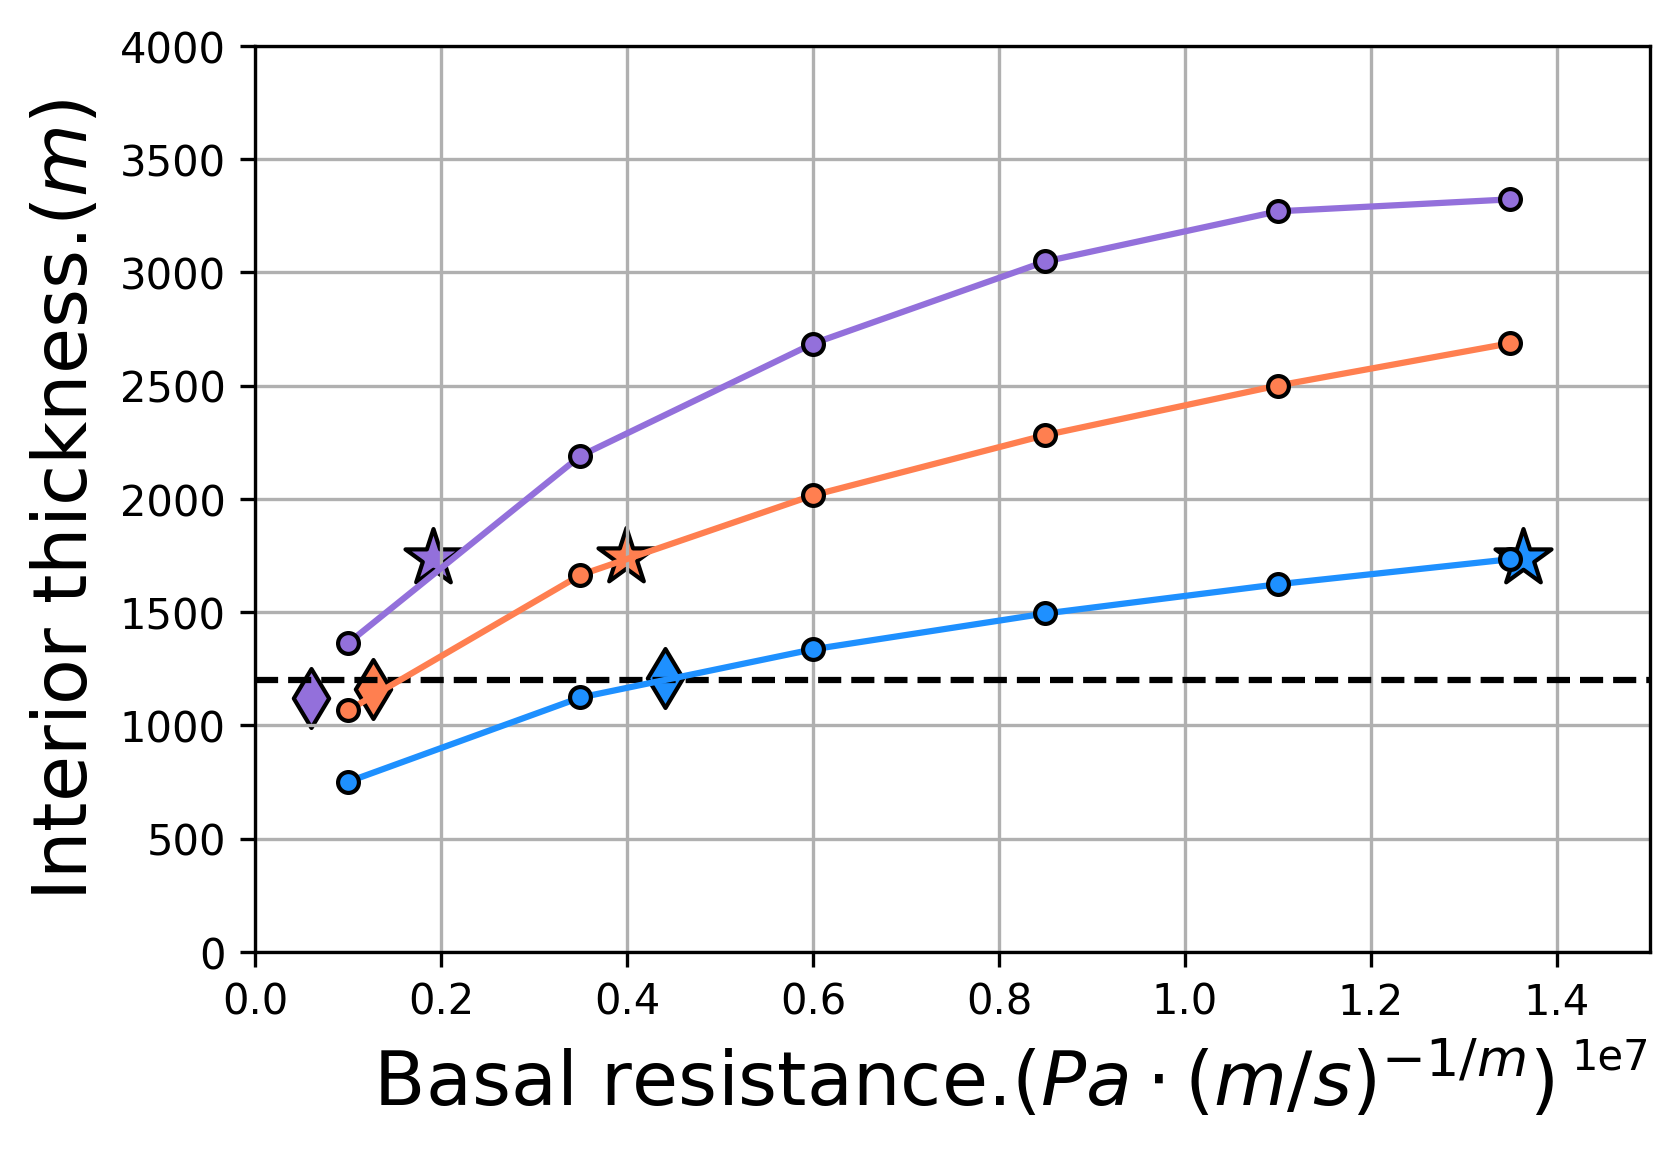

In [193]:
fig,ax=plt.subplots(dpi=300,)
ax.grid(True)
ax.set_xlabel(r' Basal resistance.($Pa\cdot(m/s)^{-1/m}}$)',fontsize=18)
ax.set_ylabel('Interior thickness.($m$)',fontsize=18)
ax.set_xlim(0,1.5e7)
ax.set_ylim(0,4000)
#plt.plot(C2,-np.array(timescalesm2)/1000,marker='o',markersize=5,markeredgecolor='black',color='forestgreen')
plt.axhline(y=1200, color='k', linestyle='--')

plt.plot(C2[:6],np.array(thicknessm3[:6]),marker='o',markersize=5,markeredgecolor='black',color='dodgerblue')
plt.scatter(Cthwaites3[0],np.array(thicknessthwaites3)[0],s=200,marker='*',edgecolor='black',color='dodgerblue')
plt.scatter(Cthwaites3[1],np.array(thicknessthwaites3)[1],s=100,marker='d',edgecolor='black',color='dodgerblue')

plt.plot(C2[:6],np.array(thicknessm4[:6]),marker='o',markersize=5,markeredgecolor='black',color='coral')
plt.scatter(Cthwaites4[0],np.array(thicknessthwaites4)[0],s=200,marker='*',edgecolor='black',color='coral')
plt.scatter(Cthwaites4[1],np.array(thicknessthwaites4)[1],s=100,marker='d',edgecolor='black',color='coral')

plt.plot(C2[:6],np.array(thicknessm5[:6]),marker='o',markersize=5,markeredgecolor='black',color='mediumpurple')
plt.scatter(Cthwaites5[0],np.array(thicknessthwaites5)[0],s=200,marker='*',edgecolor='black',color='mediumpurple')
plt.scatter(Cthwaites5[1],np.array(thicknessthwaites5)[1],s=100,marker='d',edgecolor='black',color='mediumpurple')


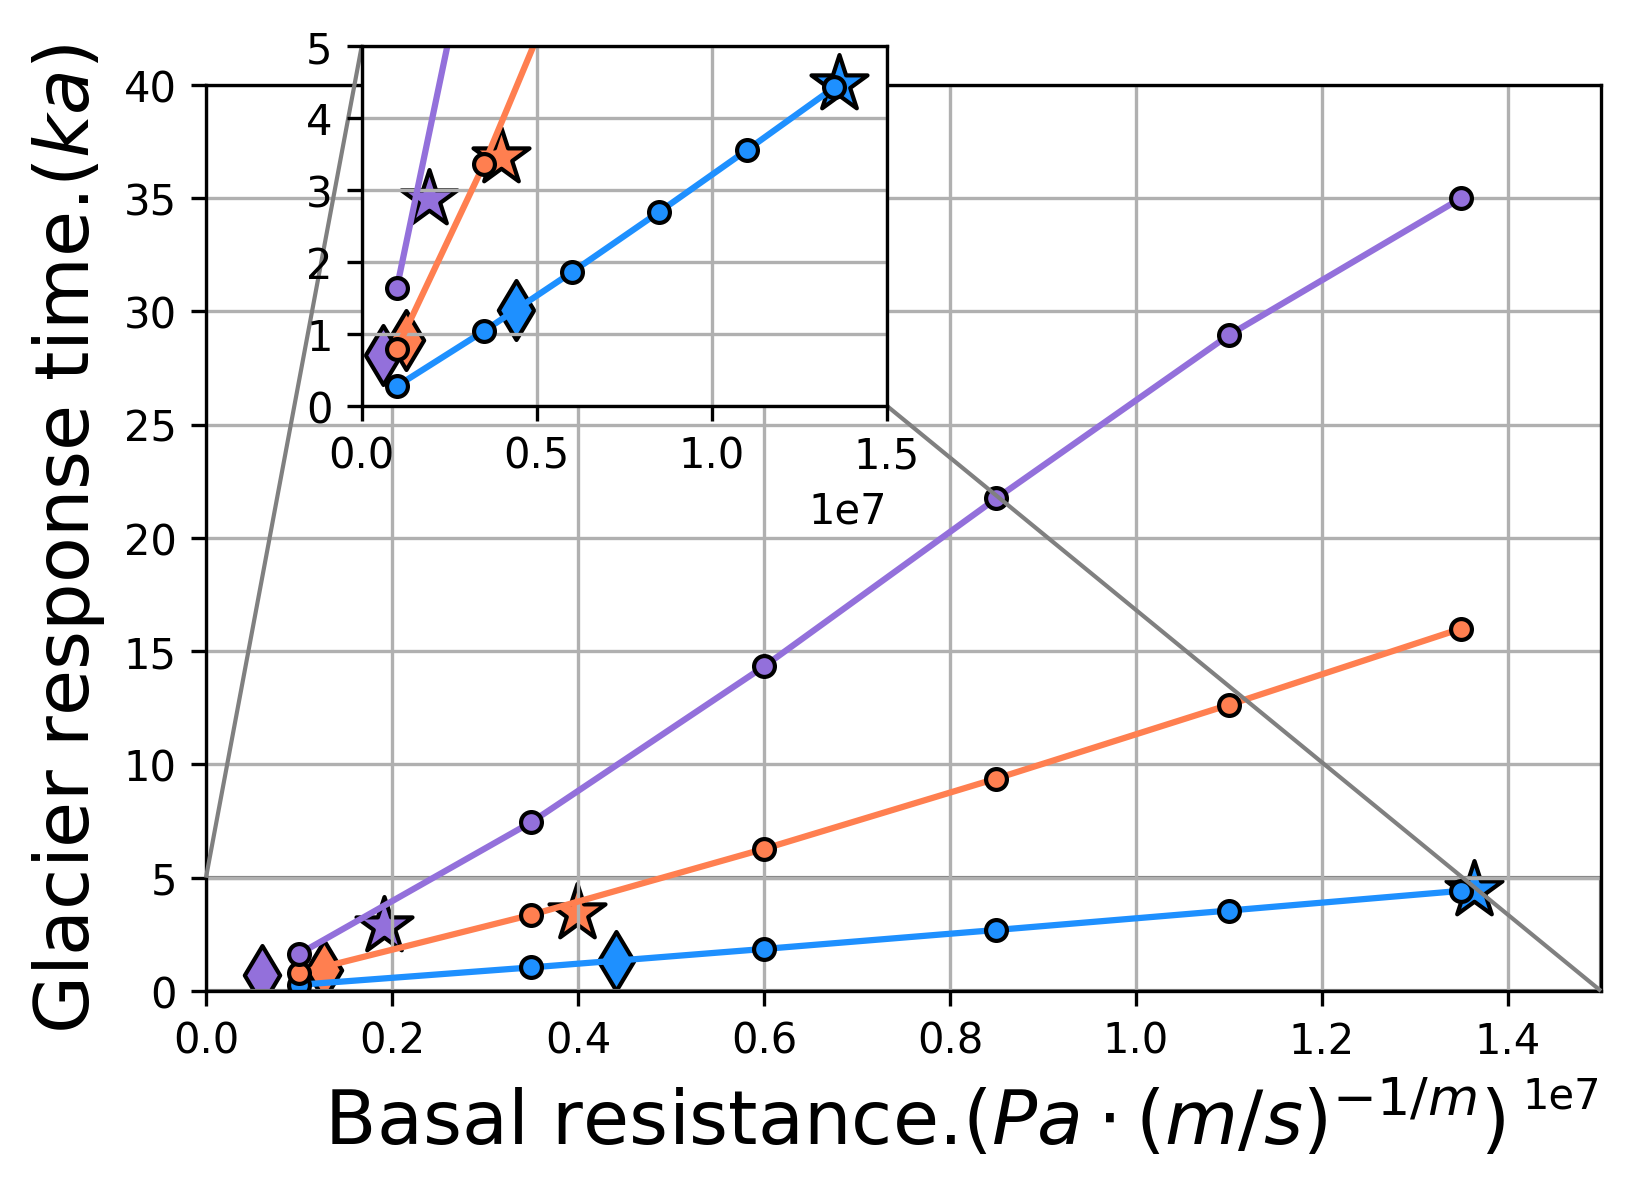

In [217]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
fig,ax=plt.subplots(dpi=300,)
ax.grid(True)
ax.set_xlabel(r' Basal resistance.($Pa\cdot(m/s)^{-1/m}}$)',fontsize=18)
ax.set_ylabel('Glacier response time.($ka$)',fontsize=18)
ax.set_xlim(0,1.5e7)
ax.set_ylim(0,40)
#plt.plot(C2,-np.array(timescalesm2)/1000,marker='o',markersize=5,markeredgecolor='black',color='forestgreen')
ax.plot(C2[:6],-np.array(timescalesm3[:6])/1000,marker='o',markersize=5,markeredgecolor='black',color='dodgerblue')
ax.scatter(Cthwaites3[0],-np.array(timescalethwaites3)[0]/1000,s=200,marker='*',edgecolor='black',color='dodgerblue')
ax.scatter(Cthwaites3[1],-np.array(timescalethwaites3)[1]/1000,s=100,marker='d',edgecolor='black',color='dodgerblue')

ax.plot(C2[:6],-np.array(timescalesm4[:6])/1000,marker='o',markersize=5,markeredgecolor='black',color='coral')
ax.scatter(Cthwaites4[0],-np.array(timescalethwaites4)[0]/1000,s=200,marker='*',edgecolor='black',color='coral')
ax.scatter(Cthwaites4[1],-np.array(timescalethwaites4)[1]/1000,s=100,marker='d',edgecolor='black',color='coral')

ax.plot(C2[:6],-np.array(timescalesm5[:6])/1000,marker='o',markersize=5,markeredgecolor='black',color='mediumpurple')
ax.scatter(Cthwaites5[0],-np.array(timescalethwaites5)[0]/1000,s=200,marker='*',edgecolor='black',color='mediumpurple')
ax.scatter(Cthwaites5[1],-np.array(timescalethwaites5)[1]/1000,s=100,marker='d',edgecolor='black',color='mediumpurple')


ax2 = inset_axes(ax, 1.75,1.2 , loc=2,bbox_to_anchor=(.2, 0.93),bbox_transform=ax.figure.transFigure) # no zoom

ax2.plot(C2[:6],-np.array(timescalesm3[:6])/1000,marker='o',markersize=5,markeredgecolor='black',color='dodgerblue')
ax2.scatter(Cthwaites3[0],-np.array(timescalethwaites3)[0]/1000,s=200,marker='*',edgecolor='black',color='dodgerblue')
ax2.scatter(Cthwaites3[1],-np.array(timescalethwaites3)[1]/1000,s=100,marker='d',edgecolor='black',color='dodgerblue')

ax2.plot(C2[:6],-np.array(timescalesm4[:6])/1000,marker='o',markersize=5,markeredgecolor='black',color='coral')
ax2.scatter(Cthwaites4[0],-np.array(timescalethwaites4)[0]/1000,s=200,marker='*',edgecolor='black',color='coral')
ax2.scatter(Cthwaites4[1],-np.array(timescalethwaites4)[1]/1000,s=100,marker='d',edgecolor='black',color='coral')

ax2.plot(C2[:6],-np.array(timescalesm5[:6])/1000,marker='o',markersize=5,markeredgecolor='black',color='mediumpurple')
ax2.scatter(Cthwaites5[0],-np.array(timescalethwaites5)[0]/1000,s=200,marker='*',edgecolor='black',color='mediumpurple')
ax2.scatter(Cthwaites5[1],-np.array(timescalethwaites5)[1]/1000,s=100,marker='d',edgecolor='black',color='mediumpurple')
ax2.set_xticks([0,.5e7,1.0e7,1.5e7])


#ax2.legend()
# clabel(C,fontsize=14,fmt='%2.1f')#,manual=True)
# subregion of the original image
x1,x2,y1,y2 = 0,1.5e7,0,5
ax2.set_xlim(x1,x2)
ax2.set_ylim(y1,y2)
#plt.xticks(visible=False)

ax2.yaxis.get_major_locator().set_params(nbins=7)
ax2.xaxis.get_major_locator().set_params(nbins=7)

plt.setp(ax2.get_xticklabels(),visible=True)#, visible=False)
plt.setp(ax2.get_yticklabels(),visible=True)#, visible=False)
# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, ax2, loc1=2, loc2=4, fc="none", ec="0.5")
plt.grid()
plt.draw()
plt.show()


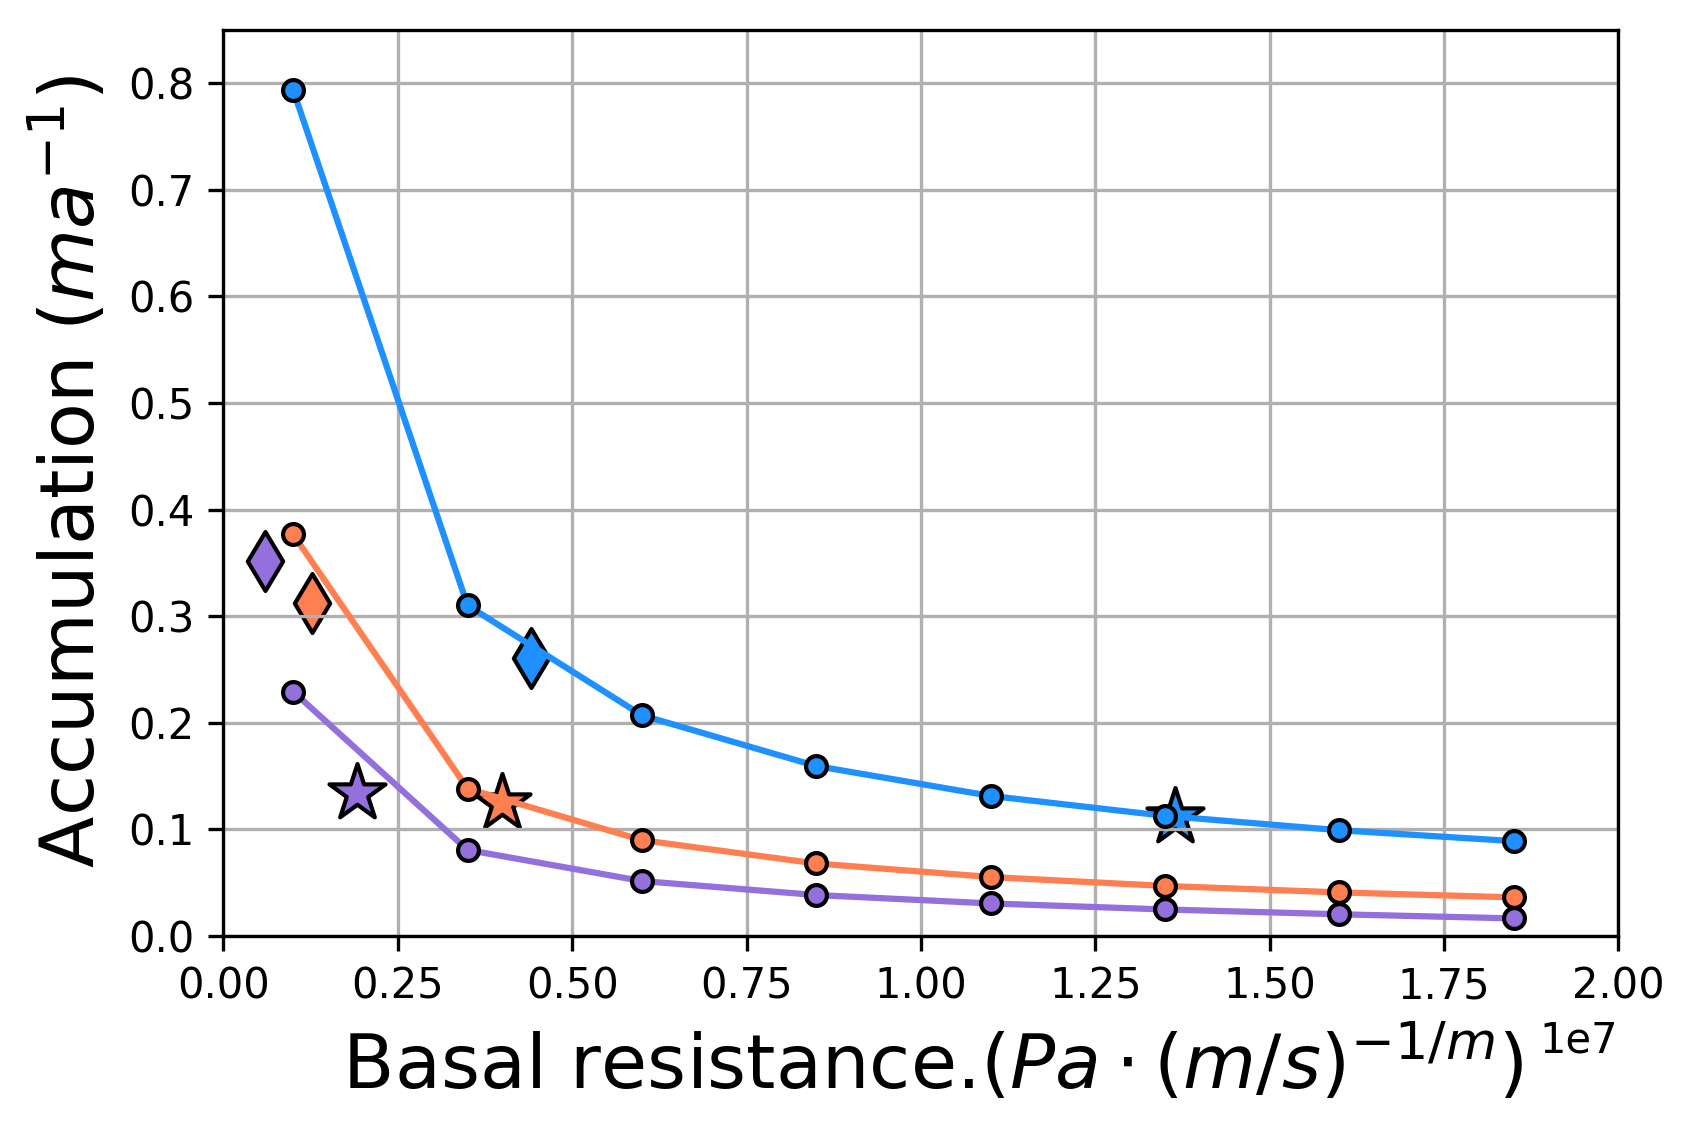

In [191]:
fig,ax=plt.subplots(dpi=300,)
ax.grid(True)
ax.set_ylabel(r' Accumulation ($m a^{-1}}$)',fontsize=18)
ax.set_xlabel(r' Basal resistance.($Pa\cdot(m/s)^{-1/m}}$)',fontsize=18)
ax.set_xlim(0,2.0e7)
ax.set_ylim(0,.85)
#plt.plot(C2,-np.array(timescalesm2)/1000,marker='o',markersize=5,markeredgecolor='black',color='forestgreen')
plt.plot(C2[:8],np.array(Sbarm3[:8]),marker='o',markersize=5,markeredgecolor='black',color='dodgerblue')
plt.scatter(Cthwaites3[0],np.array(smbthwaites3)[0],s=200,marker='*',edgecolor='black',color='dodgerblue')
plt.scatter(Cthwaites3[1],np.array(smbthwaites3)[1],s=100,marker='d',edgecolor='black',color='dodgerblue')

plt.plot(C2[:8],np.array(Sbarm4[:8]),marker='o',markersize=5,markeredgecolor='black',color='coral')
plt.scatter(Cthwaites4[0],np.array(smbthwaites4)[0],s=200,marker='*',edgecolor='black',color='coral')
plt.scatter(Cthwaites4[1],np.array(smbthwaites4)[1],s=100,marker='d',edgecolor='black',color='coral')

plt.plot(C2[:8],np.array(Sbarm5[:8]),marker='o',markersize=5,markeredgecolor='black',color='mediumpurple')
plt.scatter(Cthwaites5[0],np.array(smbthwaites5)[0],s=200,marker='*',edgecolor='black',color='mediumpurple')
plt.scatter(Cthwaites5[1],np.array(smbthwaites5)[1],s=100,marker='d',edgecolor='black',color='mediumpurple')
